In [1]:
#load the dataset

from keras.datasets.cifar10 import load_data

(trainX, trainy),(testX, testy) = load_data()

print(trainX.shape,trainy.shape)
print(testX.shape, trainy.shape)

Using TensorFlow backend.


(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (50000, 1)


In [2]:
import keras.datasets as k

print(k.__dict__.keys())

dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__path__', '__file__', '__cached__', '__builtins__', 'absolute_import', 'mnist', 'imdb', 'reuters', 'cifar', 'cifar10', 'cifar100', 'boston_housing', 'fashion_mnist'])


In [3]:
import matplotlib.pyplot as plt

for i in range(64):
    plt.subplot(16,4,1+i)
    plt.axis('off')
    plt.imshow(trainX[i])

plt.show()

<Figure size 640x480 with 64 Axes>

In [4]:
def define_discriminator(in_shape = (32,32,3)):
    model = Sequential()
    #normal
    model.add(Conv2D(64,(3,3), padding='same', input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    
    #downsample
    model.add(Conv2D(128,(3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    
    #downsample
    model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    
    #downsample
    model.add(Conv2D(256, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    
    #classifier
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    
    #compile model
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [5]:
from numpy import expand_dims
from numpy import ones
from numpy import zeros
from numpy.random import rand
from numpy.random import randint


from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.utils.vis_utils import plot_model

model = define_discriminator()

W0315 16:58:19.035693  9208 deprecation.py:323] From C:\installs\Anaconda\envs\tf_gpu\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         147584    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 256)        

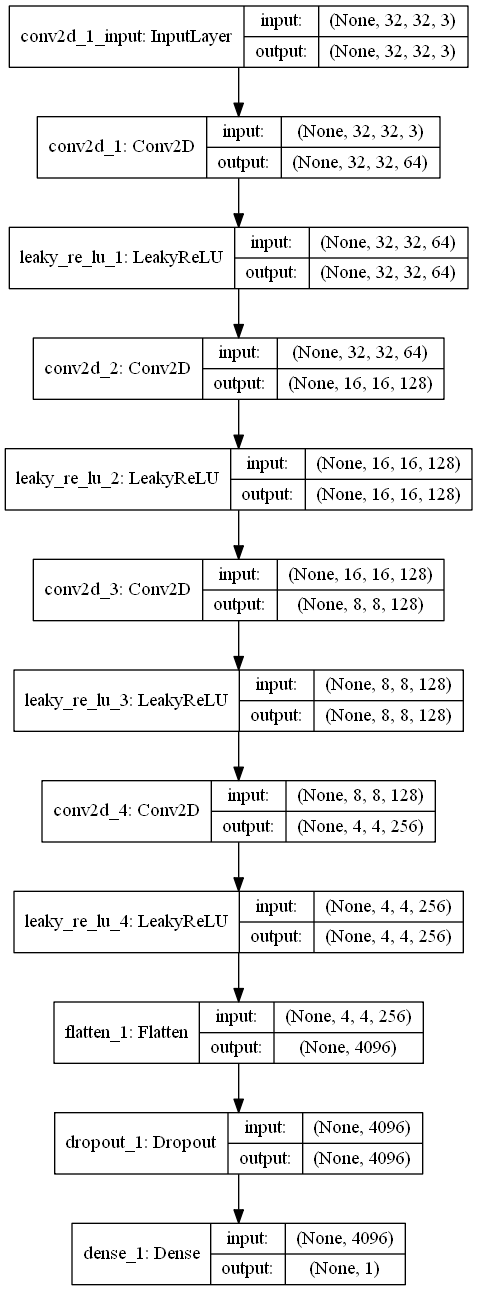

In [6]:
model.summary()
plot_model(model, to_file='discriminator_plot.png',show_shapes=True, show_layer_names=True)

In [7]:
def load_real_samples():    
    (trainX,_),(_,_) = load_data()
    #convert from unsigned int to float
    X = trainX.astype('float32')
    # scale from [0,255] to [-1,1]
    X = (X - 127.5)/127.5
    return X

In [8]:
def generate_real_samples(dataset, n_samples):
    # choose random instances
    ix = randint(0, dataset.shape[0], n_samples)
    # retrieve selected images
    X = dataset[ix]
    #generate 'real' class labesl(1)
    # creates an array of all ones
    y = ones((n_samples,1))
    return X,y

In [9]:
def generate_fake_samples(n_samples):
    # generate uniform random numbers in [0,1]
    X = rand(32 * 32 * 3 * n_samples)
    
    #update to have range [-1,1]
    X = -1 + X*2
    
    #reshape into a batch of color images
    X = X.reshape((n_samples,32, 32, 3))
    
    #generate 'fake' class labels (0)
    y = zeros((n_samples,1))
    return X, y
    


In [10]:
 def train_discriminator(model, dataset, n_iter=20, n_batch=128):
        half_batch = int(n_batch/2)
        for i in range(n_iter):
            # get real samples
            X_real, y_real = generate_real_samples(dataset, half_batch)
            
            #update discriminator on real samples
            _, real_acc = model.train_on_batch(X_real, y_real)
            
            #generate fake samples
            X_fake, y_fake = generate_fake_samples(half_batch)
            
            #update discriminator on fake samples
            _, fake_acc = model.train_on_batch(X_fake,y_fake)
            
            # summarize performance
            print(">" + str(i+1) + " real acc: " + str(real_acc *100) + " fake acc: " + str(fake_acc*100))

In [11]:
model = define_discriminator()

In [12]:
dataset = load_real_samples()

In [13]:
train_discriminator(model, dataset)

W0315 16:58:27.175434  9208 deprecation_wrapper.py:119] From C:\installs\Anaconda\envs\tf_gpu\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



>1 real acc: 48.4375 fake acc: 0.0
>2 real acc: 92.1875 fake acc: 3.125
>3 real acc: 93.75 fake acc: 32.8125
>4 real acc: 87.5 fake acc: 62.5
>5 real acc: 84.375 fake acc: 92.1875
>6 real acc: 85.9375 fake acc: 98.4375
>7 real acc: 93.75 fake acc: 100.0
>8 real acc: 85.9375 fake acc: 100.0
>9 real acc: 89.0625 fake acc: 100.0
>10 real acc: 90.625 fake acc: 100.0
>11 real acc: 90.625 fake acc: 100.0
>12 real acc: 100.0 fake acc: 100.0
>13 real acc: 96.875 fake acc: 100.0
>14 real acc: 96.875 fake acc: 100.0
>15 real acc: 98.4375 fake acc: 100.0
>16 real acc: 98.4375 fake acc: 100.0
>17 real acc: 100.0 fake acc: 100.0
>18 real acc: 98.4375 fake acc: 100.0
>19 real acc: 100.0 fake acc: 100.0
>20 real acc: 100.0 fake acc: 100.0


The generator model is responsible for creating new, fake, but plausible small photographs of objects.

It does this by taking a point from the latent space as input and outputting a square color image.

The latent space is an arbitrarily defined vector space of Gaussian-distributed values, e.g. 100 dimensions. It has no meaning, but by drawing points from this space randomly and providing them to the generator model during training, the generator model will assign meaning to the latent points and, in turn, the latent space, until, at the end of training, the latent vector space represents a compressed representation of the output space, CIFAR-10 images, that only the generator knows how to turn into plausible CIFAR-10 images.

    Inputs: Point in latent space, e.g. a 100-element vector of Gaussian random numbers.
    Outputs: Two-dimensional square color image (3 channels) of 32 x 32 pixels with pixel values in [-1,1].

Note: we don’t have to use a 100 element vector as input; it is a round number and widely used, but I would expect that 10, 50, or 500 would work just as well.

Developing a generator model requires that we transform a vector from the latent space with, 100 dimensions to a 2D array with 32 x 32 x 3, or 3,072 values.

There are a number of ways to achieve this, but there is one approach that has proven effective on deep convolutional generative adversarial networks. It involves two main elements.

The first is a Dense layer as the first hidden layer that has enough nodes to represent a low-resolution version of the output image. Specifically, an image half the size (one quarter the area) of the output image would be 16x16x3, or 768 nodes, and an image one quarter the size (one eighth the area) would be 8 x 8 x 3, or 192 nodes.

With some experimentation, I have found that a smaller low-resolution version of the image works better. Therefore, we will use 4 x 4 x 3, or 48 nodes.

We don’t just want one low-resolution version of the image; we want many parallel versions or interpretations of the input. This is a pattern in convolutional neural networks where we have many parallel filters resulting in multiple parallel activation maps, called feature maps, with different interpretations of the input. We want the same thing in reverse: many parallel versions of our output with different learned features that can be collapsed in the output layer into a final image. The model needs space to invent, create, or generate.

Therefore, the first hidden layer, the Dense, needs enough nodes for multiple versions of our output image, such as 256.

In [14]:
from keras.layers import Reshape
from keras.layers import Conv2DTranspose

def define_generator(latent_dim):
    model = Sequential()
    
    # foundations for a 4x4 image
    n_nodes = 256 * 4 * 4
    model.add(Dense(n_nodes, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((4,4,256)))
    
    # upsample to 8x8
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    
    # upsample to 16x16
    model.add(Conv2DTranspose(128,(4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    
    #upsample to 32x32
    model.add(Conv2DTranspose(128,(4,4), strides= (2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    
    #output layer
    model.add(Conv2D(3,(3,3), activation='tanh', padding='same'))
    
    return model    

In [15]:
latent_dim = 100

model = define_generator(latent_dim)

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4096)              413696    
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 4096)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 8, 8, 128)         524416    
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 16, 16, 128)       262272    
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 16, 16, 128)      

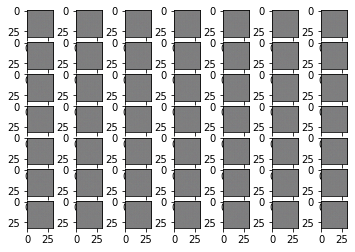

In [16]:
from numpy.random import randn

#generatin latent points as input to generator
def generate_latent_points(latent_dim, n_samples):
    # generate points in latent space
    x_input = randn(latent_dim * n_samples)
    
    # reshape into a batch of inputs for the network
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

def generate_fake_samples_for_g(g_model, latent_dim, n_samples):
    x_input = generate_latent_points(latent_dim, n_samples)
    
    X = g_model.predict(x_input)
    
    y =zeros((n_samples, 1))
    
    return X, y

latent_dim = 100
model = define_generator(latent_dim)

n_samples =49
X, _ = generate_fake_samples_for_g(model, latent_dim, n_samples)

#scale pixel values from [-1,1] to [0,1]
X = (X +1)/ 2.0

#plot the damples
import matplotlib.pyplot as plot

for i in range(n_samples):
    plot.subplot(7,7,1+i)
    #plot.axis('off')
    plot.imshow(X[i])

plot.show()


Specifically, a new GAN model can be defined that stacks the generator and discriminator such that the generator receives as input random points in the latent space and generates samples that are fed into the discriminator model directly, classified, and the output of this larger model can be used to update the model weights of the generator.

Only the discriminator is concerned with distinguishing between real and fake examples, therefore the discriminator model can be trained in a standalone manner on examples of each, as we did in the section on the discriminator model above.

The generator model is only concerned with the discriminator’s performance on fake examples. Therefore, we will mark all of the layers in the discriminator as not trainable when it is part of the GAN model so that they can not be updated and overtrained on fake examples.

When training the generator via this logical GAN model, there is one more important change. We want the discriminator to think that the samples output by the generator are real, not fake. Therefore, when the generator is trained as part of the GAN model, we will mark the generated samples as real (class 1)

In [17]:
def define_gan(g_model, d_model):
    # make discriminator non trainable
    d_model.trainable = False
    #connect them
    model = Sequential()
    # add generator
    model.add(g_model)
    # add discriminator
    model.add(d_model)
    # compile model
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    return model

In [18]:
def standalone_discriminator(in_shape=(32,32,3)):
    model = Sequential()
    # normal
    model.add(Conv2D(64,(3,3), padding='same', input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    
    #downsample
    model.add(Conv2D(128, (3,3),strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    
    #downsample
    model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    
    #downsample
    model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    
    #classifier
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    
    #compile model
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model


In [19]:
latent_dim =100

d_model = standalone_discriminator()
g_model = define_generator(latent_dim)

gan_model = define_gan(g_model, d_model)

gan_model.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_6 (Sequential)    (None, 32, 32, 3)         1466115   
_________________________________________________________________
sequential_5 (Sequential)    (None, 1)                 372865    
Total params: 1,838,980
Trainable params: 1,466,115
Non-trainable params: 372,865
_________________________________________________________________


In [20]:
import matplotlib.pyplot as pyplot

# create and save plot of generated image
def save_plot(examples, epoch, n=7):
    examples = (examples + 1)/2.0
    for i in range(n * n):
        pyplot.subplot(n,n,1+i)
        pyplot.axis('off')
        pyplot.imshow(examples[i])
    
    filename = 'generated_plot_' + str(epoch + 1) + '.png'
    pyplot.savefig(filename)
    pyplot.close()
    
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=150):
    X_real, y_real = generate_real_samples(dataset, n_samples)
    _, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
    x_fake,y_fake = generate_faker_samples(g_model, latent_dim, n_samples)
    _, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
    
    print('>Accuracy real: ' + str(acc_real*100) + ', fake: ' + str(acc_fake*100))
    
    save_plot(x_fake, epoch)
    filename = 'generator_model ' + str(epoch + 1)
    g_model.save(filename)
    

In [21]:
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs =200, n_batch=128):
    bat_per_epo = int(dataset.shape[0]/n_batch)
    half_batch = int(n_batch/2)
    
    # enumerate over epochs
    for i in range(n_epochs):
        # enumerate over training set
        for j in range(bat_per_epo):
            
            # get randomly selected real image
            X_real, y_real = generate_real_samples(dataset, half_batch)
            
            # update discriminator model weights
            d_loss1, _ = d_model.train_on_batch(X_real, y_real)
            
            # generate fake samples
            X_fake, y_fake = generate_faker_samples(g_model, latent_dim, half_batch)
            
            #update discriminator model weights
            d_loss2, _ = d_model.train_on_batch(X_fake, y_fake)
            
            #preparepoints for input to generator
            X_gan = generate_latent_points(latent_dim, n_batch)
            
            # create inverted labels for the fake samples
            y_gan = ones((n_batch, 1))
            
            # update the generator via the discriminator  error
            g_loss = gan_model.train_on_batch(X_gan, y_gan)
            
            print("statistics: ", i+1,j+1,bat_per_epo, d_loss1, d_loss2, g_loss)
            
            #if(i+1) % 10 == 0:
            #    summarize_performance(i, g_model, d_model, dataset, latent_dim)
        
    
    
    

In [22]:
def generate_faker_samples(g_model, latent_dim, n_samples):
    x_input = generate_latent_points(latent_dim, n_samples)
    X = g_model.predict(x_input)
    y = zeros((n_samples, 1))
    return X, y

In [23]:
latent_dim =100
d_model = standalone_discriminator()
    
g_model = define_generator(latent_dim)
gan_model = define_gan(g_model, d_model)
    
dataset = load_real_samples()
    
train(g_model, d_model, gan_model, dataset, latent_dim)

C:\installs\Anaconda\envs\tf_gpu\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
C:\installs\Anaconda\envs\tf_gpu\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


statistics:  1 1 390 0.69279927 0.69560987 0.6914052


C:\installs\Anaconda\envs\tf_gpu\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


statistics:  1 2 390 0.6433641 0.697841 0.6893208
statistics:  1 3 390 0.5948144 0.70251536 0.6847806
statistics:  1 4 390 0.5299199 0.71396065 0.67440194
statistics:  1 5 390 0.44424233 0.7373391 0.653854
statistics:  1 6 390 0.37318185 0.789448 0.6208718
statistics:  1 7 390 0.27750054 0.86894214 0.581628
statistics:  1 8 390 0.2043155 0.9395881 0.57264644
statistics:  1 9 390 0.20131691 0.9238317 0.60121876
statistics:  1 10 390 0.17886561 0.8502298 0.6847842
statistics:  1 11 390 0.19842692 0.7175927 0.8337534
statistics:  1 12 390 0.1818152 0.55596995 0.998083
statistics:  1 13 390 0.21423031 0.494604 1.0670294
statistics:  1 14 390 0.21438551 0.5007797 1.018405
statistics:  1 15 390 0.106049314 0.5360918 0.94226456
statistics:  1 16 390 0.15858814 0.5857446 0.8484719
statistics:  1 17 390 0.18408729 0.62712896 0.7880291
statistics:  1 18 390 0.10240924 0.65754116 0.7610123
statistics:  1 19 390 0.18154868 0.70605266 0.7402366
statistics:  1 20 390 0.10254824 0.7809659 0.7139094
s

statistics:  1 155 390 0.43744674 0.5328342 2.9969525
statistics:  1 156 390 0.5907339 0.2762549 2.8573337
statistics:  1 157 390 0.54553604 0.14421076 2.7034087
statistics:  1 158 390 0.5912661 0.23464519 2.5495436
statistics:  1 159 390 0.48840696 0.28563273 2.550807
statistics:  1 160 390 0.5967689 0.3572721 2.4466105
statistics:  1 161 390 0.7297052 0.5793899 2.328905
statistics:  1 162 390 0.6927322 0.3191641 2.2125645
statistics:  1 163 390 0.514037 0.22703859 2.3174636
statistics:  1 164 390 0.6717248 0.24405041 2.186997
statistics:  1 165 390 0.5033501 0.20379129 2.188102
statistics:  1 166 390 0.41153952 0.24522017 2.3129444
statistics:  1 167 390 0.554812 0.17178664 2.2732642
statistics:  1 168 390 0.61710954 0.19228613 2.0234265
statistics:  1 169 390 0.41337898 0.41236857 1.9336114
statistics:  1 170 390 0.7449751 0.3585254 1.7583481
statistics:  1 171 390 0.55280113 0.31098843 1.7801229
statistics:  1 172 390 0.49631536 0.2881164 1.8027264
statistics:  1 173 390 0.4920699 

statistics:  1 307 390 0.5222664 0.33760494 1.6366594
statistics:  1 308 390 0.5889392 0.3572151 1.5986061
statistics:  1 309 390 0.63240206 0.40987277 1.5206757
statistics:  1 310 390 0.46959358 0.3827148 1.605745
statistics:  1 311 390 0.49864653 0.36102614 1.447946
statistics:  1 312 390 0.53072256 0.44164258 1.3133216
statistics:  1 313 390 0.50446737 0.55280364 1.2276232
statistics:  1 314 390 0.5925071 0.6701669 1.1916618
statistics:  1 315 390 0.46154875 0.48789787 1.2801704
statistics:  1 316 390 0.5965121 0.5674672 1.4666386
statistics:  1 317 390 0.5841476 0.5701419 1.3098358
statistics:  1 318 390 0.4452515 0.53313434 1.1660478
statistics:  1 319 390 0.39917266 0.6196351 1.2206764
statistics:  1 320 390 0.4956501 0.6375381 1.2297329
statistics:  1 321 390 0.47822404 0.55381244 1.4123862
statistics:  1 322 390 0.6060411 0.5012537 1.4041966
statistics:  1 323 390 0.52367055 0.42293411 1.4026192
statistics:  1 324 390 0.5391024 0.44355822 1.3905616
statistics:  1 325 390 0.4877

statistics:  2 71 390 0.6075262 0.44732285 1.5251284
statistics:  2 72 390 0.5144951 0.46129167 1.5103805
statistics:  2 73 390 0.54867417 0.5347817 1.3853829
statistics:  2 74 390 0.5142861 0.5108775 1.3313359
statistics:  2 75 390 0.55509305 0.5580545 1.4553078
statistics:  2 76 390 0.502583 0.39941296 1.6233166
statistics:  2 77 390 0.70591563 0.41766122 1.60829
statistics:  2 78 390 0.7034528 0.45429593 1.600734
statistics:  2 79 390 0.6371358 0.4424683 1.448359
statistics:  2 80 390 0.51929945 0.418628 1.5357461
statistics:  2 81 390 0.53350306 0.4438356 1.570483
statistics:  2 82 390 0.660262 0.48167944 1.3182077
statistics:  2 83 390 0.5501151 0.6776233 1.2627828
statistics:  2 84 390 0.6735358 0.67108035 1.2573047
statistics:  2 85 390 0.5556135 0.67387915 1.155586
statistics:  2 86 390 0.5525569 0.7817171 1.1487826
statistics:  2 87 390 0.6764982 0.7309334 1.1424129
statistics:  2 88 390 0.5872464 0.6293665 1.273159
statistics:  2 89 390 0.54711163 0.54652554 1.2892877
statist

statistics:  2 224 390 0.4312893 0.5039785 1.578041
statistics:  2 225 390 0.51285005 0.45947325 1.4214275
statistics:  2 226 390 0.59575725 0.51014876 1.2942795
statistics:  2 227 390 0.53040624 0.6180929 1.4194483
statistics:  2 228 390 0.63178587 0.56703043 1.3326956
statistics:  2 229 390 0.6748518 0.5303059 1.3531911
statistics:  2 230 390 0.62664485 0.61865807 1.4481102
statistics:  2 231 390 0.59168935 0.51384103 1.5217874
statistics:  2 232 390 0.5482358 0.43077838 1.6730596
statistics:  2 233 390 0.64668024 0.41399378 1.6414579
statistics:  2 234 390 0.5534702 0.5152775 1.524781
statistics:  2 235 390 0.6307839 0.5470245 1.544152
statistics:  2 236 390 0.64675766 0.4778636 1.6148006
statistics:  2 237 390 0.6047557 0.53397834 1.3713837
statistics:  2 238 390 0.49603772 0.6123222 1.3968134
statistics:  2 239 390 0.6397023 0.63109684 1.5077361
statistics:  2 240 390 0.62854546 0.5170016 1.4961154
statistics:  2 241 390 0.62093705 0.54436475 1.4775062
statistics:  2 242 390 0.623

statistics:  2 377 390 0.80484456 0.5969393 1.0711671
statistics:  2 378 390 0.84865814 0.64533067 1.1527765
statistics:  2 379 390 0.89607835 0.61021507 1.1712867
statistics:  2 380 390 0.6615072 0.52013266 1.2579145
statistics:  2 381 390 0.648929 0.44496801 1.2959613
statistics:  2 382 390 0.7363958 0.44090736 1.3075982
statistics:  2 383 390 0.5289493 0.4036377 1.4496232
statistics:  2 384 390 0.58962756 0.3835069 1.3546474
statistics:  2 385 390 0.47686863 0.439626 1.3461044
statistics:  2 386 390 0.41578808 0.4241724 1.4635209
statistics:  2 387 390 0.48166376 0.50072235 1.3389386
statistics:  2 388 390 0.5022258 0.62365127 1.1907647
statistics:  2 389 390 0.6361354 0.73954666 1.0789382
statistics:  2 390 390 0.5884191 0.8659246 0.98935604
statistics:  3 1 390 0.6217252 0.91833454 0.9057261
statistics:  3 2 390 0.7437657 1.1438068 0.76726216
statistics:  3 3 390 0.65637624 0.82238114 0.8703476
statistics:  3 4 390 0.8593286 0.7475107 1.0224653
statistics:  3 5 390 0.73957986 0.63

statistics:  3 142 390 0.4967003 0.55316174 1.039343
statistics:  3 143 390 0.5360112 0.52594244 1.048059
statistics:  3 144 390 0.5610924 0.5629555 1.0940566
statistics:  3 145 390 0.5577811 0.52011937 1.1385993
statistics:  3 146 390 0.5260948 0.49160522 1.0795472
statistics:  3 147 390 0.48002845 0.48067105 1.0881132
statistics:  3 148 390 0.45825815 0.5550869 1.1396779
statistics:  3 149 390 0.61310875 0.5756275 1.127356
statistics:  3 150 390 0.5158484 0.590981 1.1253377
statistics:  3 151 390 0.57368946 0.51273215 1.1593654
statistics:  3 152 390 0.54109085 0.4923445 1.2248652
statistics:  3 153 390 0.6600458 0.51384705 1.1511494
statistics:  3 154 390 0.49843538 0.4969922 1.1144259
statistics:  3 155 390 0.523106 0.49773356 1.0961084
statistics:  3 156 390 0.5611517 0.5007087 1.1306709
statistics:  3 157 390 0.46008596 0.5384468 1.1774817
statistics:  3 158 390 0.51040375 0.50348485 1.1655602
statistics:  3 159 390 0.51586807 0.51077425 1.1318295
statistics:  3 160 390 0.5562304

statistics:  3 295 390 0.76858175 0.5870732 1.202815
statistics:  3 296 390 0.85733443 0.5014006 1.2897613
statistics:  3 297 390 0.6579243 0.52320015 1.4096173
statistics:  3 298 390 0.64875454 0.49565855 1.5358596
statistics:  3 299 390 0.61663026 0.46951538 1.3229432
statistics:  3 300 390 0.61310935 0.49159423 1.3421683
statistics:  3 301 390 0.58462685 0.4455533 1.1689053
statistics:  3 302 390 0.5192291 0.5835201 1.069376
statistics:  3 303 390 0.53119016 0.63857836 0.98767567
statistics:  3 304 390 0.6255927 0.71935356 0.9820998
statistics:  3 305 390 0.5853538 0.68950963 0.9907278
statistics:  3 306 390 0.80045915 0.7397263 0.85374033
statistics:  3 307 390 0.62942696 0.7555406 0.904053
statistics:  3 308 390 0.595292 0.6892427 0.86681944
statistics:  3 309 390 0.6404478 0.728644 0.8719482
statistics:  3 310 390 0.5161085 0.68413407 0.9578477
statistics:  3 311 390 0.52711916 0.6657239 1.034526
statistics:  3 312 390 0.5788773 0.642009 1.0833136
statistics:  3 313 390 0.5036120

statistics:  4 59 390 0.6409663 0.53891253 1.2920139
statistics:  4 60 390 0.66802037 0.5253035 1.2268198
statistics:  4 61 390 0.5797999 0.4981197 1.318641
statistics:  4 62 390 0.59821415 0.48746824 1.3337771
statistics:  4 63 390 0.6667762 0.42906502 1.3691874
statistics:  4 64 390 0.63514626 0.5350356 1.351921
statistics:  4 65 390 0.57392657 0.5116538 1.3770446
statistics:  4 66 390 0.61525226 0.531894 1.3471385
statistics:  4 67 390 0.6365555 0.53391564 1.1679999
statistics:  4 68 390 0.5483434 0.63276196 1.1254864
statistics:  4 69 390 0.52787304 0.6085677 1.3140116
statistics:  4 70 390 0.5109098 0.48994035 1.3993899
statistics:  4 71 390 0.5649847 0.39074993 1.5452024
statistics:  4 72 390 0.41263112 0.3831116 1.4981492
statistics:  4 73 390 0.3617136 0.52328813 1.2043927
statistics:  4 74 390 0.41654164 0.6269554 1.1551158
statistics:  4 75 390 0.42447257 0.6463778 1.1680185
statistics:  4 76 390 0.39352304 0.63601834 1.2234733
statistics:  4 77 390 0.54666865 0.6046853 1.208

statistics:  4 213 390 0.66330886 0.6706986 0.9708158
statistics:  4 214 390 0.67164135 0.6113347 1.0020261
statistics:  4 215 390 0.6356687 0.62520236 1.0423591
statistics:  4 216 390 0.6522676 0.6738119 1.0643635
statistics:  4 217 390 0.6263465 0.58096206 1.0808203
statistics:  4 218 390 0.65390867 0.52859855 1.1141685
statistics:  4 219 390 0.62356 0.4887306 1.164384
statistics:  4 220 390 0.5357005 0.5202949 1.2589827
statistics:  4 221 390 0.47831824 0.49929345 1.353948
statistics:  4 222 390 0.5913927 0.40865386 1.4922975
statistics:  4 223 390 0.5507256 0.36194336 1.5039775
statistics:  4 224 390 0.42389187 0.38817483 1.5422133
statistics:  4 225 390 0.5219109 0.44216353 1.4759773
statistics:  4 226 390 0.52841324 0.47423074 1.3347905
statistics:  4 227 390 0.5288973 0.52867204 1.3671029
statistics:  4 228 390 0.5301399 0.6127957 1.3293498
statistics:  4 229 390 0.6167183 0.5395334 1.288523
statistics:  4 230 390 0.7399043 0.5523399 1.1382453
statistics:  4 231 390 0.68223053 0

statistics:  4 366 390 0.76229143 0.46425948 1.3468735
statistics:  4 367 390 0.72737706 0.4632017 1.2803011
statistics:  4 368 390 0.70026886 0.5116927 1.283849
statistics:  4 369 390 0.6841183 0.44102022 1.3397648
statistics:  4 370 390 0.6425695 0.5331848 1.2654405
statistics:  4 371 390 0.6708635 0.50748646 1.2834706
statistics:  4 372 390 0.6120693 0.57374185 1.2732807
statistics:  4 373 390 0.5840411 0.525172 1.252606
statistics:  4 374 390 0.5931506 0.49618578 1.2105594
statistics:  4 375 390 0.67886674 0.5905663 1.1581142
statistics:  4 376 390 0.68400496 0.5488535 1.0933654
statistics:  4 377 390 0.6900679 0.6127388 1.116628
statistics:  4 378 390 0.6362305 0.54928505 1.1036373
statistics:  4 379 390 0.715268 0.54247236 1.0553805
statistics:  4 380 390 0.58941174 0.58273137 1.1060247
statistics:  4 381 390 0.68472797 0.50779593 1.1013985
statistics:  4 382 390 0.57560575 0.519066 1.152612
statistics:  4 383 390 0.5449794 0.5704924 1.12414
statistics:  4 384 390 0.6511022 0.548

statistics:  5 131 390 0.6764514 0.6691744 1.0082924
statistics:  5 132 390 0.74820596 0.6313953 1.0233036
statistics:  5 133 390 0.74632096 0.5538078 1.0304543
statistics:  5 134 390 0.6445143 0.54779553 1.0789759
statistics:  5 135 390 0.62274826 0.5647531 1.1299036
statistics:  5 136 390 0.6901567 0.49245533 1.1438289
statistics:  5 137 390 0.6644473 0.4640916 1.1790172
statistics:  5 138 390 0.5643203 0.48999348 1.2345673
statistics:  5 139 390 0.54093194 0.5025452 1.1681145
statistics:  5 140 390 0.49961045 0.5016349 1.1781564
statistics:  5 141 390 0.45433718 0.55211234 1.1988796
statistics:  5 142 390 0.46663517 0.55147856 1.2740505
statistics:  5 143 390 0.5158627 0.5162902 1.2672781
statistics:  5 144 390 0.59613097 0.47364664 1.1648414
statistics:  5 145 390 0.50415254 0.5191724 1.1121113
statistics:  5 146 390 0.5125949 0.5790642 1.0520196
statistics:  5 147 390 0.41028315 0.5242207 1.1172556
statistics:  5 148 390 0.50595725 0.5439977 1.1122332
statistics:  5 149 390 0.4783

statistics:  5 284 390 0.6771312 0.43113267 1.4635375
statistics:  5 285 390 0.56688714 0.45815462 1.4293882
statistics:  5 286 390 0.5828681 0.4383528 1.3993788
statistics:  5 287 390 0.56587154 0.43838474 1.4109015
statistics:  5 288 390 0.50026596 0.4415567 1.3895218
statistics:  5 289 390 0.5266994 0.4458139 1.3870432
statistics:  5 290 390 0.5025905 0.41230303 1.2810465
statistics:  5 291 390 0.48724765 0.45248252 1.3471773
statistics:  5 292 390 0.4396019 0.5248703 1.4098105
statistics:  5 293 390 0.5581552 0.47487697 1.475689
statistics:  5 294 390 0.55496836 0.45289782 1.353117
statistics:  5 295 390 0.6660069 0.4884727 1.30578
statistics:  5 296 390 0.62863743 0.54039276 1.1403784
statistics:  5 297 390 0.550413 0.5646477 1.2958394
statistics:  5 298 390 0.7251773 0.5927383 1.2363329
statistics:  5 299 390 0.54067093 0.72557795 1.3092408
statistics:  5 300 390 0.6423594 0.5777159 1.3220536
statistics:  5 301 390 0.7608212 0.9589609 1.4152756
statistics:  5 302 390 0.7685205 0.

statistics:  6 48 390 0.52737117 0.48074752 1.3102194
statistics:  6 49 390 0.5789561 0.63707805 1.3279016
statistics:  6 50 390 0.67789423 0.6010257 1.3453243
statistics:  6 51 390 0.6051424 0.5632858 1.4630275
statistics:  6 52 390 0.6388096 0.58580023 1.5273879
statistics:  6 53 390 0.66038144 0.60870755 1.3736665
statistics:  6 54 390 0.7681493 0.50362235 1.3476968
statistics:  6 55 390 0.6242784 0.578272 1.3732305
statistics:  6 56 390 0.58511543 0.6456543 1.3457673
statistics:  6 57 390 0.7075907 0.5732493 1.353521
statistics:  6 58 390 0.72833824 0.5269425 1.2934605
statistics:  6 59 390 0.72391915 0.5686866 1.2440166
statistics:  6 60 390 0.629243 0.6299661 1.2101746
statistics:  6 61 390 0.71755457 0.7098138 1.3016443
statistics:  6 62 390 0.95771897 0.63350356 1.1216145
statistics:  6 63 390 0.71652174 0.8005372 1.3642526
statistics:  6 64 390 0.6553174 0.48297858 1.5794362
statistics:  6 65 390 0.84794664 0.3788284 1.6682036
statistics:  6 66 390 0.9216175 0.52264136 1.49662

statistics:  6 202 390 0.5215336 0.6823049 1.1440856
statistics:  6 203 390 0.6612222 0.65407264 1.1754689
statistics:  6 204 390 0.69024813 0.64954275 1.1302185
statistics:  6 205 390 0.59743154 0.628236 1.2044253
statistics:  6 206 390 0.71138287 0.6175642 1.2566414
statistics:  6 207 390 0.7559388 0.63066614 1.2910687
statistics:  6 208 390 0.75794435 0.56100386 1.2414846
statistics:  6 209 390 0.6428189 0.56680256 1.15695
statistics:  6 210 390 0.57197845 0.5959056 1.2050463
statistics:  6 211 390 0.5683238 0.5282614 1.3237499
statistics:  6 212 390 0.5991023 0.47884455 1.3486336
statistics:  6 213 390 0.6683421 0.43914998 1.4107972
statistics:  6 214 390 0.53341055 0.41100836 1.4672911
statistics:  6 215 390 0.45243162 0.38633472 1.4805782
statistics:  6 216 390 0.4157315 0.35024214 1.5249717
statistics:  6 217 390 0.47241116 0.36878195 1.3421745
statistics:  6 218 390 0.37465155 0.46011698 1.3879236
statistics:  6 219 390 0.4209369 0.49274617 1.3359301
statistics:  6 220 390 0.47

statistics:  6 355 390 0.70915246 0.42715156 1.4887588
statistics:  6 356 390 0.76626176 0.52347285 1.468311
statistics:  6 357 390 0.63461006 0.6146158 1.3482552
statistics:  6 358 390 0.7489437 0.5045674 1.2560792
statistics:  6 359 390 0.69657767 0.60443634 1.0951918
statistics:  6 360 390 0.68373454 0.548151 1.1150947
statistics:  6 361 390 0.65875983 0.6142453 1.0506278
statistics:  6 362 390 0.6807986 0.6089422 1.0740004
statistics:  6 363 390 0.6312691 0.6176764 1.0740964
statistics:  6 364 390 0.59812844 0.6224241 1.1024904
statistics:  6 365 390 0.60681003 0.6525988 1.1378982
statistics:  6 366 390 0.5920212 0.61832756 1.2270367
statistics:  6 367 390 0.61279655 0.57747746 1.2907162
statistics:  6 368 390 0.60785246 0.54302037 1.2775984
statistics:  6 369 390 0.5836348 0.48873475 1.3212291
statistics:  6 370 390 0.7042025 0.48083305 1.2378272
statistics:  6 371 390 0.64457655 0.4944291 1.2792017
statistics:  6 372 390 0.5369276 0.49488208 1.3213782
statistics:  6 373 390 0.731

statistics:  7 119 390 0.579345 0.43453795 1.465212
statistics:  7 120 390 0.492535 0.42529038 1.4809747
statistics:  7 121 390 0.4556617 0.37283242 1.550699
statistics:  7 122 390 0.4586833 0.36894533 1.6471133
statistics:  7 123 390 0.51045644 0.35748285 1.5746312
statistics:  7 124 390 0.49512377 0.3666898 1.4931979
statistics:  7 125 390 0.5054138 0.43914372 1.3958588
statistics:  7 126 390 0.35327807 0.40060586 1.508928
statistics:  7 127 390 0.4675889 0.49668664 1.4837852
statistics:  7 128 390 0.49925056 0.4437457 1.4301863
statistics:  7 129 390 0.53411114 0.49921644 1.3677207
statistics:  7 130 390 0.6102535 0.50689644 1.2862067
statistics:  7 131 390 0.5218096 0.67158127 1.346774
statistics:  7 132 390 0.59612805 0.5403876 1.5007616
statistics:  7 133 390 0.64724 0.45328158 1.444423
statistics:  7 134 390 0.5998615 0.46354896 1.3018961
statistics:  7 135 390 0.35652483 0.48208255 1.3137454
statistics:  7 136 390 0.4828292 0.49408454 1.3736196
statistics:  7 137 390 0.37889594

statistics:  7 272 390 0.5414841 0.5550972 1.3229748
statistics:  7 273 390 0.68370235 0.5870461 1.307733
statistics:  7 274 390 0.68431675 0.60287935 1.302732
statistics:  7 275 390 0.7257561 0.6432898 1.3101864
statistics:  7 276 390 0.6637197 0.5323171 1.4322428
statistics:  7 277 390 0.6614026 0.5435059 1.4803504
statistics:  7 278 390 0.722014 0.6947324 1.4591718
statistics:  7 279 390 0.6883075 0.5501192 1.6472613
statistics:  7 280 390 0.7474134 0.47728 1.5656513
statistics:  7 281 390 0.6989418 0.5211157 1.5097501
statistics:  7 282 390 0.6715285 0.5797062 1.7540143
statistics:  7 283 390 0.67872643 0.4226743 1.8442214
statistics:  7 284 390 0.6377609 0.42548665 1.5690933
statistics:  7 285 390 0.6069249 0.46812555 1.7444515
statistics:  7 286 390 0.60636103 0.49672526 1.6346654
statistics:  7 287 390 0.66666305 0.51597524 1.4135507
statistics:  7 288 390 0.7231451 0.49452585 1.3611045
statistics:  7 289 390 0.62458766 0.5754541 1.2466685
statistics:  7 290 390 0.6521356 0.5325

statistics:  8 36 390 0.58313406 0.34394646 1.7890753
statistics:  8 37 390 0.6056489 0.3797164 1.6252065
statistics:  8 38 390 0.60396093 0.34395802 1.5262338
statistics:  8 39 390 0.5350213 0.44704473 1.602781
statistics:  8 40 390 0.49739233 0.44893762 1.3967496
statistics:  8 41 390 0.5890243 0.45146927 1.3264394
statistics:  8 42 390 0.49135065 0.5295322 1.3360153
statistics:  8 43 390 0.51165533 0.4371342 1.3183012
statistics:  8 44 390 0.4072051 0.40909022 1.3430893
statistics:  8 45 390 0.47030568 0.4121837 1.3765435
statistics:  8 46 390 0.4547006 0.43279666 1.3116014
statistics:  8 47 390 0.53938365 0.4631581 1.3492835
statistics:  8 48 390 0.392142 0.49062252 1.3505638
statistics:  8 49 390 0.45859444 0.5170511 1.3375582
statistics:  8 50 390 0.48520356 0.5237342 1.3902787
statistics:  8 51 390 0.54494095 0.45164758 1.3901782
statistics:  8 52 390 0.7145977 0.5685785 1.3377422
statistics:  8 53 390 0.58248574 0.5190933 1.3569913
statistics:  8 54 390 0.5930755 0.5092288 1.36

statistics:  8 190 390 0.6579629 0.5137919 1.2937529
statistics:  8 191 390 0.68057793 0.51120436 1.2087235
statistics:  8 192 390 0.5317764 0.55601215 1.3277538
statistics:  8 193 390 0.6765082 0.452762 1.2880075
statistics:  8 194 390 0.68770313 0.5852796 1.3118026
statistics:  8 195 390 0.57142043 0.46766308 1.3340971
statistics:  8 196 390 0.5711017 0.553657 1.4595717
statistics:  8 197 390 0.5683546 0.46312585 1.417416
statistics:  8 198 390 0.56107646 0.49680418 1.419539
statistics:  8 199 390 0.68528616 0.4072677 1.3283361
statistics:  8 200 390 0.6334761 0.650566 1.3389978
statistics:  8 201 390 0.6948397 0.5078021 1.4195529
statistics:  8 202 390 0.6689771 0.48971385 1.3376658
statistics:  8 203 390 0.6743244 0.50361025 1.2700357
statistics:  8 204 390 0.533507 0.52317095 1.2259206
statistics:  8 205 390 0.72582656 0.58026373 1.1525433
statistics:  8 206 390 0.69100153 0.60789585 1.2136917
statistics:  8 207 390 0.8585683 0.5664981 1.1379758
statistics:  8 208 390 0.7806049 0.

statistics:  8 343 390 0.6843941 0.59662247 1.0812746
statistics:  8 344 390 0.7327645 0.6106774 1.0047312
statistics:  8 345 390 0.6437099 0.6635721 1.0944638
statistics:  8 346 390 0.64909035 0.6632972 1.0502299
statistics:  8 347 390 0.6202291 0.600317 1.0368857
statistics:  8 348 390 0.6610658 0.67605734 1.0791419
statistics:  8 349 390 0.54860115 0.5749091 1.0569234
statistics:  8 350 390 0.5913098 0.5843406 1.0622003
statistics:  8 351 390 0.4833601 0.5952257 1.1193157
statistics:  8 352 390 0.66566706 0.5352646 1.0899525
statistics:  8 353 390 0.56351864 0.5351482 1.1499771
statistics:  8 354 390 0.62873197 0.61334515 1.1562195
statistics:  8 355 390 0.5781877 0.5888507 1.2342924
statistics:  8 356 390 0.71817887 0.4476071 1.1874638
statistics:  8 357 390 0.70959914 0.58024025 1.1227884
statistics:  8 358 390 0.7681307 0.5918716 1.0462432
statistics:  8 359 390 0.6248342 0.63006747 1.048388
statistics:  8 360 390 0.722614 0.5844341 1.0716667
statistics:  8 361 390 0.6592993 0.67

statistics:  9 108 390 0.55565494 0.5870851 1.0269156
statistics:  9 109 390 0.53513914 0.59810287 1.0548099
statistics:  9 110 390 0.6075759 0.5704404 0.99195
statistics:  9 111 390 0.5712298 0.6284741 1.0151742
statistics:  9 112 390 0.523474 0.5589073 0.99882454
statistics:  9 113 390 0.49709558 0.55360806 1.1296823
statistics:  9 114 390 0.66925704 0.55242646 1.168293
statistics:  9 115 390 0.45339066 0.5060088 1.1499681
statistics:  9 116 390 0.573717 0.5208821 1.1195081
statistics:  9 117 390 0.4676 0.6604903 1.0371971
statistics:  9 118 390 0.608588 0.8032038 1.2050655
statistics:  9 119 390 0.67981327 0.4872321 1.0972111
statistics:  9 120 390 0.64133596 0.69725555 1.069799
statistics:  9 121 390 0.7138419 0.8165047 1.0654031
statistics:  9 122 390 0.71042246 0.5992201 1.1832768
statistics:  9 123 390 0.8153921 0.5510668 1.1447539
statistics:  9 124 390 0.82800376 0.6318998 1.1770185
statistics:  9 125 390 0.753024 0.5279166 1.2374685
statistics:  9 126 390 0.82786614 0.5778349

statistics:  9 261 390 0.5965667 0.49045962 1.089389
statistics:  9 262 390 0.6542717 0.55583537 1.0293658
statistics:  9 263 390 0.6288302 0.7032873 1.0186746
statistics:  9 264 390 0.65385604 0.7741828 1.006599
statistics:  9 265 390 0.70976186 0.6245796 1.1017507
statistics:  9 266 390 0.77190876 0.5412376 0.9977751
statistics:  9 267 390 0.6498579 0.4959207 0.94806916
statistics:  9 268 390 0.63109386 0.74534726 0.9567202
statistics:  9 269 390 0.59532285 0.6967673 1.0056366
statistics:  9 270 390 0.6301896 0.6466393 0.9730377
statistics:  9 271 390 0.6124837 0.6042819 1.074033
statistics:  9 272 390 0.68065846 0.59948707 1.0214849
statistics:  9 273 390 0.6099794 0.52835506 1.076016
statistics:  9 274 390 0.717418 0.5324005 1.0513967
statistics:  9 275 390 0.60808945 0.56249374 1.0874124
statistics:  9 276 390 0.5343758 0.59177095 0.9848784
statistics:  9 277 390 0.54643565 0.567893 1.0455645
statistics:  9 278 390 0.63273853 0.633571 1.001188
statistics:  9 279 390 0.5494909 0.68

statistics:  10 25 390 0.6064546 0.53126925 1.1185508
statistics:  10 26 390 0.6681005 0.5379606 1.0412078
statistics:  10 27 390 0.5548514 0.6560233 1.0138407
statistics:  10 28 390 0.5817503 0.6185956 1.1017027
statistics:  10 29 390 0.59104466 0.5761415 1.0362022
statistics:  10 30 390 0.6732441 0.6964258 1.050899
statistics:  10 31 390 0.6487045 0.6087328 1.0201168
statistics:  10 32 390 0.70398057 0.59095395 0.9599177
statistics:  10 33 390 0.6127709 0.7006625 1.0003942
statistics:  10 34 390 0.6893184 0.6387509 1.040453
statistics:  10 35 390 0.64406663 0.58499 1.1071564
statistics:  10 36 390 0.7269882 0.5556721 1.1882176
statistics:  10 37 390 0.68826383 0.47647527 1.1129504
statistics:  10 38 390 0.5703218 0.6143986 1.1476095
statistics:  10 39 390 0.588318 0.5236252 1.0649369
statistics:  10 40 390 0.6142907 0.58853483 1.0588199
statistics:  10 41 390 0.52885306 0.61159825 0.9740472
statistics:  10 42 390 0.57178295 0.5824188 0.97452277
statistics:  10 43 390 0.585349 0.61895

statistics:  10 177 390 0.72723323 0.5611118 1.1222754
statistics:  10 178 390 0.7207788 0.55814016 1.1208003
statistics:  10 179 390 0.57014924 0.5045447 1.0578315
statistics:  10 180 390 0.6601477 0.497912 1.0678537
statistics:  10 181 390 0.5335711 0.5922384 1.1012228
statistics:  10 182 390 0.62491196 0.5881743 1.0820868
statistics:  10 183 390 0.6163315 0.5987992 1.0488527
statistics:  10 184 390 0.62187636 0.5749317 1.189899
statistics:  10 185 390 0.6234522 0.524423 1.130476
statistics:  10 186 390 0.62150294 0.5801579 1.1818002
statistics:  10 187 390 0.5671922 0.5541303 1.1680565
statistics:  10 188 390 0.5845797 0.5760034 1.172416
statistics:  10 189 390 0.5525847 0.53761333 1.1101615
statistics:  10 190 390 0.5913867 0.64208573 1.0658025
statistics:  10 191 390 0.53500247 0.58266914 1.1443313
statistics:  10 192 390 0.5464127 0.7086529 1.1484545
statistics:  10 193 390 0.6982565 0.6168206 1.1829858
statistics:  10 194 390 0.7259095 0.5994903 1.1024494
statistics:  10 195 390

statistics:  10 327 390 0.70333385 0.47227985 1.2928383
statistics:  10 328 390 0.6255106 0.5512934 1.179283
statistics:  10 329 390 0.55314183 0.5645549 1.2496755
statistics:  10 330 390 0.46896353 0.46753258 1.189591
statistics:  10 331 390 0.55974936 0.550905 1.2057903
statistics:  10 332 390 0.56540054 0.5230671 1.1754572
statistics:  10 333 390 0.45493373 0.5121622 1.1594689
statistics:  10 334 390 0.5509042 0.59512746 1.1635854
statistics:  10 335 390 0.5361773 0.53973675 1.1808982
statistics:  10 336 390 0.48035973 0.56325746 1.1626321
statistics:  10 337 390 0.53811073 0.74324256 1.1984117
statistics:  10 338 390 0.54798174 0.6644207 1.2652376
statistics:  10 339 390 0.668753 0.57835007 1.2763715
statistics:  10 340 390 0.6357651 0.5568812 1.2056646
statistics:  10 341 390 0.6491312 0.41161746 1.2264085
statistics:  10 342 390 0.63818884 0.58524513 1.1811503
statistics:  10 343 390 0.5543244 0.56657904 1.1531029
statistics:  10 344 390 0.6376773 0.50665975 1.1943369
statistics:

statistics:  11 89 390 0.68301845 0.6074565 1.2432208
statistics:  11 90 390 0.45616257 0.46830633 1.3652209
statistics:  11 91 390 0.71477604 0.44245672 1.2346357
statistics:  11 92 390 0.55080855 0.59402144 1.2597212
statistics:  11 93 390 0.6206956 0.5657355 1.320837
statistics:  11 94 390 0.5335026 0.579291 1.3729836
statistics:  11 95 390 0.65326697 0.57746935 1.3011571
statistics:  11 96 390 0.80263686 0.8658248 1.2690663
statistics:  11 97 390 0.87306994 0.63434374 1.3574803
statistics:  11 98 390 0.93097556 0.74935997 1.4613261
statistics:  11 99 390 0.9138472 0.4025394 1.4551387
statistics:  11 100 390 0.9357363 0.57426524 1.4063864
statistics:  11 101 390 0.8943416 0.46815905 1.253555
statistics:  11 102 390 0.7338396 0.4664266 1.2137532
statistics:  11 103 390 0.822668 0.48424783 1.2063916
statistics:  11 104 390 0.7256558 0.5159308 1.1611872
statistics:  11 105 390 0.7522902 0.49717098 1.0516392
statistics:  11 106 390 0.6718242 0.5770525 1.0222853
statistics:  11 107 390 0

statistics:  11 239 390 0.7538501 0.4228087 1.5799379
statistics:  11 240 390 0.7356349 0.57263184 1.3628818
statistics:  11 241 390 0.7615156 1.0912879 1.5201122
statistics:  11 242 390 0.8322819 0.5781315 1.4507965
statistics:  11 243 390 0.63914263 0.47101218 1.2534094
statistics:  11 244 390 0.7600148 0.50882035 1.1452518
statistics:  11 245 390 0.67082644 0.57093906 1.0258658
statistics:  11 246 390 0.62093425 0.63537836 0.96051687
statistics:  11 247 390 0.6125643 0.61067474 0.9792685
statistics:  11 248 390 0.56308925 0.635645 0.95044976
statistics:  11 249 390 0.6144433 0.636427 0.9799756
statistics:  11 250 390 0.6100186 0.72475183 0.93876153
statistics:  11 251 390 0.58035636 0.58958805 1.0175619
statistics:  11 252 390 0.6769886 0.5600075 1.0809089
statistics:  11 253 390 0.63993824 0.6049271 1.0852475
statistics:  11 254 390 0.5836753 0.6399832 1.1449828
statistics:  11 255 390 0.63946974 0.6118133 1.0554192
statistics:  11 256 390 0.74475926 0.5995457 1.0396326
statistics:

statistics:  11 389 390 0.63174343 0.6104084 1.0765612
statistics:  11 390 390 0.65613365 0.569105 1.0785948
statistics:  12 1 390 0.69440246 0.49192178 1.1290637
statistics:  12 2 390 0.58546674 0.54348433 1.1797035
statistics:  12 3 390 0.6189382 0.48266405 1.3045295
statistics:  12 4 390 0.60531104 0.51329434 1.2252061
statistics:  12 5 390 0.5564855 0.6058937 1.016634
statistics:  12 6 390 0.5444833 0.5758778 0.9667965
statistics:  12 7 390 0.5316286 0.73427874 0.9282391
statistics:  12 8 390 0.6301434 0.7001945 1.0256364
statistics:  12 9 390 0.6421319 0.60714334 0.990942
statistics:  12 10 390 0.6138107 0.6339849 1.0531743
statistics:  12 11 390 0.6292002 0.69183695 1.071487
statistics:  12 12 390 0.6110567 0.60735416 1.0812511
statistics:  12 13 390 0.70585054 0.6198807 1.0189934
statistics:  12 14 390 0.621526 0.5970727 1.0248806
statistics:  12 15 390 0.6306245 0.62580365 1.0630856
statistics:  12 16 390 0.62338346 0.6829672 1.0330112
statistics:  12 17 390 0.567323 0.5745297 

statistics:  12 151 390 0.64331645 0.65871257 0.963966
statistics:  12 152 390 0.560057 0.6166923 0.94616765
statistics:  12 153 390 0.6382582 0.61102957 0.90608495
statistics:  12 154 390 0.5886334 0.63400143 0.87844837
statistics:  12 155 390 0.58714056 0.7418557 0.92159724
statistics:  12 156 390 0.59137666 0.5858971 0.91775286
statistics:  12 157 390 0.54164934 0.60129756 0.95517653
statistics:  12 158 390 0.6172049 0.6837841 0.91778183
statistics:  12 159 390 0.60776836 0.6812655 0.9077277
statistics:  12 160 390 0.5445682 0.6526718 1.0061328
statistics:  12 161 390 0.59080255 0.6775327 1.1414392
statistics:  12 162 390 0.5658822 0.5144795 1.0801184
statistics:  12 163 390 0.57912636 0.55936927 1.1090508
statistics:  12 164 390 0.5588712 0.52246475 0.9864107
statistics:  12 165 390 0.4925829 0.6202674 1.0077269
statistics:  12 166 390 0.5859072 0.58899254 1.0209956
statistics:  12 167 390 0.55823624 0.59037876 1.0516763
statistics:  12 168 390 0.539188 0.56336033 1.0217137
statist

statistics:  12 301 390 0.7029555 0.60503113 0.9918382
statistics:  12 302 390 0.75587076 0.64174396 1.0417709
statistics:  12 303 390 0.6903738 0.61619735 1.0164412
statistics:  12 304 390 0.7157116 0.56025064 0.9904779
statistics:  12 305 390 0.76953727 0.6567861 1.0103111
statistics:  12 306 390 0.70335865 0.600288 0.93999976
statistics:  12 307 390 0.680678 0.65790534 1.0451167
statistics:  12 308 390 0.7511476 0.5227783 1.0005863
statistics:  12 309 390 0.7061366 0.6456411 1.0151553
statistics:  12 310 390 0.68813264 0.6445439 0.9865619
statistics:  12 311 390 0.6981087 0.58216625 0.9660519
statistics:  12 312 390 0.6839896 0.6359678 1.0267259
statistics:  12 313 390 0.69560796 0.59203845 1.0390542
statistics:  12 314 390 0.72458553 0.6165029 1.0003943
statistics:  12 315 390 0.66713583 0.5281229 1.0365787
statistics:  12 316 390 0.7509861 0.5862131 1.0149846
statistics:  12 317 390 0.6683386 0.56113666 1.0527229
statistics:  12 318 390 0.7025957 0.56902677 1.0219126
statistics:  

statistics:  13 62 390 0.53788275 0.7299271 0.98416394
statistics:  13 63 390 0.57213986 0.5571544 1.0509219
statistics:  13 64 390 0.75196296 0.53733146 0.99382293
statistics:  13 65 390 0.61258805 0.63389313 1.0676372
statistics:  13 66 390 0.6734962 0.7224024 1.0705131
statistics:  13 67 390 0.6425884 0.67321473 0.9764265
statistics:  13 68 390 0.75007445 0.71996903 0.990194
statistics:  13 69 390 0.6975081 0.71745294 0.94097924
statistics:  13 70 390 0.76249826 0.52908957 0.9643812
statistics:  13 71 390 0.735147 0.6152664 0.9414238
statistics:  13 72 390 0.6473333 0.62154114 0.91718864
statistics:  13 73 390 0.5851197 0.688454 0.8809901
statistics:  13 74 390 0.74294347 0.74581623 0.94411194
statistics:  13 75 390 0.7214805 0.6288209 0.9977279
statistics:  13 76 390 0.7618241 0.61943805 0.9257351
statistics:  13 77 390 0.7641468 0.6423474 0.9712783
statistics:  13 78 390 0.8141891 0.6778026 0.944286
statistics:  13 79 390 0.67321765 0.5681343 1.0125818
statistics:  13 80 390 0.762

statistics:  13 212 390 0.6233248 0.6745543 0.85045326
statistics:  13 213 390 0.59550905 0.64281154 0.8444974
statistics:  13 214 390 0.56074667 0.64279234 0.8360646
statistics:  13 215 390 0.58101916 0.68972397 0.8432834
statistics:  13 216 390 0.6242702 0.6375811 0.8907677
statistics:  13 217 390 0.6644931 0.66114134 0.7962314
statistics:  13 218 390 0.6111417 0.6807941 0.8220345
statistics:  13 219 390 0.67820144 0.70656633 0.85620826
statistics:  13 220 390 0.6607696 0.6705921 0.88264793
statistics:  13 221 390 0.69541 0.6072576 0.93985987
statistics:  13 222 390 0.7019391 0.66656566 0.8882791
statistics:  13 223 390 0.65225005 0.68191123 0.8852823
statistics:  13 224 390 0.7488056 0.6621149 0.8692516
statistics:  13 225 390 0.6778269 0.66728914 0.8918154
statistics:  13 226 390 0.7235959 0.5584414 0.9619131
statistics:  13 227 390 0.67217827 0.5985954 0.9738031
statistics:  13 228 390 0.68041825 0.5827299 0.8885795
statistics:  13 229 390 0.6484103 0.7385076 0.8612608
statistics:

statistics:  13 361 390 0.6603606 0.69618773 0.80353147
statistics:  13 362 390 0.65546525 0.66313124 0.8128791
statistics:  13 363 390 0.71384585 0.662851 0.8460252
statistics:  13 364 390 0.5975766 0.65310335 0.81838226
statistics:  13 365 390 0.6709733 0.7157845 0.76948416
statistics:  13 366 390 0.57157403 0.696823 0.8193462
statistics:  13 367 390 0.6182478 0.66777134 0.78185904
statistics:  13 368 390 0.6636667 0.69622207 0.84948695
statistics:  13 369 390 0.6350373 0.64304924 0.8232526
statistics:  13 370 390 0.73796546 0.7269571 0.84536874
statistics:  13 371 390 0.673872 0.68699706 0.85891026
statistics:  13 372 390 0.65259737 0.687549 0.8431319
statistics:  13 373 390 0.687032 0.67097825 0.8407
statistics:  13 374 390 0.7333916 0.64595777 0.85204554
statistics:  13 375 390 0.68738127 0.6184827 0.90246177
statistics:  13 376 390 0.7124386 0.60571015 0.8550538
statistics:  13 377 390 0.6747008 0.66703105 0.8282092
statistics:  13 378 390 0.6797242 0.6438168 0.81609726
statistic

statistics:  14 122 390 0.69747674 0.62418103 0.84710735
statistics:  14 123 390 0.6626313 0.6124969 0.88827896
statistics:  14 124 390 0.69766045 0.62782496 0.9075521
statistics:  14 125 390 0.6902987 0.6793312 0.87709326
statistics:  14 126 390 0.6124004 0.695017 0.8754383
statistics:  14 127 390 0.73340833 0.7278706 0.8394617
statistics:  14 128 390 0.717343 0.71216303 0.8640386
statistics:  14 129 390 0.71701545 0.6112164 0.88310325
statistics:  14 130 390 0.75125504 0.58838475 0.9211794
statistics:  14 131 390 0.6805341 0.5998553 0.8585012
statistics:  14 132 390 0.70152986 0.67362654 0.85928345
statistics:  14 133 390 0.6708546 0.63248444 0.87135816
statistics:  14 134 390 0.6912128 0.6592399 0.80455136
statistics:  14 135 390 0.67681766 0.6359637 0.80354726
statistics:  14 136 390 0.6649112 0.64445484 0.8350448
statistics:  14 137 390 0.6245843 0.7177641 0.8055613
statistics:  14 138 390 0.67354417 0.74878764 0.7588498
statistics:  14 139 390 0.6584286 0.7211875 0.7593024
statis

statistics:  14 271 390 0.71430814 0.6882979 0.8071426
statistics:  14 272 390 0.6955377 0.6748859 0.7882752
statistics:  14 273 390 0.7039921 0.6685426 0.8020942
statistics:  14 274 390 0.67489326 0.6648132 0.8247136
statistics:  14 275 390 0.67583334 0.64879715 0.83175
statistics:  14 276 390 0.65071404 0.6714086 0.7830879
statistics:  14 277 390 0.6614972 0.69935524 0.8035055
statistics:  14 278 390 0.65969145 0.6299681 0.86429596
statistics:  14 279 390 0.66460735 0.65028214 0.8498976
statistics:  14 280 390 0.6394012 0.58177745 0.90694606
statistics:  14 281 390 0.72150064 0.5994685 0.91379523
statistics:  14 282 390 0.6478838 0.64039063 0.8694439
statistics:  14 283 390 0.6026751 0.6088142 0.85077465
statistics:  14 284 390 0.61015016 0.71186244 0.73417586
statistics:  14 285 390 0.5588802 0.7795264 0.7261647
statistics:  14 286 390 0.63223773 0.7119021 0.7785852
statistics:  14 287 390 0.6602191 0.636557 0.8262539
statistics:  14 288 390 0.6752031 0.6477002 0.8572314
statistics:

statistics:  15 31 390 0.7777095 0.5984348 0.8436294
statistics:  15 32 390 0.7253392 0.6075313 0.91127956
statistics:  15 33 390 0.7646247 0.6024783 0.8889592
statistics:  15 34 390 0.71255565 0.6043929 0.8538264
statistics:  15 35 390 0.6800718 0.62966 0.8599597
statistics:  15 36 390 0.6395814 0.66587746 0.87081283
statistics:  15 37 390 0.66702974 0.62498343 0.843241
statistics:  15 38 390 0.65318155 0.6573433 0.8187133
statistics:  15 39 390 0.6548838 0.68115664 0.8094489
statistics:  15 40 390 0.77372044 0.7169304 0.784908
statistics:  15 41 390 0.706475 0.6684567 0.78364736
statistics:  15 42 390 0.73723 0.6589715 0.7868966
statistics:  15 43 390 0.7009872 0.70693886 0.82879543
statistics:  15 44 390 0.7210734 0.6396198 0.83397686
statistics:  15 45 390 0.7063757 0.6068236 0.88611495
statistics:  15 46 390 0.6381984 0.6687108 0.8174757
statistics:  15 47 390 0.6725042 0.6402898 0.8042351
statistics:  15 48 390 0.62838537 0.7014976 0.8136527
statistics:  15 49 390 0.63818187 0.68

statistics:  15 182 390 0.63555145 0.6668737 0.77391005
statistics:  15 183 390 0.6526947 0.63363165 0.76466155
statistics:  15 184 390 0.6277547 0.68472105 0.769977
statistics:  15 185 390 0.6198111 0.6401382 0.80320835
statistics:  15 186 390 0.59422916 0.6986792 0.7957041
statistics:  15 187 390 0.7059487 0.65308183 0.7699866
statistics:  15 188 390 0.66677105 0.695053 0.7562319
statistics:  15 189 390 0.7170086 0.6257786 0.8117597
statistics:  15 190 390 0.6324796 0.66593754 0.778686
statistics:  15 191 390 0.66682273 0.6980135 0.8424823
statistics:  15 192 390 0.7089558 0.6791929 0.83165085
statistics:  15 193 390 0.70905066 0.6285745 0.8298454
statistics:  15 194 390 0.74310595 0.6580677 0.84947515
statistics:  15 195 390 0.7220013 0.5985113 0.8579898
statistics:  15 196 390 0.7356592 0.60564065 0.8379489
statistics:  15 197 390 0.68686455 0.6428492 0.82535535
statistics:  15 198 390 0.6493404 0.6523086 0.8113311
statistics:  15 199 390 0.71272147 0.6533593 0.78161967
statistics:

statistics:  15 331 390 0.65976214 0.6382758 0.8406338
statistics:  15 332 390 0.67828596 0.6817119 0.76796305
statistics:  15 333 390 0.7195556 0.688259 0.79343
statistics:  15 334 390 0.6915539 0.7476219 0.82705545
statistics:  15 335 390 0.68695915 0.6460942 0.8216751
statistics:  15 336 390 0.66746706 0.61449987 0.87814224
statistics:  15 337 390 0.66693145 0.6276629 0.85614306
statistics:  15 338 390 0.6591883 0.59575796 0.8406547
statistics:  15 339 390 0.70081973 0.63469803 0.7888518
statistics:  15 340 390 0.6376523 0.65872866 0.7696146
statistics:  15 341 390 0.6655072 0.67265743 0.77571297
statistics:  15 342 390 0.6656805 0.6608404 0.7752724
statistics:  15 343 390 0.6413266 0.6310948 0.82871145
statistics:  15 344 390 0.62815577 0.629775 0.8149934
statistics:  15 345 390 0.6222563 0.68160075 0.7739988
statistics:  15 346 390 0.585415 0.6928947 0.8005812
statistics:  15 347 390 0.63266367 0.76667774 0.7555798
statistics:  15 348 390 0.6346649 0.7097544 0.7508248
statistics: 

statistics:  16 92 390 0.69661206 0.66628027 0.79739976
statistics:  16 93 390 0.697351 0.6485454 0.7694412
statistics:  16 94 390 0.6841866 0.76578695 0.81158173
statistics:  16 95 390 0.6914629 0.7253865 0.8985784
statistics:  16 96 390 0.6769567 0.58524394 0.9754557
statistics:  16 97 390 0.7154125 0.61906743 0.9297713
statistics:  16 98 390 0.7220191 0.52378833 1.0212636
statistics:  16 99 390 0.736505 0.5744388 0.9364994
statistics:  16 100 390 0.70856154 0.5338667 0.9315732
statistics:  16 101 390 0.70116985 0.6567524 0.85679793
statistics:  16 102 390 0.72908425 0.59220994 0.9054125
statistics:  16 103 390 0.6558638 0.72291917 0.7936845
statistics:  16 104 390 0.71982825 0.62023795 0.8334844
statistics:  16 105 390 0.66993725 0.6456667 0.8878963
statistics:  16 106 390 0.7130122 0.5928147 0.89950985
statistics:  16 107 390 0.6640078 0.58252716 0.9059483
statistics:  16 108 390 0.6698985 0.6434601 0.8763802
statistics:  16 109 390 0.68606853 0.5977515 0.8324211
statistics:  16 11

statistics:  16 242 390 0.70691204 0.65934724 0.8298901
statistics:  16 243 390 0.68220764 0.6134789 0.80934846
statistics:  16 244 390 0.65841854 0.6839869 0.8188278
statistics:  16 245 390 0.64048713 0.65643615 0.7628367
statistics:  16 246 390 0.6634232 0.6667815 0.78752226
statistics:  16 247 390 0.67698556 0.70583856 0.80046827
statistics:  16 248 390 0.6573785 0.6787002 0.8183488
statistics:  16 249 390 0.6984087 0.6744098 0.82246935
statistics:  16 250 390 0.7106298 0.63529944 0.7840677
statistics:  16 251 390 0.67373884 0.67762065 0.7860595
statistics:  16 252 390 0.7192527 0.68984866 0.7617746
statistics:  16 253 390 0.6626791 0.70800745 0.7514386
statistics:  16 254 390 0.66759336 0.7087388 0.759724
statistics:  16 255 390 0.6800826 0.70540947 0.7989611
statistics:  16 256 390 0.7268063 0.63146156 0.79396313
statistics:  16 257 390 0.69865584 0.64357305 0.78949505
statistics:  16 258 390 0.6524613 0.6324128 0.78312135
statistics:  16 259 390 0.6388644 0.63740444 0.78097475
st

statistics:  17 1 390 0.7026468 0.65272063 0.7942808
statistics:  17 2 390 0.66461706 0.663942 0.81424177
statistics:  17 3 390 0.64093864 0.66094697 0.8097017
statistics:  17 4 390 0.6663766 0.68875074 0.7950361
statistics:  17 5 390 0.65127695 0.650638 0.8142669
statistics:  17 6 390 0.68408996 0.7224136 0.7796638
statistics:  17 7 390 0.707269 0.63232094 0.81236494
statistics:  17 8 390 0.70356095 0.6089928 0.8324803
statistics:  17 9 390 0.73220634 0.6571222 0.85915387
statistics:  17 10 390 0.69441104 0.6234141 0.841761
statistics:  17 11 390 0.71477944 0.60536754 0.90609473
statistics:  17 12 390 0.6966801 0.62816477 0.80991817
statistics:  17 13 390 0.73010147 0.6293082 0.7939396
statistics:  17 14 390 0.6888442 0.66932523 0.8105972
statistics:  17 15 390 0.6782917 0.65477085 0.84155905
statistics:  17 16 390 0.7312978 0.60176426 0.8164519
statistics:  17 17 390 0.74360114 0.6335759 0.8444757
statistics:  17 18 390 0.676409 0.60884583 0.84459245
statistics:  17 19 390 0.74423325

statistics:  17 152 390 0.6609941 0.6602206 0.7897884
statistics:  17 153 390 0.6732318 0.65759015 0.79692876
statistics:  17 154 390 0.63314146 0.66151 0.7596166
statistics:  17 155 390 0.6561935 0.7413571 0.73073566
statistics:  17 156 390 0.63586885 0.6847636 0.76208705
statistics:  17 157 390 0.6194539 0.709538 0.7627592
statistics:  17 158 390 0.6541914 0.70346504 0.7590333
statistics:  17 159 390 0.6444832 0.6957779 0.7535666
statistics:  17 160 390 0.6835942 0.70975286 0.7601836
statistics:  17 161 390 0.6574747 0.71894443 0.7509209
statistics:  17 162 390 0.6613204 0.703984 0.76199055
statistics:  17 163 390 0.60408807 0.70638335 0.8167957
statistics:  17 164 390 0.6204088 0.68063474 0.7988666
statistics:  17 165 390 0.6973839 0.64944434 0.84682846
statistics:  17 166 390 0.70736194 0.5919434 0.8420023
statistics:  17 167 390 0.7204884 0.64053476 0.8008883
statistics:  17 168 390 0.69784606 0.63649756 0.80279475
statistics:  17 169 390 0.6382875 0.6900909 0.78283286
statistics:

statistics:  17 301 390 0.655247 0.5994755 0.78037965
statistics:  17 302 390 0.6482445 0.6785561 0.7888048
statistics:  17 303 390 0.66297376 0.70975065 0.7718231
statistics:  17 304 390 0.6239719 0.70364034 0.76795805
statistics:  17 305 390 0.63967836 0.7055374 0.7820482
statistics:  17 306 390 0.67125225 0.71778923 0.75032556
statistics:  17 307 390 0.69426876 0.745088 0.7696353
statistics:  17 308 390 0.6752956 0.6786471 0.836327
statistics:  17 309 390 0.6759762 0.6031161 0.8676741
statistics:  17 310 390 0.7611836 0.6264479 0.8464756
statistics:  17 311 390 0.6570201 0.6229882 0.85464704
statistics:  17 312 390 0.7073614 0.71052015 0.85146904
statistics:  17 313 390 0.7049984 0.63859516 0.8561324
statistics:  17 314 390 0.6689389 0.5936089 0.8246399
statistics:  17 315 390 0.6747629 0.5994354 0.8437804
statistics:  17 316 390 0.6891877 0.6173453 0.81921285
statistics:  17 317 390 0.6625424 0.6523329 0.82895094
statistics:  17 318 390 0.65341496 0.6537561 0.82531595
statistics:  

statistics:  18 62 390 0.71529794 0.70740604 0.80833113
statistics:  18 63 390 0.66611063 0.66708696 0.8355162
statistics:  18 64 390 0.6976629 0.6262134 0.82790285
statistics:  18 65 390 0.7044205 0.62132967 0.8160671
statistics:  18 66 390 0.67878187 0.6688274 0.8013148
statistics:  18 67 390 0.6601809 0.6153519 0.83449715
statistics:  18 68 390 0.6383337 0.66130084 0.8039407
statistics:  18 69 390 0.64787245 0.663201 0.78733957
statistics:  18 70 390 0.65209854 0.6712085 0.79879844
statistics:  18 71 390 0.6435491 0.7200568 0.7938714
statistics:  18 72 390 0.63288504 0.75530946 0.85547704
statistics:  18 73 390 0.684158 0.6823057 0.86557287
statistics:  18 74 390 0.6680895 0.6417669 0.87310076
statistics:  18 75 390 0.7126969 0.6047202 0.8782469
statistics:  18 76 390 0.75117797 0.6012573 0.82102215
statistics:  18 77 390 0.6845095 0.62856245 0.83510387
statistics:  18 78 390 0.68856263 0.6451511 0.82949364
statistics:  18 79 390 0.65696806 0.6195208 0.8200846
statistics:  18 80 390

statistics:  18 213 390 0.669335 0.70844114 0.7647246
statistics:  18 214 390 0.6107461 0.64213705 0.8044888
statistics:  18 215 390 0.6886078 0.6452986 0.876874
statistics:  18 216 390 0.6919964 0.646135 0.8359189
statistics:  18 217 390 0.64504915 0.5947046 0.817224
statistics:  18 218 390 0.62362283 0.5932803 0.78630304
statistics:  18 219 390 0.599762 0.7126889 0.78728247
statistics:  18 220 390 0.6160826 0.74488723 0.79442286
statistics:  18 221 390 0.5416759 0.6606005 0.81459945
statistics:  18 222 390 0.67581075 0.6384806 0.8049271
statistics:  18 223 390 0.6283571 0.62810767 0.780973
statistics:  18 224 390 0.64451313 0.6621591 0.77921045
statistics:  18 225 390 0.6446705 0.7503966 0.8102635
statistics:  18 226 390 0.6888648 0.7686032 0.81552076
statistics:  18 227 390 0.6802885 0.6325167 0.82218516
statistics:  18 228 390 0.65809584 0.664348 0.8059903
statistics:  18 229 390 0.6201032 0.70235133 0.8196374
statistics:  18 230 390 0.7020186 0.7706704 0.7690539
statistics:  18 23

statistics:  18 362 390 0.65654206 0.6980496 0.7950114
statistics:  18 363 390 0.66681254 0.6436939 0.83580405
statistics:  18 364 390 0.69755673 0.66142416 0.8335055
statistics:  18 365 390 0.7240165 0.63755465 0.8300205
statistics:  18 366 390 0.68974173 0.6922456 0.84170604
statistics:  18 367 390 0.6374003 0.62263644 0.8448758
statistics:  18 368 390 0.73315716 0.6166612 0.83765805
statistics:  18 369 390 0.6837289 0.6612457 0.8124443
statistics:  18 370 390 0.7152275 0.6453719 0.8079921
statistics:  18 371 390 0.7469614 0.6931523 0.81304085
statistics:  18 372 390 0.6949431 0.67251515 0.83045846
statistics:  18 373 390 0.6888368 0.6451341 0.8410285
statistics:  18 374 390 0.6847155 0.59430295 0.84601057
statistics:  18 375 390 0.70394814 0.631234 0.8461441
statistics:  18 376 390 0.7362869 0.60451436 0.84046996
statistics:  18 377 390 0.64902246 0.61926025 0.84353995
statistics:  18 378 390 0.6398853 0.6796015 0.8132963
statistics:  18 379 390 0.6364993 0.64165294 0.81937265
stati

statistics:  19 123 390 0.62675047 0.677174 0.8898577
statistics:  19 124 390 0.6718427 0.5940045 0.94886667
statistics:  19 125 390 0.6970862 0.6215974 0.93488264
statistics:  19 126 390 0.7167541 0.6055764 0.9342342
statistics:  19 127 390 0.7193177 0.603111 0.88433003
statistics:  19 128 390 0.68444884 0.628963 0.86967206
statistics:  19 129 390 0.7295189 0.6434814 0.8497728
statistics:  19 130 390 0.66732985 0.6933378 0.8190625
statistics:  19 131 390 0.67109936 0.76066625 0.8600615
statistics:  19 132 390 0.6495701 0.726915 0.7602581
statistics:  19 133 390 0.71265227 0.71422595 0.7599636
statistics:  19 134 390 0.7032576 0.7535356 0.7531291
statistics:  19 135 390 0.70278466 0.6992715 0.7770336
statistics:  19 136 390 0.7149895 0.6666913 0.7962182
statistics:  19 137 390 0.72394264 0.6729523 0.7986015
statistics:  19 138 390 0.68305874 0.6718771 0.81413984
statistics:  19 139 390 0.6890314 0.683975 0.81098163
statistics:  19 140 390 0.69309014 0.64711493 0.793368
statistics:  19 

statistics:  19 272 390 0.6318187 0.722028 0.7784572
statistics:  19 273 390 0.63799274 0.7454479 0.8055129
statistics:  19 274 390 0.6695004 0.7076442 0.8229823
statistics:  19 275 390 0.672874 0.64079213 0.83774996
statistics:  19 276 390 0.7116072 0.6178295 0.87060606
statistics:  19 277 390 0.75806266 0.58973914 0.8272637
statistics:  19 278 390 0.71309185 0.6486647 0.8346262
statistics:  19 279 390 0.71572006 0.65934354 0.82395583
statistics:  19 280 390 0.71629584 0.61659175 0.85496795
statistics:  19 281 390 0.7055533 0.5988116 0.81821966
statistics:  19 282 390 0.6219366 0.62082887 0.83404076
statistics:  19 283 390 0.7282164 0.6546648 0.8456551
statistics:  19 284 390 0.6820168 0.64081275 0.8607807
statistics:  19 285 390 0.6897856 0.62351036 0.8462454
statistics:  19 286 390 0.69703597 0.60754603 0.87233543
statistics:  19 287 390 0.6878536 0.64756346 0.8571481
statistics:  19 288 390 0.71273416 0.6053072 0.88910705
statistics:  19 289 390 0.62806225 0.65382403 0.8263738
stat

statistics:  20 32 390 0.71050745 0.60458666 0.7651629
statistics:  20 33 390 0.62042415 0.7212168 0.7629248
statistics:  20 34 390 0.6530858 0.7707194 0.7641106
statistics:  20 35 390 0.6936165 0.7370696 0.7562813
statistics:  20 36 390 0.6599135 0.7066816 0.7945806
statistics:  20 37 390 0.61542124 0.688795 0.8344034
statistics:  20 38 390 0.66891885 0.6049129 0.9009284
statistics:  20 39 390 0.6764381 0.62079585 0.90240026
statistics:  20 40 390 0.651994 0.58955956 0.84226334
statistics:  20 41 390 0.68654454 0.6383673 0.85032654
statistics:  20 42 390 0.66404927 0.65676355 0.7947699
statistics:  20 43 390 0.60740644 0.65645134 0.8231539
statistics:  20 44 390 0.58970374 0.6985761 0.8018239
statistics:  20 45 390 0.58823204 0.7113906 0.76709753
statistics:  20 46 390 0.6909865 0.66961205 0.7928076
statistics:  20 47 390 0.5603071 0.6854432 0.830277
statistics:  20 48 390 0.6181765 0.64847124 0.81352425
statistics:  20 49 390 0.6651636 0.6968616 0.850539
statistics:  20 50 390 0.6777

statistics:  20 183 390 0.6817645 0.6325281 0.8093097
statistics:  20 184 390 0.6517043 0.6445374 0.79594964
statistics:  20 185 390 0.5955087 0.7078547 0.7819452
statistics:  20 186 390 0.6386974 0.7085938 0.81122863
statistics:  20 187 390 0.6945303 0.6229065 0.7840285
statistics:  20 188 390 0.6729089 0.6527852 0.80889237
statistics:  20 189 390 0.66509736 0.6487161 0.80295265
statistics:  20 190 390 0.66814494 0.6604011 0.79144114
statistics:  20 191 390 0.67685616 0.6504687 0.85635436
statistics:  20 192 390 0.66887194 0.69069624 0.823789
statistics:  20 193 390 0.6875154 0.6530794 0.8206909
statistics:  20 194 390 0.68177366 0.67416906 0.8122468
statistics:  20 195 390 0.6544169 0.663111 0.7929503
statistics:  20 196 390 0.6416215 0.6403142 0.7969227
statistics:  20 197 390 0.6247479 0.6701173 0.8326749
statistics:  20 198 390 0.6364047 0.6406954 0.8418554
statistics:  20 199 390 0.66840255 0.62210417 0.8186136
statistics:  20 200 390 0.6643164 0.63612413 0.78955853
statistics:  

statistics:  20 333 390 0.67713845 0.62869465 0.8346292
statistics:  20 334 390 0.73700464 0.6512245 0.8240769
statistics:  20 335 390 0.6330072 0.6450804 0.8121295
statistics:  20 336 390 0.64989066 0.6985264 0.79497045
statistics:  20 337 390 0.6333504 0.7116246 0.80856174
statistics:  20 338 390 0.7220924 0.6469867 0.8082315
statistics:  20 339 390 0.7133362 0.67639464 0.80849934
statistics:  20 340 390 0.7336283 0.63372386 0.85041666
statistics:  20 341 390 0.7292801 0.68031925 0.861617
statistics:  20 342 390 0.798893 0.61929953 0.85292274
statistics:  20 343 390 0.737359 0.5745222 0.8755574
statistics:  20 344 390 0.73509705 0.6205004 0.8946742
statistics:  20 345 390 0.7808955 0.62084615 0.8491261
statistics:  20 346 390 0.7846879 0.6712378 0.8203929
statistics:  20 347 390 0.7464542 0.6448039 0.82157844
statistics:  20 348 390 0.71206623 0.61121273 0.8169409
statistics:  20 349 390 0.7182033 0.64323825 0.81595224
statistics:  20 350 390 0.66954875 0.64374554 0.8050245
statistic

statistics:  21 94 390 0.6728633 0.64555025 0.7707425
statistics:  21 95 390 0.67336464 0.68459713 0.8061017
statistics:  21 96 390 0.65717804 0.7228428 0.8010092
statistics:  21 97 390 0.6812455 0.6237775 0.8397653
statistics:  21 98 390 0.67993325 0.6383976 0.81803644
statistics:  21 99 390 0.6460943 0.7373037 0.81859636
statistics:  21 100 390 0.6533078 0.7796414 0.88839126
statistics:  21 101 390 0.6403291 0.6499342 0.83358467
statistics:  21 102 390 0.58541524 0.7449866 0.80889297
statistics:  21 103 390 0.64318687 0.6812134 0.82520914
statistics:  21 104 390 0.70385283 0.6674224 0.7697262
statistics:  21 105 390 0.65667814 0.6738626 0.81258357
statistics:  21 106 390 0.6432241 0.6312759 0.8441044
statistics:  21 107 390 0.6584258 0.64774513 0.8169488
statistics:  21 108 390 0.6286891 0.71853924 0.77537274
statistics:  21 109 390 0.6119181 0.7737347 0.7317946
statistics:  21 110 390 0.62918687 0.7215419 0.72862315
statistics:  21 111 390 0.6482599 0.72549105 0.7857252
statistics: 

statistics:  21 243 390 0.6541134 0.68019277 0.74419856
statistics:  21 244 390 0.6289289 0.6833122 0.7456552
statistics:  21 245 390 0.6220499 0.7000215 0.7601342
statistics:  21 246 390 0.6040844 0.6894022 0.74140096
statistics:  21 247 390 0.64164585 0.6934315 0.7687422
statistics:  21 248 390 0.63931566 0.69739854 0.7600982
statistics:  21 249 390 0.6639647 0.67532766 0.7529944
statistics:  21 250 390 0.6060806 0.66577613 0.77016234
statistics:  21 251 390 0.58628225 0.73326164 0.7776836
statistics:  21 252 390 0.65173316 0.71952814 0.7334371
statistics:  21 253 390 0.6175425 0.7010876 0.758757
statistics:  21 254 390 0.6003295 0.68337303 0.7553293
statistics:  21 255 390 0.6272574 0.6892079 0.7916986
statistics:  21 256 390 0.6386113 0.7211159 0.82378006
statistics:  21 257 390 0.6206651 0.7404859 0.8033092
statistics:  21 258 390 0.67969656 0.6886306 0.81688166
statistics:  21 259 390 0.68860775 0.6609249 0.77583015
statistics:  21 260 390 0.69271934 0.6640738 0.79571414
statisti

statistics:  22 3 390 0.64368117 0.6130956 0.86635077
statistics:  22 4 390 0.7062176 0.6212776 0.8483281
statistics:  22 5 390 0.6648953 0.6755069 0.8516879
statistics:  22 6 390 0.6647339 0.6316714 0.8587737
statistics:  22 7 390 0.68319046 0.66741705 0.88165873
statistics:  22 8 390 0.6335238 0.6485036 0.85606706
statistics:  22 9 390 0.6602689 0.6982111 0.77354074
statistics:  22 10 390 0.63449574 0.70318496 0.8191208
statistics:  22 11 390 0.6648853 0.71627617 0.81680036
statistics:  22 12 390 0.6823349 0.6923763 0.84183943
statistics:  22 13 390 0.63531816 0.6802246 0.8558916
statistics:  22 14 390 0.6780602 0.608396 0.86043906
statistics:  22 15 390 0.6783843 0.642926 0.85291755
statistics:  22 16 390 0.68972266 0.64648247 0.82654524
statistics:  22 17 390 0.654971 0.70996803 0.78926075
statistics:  22 18 390 0.69381905 0.708973 0.8057762
statistics:  22 19 390 0.6560819 0.6808659 0.80477387
statistics:  22 20 390 0.6583202 0.6855575 0.7969221
statistics:  22 21 390 0.69022804 0

statistics:  22 154 390 0.5954641 0.6702543 0.82135254
statistics:  22 155 390 0.59627825 0.632546 0.80485797
statistics:  22 156 390 0.67204404 0.6574848 0.81068826
statistics:  22 157 390 0.6796186 0.64767754 0.7850471
statistics:  22 158 390 0.60904557 0.66934633 0.7608568
statistics:  22 159 390 0.60482705 0.7160499 0.7951618
statistics:  22 160 390 0.6819621 0.65416384 0.7874948
statistics:  22 161 390 0.688681 0.68328357 0.79991823
statistics:  22 162 390 0.6568364 0.6728201 0.82183254
statistics:  22 163 390 0.6155492 0.61427563 0.8189365
statistics:  22 164 390 0.6418252 0.63587433 0.8238303
statistics:  22 165 390 0.7340759 0.647236 0.85725
statistics:  22 166 390 0.6954103 0.6162508 0.8578673
statistics:  22 167 390 0.7202524 0.5800165 0.8627248
statistics:  22 168 390 0.6927104 0.62277794 0.81723106
statistics:  22 169 390 0.6560083 0.6984501 0.8173383
statistics:  22 170 390 0.69420326 0.7638947 0.8178444
statistics:  22 171 390 0.7304096 0.69749886 0.836213
statistics:  22

statistics:  22 303 390 0.6358956 0.6858841 0.784335
statistics:  22 304 390 0.70332086 0.73063743 0.8295671
statistics:  22 305 390 0.6760225 0.7424183 0.8406323
statistics:  22 306 390 0.6929399 0.64946413 0.824779
statistics:  22 307 390 0.7199258 0.7229616 0.8211597
statistics:  22 308 390 0.7466335 0.70228267 0.8127536
statistics:  22 309 390 0.72855246 0.62387466 0.8022107
statistics:  22 310 390 0.7474463 0.63679767 0.7882021
statistics:  22 311 390 0.7127497 0.670059 0.8161266
statistics:  22 312 390 0.70334923 0.6103609 0.8226233
statistics:  22 313 390 0.74343663 0.63755596 0.8119328
statistics:  22 314 390 0.70895636 0.6657034 0.8232294
statistics:  22 315 390 0.6609916 0.6590941 0.7825251
statistics:  22 316 390 0.6922391 0.6791723 0.762025
statistics:  22 317 390 0.6412145 0.67296433 0.779281
statistics:  22 318 390 0.6513449 0.76600844 0.777083
statistics:  22 319 390 0.58227444 0.6995109 0.7843058
statistics:  22 320 390 0.63583434 0.66722655 0.7776842
statistics:  22 32

statistics:  23 63 390 0.64693254 0.6695184 0.823479
statistics:  23 64 390 0.6678511 0.6411394 0.82958466
statistics:  23 65 390 0.63602555 0.6620674 0.77088493
statistics:  23 66 390 0.6162828 0.6875956 0.7556183
statistics:  23 67 390 0.6126952 0.7015823 0.7509611
statistics:  23 68 390 0.62621206 0.73762 0.71903044
statistics:  23 69 390 0.604007 0.7222346 0.7197436
statistics:  23 70 390 0.73196816 0.6908722 0.75475734
statistics:  23 71 390 0.6858307 0.71944386 0.7988349
statistics:  23 72 390 0.66163206 0.6576788 0.83173066
statistics:  23 73 390 0.6885296 0.6250069 0.8384595
statistics:  23 74 390 0.65895873 0.6812514 0.84129274
statistics:  23 75 390 0.62470776 0.630656 0.8778627
statistics:  23 76 390 0.71991986 0.60151803 0.8560977
statistics:  23 77 390 0.74267375 0.5944197 0.8517256
statistics:  23 78 390 0.7444952 0.61129713 0.8324686
statistics:  23 79 390 0.752194 0.61823535 0.82468987
statistics:  23 80 390 0.70165354 0.63267606 0.8085171
statistics:  23 81 390 0.69471

statistics:  23 213 390 0.66564375 0.65542614 0.78868556
statistics:  23 214 390 0.69729936 0.6711667 0.77560365
statistics:  23 215 390 0.7004429 0.6434932 0.7629427
statistics:  23 216 390 0.6397471 0.67910004 0.8012657
statistics:  23 217 390 0.6534161 0.65409267 0.7623402
statistics:  23 218 390 0.6365864 0.63997257 0.7699405
statistics:  23 219 390 0.6630089 0.64421225 0.781674
statistics:  23 220 390 0.66710323 0.7057392 0.7920602
statistics:  23 221 390 0.66942596 0.67818975 0.8117696
statistics:  23 222 390 0.68120086 0.6332674 0.7970365
statistics:  23 223 390 0.6736095 0.6281231 0.7933838
statistics:  23 224 390 0.63001525 0.67866004 0.8417698
statistics:  23 225 390 0.6866802 0.6311363 0.8129666
statistics:  23 226 390 0.68625283 0.65226895 0.7870679
statistics:  23 227 390 0.65468776 0.69625694 0.7970683
statistics:  23 228 390 0.680717 0.64524996 0.81768566
statistics:  23 229 390 0.70189047 0.6967344 0.79861087
statistics:  23 230 390 0.6663479 0.629024 0.8206526
statisti

statistics:  23 363 390 0.6867053 0.64726037 0.7854098
statistics:  23 364 390 0.64728343 0.6702133 0.7889408
statistics:  23 365 390 0.69870746 0.6236447 0.80239475
statistics:  23 366 390 0.7065613 0.63132745 0.80338466
statistics:  23 367 390 0.7040935 0.6454426 0.8061355
statistics:  23 368 390 0.6533474 0.710265 0.79131633
statistics:  23 369 390 0.6650741 0.6830871 0.7943994
statistics:  23 370 390 0.6713839 0.6674308 0.7915297
statistics:  23 371 390 0.6694784 0.6586511 0.7891028
statistics:  23 372 390 0.64579344 0.6664611 0.794374
statistics:  23 373 390 0.67147267 0.66719383 0.81346536
statistics:  23 374 390 0.6802212 0.6798018 0.7683581
statistics:  23 375 390 0.62875825 0.6853095 0.7834804
statistics:  23 376 390 0.64322877 0.6462555 0.79229504
statistics:  23 377 390 0.69607884 0.68106365 0.78189754
statistics:  23 378 390 0.687797 0.66663754 0.76287436
statistics:  23 379 390 0.6642601 0.6719693 0.80749613
statistics:  23 380 390 0.6836712 0.66905403 0.79524136
statistic

statistics:  24 125 390 0.71244085 0.6119912 0.89165485
statistics:  24 126 390 0.64883816 0.5977704 0.86415935
statistics:  24 127 390 0.6359301 0.61674976 0.82647496
statistics:  24 128 390 0.6212485 0.61327535 0.8316711
statistics:  24 129 390 0.69116795 0.655923 0.81102145
statistics:  24 130 390 0.6981313 0.6422375 0.7510678
statistics:  24 131 390 0.65283406 0.70596135 0.7959989
statistics:  24 132 390 0.6665462 0.66359484 0.77498794
statistics:  24 133 390 0.6860856 0.6795706 0.7872999
statistics:  24 134 390 0.69532824 0.6943574 0.76774275
statistics:  24 135 390 0.6885284 0.6966196 0.75792277
statistics:  24 136 390 0.6430722 0.7604558 0.7763834
statistics:  24 137 390 0.6759278 0.6780084 0.7729178
statistics:  24 138 390 0.6956554 0.7056904 0.8211122
statistics:  24 139 390 0.68731236 0.6448965 0.83006823
statistics:  24 140 390 0.7066121 0.6499026 0.83838546
statistics:  24 141 390 0.67719674 0.5828537 0.8724781
statistics:  24 142 390 0.67533237 0.6306908 0.8862784
statisti

statistics:  24 274 390 0.6518301 0.65992737 0.80123484
statistics:  24 275 390 0.6622337 0.6615663 0.8254068
statistics:  24 276 390 0.6594185 0.6509741 0.81592137
statistics:  24 277 390 0.71801823 0.69297373 0.80793047
statistics:  24 278 390 0.6633079 0.6130482 0.83000576
statistics:  24 279 390 0.62931925 0.6867231 0.80783296
statistics:  24 280 390 0.65717643 0.73014706 0.8226001
statistics:  24 281 390 0.7260854 0.61556804 0.8318664
statistics:  24 282 390 0.7044427 0.67906356 0.83019394
statistics:  24 283 390 0.7203684 0.6388063 0.8194183
statistics:  24 284 390 0.689024 0.6926966 0.8087523
statistics:  24 285 390 0.7010282 0.5953646 0.8383179
statistics:  24 286 390 0.64140177 0.61990505 0.79501206
statistics:  24 287 390 0.6923237 0.70699537 0.780555
statistics:  24 288 390 0.6346431 0.67685413 0.7590881
statistics:  24 289 390 0.64792323 0.72108173 0.7611159
statistics:  24 290 390 0.63366735 0.71740603 0.7466835
statistics:  24 291 390 0.64805317 0.72524524 0.7940766
stati

statistics:  25 34 390 0.63983583 0.6400989 0.8055093
statistics:  25 35 390 0.64502573 0.65223587 0.79105437
statistics:  25 36 390 0.6184143 0.6827302 0.75995016
statistics:  25 37 390 0.6539972 0.6876345 0.7611745
statistics:  25 38 390 0.64624125 0.7263876 0.77189696
statistics:  25 39 390 0.65360665 0.64576584 0.7865058
statistics:  25 40 390 0.6539279 0.6967014 0.80517286
statistics:  25 41 390 0.7018018 0.6451859 0.8024044
statistics:  25 42 390 0.66717947 0.67539656 0.8087468
statistics:  25 43 390 0.68503606 0.6653879 0.7682382
statistics:  25 44 390 0.6958962 0.7522738 0.78207564
statistics:  25 45 390 0.69151676 0.682313 0.7849622
statistics:  25 46 390 0.69959074 0.6757735 0.7837168
statistics:  25 47 390 0.67473775 0.6628155 0.81137335
statistics:  25 48 390 0.6988749 0.6286522 0.84418815
statistics:  25 49 390 0.6689551 0.6306702 0.8664264
statistics:  25 50 390 0.72889304 0.6431614 0.8426086
statistics:  25 51 390 0.6572907 0.62165105 0.82221806
statistics:  25 52 390 0.

statistics:  25 184 390 0.6656252 0.6687408 0.7812353
statistics:  25 185 390 0.69451797 0.66936004 0.7787137
statistics:  25 186 390 0.6693152 0.6622596 0.7933676
statistics:  25 187 390 0.68016756 0.64648926 0.7940376
statistics:  25 188 390 0.71449816 0.64246434 0.74708456
statistics:  25 189 390 0.5596347 0.70210266 0.77674854
statistics:  25 190 390 0.6366595 0.6970706 0.7349919
statistics:  25 191 390 0.6020248 0.7818196 0.7746018
statistics:  25 192 390 0.66248155 0.62311435 0.77592665
statistics:  25 193 390 0.64663935 0.7220429 0.750096
statistics:  25 194 390 0.6538505 0.735816 0.77028465
statistics:  25 195 390 0.64713836 0.7014142 0.7876154
statistics:  25 196 390 0.5985396 0.66007876 0.8233383
statistics:  25 197 390 0.7495842 0.65132093 0.8203908
statistics:  25 198 390 0.7676834 0.6433108 0.857857
statistics:  25 199 390 0.7031233 0.59149706 0.82245415
statistics:  25 200 390 0.7592564 0.62881815 0.82250595
statistics:  25 201 390 0.72227424 0.61987954 0.8347504
statisti

statistics:  25 333 390 0.68898165 0.6644031 0.8383667
statistics:  25 334 390 0.63390326 0.62850547 0.86780113
statistics:  25 335 390 0.677681 0.6139461 0.83400303
statistics:  25 336 390 0.67718244 0.63910586 0.8444866
statistics:  25 337 390 0.6542587 0.6537202 0.8020634
statistics:  25 338 390 0.67128116 0.6695706 0.8055126
statistics:  25 339 390 0.661731 0.8199433 0.72204864
statistics:  25 340 390 0.6671048 0.9422245 0.810442
statistics:  25 341 390 0.6854644 0.6293857 0.81417704
statistics:  25 342 390 0.74424446 0.7129125 0.8584508
statistics:  25 343 390 0.7760788 0.5889864 0.8909846
statistics:  25 344 390 0.7617444 0.5673687 0.896721
statistics:  25 345 390 0.7471479 0.6007293 0.8562997
statistics:  25 346 390 0.708359 0.6200943 0.832484
statistics:  25 347 390 0.69248337 0.6627278 0.78748345
statistics:  25 348 390 0.6864923 0.67861944 0.7938535
statistics:  25 349 390 0.6947279 0.63912606 0.7881784
statistics:  25 350 390 0.6373627 0.657778 0.7874621
statistics:  25 351 

statistics:  26 95 390 0.6525103 0.67189336 0.82242846
statistics:  26 96 390 0.65618134 0.6877972 0.78098226
statistics:  26 97 390 0.68685937 0.7573591 0.83704126
statistics:  26 98 390 0.7072866 0.6455717 0.8287742
statistics:  26 99 390 0.67056876 0.62257075 0.8042935
statistics:  26 100 390 0.63038254 0.63674605 0.85140646
statistics:  26 101 390 0.690987 0.6352022 0.8223089
statistics:  26 102 390 0.6239302 0.68145 0.8331882
statistics:  26 103 390 0.6657109 0.69740945 0.7705179
statistics:  26 104 390 0.67572063 0.6920299 0.7812443
statistics:  26 105 390 0.6876033 0.71720904 0.7790072
statistics:  26 106 390 0.6607785 0.6806061 0.7881204
statistics:  26 107 390 0.6653114 0.6863612 0.8032293
statistics:  26 108 390 0.66791546 0.68461 0.7730775
statistics:  26 109 390 0.6676913 0.6784811 0.81279755
statistics:  26 110 390 0.6619293 0.6982701 0.76860774
statistics:  26 111 390 0.65350294 0.6858494 0.8105255
statistics:  26 112 390 0.6993288 0.6547574 0.8314867
statistics:  26 113 

statistics:  26 244 390 0.73554933 0.6848076 0.7515993
statistics:  26 245 390 0.68608814 0.8254243 0.80422425
statistics:  26 246 390 0.703151 0.6476082 0.7905869
statistics:  26 247 390 0.710763 0.7021385 0.7965128
statistics:  26 248 390 0.6965264 0.6426953 0.80818266
statistics:  26 249 390 0.62461567 0.63346535 0.80386937
statistics:  26 250 390 0.62981486 0.6978363 0.8174596
statistics:  26 251 390 0.6380335 0.6866394 0.7865733
statistics:  26 252 390 0.63450646 0.665269 0.7736658
statistics:  26 253 390 0.6499593 0.6964691 0.7681776
statistics:  26 254 390 0.6163077 0.6964373 0.75194335
statistics:  26 255 390 0.7231333 0.72979236 0.76821005
statistics:  26 256 390 0.7061932 0.6651491 0.83179605
statistics:  26 257 390 0.68633837 0.64524776 0.8194846
statistics:  26 258 390 0.65473485 0.6462599 0.8319028
statistics:  26 259 390 0.6975807 0.6264736 0.8232283
statistics:  26 260 390 0.6584173 0.62002176 0.8101586
statistics:  26 261 390 0.67974424 0.6678893 0.75954896
statistics: 

statistics:  27 4 390 0.6374296 0.63092065 0.80802023
statistics:  27 5 390 0.6987035 0.6379662 0.80358243
statistics:  27 6 390 0.7067919 0.60762095 0.7930684
statistics:  27 7 390 0.6554388 0.64153457 0.79055846
statistics:  27 8 390 0.6714494 0.67083824 0.78534687
statistics:  27 9 390 0.67173266 0.6741249 0.7868792
statistics:  27 10 390 0.6193299 0.6737378 0.7855803
statistics:  27 11 390 0.6283797 0.6549457 0.7759116
statistics:  27 12 390 0.66924495 0.7200991 0.7937663
statistics:  27 13 390 0.65309453 0.6452496 0.8145565
statistics:  27 14 390 0.6496047 0.6478133 0.8421018
statistics:  27 15 390 0.7304416 0.6566945 0.80391407
statistics:  27 16 390 0.70593464 0.65544 0.8283583
statistics:  27 17 390 0.6828453 0.61963797 0.8294332
statistics:  27 18 390 0.6399094 0.6371511 0.8122335
statistics:  27 19 390 0.7258189 0.66499996 0.82900184
statistics:  27 20 390 0.67530453 0.63897955 0.82174695
statistics:  27 21 390 0.71063685 0.63755363 0.78886354
statistics:  27 22 390 0.7328414

statistics:  27 155 390 0.6332191 0.6778079 0.7894429
statistics:  27 156 390 0.6616919 0.6522105 0.8018849
statistics:  27 157 390 0.74575865 0.63446325 0.81432366
statistics:  27 158 390 0.65242 0.6655136 0.7683087
statistics:  27 159 390 0.72466916 0.68878245 0.7832526
statistics:  27 160 390 0.69129586 0.6656258 0.80189717
statistics:  27 161 390 0.68456423 0.6411116 0.8252027
statistics:  27 162 390 0.6926403 0.64838475 0.8117695
statistics:  27 163 390 0.666237 0.6832402 0.79439986
statistics:  27 164 390 0.61240774 0.68104255 0.7586866
statistics:  27 165 390 0.6504072 0.70015943 0.7814241
statistics:  27 166 390 0.6196235 0.69693834 0.77884626
statistics:  27 167 390 0.71421885 0.64253086 0.78108287
statistics:  27 168 390 0.70087993 0.6920614 0.7676628
statistics:  27 169 390 0.65734136 0.6775235 0.78575146
statistics:  27 170 390 0.67957175 0.6631228 0.81487346
statistics:  27 171 390 0.6745466 0.638922 0.78000635
statistics:  27 172 390 0.6545539 0.6813896 0.81073993
statist

statistics:  27 304 390 0.6486399 0.6031544 0.86283535
statistics:  27 305 390 0.7026279 0.640619 0.8376981
statistics:  27 306 390 0.70901054 0.6194733 0.77556264
statistics:  27 307 390 0.6083257 0.7814933 0.8214562
statistics:  27 308 390 0.6870687 0.7304491 0.7997269
statistics:  27 309 390 0.7086308 0.8972401 0.91111827
statistics:  27 310 390 0.71415424 0.5995381 0.9324263
statistics:  27 311 390 0.67142045 0.6356725 0.9092504
statistics:  27 312 390 0.70172346 0.60551745 0.8662969
statistics:  27 313 390 0.7276963 0.672683 0.8018635
statistics:  27 314 390 0.6755042 0.6782491 0.8575435
statistics:  27 315 390 0.6946558 0.56006914 0.91968465
statistics:  27 316 390 0.69463813 0.5995084 0.86250436
statistics:  27 317 390 0.6995852 0.7195666 0.77431077
statistics:  27 318 390 0.6491264 0.68098575 0.7743674
statistics:  27 319 390 0.6133245 0.701284 0.73357207
statistics:  27 320 390 0.69035834 0.6986182 0.7650509
statistics:  27 321 390 0.7057631 0.71661234 0.7868546
statistics:  2

statistics:  28 64 390 0.6535545 0.6345532 0.80019087
statistics:  28 65 390 0.68142784 0.65081525 0.80106795
statistics:  28 66 390 0.6644779 0.6504583 0.78562456
statistics:  28 67 390 0.64931655 0.6192193 0.7689142
statistics:  28 68 390 0.67140603 0.71708417 0.8072739
statistics:  28 69 390 0.67979187 0.6953095 0.78946215
statistics:  28 70 390 0.6744629 0.6763877 0.76972556
statistics:  28 71 390 0.65845764 0.68822217 0.79032326
statistics:  28 72 390 0.7081985 0.64555633 0.77902913
statistics:  28 73 390 0.633758 0.66145957 0.79337096
statistics:  28 74 390 0.6552808 0.6796843 0.7845442
statistics:  28 75 390 0.7073824 0.64728475 0.80811137
statistics:  28 76 390 0.6761148 0.70338666 0.799809
statistics:  28 77 390 0.6620294 0.663715 0.7825974
statistics:  28 78 390 0.6563997 0.64477086 0.77833235
statistics:  28 79 390 0.6681993 0.66423404 0.7621791
statistics:  28 80 390 0.6837677 0.6515441 0.8001578
statistics:  28 81 390 0.663785 0.697355 0.77272487
statistics:  28 82 390 0.6

statistics:  28 214 390 0.65263325 0.6548243 0.7752584
statistics:  28 215 390 0.6136836 0.68415964 0.7628341
statistics:  28 216 390 0.6162945 0.66906047 0.75519323
statistics:  28 217 390 0.6584169 0.6838897 0.80460656
statistics:  28 218 390 0.6607403 0.67339355 0.77715683
statistics:  28 219 390 0.65994096 0.6541593 0.780239
statistics:  28 220 390 0.6857332 0.7134686 0.8157556
statistics:  28 221 390 0.67331773 0.67898166 0.78094554
statistics:  28 222 390 0.6294638 0.7129738 0.78177387
statistics:  28 223 390 0.67881906 0.6797904 0.8091675
statistics:  28 224 390 0.67595863 0.59627676 0.8055362
statistics:  28 225 390 0.70013314 0.67035544 0.7788758
statistics:  28 226 390 0.7476194 0.6678864 0.8475563
statistics:  28 227 390 0.7161157 0.622903 0.79295266
statistics:  28 228 390 0.68730736 0.6459746 0.7973814
statistics:  28 229 390 0.6979251 0.66987485 0.77697515
statistics:  28 230 390 0.6912719 0.6848575 0.786083
statistics:  28 231 390 0.68438125 0.67939293 0.7820247
statisti

statistics:  28 363 390 0.65381 0.533693 1.0731337
statistics:  28 364 390 0.68439144 0.667326 0.87754273
statistics:  28 365 390 0.64210755 0.6818671 0.8223892
statistics:  28 366 390 0.6347608 0.7090417 0.8222311
statistics:  28 367 390 0.60519546 0.71814233 0.77168405
statistics:  28 368 390 0.6451838 0.69064087 0.77348554
statistics:  28 369 390 0.6561748 0.7546952 0.76018876
statistics:  28 370 390 0.6673586 0.76233035 0.7814207
statistics:  28 371 390 0.693198 0.7037175 0.76836634
statistics:  28 372 390 0.7140096 0.6986394 0.77031386
statistics:  28 373 390 0.71070635 0.64763665 0.758428
statistics:  28 374 390 0.7381065 0.7078418 0.81069195
statistics:  28 375 390 0.6880921 0.66011477 0.7862412
statistics:  28 376 390 0.6913651 0.66266626 0.7710036
statistics:  28 377 390 0.664953 0.6454906 0.7803745
statistics:  28 378 390 0.65693283 0.6673203 0.7763004
statistics:  28 379 390 0.6965907 0.7064159 0.7997266
statistics:  28 380 390 0.6504848 0.64300424 0.7987175
statistics:  28 

statistics:  29 125 390 0.67612886 0.67823124 0.7908496
statistics:  29 126 390 0.69981337 0.6553607 0.7960043
statistics:  29 127 390 0.7057152 0.64598817 0.7840431
statistics:  29 128 390 0.6542816 0.63852715 0.7982734
statistics:  29 129 390 0.66846293 0.6546985 0.8126206
statistics:  29 130 390 0.6666781 0.67398405 0.7965795
statistics:  29 131 390 0.6624228 0.67892116 0.79294944
statistics:  29 132 390 0.697381 0.64901376 0.8128069
statistics:  29 133 390 0.6952491 0.64236873 0.8332606
statistics:  29 134 390 0.7029718 0.666558 0.7779169
statistics:  29 135 390 0.65808415 0.65505385 0.76912296
statistics:  29 136 390 0.7329726 0.68631876 0.7770381
statistics:  29 137 390 0.6880066 0.73324484 0.7728865
statistics:  29 138 390 0.71480834 0.65602577 0.78656596
statistics:  29 139 390 0.7106927 0.6251968 0.861373
statistics:  29 140 390 0.7102401 0.59411025 0.86880684
statistics:  29 141 390 0.72243965 0.609367 0.81497544
statistics:  29 142 390 0.67069507 0.64091814 0.8137976
statist

statistics:  29 274 390 0.75646746 0.5978528 0.8746754
statistics:  29 275 390 0.71019536 0.6005876 0.92747563
statistics:  29 276 390 0.66880167 0.5705329 0.8974542
statistics:  29 277 390 0.69225097 0.63695616 0.83521914
statistics:  29 278 390 0.6672497 0.63842404 0.78607786
statistics:  29 279 390 0.7101487 0.6995585 0.777147
statistics:  29 280 390 0.6885344 0.6873535 0.76252794
statistics:  29 281 390 0.71742934 0.654039 0.7864372
statistics:  29 282 390 0.6581723 0.6701786 0.7714421
statistics:  29 283 390 0.63661957 0.7187357 0.7508803
statistics:  29 284 390 0.64895666 0.6914741 0.7883794
statistics:  29 285 390 0.65131855 0.71085346 0.7530863
statistics:  29 286 390 0.60903025 0.7830889 0.78616524
statistics:  29 287 390 0.6201662 0.7417491 0.79727226
statistics:  29 288 390 0.68843085 0.67706364 0.782639
statistics:  29 289 390 0.6886092 0.6450968 0.792437
statistics:  29 290 390 0.6781614 0.67312336 0.80371964
statistics:  29 291 390 0.65122664 0.66864264 0.756747
statistic

statistics:  30 34 390 0.6302407 0.6816246 0.78751826
statistics:  30 35 390 0.6411485 0.6697715 0.7625096
statistics:  30 36 390 0.68936574 0.6753598 0.761477
statistics:  30 37 390 0.6343918 0.68471533 0.78035897
statistics:  30 38 390 0.66020995 0.6712527 0.79905695
statistics:  30 39 390 0.5855526 0.6738423 0.7699944
statistics:  30 40 390 0.6805048 0.69929713 0.82543826
statistics:  30 41 390 0.62864995 0.65639406 0.80273485
statistics:  30 42 390 0.6867538 0.65087616 0.8072111
statistics:  30 43 390 0.7001531 0.6742767 0.8014952
statistics:  30 44 390 0.67114425 0.66654813 0.7622379
statistics:  30 45 390 0.6240524 0.6819731 0.78658515
statistics:  30 46 390 0.63543594 0.64066577 0.79909694
statistics:  30 47 390 0.57409465 0.68392545 0.7796211
statistics:  30 48 390 0.62074184 0.7659651 0.8197274
statistics:  30 49 390 0.578069 0.66796744 0.7938943
statistics:  30 50 390 0.59277594 0.8203622 0.82817477
statistics:  30 51 390 0.7004322 0.7082523 0.83894587
statistics:  30 52 390 

statistics:  30 184 390 0.68643445 0.64327437 0.7939265
statistics:  30 185 390 0.70738363 0.6527482 0.79515165
statistics:  30 186 390 0.6590053 0.65355706 0.8133399
statistics:  30 187 390 0.7253523 0.6624821 0.7694895
statistics:  30 188 390 0.71695584 0.72030807 0.75263035
statistics:  30 189 390 0.7155857 0.69929826 0.7683048
statistics:  30 190 390 0.7028218 0.66817296 0.7761642
statistics:  30 191 390 0.67356396 0.6869752 0.7707956
statistics:  30 192 390 0.65873164 0.64081967 0.77462304
statistics:  30 193 390 0.7131762 0.66974586 0.76891845
statistics:  30 194 390 0.6351852 0.6694695 0.78162885
statistics:  30 195 390 0.663822 0.66921604 0.77170646
statistics:  30 196 390 0.660419 0.6876409 0.7372947
statistics:  30 197 390 0.6531261 0.72885966 0.74409616
statistics:  30 198 390 0.66751945 0.6904726 0.7255301
statistics:  30 199 390 0.6430346 0.7254226 0.7447449
statistics:  30 200 390 0.63305926 0.659082 0.7641537
statistics:  30 201 390 0.68242097 0.6622087 0.7673948
statist

statistics:  30 333 390 0.6689827 0.63606787 0.7847525
statistics:  30 334 390 0.6333965 0.6391883 0.7536534
statistics:  30 335 390 0.6535269 0.6918708 0.7661828
statistics:  30 336 390 0.6464978 0.6550895 0.75439256
statistics:  30 337 390 0.6541865 0.6489832 0.7814231
statistics:  30 338 390 0.70559263 0.6829861 0.7657262
statistics:  30 339 390 0.72073 0.6554094 0.7543688
statistics:  30 340 390 0.65008533 0.6586642 0.7975137
statistics:  30 341 390 0.6795134 0.6540195 0.7744192
statistics:  30 342 390 0.6658456 0.6968376 0.8039705
statistics:  30 343 390 0.6690101 0.6564265 0.7909608
statistics:  30 344 390 0.6468345 0.67044806 0.7913611
statistics:  30 345 390 0.67293084 0.69634485 0.7551687
statistics:  30 346 390 0.6532375 0.7061403 0.7612971
statistics:  30 347 390 0.6844801 0.685242 0.77120286
statistics:  30 348 390 0.669039 0.65066683 0.78129005
statistics:  30 349 390 0.6888437 0.6401674 0.78822
statistics:  30 350 390 0.68383455 0.6763154 0.7507194
statistics:  30 351 390

statistics:  31 94 390 0.6702652 0.65257454 0.8181907
statistics:  31 95 390 0.68598706 0.62316835 0.8251186
statistics:  31 96 390 0.66577834 0.65052164 0.81222445
statistics:  31 97 390 0.7207577 0.69235563 0.7998027
statistics:  31 98 390 0.70260084 0.6648676 0.7982471
statistics:  31 99 390 0.6943686 0.64530325 0.7882783
statistics:  31 100 390 0.6816904 0.68853056 0.77129173
statistics:  31 101 390 0.65506864 0.6871911 0.7644379
statistics:  31 102 390 0.67753685 0.6700112 0.7526543
statistics:  31 103 390 0.64771867 0.66477036 0.74841785
statistics:  31 104 390 0.68226945 0.7136685 0.76497805
statistics:  31 105 390 0.66584027 0.6727798 0.74856067
statistics:  31 106 390 0.67117065 0.76916623 0.77733326
statistics:  31 107 390 0.69613105 0.69602215 0.76668805
statistics:  31 108 390 0.62766695 0.71707207 0.824967
statistics:  31 109 390 0.68510944 0.64119196 0.81784207
statistics:  31 110 390 0.6826122 0.6310977 0.81585574
statistics:  31 111 390 0.6401339 0.66664714 0.7947985
st

statistics:  31 243 390 0.70640785 0.6681914 0.8021643
statistics:  31 244 390 0.68175066 0.62869227 0.77404
statistics:  31 245 390 0.69688475 0.655927 0.7702668
statistics:  31 246 390 0.6757275 0.6407937 0.7786206
statistics:  31 247 390 0.64805126 0.6465608 0.7703916
statistics:  31 248 390 0.6258186 0.7466914 0.73658204
statistics:  31 249 390 0.6550151 0.75625205 0.75322205
statistics:  31 250 390 0.7009181 0.67281616 0.82486475
statistics:  31 251 390 0.66991234 0.67122436 0.8038932
statistics:  31 252 390 0.7002265 0.6303085 0.8347158
statistics:  31 253 390 0.68339616 0.63755393 0.87442553
statistics:  31 254 390 0.68299663 0.67014873 0.8055049
statistics:  31 255 390 0.6685212 0.6296034 0.8178743
statistics:  31 256 390 0.6776668 0.657552 0.8337134
statistics:  31 257 390 0.73646057 0.631933 0.800983
statistics:  31 258 390 0.6635829 0.6378788 0.79702836
statistics:  31 259 390 0.6522869 0.6777477 0.78518915
statistics:  31 260 390 0.688328 0.6979728 0.77706486
statistics:  3

statistics:  32 2 390 0.58846617 0.7172642 0.77540785
statistics:  32 3 390 0.7032981 0.67573786 0.7774116
statistics:  32 4 390 0.58884144 0.67685145 0.795866
statistics:  32 5 390 0.63228405 0.70595944 0.7563313
statistics:  32 6 390 0.55184233 0.71467996 0.74221
statistics:  32 7 390 0.59992135 0.6869174 0.7535145
statistics:  32 8 390 0.662918 0.7444096 0.7565643
statistics:  32 9 390 0.6996385 0.6731911 0.76974773
statistics:  32 10 390 0.683011 0.70675206 0.78380686
statistics:  32 11 390 0.63885367 0.67379177 0.8130143
statistics:  32 12 390 0.65606725 0.6782589 0.85187185
statistics:  32 13 390 0.69086826 0.67969924 0.8488779
statistics:  32 14 390 0.69960785 0.6295453 0.8312967
statistics:  32 15 390 0.7221512 0.6347749 0.8188777
statistics:  32 16 390 0.66998345 0.6547097 0.79364026
statistics:  32 17 390 0.7209294 0.6800144 0.7906552
statistics:  32 18 390 0.69801664 0.6877275 0.80158037
statistics:  32 19 390 0.7141215 0.7179712 0.78904057
statistics:  32 20 390 0.68051195 

statistics:  32 153 390 0.6713255 0.6732911 0.8122374
statistics:  32 154 390 0.6754136 0.6472328 0.79922354
statistics:  32 155 390 0.7050818 0.6636712 0.80378854
statistics:  32 156 390 0.65612304 0.7462611 0.7879928
statistics:  32 157 390 0.70809543 0.63943374 0.7798824
statistics:  32 158 390 0.74243927 0.6865642 0.77636504
statistics:  32 159 390 0.6610295 0.6619521 0.79063696
statistics:  32 160 390 0.6658844 0.65613943 0.7971638
statistics:  32 161 390 0.6940654 0.6437821 0.80086386
statistics:  32 162 390 0.69797975 0.60593724 0.8138632
statistics:  32 163 390 0.6350327 0.6611818 0.8229963
statistics:  32 164 390 0.6429608 0.6709267 0.8371941
statistics:  32 165 390 0.6490985 0.6537307 0.7993176
statistics:  32 166 390 0.666692 0.6579491 0.7964
statistics:  32 167 390 0.64258695 0.64217925 0.80164266
statistics:  32 168 390 0.6374209 0.6758183 0.8080666
statistics:  32 169 390 0.61088645 0.645403 0.76950896
statistics:  32 170 390 0.6460914 0.6803769 0.7892578
statistics:  32 

statistics:  32 303 390 0.66732407 0.6596706 0.7923734
statistics:  32 304 390 0.65851426 0.68969053 0.79054034
statistics:  32 305 390 0.64559996 0.661202 0.82762575
statistics:  32 306 390 0.63945055 0.68059886 0.86656183
statistics:  32 307 390 0.67486984 0.6359093 0.83601606
statistics:  32 308 390 0.6756255 0.627933 0.83512187
statistics:  32 309 390 0.7368193 0.6291152 0.781524
statistics:  32 310 390 0.7152926 0.6304067 0.76606166
statistics:  32 311 390 0.69751734 0.6701306 0.7775829
statistics:  32 312 390 0.6682968 0.8059958 0.75851095
statistics:  32 313 390 0.6811545 0.6900861 0.7923214
statistics:  32 314 390 0.68925077 0.65873015 0.7941462
statistics:  32 315 390 0.6666986 0.6626319 0.7854142
statistics:  32 316 390 0.64229506 0.7505785 0.78953576
statistics:  32 317 390 0.66983235 0.6365222 0.7981434
statistics:  32 318 390 0.6878499 0.6544608 0.7669565
statistics:  32 319 390 0.68137294 0.70421576 0.80057675
statistics:  32 320 390 0.68579453 0.680029 0.75947773
statist

statistics:  33 63 390 0.7028532 0.652333 0.7733678
statistics:  33 64 390 0.66655827 0.6568224 0.7712536
statistics:  33 65 390 0.6605253 0.6590425 0.75997365
statistics:  33 66 390 0.62320375 0.6652506 0.74316835
statistics:  33 67 390 0.61225176 0.7576666 0.7582989
statistics:  33 68 390 0.6487569 0.68836296 0.7582063
statistics:  33 69 390 0.6423734 0.68212533 0.77391386
statistics:  33 70 390 0.6425429 0.71045405 0.75842965
statistics:  33 71 390 0.6314893 0.6850079 0.7528364
statistics:  33 72 390 0.5964092 0.7031227 0.7332728
statistics:  33 73 390 0.6484004 0.6852445 0.7860756
statistics:  33 74 390 0.63253653 0.7113208 0.83198345
statistics:  33 75 390 0.6915307 0.5933116 0.8357419
statistics:  33 76 390 0.6859728 0.62987065 0.81467986
statistics:  33 77 390 0.71231186 0.588433 0.82940686
statistics:  33 78 390 0.67178595 0.6727895 0.7667955
statistics:  33 79 390 0.64292514 0.70170516 0.75898445
statistics:  33 80 390 0.6627498 0.70017153 0.7608998
statistics:  33 81 390 0.67

statistics:  33 213 390 0.6931367 0.6742881 0.8018254
statistics:  33 214 390 0.6858719 0.619293 0.789059
statistics:  33 215 390 0.6827216 0.6645452 0.7633488
statistics:  33 216 390 0.6681745 0.6881832 0.77199084
statistics:  33 217 390 0.63919795 0.6646677 0.7666161
statistics:  33 218 390 0.67976815 0.65609056 0.7781521
statistics:  33 219 390 0.67411774 0.6436908 0.7495309
statistics:  33 220 390 0.71138954 0.70679855 0.77902806
statistics:  33 221 390 0.6841608 0.6959604 0.78192544
statistics:  33 222 390 0.6825654 0.6595605 0.8115424
statistics:  33 223 390 0.70683193 0.64047456 0.78496003
statistics:  33 224 390 0.6471943 0.66290975 0.77665925
statistics:  33 225 390 0.67123365 0.66261744 0.80107725
statistics:  33 226 390 0.68193495 0.6530628 0.7603291
statistics:  33 227 390 0.6849922 0.70155644 0.75807035
statistics:  33 228 390 0.6566074 0.6722331 0.7607503
statistics:  33 229 390 0.62608457 0.68796104 0.75320375
statistics:  33 230 390 0.61492884 0.68735397 0.7609494
stati

statistics:  33 362 390 0.70133567 0.6605662 0.77829707
statistics:  33 363 390 0.6917522 0.6691278 0.80829024
statistics:  33 364 390 0.704263 0.65741867 0.8013282
statistics:  33 365 390 0.6938674 0.6440059 0.83638406
statistics:  33 366 390 0.71398485 0.7177034 0.8217487
statistics:  33 367 390 0.70798737 0.63458776 0.8318784
statistics:  33 368 390 0.66771007 0.62285435 0.8053802
statistics:  33 369 390 0.65531474 0.6489563 0.7843306
statistics:  33 370 390 0.64147615 0.7512468 0.79051983
statistics:  33 371 390 0.6290251 0.8017524 0.7782784
statistics:  33 372 390 0.7088177 0.64516354 0.81718874
statistics:  33 373 390 0.70961213 0.6520033 0.83805674
statistics:  33 374 390 0.73957384 0.63149387 0.83094525
statistics:  33 375 390 0.71924436 0.6540849 0.8434511
statistics:  33 376 390 0.6660526 0.6039534 0.805142
statistics:  33 377 390 0.70249563 0.69715416 0.80676603
statistics:  33 378 390 0.6962408 0.6802618 0.7794703
statistics:  33 379 390 0.64786047 0.66232 0.77480304
statis

statistics:  34 123 390 0.65756345 0.63525265 0.80163926
statistics:  34 124 390 0.68014956 0.6266798 0.8155237
statistics:  34 125 390 0.62576306 0.64282703 0.78082424
statistics:  34 126 390 0.6557536 0.6968118 0.7569947
statistics:  34 127 390 0.62946236 0.68209934 0.75213075
statistics:  34 128 390 0.64655095 0.72977483 0.7635441
statistics:  34 129 390 0.6496656 0.68803483 0.7823571
statistics:  34 130 390 0.6601037 0.6786202 0.7919213
statistics:  34 131 390 0.6602031 0.6380981 0.8033027
statistics:  34 132 390 0.6226013 0.6849257 0.7967806
statistics:  34 133 390 0.60740924 0.65858746 0.75712806
statistics:  34 134 390 0.6158166 0.73583716 0.7235483
statistics:  34 135 390 0.59215033 0.7809313 0.70098305
statistics:  34 136 390 0.6666166 0.7426968 0.75719017
statistics:  34 137 390 0.6710797 0.7104967 0.7721991
statistics:  34 138 390 0.71179765 0.7476512 0.7611364
statistics:  34 139 390 0.65589535 0.65412843 0.8101532
statistics:  34 140 390 0.65298617 0.635883 0.8304907
stati

statistics:  34 272 390 0.65006083 0.72543657 0.77361965
statistics:  34 273 390 0.6660896 0.6642561 0.7904545
statistics:  34 274 390 0.7087388 0.697153 0.78382945
statistics:  34 275 390 0.69916844 0.67001045 0.81421435
statistics:  34 276 390 0.7116288 0.625703 0.81143737
statistics:  34 277 390 0.6643423 0.6676262 0.833503
statistics:  34 278 390 0.72758627 0.6756611 0.8531476
statistics:  34 279 390 0.71219575 0.5905593 0.8667224
statistics:  34 280 390 0.7297406 0.56095856 0.8549348
statistics:  34 281 390 0.7329327 0.6024445 0.85661757
statistics:  34 282 390 0.75312316 0.69164807 0.8102795
statistics:  34 283 390 0.65833545 0.6403955 0.77386904
statistics:  34 284 390 0.6797632 0.68596447 0.75459886
statistics:  34 285 390 0.66378355 0.6905607 0.7683576
statistics:  34 286 390 0.702516 0.68940955 0.7462491
statistics:  34 287 390 0.69833314 0.6975115 0.76767915
statistics:  34 288 390 0.69566953 0.72189 0.7831211
statistics:  34 289 390 0.65685654 0.6592046 0.79727185
statistic

statistics:  35 32 390 0.7128532 0.67662656 0.78891706
statistics:  35 33 390 0.6800917 0.6601439 0.7949554
statistics:  35 34 390 0.6583205 0.65646017 0.7672391
statistics:  35 35 390 0.675852 0.66618764 0.7638339
statistics:  35 36 390 0.6474081 0.6857603 0.7606674
statistics:  35 37 390 0.6655445 0.6634205 0.7444875
statistics:  35 38 390 0.6343185 0.7047463 0.784858
statistics:  35 39 390 0.65475255 0.6605008 0.80153215
statistics:  35 40 390 0.6391439 0.6711368 0.8052622
statistics:  35 41 390 0.6909255 0.63526106 0.7958327
statistics:  35 42 390 0.6931631 0.6864853 0.805825
statistics:  35 43 390 0.6484508 0.6798916 0.90655863
statistics:  35 44 390 0.6472718 0.6724323 0.81924736
statistics:  35 45 390 0.6882856 0.6757705 0.82259583
statistics:  35 46 390 0.66991794 0.7189591 0.84783053
statistics:  35 47 390 0.70407486 0.59562135 0.94019425
statistics:  35 48 390 0.62700844 0.5915237 0.90128815
statistics:  35 49 390 0.68982536 0.63921046 0.82916856
statistics:  35 50 390 0.7104

statistics:  35 183 390 0.71046484 0.65048474 0.7957969
statistics:  35 184 390 0.73641133 0.69327146 0.8245256
statistics:  35 185 390 0.67937344 0.646516 0.8098454
statistics:  35 186 390 0.74040943 0.63695025 0.80285716
statistics:  35 187 390 0.6832614 0.6451997 0.7759857
statistics:  35 188 390 0.6517707 0.6598486 0.7831911
statistics:  35 189 390 0.6569394 0.7138139 0.7930944
statistics:  35 190 390 0.65378916 0.7004194 0.76643145
statistics:  35 191 390 0.66084576 0.6745271 0.8093811
statistics:  35 192 390 0.68920195 0.63172793 0.8357051
statistics:  35 193 390 0.7135966 0.63495266 0.8290104
statistics:  35 194 390 0.700595 0.6621946 0.80861986
statistics:  35 195 390 0.66646135 0.6306336 0.8051579
statistics:  35 196 390 0.6830224 0.6068802 0.817215
statistics:  35 197 390 0.71698874 0.67309237 0.7742311
statistics:  35 198 390 0.70952535 0.7230378 0.773144
statistics:  35 199 390 0.6838608 0.675037 0.82113624
statistics:  35 200 390 0.694638 0.6353855 0.77576363
statistics:  

statistics:  35 333 390 0.6610966 0.68725467 0.76145774
statistics:  35 334 390 0.6867706 0.65573335 0.7857282
statistics:  35 335 390 0.6896325 0.6357816 0.7909205
statistics:  35 336 390 0.6953223 0.6852346 0.80059224
statistics:  35 337 390 0.64520085 0.6637074 0.79936
statistics:  35 338 390 0.6483085 0.6835776 0.7911732
statistics:  35 339 390 0.64902985 0.73802376 0.7813196
statistics:  35 340 390 0.6917457 0.6551484 0.85079336
statistics:  35 341 390 0.66926897 0.6096014 0.82639843
statistics:  35 342 390 0.6854405 0.5862757 0.8050988
statistics:  35 343 390 0.7260138 0.6422218 0.84351075
statistics:  35 344 390 0.6842792 0.62213844 0.89086246
statistics:  35 345 390 0.6755048 0.6417598 0.83326906
statistics:  35 346 390 0.69209576 0.62357974 0.8039458
statistics:  35 347 390 0.65661246 0.686304 0.7916659
statistics:  35 348 390 0.6598195 0.6494814 0.777232
statistics:  35 349 390 0.69648015 0.6787211 0.7912401
statistics:  35 350 390 0.6709281 0.6908141 0.7766715
statistics:  3

statistics:  36 94 390 0.6658958 0.646354 0.79620683
statistics:  36 95 390 0.6696205 0.63364923 0.7638801
statistics:  36 96 390 0.64976263 0.6768191 0.76746213
statistics:  36 97 390 0.6625955 0.6909654 0.783151
statistics:  36 98 390 0.6258718 0.6701394 0.79145384
statistics:  36 99 390 0.6402478 0.67859477 0.7824299
statistics:  36 100 390 0.6599901 0.6722457 0.75852406
statistics:  36 101 390 0.62634486 0.71628225 0.7420809
statistics:  36 102 390 0.62162316 0.69678223 0.74694455
statistics:  36 103 390 0.6129106 0.6646935 0.7502445
statistics:  36 104 390 0.66503537 0.73327744 0.7668266
statistics:  36 105 390 0.6566287 0.6576281 0.76122403
statistics:  36 106 390 0.6787318 0.6927228 0.76825774
statistics:  36 107 390 0.708918 0.67922163 0.76343316
statistics:  36 108 390 0.65554756 0.6796312 0.80791515
statistics:  36 109 390 0.6665659 0.68530023 0.82188433
statistics:  36 110 390 0.6976081 0.6879153 0.83424675
statistics:  36 111 390 0.7124773 0.600355 0.8130179
statistics:  36

statistics:  36 243 390 0.6672743 0.6697035 0.8086099
statistics:  36 244 390 0.70292336 0.6516869 0.800162
statistics:  36 245 390 0.7040466 0.63605064 0.77811736
statistics:  36 246 390 0.7066464 0.7599339 0.786849
statistics:  36 247 390 0.7055247 0.787984 0.82015646
statistics:  36 248 390 0.699481 0.63775516 0.8886075
statistics:  36 249 390 0.69862854 0.61295235 0.9092743
statistics:  36 250 390 0.6809795 0.60556245 0.8458686
statistics:  36 251 390 0.6530762 0.66033286 0.7908057
statistics:  36 252 390 0.72458583 0.649439 0.77709734
statistics:  36 253 390 0.7011913 0.67424965 0.7804113
statistics:  36 254 390 0.63869774 0.716383 0.77601594
statistics:  36 255 390 0.66258883 0.65952194 0.7495048
statistics:  36 256 390 0.71988267 0.64535075 0.7719178
statistics:  36 257 390 0.64845324 0.67359316 0.7419287
statistics:  36 258 390 0.7144265 0.68500376 0.770328
statistics:  36 259 390 0.68226385 0.6558669 0.7571602
statistics:  36 260 390 0.67585254 0.6723162 0.76564175
statistics:

statistics:  37 3 390 0.7345613 0.66953623 0.78319836
statistics:  37 4 390 0.6828383 0.68886185 0.77577335
statistics:  37 5 390 0.68060267 0.6583108 0.7713396
statistics:  37 6 390 0.6993159 0.6783621 0.7520474
statistics:  37 7 390 0.66422844 0.7135858 0.7571963
statistics:  37 8 390 0.67007446 0.67249686 0.7686833
statistics:  37 9 390 0.7348946 0.6460875 0.7638066
statistics:  37 10 390 0.65999794 0.6681173 0.7740903
statistics:  37 11 390 0.6586368 0.6867883 0.79299814
statistics:  37 12 390 0.7045698 0.6664117 0.7656399
statistics:  37 13 390 0.6837318 0.7038659 0.77659893
statistics:  37 14 390 0.68610466 0.69221747 0.77211416
statistics:  37 15 390 0.6593139 0.61940086 0.8031371
statistics:  37 16 390 0.668 0.63063633 0.8390113
statistics:  37 17 390 0.6453024 0.62010217 0.82635015
statistics:  37 18 390 0.587998 0.6554815 0.84493643
statistics:  37 19 390 0.57217765 0.6714064 0.8436076
statistics:  37 20 390 0.5738634 0.6458783 0.7814049
statistics:  37 21 390 0.5197742 0.800

statistics:  37 154 390 0.7189474 0.62328255 0.8662503
statistics:  37 155 390 0.69146717 0.6711602 0.81590486
statistics:  37 156 390 0.68885213 0.71506536 0.7755083
statistics:  37 157 390 0.74531555 0.6527717 0.788586
statistics:  37 158 390 0.68654656 0.70831794 0.7673238
statistics:  37 159 390 0.6938884 0.7094935 0.7680197
statistics:  37 160 390 0.75991416 0.6693829 0.83220834
statistics:  37 161 390 0.71334577 0.62122756 0.8231175
statistics:  37 162 390 0.7327515 0.6247895 0.83015645
statistics:  37 163 390 0.73127794 0.6265625 0.81203645
statistics:  37 164 390 0.7093903 0.6362868 0.82512516
statistics:  37 165 390 0.7238655 0.61856824 0.8081049
statistics:  37 166 390 0.7346779 0.6301308 0.7917627
statistics:  37 167 390 0.74119496 0.63276315 0.8053808
statistics:  37 168 390 0.7070744 0.6320386 0.78368014
statistics:  37 169 390 0.70172095 0.6231979 0.76561785
statistics:  37 170 390 0.6640078 0.6602373 0.7522093
statistics:  37 171 390 0.67171127 0.67971575 0.75701725
stat

statistics:  37 303 390 0.706337 0.6656355 0.7730365
statistics:  37 304 390 0.68832815 0.64780545 0.7702082
statistics:  37 305 390 0.69148344 0.6413125 0.7621869
statistics:  37 306 390 0.65264815 0.6435526 0.77620596
statistics:  37 307 390 0.607843 0.7030914 0.7627406
statistics:  37 308 390 0.64410603 0.70908713 0.74509156
statistics:  37 309 390 0.69990253 0.7298435 0.7735546
statistics:  37 310 390 0.70970035 0.6795782 0.7969737
statistics:  37 311 390 0.7023362 0.63967824 0.78745586
statistics:  37 312 390 0.693613 0.6169183 0.7849806
statistics:  37 313 390 0.7028463 0.68542206 0.79380625
statistics:  37 314 390 0.71141523 0.6455052 0.7813403
statistics:  37 315 390 0.6804296 0.6613791 0.7836143
statistics:  37 316 390 0.69736564 0.6302884 0.7834938
statistics:  37 317 390 0.6829043 0.6499141 0.77440435
statistics:  37 318 390 0.67949367 0.64505845 0.78582925
statistics:  37 319 390 0.6850482 0.6547798 0.78669214
statistics:  37 320 390 0.66248786 0.67863023 0.76133037
statist

statistics:  38 63 390 0.711249 0.6455344 0.76775223
statistics:  38 64 390 0.6964531 0.6750723 0.81122303
statistics:  38 65 390 0.6794776 0.6729302 0.802137
statistics:  38 66 390 0.65061986 0.6889801 0.8018454
statistics:  38 67 390 0.70117044 0.6581168 0.79576814
statistics:  38 68 390 0.6135618 0.63406956 0.7777263
statistics:  38 69 390 0.6205744 0.71284235 0.75167227
statistics:  38 70 390 0.6438006 0.7774684 0.78490835
statistics:  38 71 390 0.68414074 0.69914144 0.81790817
statistics:  38 72 390 0.6861514 0.60805595 0.8284988
statistics:  38 73 390 0.7411126 0.6518234 0.84001696
statistics:  38 74 390 0.7060901 0.6433213 0.79088205
statistics:  38 75 390 0.675174 0.65374196 0.787513
statistics:  38 76 390 0.64032745 0.7253908 0.82675374
statistics:  38 77 390 0.73245084 0.6497646 0.84425807
statistics:  38 78 390 0.7768425 0.61716425 0.835029
statistics:  38 79 390 0.7250993 0.63413405 0.8239216
statistics:  38 80 390 0.7004491 0.63480437 0.8475249
statistics:  38 81 390 0.729

statistics:  38 213 390 0.6834754 0.67018616 0.81363386
statistics:  38 214 390 0.6702158 0.6393499 0.8285383
statistics:  38 215 390 0.74206907 0.6580312 0.8377486
statistics:  38 216 390 0.6831834 0.65153646 0.8145796
statistics:  38 217 390 0.6953162 0.66627526 0.77408814
statistics:  38 218 390 0.6860795 0.646283 0.8069116
statistics:  38 219 390 0.6899587 0.6634071 0.8031547
statistics:  38 220 390 0.6803041 0.6435278 0.781603
statistics:  38 221 390 0.72372174 0.67152566 0.8418091
statistics:  38 222 390 0.70181805 0.6124937 0.8565291
statistics:  38 223 390 0.71489495 0.6163469 0.86419195
statistics:  38 224 390 0.7311102 0.62133425 0.83220905
statistics:  38 225 390 0.6941724 0.6469831 0.8173632
statistics:  38 226 390 0.70477426 0.64068955 0.81537646
statistics:  38 227 390 0.72613156 0.65205866 0.79264945
statistics:  38 228 390 0.70969856 0.627282 0.80189395
statistics:  38 229 390 0.67302847 0.6327304 0.7974398
statistics:  38 230 390 0.6642426 0.6910804 0.74883807
statisti

statistics:  38 363 390 0.6733475 0.6703826 0.7803015
statistics:  38 364 390 0.6426517 0.68406314 0.77068937
statistics:  38 365 390 0.7058091 0.6617768 0.78615236
statistics:  38 366 390 0.66283077 0.68163 0.79270256
statistics:  38 367 390 0.6688272 0.65834856 0.77948475
statistics:  38 368 390 0.63539726 0.6697408 0.7887498
statistics:  38 369 390 0.66396224 0.735772 0.7933965
statistics:  38 370 390 0.69097066 0.6719983 0.8230995
statistics:  38 371 390 0.7007108 0.6429653 0.82040423
statistics:  38 372 390 0.7152412 0.67420405 0.8080945
statistics:  38 373 390 0.6674796 0.6324662 0.7819108
statistics:  38 374 390 0.67040837 0.71827936 0.7737221
statistics:  38 375 390 0.72273964 0.6632314 0.7779362
statistics:  38 376 390 0.68571925 0.6387408 0.75714934
statistics:  38 377 390 0.69092417 0.66524816 0.7535869
statistics:  38 378 390 0.6707633 0.6967895 0.76343983
statistics:  38 379 390 0.6573544 0.6688683 0.76019406
statistics:  38 380 390 0.6505883 0.65793335 0.78808624
statisti

statistics:  39 124 390 0.6829125 0.7595799 0.7810056
statistics:  39 125 390 0.6874674 0.6458981 0.7811179
statistics:  39 126 390 0.72473127 0.6721168 0.7745689
statistics:  39 127 390 0.69729614 0.70804155 0.8091871
statistics:  39 128 390 0.7015133 0.6636579 0.77959955
statistics:  39 129 390 0.6998877 0.67724276 0.7829396
statistics:  39 130 390 0.71081585 0.6683508 0.7977289
statistics:  39 131 390 0.72213167 0.633065 0.7904084
statistics:  39 132 390 0.6935495 0.6781422 0.76595485
statistics:  39 133 390 0.6862376 0.68176544 0.76325935
statistics:  39 134 390 0.6778288 0.66803414 0.752628
statistics:  39 135 390 0.6555854 0.67386514 0.7747612
statistics:  39 136 390 0.70212305 0.6764573 0.7712822
statistics:  39 137 390 0.64988303 0.65521073 0.8045435
statistics:  39 138 390 0.6546709 0.6603037 0.78086334
statistics:  39 139 390 0.67494714 0.65526533 0.7817234
statistics:  39 140 390 0.6815007 0.6421158 0.79655254
statistics:  39 141 390 0.6868648 0.6271087 0.7612452
statistics:

statistics:  39 273 390 0.6603224 0.6385625 0.7714579
statistics:  39 274 390 0.6987447 0.6757172 0.77208877
statistics:  39 275 390 0.7532773 0.6378634 0.82452977
statistics:  39 276 390 0.6846386 0.65010095 0.8195698
statistics:  39 277 390 0.75198364 0.64523953 0.8384297
statistics:  39 278 390 0.70461226 0.63497406 0.82820684
statistics:  39 279 390 0.71521646 0.6479759 0.8167869
statistics:  39 280 390 0.66817343 0.644297 0.8157923
statistics:  39 281 390 0.6986871 0.6272446 0.80093306
statistics:  39 282 390 0.6858198 0.6963575 0.7776859
statistics:  39 283 390 0.7201588 0.65659654 0.79788136
statistics:  39 284 390 0.6856948 0.6286833 0.7739258
statistics:  39 285 390 0.7116725 0.63964665 0.7688436
statistics:  39 286 390 0.6891364 0.67522985 0.787817
statistics:  39 287 390 0.67855096 0.6579304 0.77373767
statistics:  39 288 390 0.64257103 0.66073686 0.7683382
statistics:  39 289 390 0.6125423 0.64888513 0.779899
statistics:  39 290 390 0.64329255 0.7419367 0.77058876
statistic

statistics:  40 33 390 0.6608297 0.73394847 0.75377536
statistics:  40 34 390 0.65592545 0.6824919 0.7354732
statistics:  40 35 390 0.63315 0.7200515 0.7401066
statistics:  40 36 390 0.6641167 0.71235263 0.75093925
statistics:  40 37 390 0.66796637 0.6770941 0.76851434
statistics:  40 38 390 0.7249979 0.64380133 0.8011018
statistics:  40 39 390 0.6661533 0.680603 0.79725945
statistics:  40 40 390 0.68808824 0.63973933 0.80584776
statistics:  40 41 390 0.71937305 0.6708742 0.76287776
statistics:  40 42 390 0.65060735 0.65970504 0.7819364
statistics:  40 43 390 0.6458256 0.66711736 0.7794655
statistics:  40 44 390 0.64157546 0.67974013 0.7524671
statistics:  40 45 390 0.65415984 0.7532027 0.76329744
statistics:  40 46 390 0.69058746 0.6773053 0.7404115
statistics:  40 47 390 0.68721366 0.7598318 0.74655896
statistics:  40 48 390 0.6723585 0.7200478 0.7554175
statistics:  40 49 390 0.7332556 0.67550856 0.73228675
statistics:  40 50 390 0.67375314 0.6761442 0.7730636
statistics:  40 51 390

statistics:  40 183 390 0.68166757 0.6778393 0.76311463
statistics:  40 184 390 0.67334676 0.6992426 0.78707254
statistics:  40 185 390 0.66804713 0.6454129 0.7768457
statistics:  40 186 390 0.6827377 0.6773809 0.7823878
statistics:  40 187 390 0.6851065 0.64781326 0.7707863
statistics:  40 188 390 0.66483843 0.68124485 0.77191293
statistics:  40 189 390 0.66805 0.6801375 0.79007196
statistics:  40 190 390 0.6883978 0.68256533 0.78625923
statistics:  40 191 390 0.6582127 0.6888582 0.77344877
statistics:  40 192 390 0.6944896 0.7011307 0.7578589
statistics:  40 193 390 0.7387812 0.64820963 0.7592938
statistics:  40 194 390 0.70800185 0.6593791 0.7877439
statistics:  40 195 390 0.706089 0.6591345 0.79860145
statistics:  40 196 390 0.686742 0.6574938 0.7789516
statistics:  40 197 390 0.7202105 0.67510915 0.7764437
statistics:  40 198 390 0.6833061 0.698452 0.7632555
statistics:  40 199 390 0.7020133 0.64786303 0.7736474
statistics:  40 200 390 0.6829977 0.6457902 0.77731895
statistics:  4

statistics:  40 333 390 0.6733812 0.6684301 0.7892287
statistics:  40 334 390 0.6907265 0.6396197 0.7774667
statistics:  40 335 390 0.70406556 0.67433405 0.77499026
statistics:  40 336 390 0.69971967 0.66530925 0.7892269
statistics:  40 337 390 0.6563128 0.6510059 0.7643568
statistics:  40 338 390 0.6446912 0.64496094 0.7768532
statistics:  40 339 390 0.65588427 0.6923787 0.73775375
statistics:  40 340 390 0.6542971 0.74127746 0.73949116
statistics:  40 341 390 0.6955837 0.6878848 0.7760986
statistics:  40 342 390 0.6829777 0.69923496 0.77809644
statistics:  40 343 390 0.67853904 0.66673315 0.76020914
statistics:  40 344 390 0.70596665 0.66044223 0.77247727
statistics:  40 345 390 0.69704545 0.681607 0.7899294
statistics:  40 346 390 0.67976356 0.6348257 0.7796426
statistics:  40 347 390 0.6854746 0.64150476 0.82029057
statistics:  40 348 390 0.7033608 0.63810325 0.79658306
statistics:  40 349 390 0.7059037 0.652974 0.8096273
statistics:  40 350 390 0.6847894 0.6292741 0.8167372
statis

statistics:  41 94 390 0.69078565 0.6669558 0.77254295
statistics:  41 95 390 0.64060795 0.7147757 0.77372885
statistics:  41 96 390 0.6514898 0.65637684 0.8003014
statistics:  41 97 390 0.66262877 0.67932224 0.7911383
statistics:  41 98 390 0.6814066 0.7368704 0.7837952
statistics:  41 99 390 0.69571316 0.66788995 0.755479
statistics:  41 100 390 0.68993783 0.70139176 0.77811223
statistics:  41 101 390 0.6957092 0.64319205 0.8148139
statistics:  41 102 390 0.70132685 0.68850297 0.7746812
statistics:  41 103 390 0.6742904 0.6573892 0.8058686
statistics:  41 104 390 0.67756075 0.6525026 0.8039911
statistics:  41 105 390 0.6924339 0.66890234 0.75743306
statistics:  41 106 390 0.7171216 0.6611985 0.7830277
statistics:  41 107 390 0.69549847 0.6609824 0.7942786
statistics:  41 108 390 0.68379325 0.63962245 0.8009229
statistics:  41 109 390 0.72047734 0.6535372 0.78576016
statistics:  41 110 390 0.6650772 0.6759187 0.78991544
statistics:  41 111 390 0.73575276 0.64865386 0.8045043
statistic

statistics:  41 243 390 0.6734761 0.6582674 0.7909219
statistics:  41 244 390 0.65524584 0.6801356 0.802654
statistics:  41 245 390 0.6755885 0.6488974 0.7758332
statistics:  41 246 390 0.67616767 0.6887021 0.80721796
statistics:  41 247 390 0.6478176 0.6836695 0.7888587
statistics:  41 248 390 0.67459214 0.66741693 0.7927698
statistics:  41 249 390 0.70462584 0.65032303 0.7829637
statistics:  41 250 390 0.72929263 0.6402927 0.76188844
statistics:  41 251 390 0.65506315 0.67114264 0.7722776
statistics:  41 252 390 0.6913816 0.67863995 0.75043064
statistics:  41 253 390 0.6425616 0.72848636 0.76642615
statistics:  41 254 390 0.6222727 0.7296347 0.7806917
statistics:  41 255 390 0.7042078 0.63504183 0.7806103
statistics:  41 256 390 0.68652487 0.6572249 0.7937386
statistics:  41 257 390 0.70879155 0.67260003 0.7809801
statistics:  41 258 390 0.6675768 0.63997114 0.809218
statistics:  41 259 390 0.6848436 0.6685321 0.78968847
statistics:  41 260 390 0.7316249 0.66756815 0.8006748
statisti

statistics:  42 2 390 0.6810656 0.6532335 0.769807
statistics:  42 3 390 0.68182504 0.6984155 0.797377
statistics:  42 4 390 0.673684 0.67348546 0.8134587
statistics:  42 5 390 0.6859215 0.6575837 0.80634815
statistics:  42 6 390 0.6670531 0.645684 0.7782553
statistics:  42 7 390 0.67704195 0.7083102 0.7477748
statistics:  42 8 390 0.6788167 0.7133844 0.7293714
statistics:  42 9 390 0.68068004 0.7301802 0.7495061
statistics:  42 10 390 0.69502497 0.7009505 0.772769
statistics:  42 11 390 0.6747227 0.661757 0.785982
statistics:  42 12 390 0.72919804 0.70982873 0.7877207
statistics:  42 13 390 0.6818409 0.6525487 0.82538664
statistics:  42 14 390 0.6641081 0.653278 0.80704427
statistics:  42 15 390 0.66837513 0.6718071 0.7506361
statistics:  42 16 390 0.67825913 0.6691266 0.7550666
statistics:  42 17 390 0.62714404 0.67931485 0.7298243
statistics:  42 18 390 0.68382376 0.7130539 0.7273289
statistics:  42 19 390 0.66633856 0.7430538 0.76808083
statistics:  42 20 390 0.70209026 0.6723254 0

statistics:  42 154 390 0.64126426 0.69002783 0.76383114
statistics:  42 155 390 0.6435822 0.676404 0.7619728
statistics:  42 156 390 0.6973741 0.64509964 0.7640139
statistics:  42 157 390 0.69845283 0.685972 0.79032946
statistics:  42 158 390 0.65111554 0.6804268 0.75954366
statistics:  42 159 390 0.6599393 0.67389894 0.74431443
statistics:  42 160 390 0.6702139 0.73348486 0.7347929
statistics:  42 161 390 0.66566086 0.7846114 0.7576006
statistics:  42 162 390 0.70593405 0.66816974 0.77353126
statistics:  42 163 390 0.7095408 0.6341467 0.78372645
statistics:  42 164 390 0.7288238 0.704028 0.7583114
statistics:  42 165 390 0.6666534 0.65549225 0.7910373
statistics:  42 166 390 0.71046245 0.65753394 0.7793755
statistics:  42 167 390 0.7105246 0.7144481 0.7850543
statistics:  42 168 390 0.6881828 0.65590596 0.79708457
statistics:  42 169 390 0.68002445 0.6438359 0.8046727
statistics:  42 170 390 0.6994077 0.6657032 0.7973812
statistics:  42 171 390 0.6921572 0.6381612 0.78235936
statisti

statistics:  42 303 390 0.73038894 0.63172513 0.8156439
statistics:  42 304 390 0.71127594 0.6492008 0.801427
statistics:  42 305 390 0.69609565 0.7061738 0.78364956
statistics:  42 306 390 0.7114531 0.6478612 0.77531457
statistics:  42 307 390 0.6244257 0.6904125 0.7400714
statistics:  42 308 390 0.64311683 0.6570329 0.7400637
statistics:  42 309 390 0.6726092 0.7268827 0.72749066
statistics:  42 310 390 0.6425482 0.6790276 0.7399765
statistics:  42 311 390 0.6826451 0.72947794 0.77586913
statistics:  42 312 390 0.64928305 0.6942055 0.79130965
statistics:  42 313 390 0.67899966 0.66909385 0.81120443
statistics:  42 314 390 0.71742386 0.6185283 0.80437714
statistics:  42 315 390 0.7186265 0.6332803 0.8086449
statistics:  42 316 390 0.6672247 0.6686309 0.7823957
statistics:  42 317 390 0.6703122 0.6476736 0.7814292
statistics:  42 318 390 0.6538277 0.67997074 0.8001728
statistics:  42 319 390 0.7040796 0.6801917 0.76124656
statistics:  42 320 390 0.666368 0.67142284 0.7599502
statistics

statistics:  43 64 390 0.6900468 0.6921673 0.80333173
statistics:  43 65 390 0.716203 0.6807229 0.786502
statistics:  43 66 390 0.6878406 0.7086179 0.75662786
statistics:  43 67 390 0.7016531 0.6881323 0.74326456
statistics:  43 68 390 0.7198542 0.69291294 0.74903125
statistics:  43 69 390 0.67964226 0.6706841 0.75986
statistics:  43 70 390 0.6628784 0.67837197 0.76515067
statistics:  43 71 390 0.6828819 0.71332085 0.7659111
statistics:  43 72 390 0.68489766 0.6778578 0.7824053
statistics:  43 73 390 0.670407 0.6744975 0.79642224
statistics:  43 74 390 0.67412114 0.62440205 0.79511213
statistics:  43 75 390 0.6772935 0.6375976 0.7859242
statistics:  43 76 390 0.6912026 0.65029037 0.7363447
statistics:  43 77 390 0.6382014 0.7031718 0.77191347
statistics:  43 78 390 0.6520672 0.67537606 0.7853162
statistics:  43 79 390 0.6596783 0.6808858 0.7973923
statistics:  43 80 390 0.7044902 0.63552964 0.8046609
statistics:  43 81 390 0.68896055 0.636975 0.8286871
statistics:  43 82 390 0.6126491 

statistics:  43 214 390 0.6907258 0.68595004 0.79300994
statistics:  43 215 390 0.66552174 0.6894922 0.78831625
statistics:  43 216 390 0.6378083 0.69858813 0.8006706
statistics:  43 217 390 0.7235233 0.6503165 0.80929625
statistics:  43 218 390 0.76959366 0.6411446 0.80827725
statistics:  43 219 390 0.6889996 0.6209341 0.7955575
statistics:  43 220 390 0.6996857 0.6654824 0.7767309
statistics:  43 221 390 0.7028004 0.7198874 0.79049075
statistics:  43 222 390 0.73163426 0.7441608 0.79665667
statistics:  43 223 390 0.6978896 0.7496525 0.7790065
statistics:  43 224 390 0.7250173 0.7024962 0.7681724
statistics:  43 225 390 0.7048236 0.6622415 0.80456746
statistics:  43 226 390 0.72827697 0.6478605 0.82081527
statistics:  43 227 390 0.7191725 0.5896599 0.8312448
statistics:  43 228 390 0.7353133 0.6304189 0.84549856
statistics:  43 229 390 0.7292238 0.650258 0.79610485
statistics:  43 230 390 0.713023 0.62394965 0.80633837
statistics:  43 231 390 0.72457486 0.6445726 0.7757812
statistics:

statistics:  43 364 390 0.66745955 0.6843809 0.783073
statistics:  43 365 390 0.68157196 0.65005934 0.75591224
statistics:  43 366 390 0.67856085 0.6722224 0.78075004
statistics:  43 367 390 0.6642988 0.65246075 0.7781762
statistics:  43 368 390 0.66618514 0.65856785 0.76808065
statistics:  43 369 390 0.71718735 0.6820899 0.77603817
statistics:  43 370 390 0.6788062 0.69894016 0.7741475
statistics:  43 371 390 0.6692742 0.66982543 0.7535041
statistics:  43 372 390 0.6314249 0.6689414 0.7454347
statistics:  43 373 390 0.6922248 0.7040836 0.7522393
statistics:  43 374 390 0.6929649 0.71154606 0.771093
statistics:  43 375 390 0.71721244 0.67518485 0.7835096
statistics:  43 376 390 0.69028866 0.6635839 0.7992929
statistics:  43 377 390 0.69632536 0.63803434 0.8022411
statistics:  43 378 390 0.7227713 0.634694 0.78502905
statistics:  43 379 390 0.7088796 0.6518574 0.8070406
statistics:  43 380 390 0.67923707 0.65981126 0.7745365
statistics:  43 381 390 0.7050139 0.66357875 0.76823187
statis

statistics:  44 125 390 0.7098725 0.660188 0.7883897
statistics:  44 126 390 0.71371746 0.6454928 0.8117095
statistics:  44 127 390 0.7292864 0.6357895 0.8724697
statistics:  44 128 390 0.73554873 0.6334145 0.80332875
statistics:  44 129 390 0.69660383 0.63646734 0.81205535
statistics:  44 130 390 0.67254394 0.6480185 0.7881061
statistics:  44 131 390 0.6931255 0.6800814 0.7761109
statistics:  44 132 390 0.702162 0.68208647 0.7892598
statistics:  44 133 390 0.6571325 0.6638292 0.76642585
statistics:  44 134 390 0.6622926 0.68784964 0.7535697
statistics:  44 135 390 0.6590241 0.6674278 0.7415229
statistics:  44 136 390 0.6336075 0.7387462 0.7475301
statistics:  44 137 390 0.66147846 0.66905606 0.7551266
statistics:  44 138 390 0.6619456 0.7300688 0.725627
statistics:  44 139 390 0.6725223 0.6822921 0.7389555
statistics:  44 140 390 0.6454989 0.72318983 0.74765146
statistics:  44 141 390 0.64210236 0.6841931 0.7776739
statistics:  44 142 390 0.7212211 0.65021473 0.8072039
statistics:  44

statistics:  44 275 390 0.68486273 0.6603199 0.78098416
statistics:  44 276 390 0.72248423 0.67243826 0.77490926
statistics:  44 277 390 0.6783124 0.66436434 0.7764434
statistics:  44 278 390 0.68966115 0.6552477 0.770839
statistics:  44 279 390 0.67550075 0.6684468 0.7670673
statistics:  44 280 390 0.6712529 0.667104 0.77491313
statistics:  44 281 390 0.6790732 0.6463839 0.7558489
statistics:  44 282 390 0.687845 0.7129518 0.75738823
statistics:  44 283 390 0.68038356 0.67958677 0.76399463
statistics:  44 284 390 0.7064859 0.6469006 0.7755901
statistics:  44 285 390 0.67856777 0.6825022 0.7750043
statistics:  44 286 390 0.7087882 0.6504692 0.7914139
statistics:  44 287 390 0.71455526 0.6549773 0.79952
statistics:  44 288 390 0.6995133 0.634733 0.76737976
statistics:  44 289 390 0.69232285 0.73106456 0.7898771
statistics:  44 290 390 0.70559776 0.658265 0.78791577
statistics:  44 291 390 0.676991 0.6383636 0.76871383
statistics:  44 292 390 0.6623548 0.70895827 0.7959142
statistics:  4

statistics:  45 35 390 0.66474015 0.7379934 0.7426474
statistics:  45 36 390 0.6706939 0.7260605 0.7692099
statistics:  45 37 390 0.6749313 0.6717744 0.7736139
statistics:  45 38 390 0.6424842 0.7279978 0.75717723
statistics:  45 39 390 0.6606287 0.7097721 0.7634386
statistics:  45 40 390 0.64230317 0.6797876 0.75930476
statistics:  45 41 390 0.6598207 0.67135775 0.7496115
statistics:  45 42 390 0.63818413 0.67523324 0.761036
statistics:  45 43 390 0.6746716 0.7506474 0.75229394
statistics:  45 44 390 0.6426769 0.72383034 0.777591
statistics:  45 45 390 0.6583452 0.6674255 0.7832283
statistics:  45 46 390 0.68625456 0.6903416 0.7499608
statistics:  45 47 390 0.6532546 0.6724424 0.7858427
statistics:  45 48 390 0.7253946 0.67336285 0.7782981
statistics:  45 49 390 0.7200007 0.6795094 0.78734964
statistics:  45 50 390 0.67459226 0.76400447 0.83099496
statistics:  45 51 390 0.70187396 0.66840434 0.83475536
statistics:  45 52 390 0.77695924 0.6670376 0.8656297
statistics:  45 53 390 0.7097

statistics:  45 186 390 0.65911764 0.68966776 0.7647221
statistics:  45 187 390 0.6764742 0.69487476 0.77785295
statistics:  45 188 390 0.6975242 0.6749843 0.7817515
statistics:  45 189 390 0.6918051 0.6621898 0.78929096
statistics:  45 190 390 0.71376944 0.6324436 0.7743191
statistics:  45 191 390 0.69819444 0.6779783 0.7725306
statistics:  45 192 390 0.7034911 0.670908 0.7827936
statistics:  45 193 390 0.7209533 0.6275359 0.77794373
statistics:  45 194 390 0.71229744 0.6295378 0.7654118
statistics:  45 195 390 0.6889028 0.65727586 0.7800428
statistics:  45 196 390 0.69769317 0.6676435 0.75652385
statistics:  45 197 390 0.6595993 0.64882076 0.7826766
statistics:  45 198 390 0.67466694 0.66661996 0.7804868
statistics:  45 199 390 0.6714997 0.6581485 0.78284633
statistics:  45 200 390 0.6587074 0.7221477 0.7814833
statistics:  45 201 390 0.6704205 0.71946204 0.7874543
statistics:  45 202 390 0.6946405 0.62450624 0.7961782
statistics:  45 203 390 0.6537998 0.66949284 0.8056583
statistics

statistics:  45 336 390 0.6521045 0.6317785 0.79284644
statistics:  45 337 390 0.68801594 0.6560212 0.8172267
statistics:  45 338 390 0.7097955 0.65726966 0.81602156
statistics:  45 339 390 0.6695591 0.65277016 0.78229654
statistics:  45 340 390 0.6659498 0.6803317 0.76449263
statistics:  45 341 390 0.6774405 0.66457665 0.790944
statistics:  45 342 390 0.66349196 0.6769389 0.78507686
statistics:  45 343 390 0.66954076 0.6821951 0.7976893
statistics:  45 344 390 0.69390273 0.70295143 0.7831597
statistics:  45 345 390 0.67733866 0.6803136 0.7639003
statistics:  45 346 390 0.65998363 0.67527294 0.77443564
statistics:  45 347 390 0.6619342 0.71923596 0.7805393
statistics:  45 348 390 0.6562213 0.6898068 0.7655748
statistics:  45 349 390 0.6871538 0.6842824 0.7618854
statistics:  45 350 390 0.6870776 0.6815201 0.79184717
statistics:  45 351 390 0.6574125 0.636367 0.8078493
statistics:  45 352 390 0.6911704 0.6596333 0.7780251
statistics:  45 353 390 0.6847141 0.6372974 0.81123316
statistics

statistics:  46 98 390 0.63289094 0.6976642 0.7587475
statistics:  46 99 390 0.66016793 0.69625735 0.7388428
statistics:  46 100 390 0.63731194 0.7158159 0.7720077
statistics:  46 101 390 0.65007854 0.7089557 0.7595612
statistics:  46 102 390 0.6669596 0.7189387 0.75606513
statistics:  46 103 390 0.6622764 0.66860795 0.7904508
statistics:  46 104 390 0.66273576 0.6585715 0.78708625
statistics:  46 105 390 0.66717833 0.6618962 0.7703917
statistics:  46 106 390 0.69399863 0.6834725 0.7806546
statistics:  46 107 390 0.6973068 0.67007506 0.7976466
statistics:  46 108 390 0.6929115 0.6547932 0.80856514
statistics:  46 109 390 0.6922219 0.6427332 0.81251675
statistics:  46 110 390 0.6732646 0.63712436 0.82996583
statistics:  46 111 390 0.65535057 0.6876354 0.80047715
statistics:  46 112 390 0.6800476 0.6431459 0.7802632
statistics:  46 113 390 0.6575189 0.6951986 0.79468906
statistics:  46 114 390 0.66158557 0.6388247 0.7872338
statistics:  46 115 390 0.6484602 0.65452707 0.75574505
statisti

statistics:  46 247 390 0.6865194 0.7334239 0.7630987
statistics:  46 248 390 0.6640531 0.6976346 0.7661694
statistics:  46 249 390 0.6879963 0.7060939 0.7714995
statistics:  46 250 390 0.68210757 0.7000308 0.7387787
statistics:  46 251 390 0.6373688 0.6576354 0.7582854
statistics:  46 252 390 0.72307456 0.65603137 0.78246236
statistics:  46 253 390 0.68594193 0.69699234 0.7829733
statistics:  46 254 390 0.67519796 0.7006154 0.7867231
statistics:  46 255 390 0.73182905 0.68968046 0.778924
statistics:  46 256 390 0.6944324 0.6875994 0.76294
statistics:  46 257 390 0.72913814 0.6765612 0.7667202
statistics:  46 258 390 0.683007 0.65614074 0.7554976
statistics:  46 259 390 0.6956074 0.6747686 0.76585704
statistics:  46 260 390 0.67339504 0.6649053 0.7635478
statistics:  46 261 390 0.6837425 0.6936851 0.7496962
statistics:  46 262 390 0.61799884 0.67577934 0.73058105
statistics:  46 263 390 0.6397689 0.72713244 0.75934666
statistics:  46 264 390 0.6832724 0.678493 0.7804519
statistics:  46

statistics:  47 7 390 0.7133608 0.6826353 0.788273
statistics:  47 8 390 0.68678546 0.6787881 0.78650063
statistics:  47 9 390 0.67738 0.6493434 0.82294196
statistics:  47 10 390 0.70643026 0.6965698 0.7873247
statistics:  47 11 390 0.69762427 0.6962639 0.796113
statistics:  47 12 390 0.72732985 0.6658337 0.79087013
statistics:  47 13 390 0.7071289 0.676163 0.7913145
statistics:  47 14 390 0.695887 0.5920717 0.83510673
statistics:  47 15 390 0.67645603 0.6418016 0.8232111
statistics:  47 16 390 0.66632116 0.6834013 0.762316
statistics:  47 17 390 0.6783722 0.7038423 0.7684822
statistics:  47 18 390 0.6235994 0.7099401 0.76597714
statistics:  47 19 390 0.6659641 0.73538375 0.71874475
statistics:  47 20 390 0.6582795 0.779691 0.7360715
statistics:  47 21 390 0.6425942 0.7479984 0.8013193
statistics:  47 22 390 0.71677786 0.6590806 0.7799413
statistics:  47 23 390 0.70373464 0.679834 0.7938195
statistics:  47 24 390 0.6469881 0.64382637 0.84160614
statistics:  47 25 390 0.6474041 0.648486

statistics:  47 158 390 0.66010433 0.68037176 0.8091608
statistics:  47 159 390 0.64656484 0.64400065 0.79887295
statistics:  47 160 390 0.6771337 0.62780726 0.8096716
statistics:  47 161 390 0.6655643 0.6435548 0.80320174
statistics:  47 162 390 0.68205625 0.72634625 0.7567767
statistics:  47 163 390 0.6928916 0.7016269 0.76730907
statistics:  47 164 390 0.6112294 0.6811681 0.7387054
statistics:  47 165 390 0.6909332 0.659758 0.7363959
statistics:  47 166 390 0.717669 0.70552456 0.7645531
statistics:  47 167 390 0.64361966 0.7151362 0.7225477
statistics:  47 168 390 0.6914828 0.6905024 0.7754506
statistics:  47 169 390 0.6874745 0.65906435 0.78587
statistics:  47 170 390 0.67306983 0.6492939 0.77593064
statistics:  47 171 390 0.7152066 0.63251185 0.7821054
statistics:  47 172 390 0.65483534 0.70527744 0.7749317
statistics:  47 173 390 0.6286483 0.6749104 0.77603763
statistics:  47 174 390 0.6006669 0.7025997 0.74696696
statistics:  47 175 390 0.66366684 0.6798797 0.7832234
statistics:

statistics:  47 307 390 0.6756277 0.70884687 0.74321955
statistics:  47 308 390 0.686458 0.67669064 0.77973235
statistics:  47 309 390 0.6927255 0.7223731 0.76825154
statistics:  47 310 390 0.7105724 0.6580825 0.7598542
statistics:  47 311 390 0.68384993 0.6467246 0.76172394
statistics:  47 312 390 0.6788277 0.71721244 0.7527772
statistics:  47 313 390 0.65358 0.68947387 0.7553897
statistics:  47 314 390 0.66724294 0.6602499 0.77232873
statistics:  47 315 390 0.6760006 0.6985043 0.7509357
statistics:  47 316 390 0.6226259 0.69316113 0.754547
statistics:  47 317 390 0.6543493 0.70111585 0.74790525
statistics:  47 318 390 0.62890595 0.6691914 0.75352466
statistics:  47 319 390 0.6985466 0.6843779 0.7757205
statistics:  47 320 390 0.65385985 0.6758859 0.73504925
statistics:  47 321 390 0.68428135 0.69925815 0.75048256
statistics:  47 322 390 0.6952569 0.65193963 0.7512212
statistics:  47 323 390 0.66670156 0.69018906 0.77762383
statistics:  47 324 390 0.6746342 0.6630733 0.78921473
statis

statistics:  48 67 390 0.72510064 0.73675 0.81301916
statistics:  48 68 390 0.6955128 0.6303383 0.85070825
statistics:  48 69 390 0.74508643 0.6282446 0.831954
statistics:  48 70 390 0.7028506 0.6131314 0.84841275
statistics:  48 71 390 0.710936 0.67852956 0.8050205
statistics:  48 72 390 0.7100512 0.6737659 0.78051627
statistics:  48 73 390 0.69714075 0.6541958 0.8050378
statistics:  48 74 390 0.7023381 0.6396292 0.78635377
statistics:  48 75 390 0.72246116 0.6555687 0.7832751
statistics:  48 76 390 0.7290152 0.6528454 0.7731905
statistics:  48 77 390 0.6779096 0.6553849 0.77800757
statistics:  48 78 390 0.6663096 0.6413043 0.7615195
statistics:  48 79 390 0.66176033 0.6768116 0.7624643
statistics:  48 80 390 0.6317148 0.6841799 0.76724994
statistics:  48 81 390 0.67044336 0.7144561 0.7435315
statistics:  48 82 390 0.6708901 0.7019024 0.76618725
statistics:  48 83 390 0.66549575 0.70689595 0.7515671
statistics:  48 84 390 0.68389297 0.69818985 0.74048936
statistics:  48 85 390 0.60730

statistics:  48 217 390 0.689476 0.6659603 0.7554934
statistics:  48 218 390 0.68910605 0.6792078 0.7715027
statistics:  48 219 390 0.67297685 0.65675676 0.7600715
statistics:  48 220 390 0.6597736 0.68438995 0.7667717
statistics:  48 221 390 0.6729753 0.64541626 0.74552757
statistics:  48 222 390 0.6680629 0.6730161 0.74706626
statistics:  48 223 390 0.67855144 0.6562873 0.7556724
statistics:  48 224 390 0.7109839 0.66009104 0.7619685
statistics:  48 225 390 0.67080444 0.67093587 0.7671759
statistics:  48 226 390 0.63283813 0.65980566 0.7689476
statistics:  48 227 390 0.6362881 0.6769404 0.73488176
statistics:  48 228 390 0.6650489 0.7213572 0.75816166
statistics:  48 229 390 0.66763747 0.7375853 0.7681905
statistics:  48 230 390 0.66032565 0.7376981 0.81759465
statistics:  48 231 390 0.68519306 0.611455 0.86090744
statistics:  48 232 390 0.72054315 0.6168153 0.8495727
statistics:  48 233 390 0.7236757 0.64755845 0.84279954
statistics:  48 234 390 0.7093492 0.6275949 0.80189526
statis

statistics:  48 366 390 0.6851162 0.64868057 0.7713653
statistics:  48 367 390 0.6799194 0.66131866 0.78019595
statistics:  48 368 390 0.6842152 0.6882041 0.7725369
statistics:  48 369 390 0.6569978 0.695156 0.7932923
statistics:  48 370 390 0.67479277 0.66613626 0.82018936
statistics:  48 371 390 0.64398545 0.60821164 0.83058214
statistics:  48 372 390 0.6815742 0.656482 0.798399
statistics:  48 373 390 0.7321061 0.6423458 0.7991408
statistics:  48 374 390 0.6828392 0.63905275 0.80978775
statistics:  48 375 390 0.7090843 0.6524937 0.8286719
statistics:  48 376 390 0.687422 0.678151 0.84336185
statistics:  48 377 390 0.66439027 0.6304917 0.7669876
statistics:  48 378 390 0.7109359 0.6750173 0.7638582
statistics:  48 379 390 0.6742691 0.6792221 0.7541256
statistics:  48 380 390 0.6311184 0.69662464 0.74792564
statistics:  48 381 390 0.6958247 0.6843661 0.7437513
statistics:  48 382 390 0.690899 0.72504777 0.78868747
statistics:  48 383 390 0.6794994 0.69507843 0.76295567
statistics:  48

statistics:  49 127 390 0.68906826 0.6730591 0.7586574
statistics:  49 128 390 0.6779111 0.6322857 0.7729873
statistics:  49 129 390 0.6477945 0.6803133 0.801256
statistics:  49 130 390 0.6817955 0.66610265 0.79404444
statistics:  49 131 390 0.666293 0.6671788 0.785096
statistics:  49 132 390 0.69463146 0.64797616 0.78771156
statistics:  49 133 390 0.664938 0.6659694 0.7499829
statistics:  49 134 390 0.6306381 0.6738247 0.76621073
statistics:  49 135 390 0.67855906 0.64099085 0.7451199
statistics:  49 136 390 0.66832155 0.6596996 0.7527343
statistics:  49 137 390 0.6151432 0.7117616 0.7322743
statistics:  49 138 390 0.6910832 0.69559395 0.7380812
statistics:  49 139 390 0.66882426 0.6626101 0.75283706
statistics:  49 140 390 0.6427808 0.7243809 0.7533636
statistics:  49 141 390 0.6231736 0.6882021 0.7564655
statistics:  49 142 390 0.6974425 0.6411382 0.78691745
statistics:  49 143 390 0.72267735 0.6566462 0.8148976
statistics:  49 144 390 0.7337268 0.6310336 0.78793335
statistics:  49 

statistics:  49 276 390 0.69954145 0.65905046 0.79197395
statistics:  49 277 390 0.6977974 0.68301505 0.76760906
statistics:  49 278 390 0.7177691 0.7077857 0.747465
statistics:  49 279 390 0.6931412 0.6919856 0.77020633
statistics:  49 280 390 0.7152074 0.6727179 0.7778404
statistics:  49 281 390 0.7111199 0.68549395 0.7850739
statistics:  49 282 390 0.7189708 0.6453532 0.7863693
statistics:  49 283 390 0.71145374 0.63467914 0.79312575
statistics:  49 284 390 0.6735145 0.66046274 0.7845882
statistics:  49 285 390 0.6878177 0.6480596 0.77656066
statistics:  49 286 390 0.68913484 0.6232671 0.78081465
statistics:  49 287 390 0.71170664 0.6772388 0.7750084
statistics:  49 288 390 0.65795845 0.6571117 0.75885785
statistics:  49 289 390 0.68520844 0.7185688 0.7539834
statistics:  49 290 390 0.68374145 0.6795666 0.77652884
statistics:  49 291 390 0.7073845 0.6866787 0.7862702
statistics:  49 292 390 0.691806 0.66561425 0.7715096
statistics:  49 293 390 0.714625 0.66178346 0.7617556
statistic

statistics:  50 36 390 0.67082834 0.64292383 0.7781604
statistics:  50 37 390 0.68188334 0.67854583 0.76387835
statistics:  50 38 390 0.67481124 0.6841717 0.76819336
statistics:  50 39 390 0.6443357 0.68710077 0.76816106
statistics:  50 40 390 0.65268105 0.70775914 0.7427635
statistics:  50 41 390 0.69962764 0.6394969 0.7674752
statistics:  50 42 390 0.6666297 0.6690136 0.7669481
statistics:  50 43 390 0.69421375 0.64766675 0.7918332
statistics:  50 44 390 0.6704215 0.6665061 0.8060944
statistics:  50 45 390 0.6936766 0.6801766 0.8043017
statistics:  50 46 390 0.68206286 0.6784347 0.7861536
statistics:  50 47 390 0.67965966 0.6588646 0.7675889
statistics:  50 48 390 0.6639028 0.71478605 0.8204782
statistics:  50 49 390 0.71213305 0.66056305 0.7991006
statistics:  50 50 390 0.67443836 0.67116815 0.79176
statistics:  50 51 390 0.6874912 0.6749692 0.80161405
statistics:  50 52 390 0.65917563 0.64576405 0.7982289
statistics:  50 53 390 0.7442775 0.6396122 0.7993199
statistics:  50 54 390 0

statistics:  50 186 390 0.6736165 0.7602399 0.75782335
statistics:  50 187 390 0.65137845 0.67437136 0.73615825
statistics:  50 188 390 0.6981679 0.73435 0.71542835
statistics:  50 189 390 0.67735434 0.6950348 0.7543072
statistics:  50 190 390 0.63691527 0.68499017 0.75923723
statistics:  50 191 390 0.68154883 0.6651078 0.77989113
statistics:  50 192 390 0.64963925 0.7188115 0.79859316
statistics:  50 193 390 0.6591358 0.6516084 0.7984619
statistics:  50 194 390 0.68091214 0.67023337 0.7942498
statistics:  50 195 390 0.67022717 0.6849121 0.7976982
statistics:  50 196 390 0.6304101 0.6967714 0.78432864
statistics:  50 197 390 0.69183373 0.66661555 0.79106104
statistics:  50 198 390 0.70517856 0.6652493 0.76988554
statistics:  50 199 390 0.7083974 0.7141168 0.82250875
statistics:  50 200 390 0.73209286 0.627378 0.8743302
statistics:  50 201 390 0.6709874 0.66019475 0.80079055
statistics:  50 202 390 0.6601385 0.7216221 0.7857785
statistics:  50 203 390 0.67808247 0.7592914 0.80411017
sta

statistics:  50 335 390 0.66317666 0.67241997 0.7951628
statistics:  50 336 390 0.6687199 0.6481039 0.7721535
statistics:  50 337 390 0.69066685 0.6476637 0.77019393
statistics:  50 338 390 0.6883403 0.6416242 0.77897036
statistics:  50 339 390 0.6283307 0.66483164 0.75113755
statistics:  50 340 390 0.6259117 0.6687721 0.7540148
statistics:  50 341 390 0.6468507 0.7089191 0.7357504
statistics:  50 342 390 0.6784058 0.71341604 0.75291085
statistics:  50 343 390 0.6292363 0.76863337 0.74856037
statistics:  50 344 390 0.6415727 0.68854475 0.76817477
statistics:  50 345 390 0.65594614 0.7017324 0.75135404
statistics:  50 346 390 0.66999656 0.69880784 0.7840339
statistics:  50 347 390 0.7057606 0.6733796 0.7696347
statistics:  50 348 390 0.6799971 0.66430664 0.79916376
statistics:  50 349 390 0.7057669 0.65726686 0.7895423
statistics:  50 350 390 0.68922377 0.67857563 0.7885884
statistics:  50 351 390 0.7307489 0.65875804 0.75841486
statistics:  50 352 390 0.6929227 0.6910037 0.75458395
sta

statistics:  51 97 390 0.712019 0.62882686 0.79073703
statistics:  51 98 390 0.69218975 0.6233165 0.78476244
statistics:  51 99 390 0.7290976 0.6502819 0.770135
statistics:  51 100 390 0.6999516 0.64109766 0.7526288
statistics:  51 101 390 0.6640805 0.7026247 0.7399548
statistics:  51 102 390 0.65752804 0.7128887 0.7481649
statistics:  51 103 390 0.66475266 0.68921566 0.7735158
statistics:  51 104 390 0.6866511 0.6560225 0.8255271
statistics:  51 105 390 0.6830199 0.64107835 0.79030704
statistics:  51 106 390 0.6725784 0.65649736 0.78668964
statistics:  51 107 390 0.68329895 0.7173735 0.7787609
statistics:  51 108 390 0.6769279 0.62545824 0.7610111
statistics:  51 109 390 0.6960085 0.6749859 0.7895371
statistics:  51 110 390 0.66581285 0.6597209 0.7921096
statistics:  51 111 390 0.687956 0.64121133 0.7925074
statistics:  51 112 390 0.659649 0.6502125 0.79711676
statistics:  51 113 390 0.6693437 0.760921 0.770833
statistics:  51 114 390 0.63739765 0.6814081 0.7745368
statistics:  51 115

statistics:  51 247 390 0.7078839 0.64749587 0.7924547
statistics:  51 248 390 0.67708707 0.6961348 0.7575087
statistics:  51 249 390 0.66588676 0.65796685 0.75780195
statistics:  51 250 390 0.7125884 0.64063907 0.7768568
statistics:  51 251 390 0.6929622 0.68909264 0.7421695
statistics:  51 252 390 0.6597282 0.68485266 0.7771468
statistics:  51 253 390 0.658564 0.72262746 0.7764352
statistics:  51 254 390 0.6529867 0.71590555 0.77797854
statistics:  51 255 390 0.66672814 0.6768886 0.8185048
statistics:  51 256 390 0.6906034 0.67594993 0.78401756
statistics:  51 257 390 0.7267177 0.6713754 0.76921546
statistics:  51 258 390 0.70825267 0.65633523 0.77283955
statistics:  51 259 390 0.6815782 0.65996695 0.76780206
statistics:  51 260 390 0.68856937 0.66771233 0.7493884
statistics:  51 261 390 0.6857716 0.6859765 0.77936137
statistics:  51 262 390 0.6922191 0.6747595 0.77077097
statistics:  51 263 390 0.71568114 0.6580937 0.76925933
statistics:  51 264 390 0.6842228 0.6660737 0.7663924
sta

statistics:  52 6 390 0.66457474 0.6882386 0.7636044
statistics:  52 7 390 0.659222 0.73848844 0.76506305
statistics:  52 8 390 0.6457416 0.6867622 0.7621381
statistics:  52 9 390 0.6878293 0.6728232 0.7909998
statistics:  52 10 390 0.6642946 0.6706507 0.7808732
statistics:  52 11 390 0.7008356 0.6549121 0.8023391
statistics:  52 12 390 0.68283105 0.6532364 0.76467973
statistics:  52 13 390 0.6863518 0.67408824 0.80200577
statistics:  52 14 390 0.6580897 0.6538442 0.7817897
statistics:  52 15 390 0.69513 0.7007165 0.7885369
statistics:  52 16 390 0.657037 0.668536 0.76755154
statistics:  52 17 390 0.69826937 0.703128 0.8008634
statistics:  52 18 390 0.69317234 0.6709534 0.7640752
statistics:  52 19 390 0.7024704 0.6491376 0.7965373
statistics:  52 20 390 0.6826944 0.66563815 0.74978393
statistics:  52 21 390 0.6979556 0.65789676 0.7895036
statistics:  52 22 390 0.6810571 0.7233369 0.75764996
statistics:  52 23 390 0.69413036 0.69499373 0.772061
statistics:  52 24 390 0.65765035 0.68794

statistics:  52 158 390 0.6584115 0.7813355 0.7571167
statistics:  52 159 390 0.6480048 0.70622694 0.7774768
statistics:  52 160 390 0.62624043 0.677374 0.72657067
statistics:  52 161 390 0.6772878 0.70116603 0.73925084
statistics:  52 162 390 0.6583072 0.69897705 0.7931079
statistics:  52 163 390 0.63862234 0.6854883 0.8013077
statistics:  52 164 390 0.66664815 0.6604671 0.8194662
statistics:  52 165 390 0.6429814 0.63472104 0.8374633
statistics:  52 166 390 0.6361084 0.65568596 0.83486694
statistics:  52 167 390 0.6312835 0.6834668 0.78927135
statistics:  52 168 390 0.66270703 0.67420447 0.78880894
statistics:  52 169 390 0.70280087 0.6605197 0.79130197
statistics:  52 170 390 0.67866886 0.7461294 0.7713771
statistics:  52 171 390 0.6848336 0.6894746 0.7775362
statistics:  52 172 390 0.71800244 0.6108985 0.8096497
statistics:  52 173 390 0.6402739 0.6588769 0.8235339
statistics:  52 174 390 0.69787776 0.7005383 0.8354869
statistics:  52 175 390 0.6460355 0.6229149 0.82538265
statisti

statistics:  52 308 390 0.6718787 0.6535546 0.77400804
statistics:  52 309 390 0.6688403 0.6783165 0.75284797
statistics:  52 310 390 0.64671767 0.6811029 0.77657545
statistics:  52 311 390 0.66508496 0.6847279 0.7801814
statistics:  52 312 390 0.68746054 0.763479 0.8126992
statistics:  52 313 390 0.7094094 0.6169317 0.82817864
statistics:  52 314 390 0.7334058 0.6451777 0.8471999
statistics:  52 315 390 0.68410474 0.65342987 0.7944794
statistics:  52 316 390 0.6592318 0.6579013 0.76674336
statistics:  52 317 390 0.647753 0.74686635 0.77199584
statistics:  52 318 390 0.65392363 0.68300915 0.7875922
statistics:  52 319 390 0.68299603 0.73012745 0.77990663
statistics:  52 320 390 0.68128216 0.69358253 0.76631886
statistics:  52 321 390 0.6834173 0.6681266 0.76523155
statistics:  52 322 390 0.67819613 0.6753639 0.7696636
statistics:  52 323 390 0.6738796 0.7052908 0.77080095
statistics:  52 324 390 0.6717299 0.69056004 0.76027083
statistics:  52 325 390 0.6508131 0.6465291 0.75768924
stat

statistics:  53 69 390 0.6398066 0.6789697 0.79431677
statistics:  53 70 390 0.71302706 0.6754912 0.791906
statistics:  53 71 390 0.68265736 0.64893174 0.77294725
statistics:  53 72 390 0.7028541 0.643227 0.76957923
statistics:  53 73 390 0.6725746 0.69565135 0.7599318
statistics:  53 74 390 0.6818793 0.69341403 0.78456736
statistics:  53 75 390 0.68787134 0.6616752 0.79453146
statistics:  53 76 390 0.6606395 0.6941769 0.7643559
statistics:  53 77 390 0.7029679 0.62586755 0.7897456
statistics:  53 78 390 0.6930289 0.63871145 0.8138313
statistics:  53 79 390 0.7078058 0.6690109 0.79759973
statistics:  53 80 390 0.6660418 0.646077 0.80749047
statistics:  53 81 390 0.6568377 0.6093875 0.7721107
statistics:  53 82 390 0.6960366 0.67924833 0.8087526
statistics:  53 83 390 0.67355406 0.7029866 0.7972953
statistics:  53 84 390 0.6755855 0.6349288 0.7703566
statistics:  53 85 390 0.7421806 0.6953827 0.7632056
statistics:  53 86 390 0.67597103 0.7113716 0.75561523
statistics:  53 87 390 0.64757

statistics:  53 219 390 0.70281494 0.6416309 0.8349161
statistics:  53 220 390 0.68403804 0.6562325 0.81761026
statistics:  53 221 390 0.7127404 0.6921506 0.82563096
statistics:  53 222 390 0.714352 0.62513965 0.81540847
statistics:  53 223 390 0.71533954 0.6567402 0.8057305
statistics:  53 224 390 0.7028969 0.6336927 0.7612045
statistics:  53 225 390 0.70397925 0.6464518 0.7813953
statistics:  53 226 390 0.6811701 0.64135647 0.8128156
statistics:  53 227 390 0.668985 0.66203916 0.7725297
statistics:  53 228 390 0.65333736 0.6672834 0.8090082
statistics:  53 229 390 0.63398063 0.65069187 0.7999498
statistics:  53 230 390 0.641644 0.6864751 0.77784735
statistics:  53 231 390 0.640668 0.67733467 0.80750227
statistics:  53 232 390 0.646444 0.71598 0.7358912
statistics:  53 233 390 0.67272437 0.7160286 0.7742842
statistics:  53 234 390 0.6795037 0.7275475 0.7864937
statistics:  53 235 390 0.73663557 0.65819585 0.7893107
statistics:  53 236 390 0.69195336 0.6493943 0.80325276
statistics:  5

statistics:  53 369 390 0.63991416 0.69693416 0.76503134
statistics:  53 370 390 0.6582454 0.6904104 0.7713841
statistics:  53 371 390 0.70115376 0.65487415 0.7548012
statistics:  53 372 390 0.6656277 0.7370217 0.7779731
statistics:  53 373 390 0.6590349 0.685735 0.77633727
statistics:  53 374 390 0.68318665 0.7125216 0.79274476
statistics:  53 375 390 0.67456245 0.68491304 0.78568834
statistics:  53 376 390 0.67991567 0.63693 0.8174556
statistics:  53 377 390 0.69388425 0.65211844 0.8081449
statistics:  53 378 390 0.7042712 0.6378278 0.7709035
statistics:  53 379 390 0.6829885 0.6504125 0.7957084
statistics:  53 380 390 0.65895283 0.70423293 0.7364256
statistics:  53 381 390 0.6726594 0.64896965 0.774279
statistics:  53 382 390 0.70243573 0.64489794 0.7862451
statistics:  53 383 390 0.6517333 0.66613245 0.7640863
statistics:  53 384 390 0.66430044 0.6663637 0.75687486
statistics:  53 385 390 0.67437994 0.67668694 0.78430516
statistics:  53 386 390 0.6865947 0.6878898 0.76594734
statis

statistics:  54 130 390 0.72705674 0.69054997 0.79125154
statistics:  54 131 390 0.7053883 0.6597908 0.78544116
statistics:  54 132 390 0.6718278 0.7124665 0.79318523
statistics:  54 133 390 0.6773485 0.6550907 0.8000979
statistics:  54 134 390 0.7157836 0.68429905 0.7803816
statistics:  54 135 390 0.66797686 0.6814793 0.7725366
statistics:  54 136 390 0.70944387 0.7181144 0.78136814
statistics:  54 137 390 0.70123 0.69505274 0.79747176
statistics:  54 138 390 0.66563153 0.6899092 0.7852824
statistics:  54 139 390 0.6653154 0.6538725 0.7846161
statistics:  54 140 390 0.65903616 0.66099554 0.8327835
statistics:  54 141 390 0.7024498 0.67948765 0.8808582
statistics:  54 142 390 0.72268564 0.60244316 0.85344577
statistics:  54 143 390 0.65387106 0.6274358 0.8391125
statistics:  54 144 390 0.650194 0.6182872 0.8202712
statistics:  54 145 390 0.6864712 0.6742087 0.79098094
statistics:  54 146 390 0.61613756 0.68703854 0.7778331
statistics:  54 147 390 0.6807629 0.7643956 0.79571134
statisti

statistics:  54 279 390 0.6911903 0.6938807 0.7575435
statistics:  54 280 390 0.6547581 0.7380175 0.7403238
statistics:  54 281 390 0.65127647 0.72738445 0.77969885
statistics:  54 282 390 0.69699526 0.6671457 0.7724691
statistics:  54 283 390 0.6649173 0.70646006 0.7989135
statistics:  54 284 390 0.66258085 0.6641103 0.79901993
statistics:  54 285 390 0.72604275 0.6683231 0.8012247
statistics:  54 286 390 0.6960046 0.6448877 0.7865092
statistics:  54 287 390 0.6888138 0.6395134 0.7991537
statistics:  54 288 390 0.71154714 0.64862573 0.79934883
statistics:  54 289 390 0.7100414 0.68072 0.7677979
statistics:  54 290 390 0.67599034 0.6763872 0.799154
statistics:  54 291 390 0.6595211 0.6587568 0.78421974
statistics:  54 292 390 0.6925682 0.6493406 0.7915031
statistics:  54 293 390 0.716597 0.6463046 0.7907454
statistics:  54 294 390 0.68270326 0.6772568 0.77313983
statistics:  54 295 390 0.67914736 0.6854147 0.7774303
statistics:  54 296 390 0.66134405 0.65635574 0.78993267
statistics:  

statistics:  55 40 390 0.71117073 0.7170848 0.7553681
statistics:  55 41 390 0.6958147 0.6645429 0.7805437
statistics:  55 42 390 0.67756784 0.6658917 0.80114
statistics:  55 43 390 0.6766358 0.639903 0.81236863
statistics:  55 44 390 0.6825162 0.6513277 0.827391
statistics:  55 45 390 0.6808718 0.6323036 0.8147324
statistics:  55 46 390 0.6321275 0.62652624 0.78848016
statistics:  55 47 390 0.66814965 0.6821367 0.75751233
statistics:  55 48 390 0.6515611 0.70942485 0.8081348
statistics:  55 49 390 0.6918116 0.66681594 0.7789345
statistics:  55 50 390 0.679123 0.68727934 0.830012
statistics:  55 51 390 0.68415654 0.65426195 0.81257737
statistics:  55 52 390 0.70721304 0.65665966 0.81318456
statistics:  55 53 390 0.7251498 0.68964297 0.8127766
statistics:  55 54 390 0.6821666 0.6376399 0.7743938
statistics:  55 55 390 0.661824 0.69381535 0.7889403
statistics:  55 56 390 0.6368987 0.68480766 0.8045521
statistics:  55 57 390 0.6614212 0.6506126 0.7714797
statistics:  55 58 390 0.6574067 0

statistics:  55 191 390 0.64691466 0.64013445 0.7965329
statistics:  55 192 390 0.6232575 0.65382934 0.8185938
statistics:  55 193 390 0.647798 0.6593554 0.8208337
statistics:  55 194 390 0.63764334 0.65753865 0.83306956
statistics:  55 195 390 0.65763664 0.6516528 0.8253476
statistics:  55 196 390 0.68375224 0.64317775 0.78625023
statistics:  55 197 390 0.71485925 0.7123985 0.7844271
statistics:  55 198 390 0.628627 0.6632744 0.7932393
statistics:  55 199 390 0.71050525 0.6349087 0.8321931
statistics:  55 200 390 0.6598128 0.6374183 0.8220959
statistics:  55 201 390 0.6797763 0.6005006 0.8329494
statistics:  55 202 390 0.6972476 0.64317477 0.80816424
statistics:  55 203 390 0.67146415 0.673634 0.7709024
statistics:  55 204 390 0.6566971 0.7167261 0.7614321
statistics:  55 205 390 0.6777391 0.6664115 0.78437054
statistics:  55 206 390 0.6791543 0.6916629 0.7581588
statistics:  55 207 390 0.6535316 0.6774782 0.7756592
statistics:  55 208 390 0.6618765 0.67934805 0.7906208
statistics:  5

statistics:  55 341 390 0.6762537 0.67768526 0.7782175
statistics:  55 342 390 0.6719662 0.6609002 0.78668404
statistics:  55 343 390 0.6755066 0.71819246 0.7780534
statistics:  55 344 390 0.7128341 0.65343225 0.7750435
statistics:  55 345 390 0.72622025 0.67787427 0.78863126
statistics:  55 346 390 0.7192389 0.6601548 0.79600656
statistics:  55 347 390 0.6827905 0.6220734 0.7789294
statistics:  55 348 390 0.6784391 0.6567849 0.7801324
statistics:  55 349 390 0.7106874 0.69465935 0.7801733
statistics:  55 350 390 0.68999445 0.67633593 0.7692573
statistics:  55 351 390 0.6777823 0.707897 0.77210903
statistics:  55 352 390 0.6769264 0.67291534 0.77172506
statistics:  55 353 390 0.6534337 0.7190839 0.7982769
statistics:  55 354 390 0.659917 0.6442623 0.80976945
statistics:  55 355 390 0.7084174 0.6393142 0.8020524
statistics:  55 356 390 0.6942185 0.66640663 0.771772
statistics:  55 357 390 0.6820525 0.6489446 0.78472507
statistics:  55 358 390 0.6440713 0.64964515 0.7650183
statistics:  

statistics:  56 103 390 0.6237634 0.6865667 0.89286965
statistics:  56 104 390 0.7207959 0.734758 0.743019
statistics:  56 105 390 0.7250352 0.71546847 0.80471146
statistics:  56 106 390 0.7234134 0.6536298 0.7977929
statistics:  56 107 390 0.61623424 0.71710765 0.82543164
statistics:  56 108 390 0.6296787 0.7077 0.79053646
statistics:  56 109 390 0.6830389 0.6667069 0.77469456
statistics:  56 110 390 0.6830294 0.6997999 0.7967007
statistics:  56 111 390 0.6710694 0.6520405 0.7902619
statistics:  56 112 390 0.683918 0.67197335 0.79728925
statistics:  56 113 390 0.7085107 0.6429458 0.78963244
statistics:  56 114 390 0.6792371 0.66442513 0.7987491
statistics:  56 115 390 0.65852773 0.6011981 0.8452228
statistics:  56 116 390 0.6809093 0.60940945 0.8419539
statistics:  56 117 390 0.70195645 0.6683602 0.834182
statistics:  56 118 390 0.6272011 0.6290774 0.8300597
statistics:  56 119 390 0.60637623 0.6921196 0.81772727
statistics:  56 120 390 0.64745736 0.70900714 0.8003086
statistics:  56 

statistics:  56 253 390 0.6409935 0.67658925 0.7765588
statistics:  56 254 390 0.6526827 0.67088914 0.8012152
statistics:  56 255 390 0.6405314 0.71830255 0.7766142
statistics:  56 256 390 0.65785456 0.6873155 0.7535306
statistics:  56 257 390 0.6661754 0.72952867 0.78386915
statistics:  56 258 390 0.6784379 0.6501499 0.781113
statistics:  56 259 390 0.67914546 0.6232585 0.7703215
statistics:  56 260 390 0.6989882 0.64708984 0.7995641
statistics:  56 261 390 0.6740126 0.68617636 0.797042
statistics:  56 262 390 0.6861354 0.6849059 0.7937904
statistics:  56 263 390 0.6738577 0.6890991 0.79993045
statistics:  56 264 390 0.68301535 0.6455785 0.7956292
statistics:  56 265 390 0.66426224 0.6589016 0.79269326
statistics:  56 266 390 0.6783675 0.63638103 0.7924845
statistics:  56 267 390 0.68374395 0.6605167 0.77573043
statistics:  56 268 390 0.68256617 0.6615038 0.7586014
statistics:  56 269 390 0.6809958 0.6831461 0.77385783
statistics:  56 270 390 0.68007785 0.66911805 0.74852043
statistic

statistics:  57 13 390 0.6886897 0.63625145 0.79279387
statistics:  57 14 390 0.67430496 0.63491756 0.80590934
statistics:  57 15 390 0.674021 0.651704 0.8019537
statistics:  57 16 390 0.68442625 0.69489574 0.7869374
statistics:  57 17 390 0.68165916 0.70862085 0.8097788
statistics:  57 18 390 0.6926205 0.6615349 0.8038853
statistics:  57 19 390 0.69952905 0.62000585 0.8031971
statistics:  57 20 390 0.7343369 0.65744936 0.8362317
statistics:  57 21 390 0.7013525 0.5981869 0.8242353
statistics:  57 22 390 0.7010268 0.63135135 0.82441
statistics:  57 23 390 0.67665905 0.656327 0.79376507
statistics:  57 24 390 0.64639974 0.6463174 0.78070056
statistics:  57 25 390 0.60833853 0.6769663 0.7899337
statistics:  57 26 390 0.63570076 0.7751554 0.7563354
statistics:  57 27 390 0.6458008 0.7402985 0.7670353
statistics:  57 28 390 0.6350144 0.6734313 0.7905358
statistics:  57 29 390 0.6926598 0.6730265 0.780581
statistics:  57 30 390 0.6379398 0.68525964 0.7876146
statistics:  57 31 390 0.6705489

statistics:  57 164 390 0.72702277 0.60498226 0.8464241
statistics:  57 165 390 0.6895365 0.6397502 0.8222127
statistics:  57 166 390 0.654605 0.6418855 0.8160862
statistics:  57 167 390 0.7160467 0.6501011 0.786779
statistics:  57 168 390 0.692116 0.6510037 0.7791045
statistics:  57 169 390 0.6666211 0.6874473 0.77684385
statistics:  57 170 390 0.62866783 0.663092 0.7781596
statistics:  57 171 390 0.66905403 0.6806703 0.76096636
statistics:  57 172 390 0.6862022 0.6754426 0.773338
statistics:  57 173 390 0.6144102 0.6544629 0.7521155
statistics:  57 174 390 0.6891103 0.7302873 0.7809085
statistics:  57 175 390 0.64340913 0.69262874 0.7705034
statistics:  57 176 390 0.68389744 0.68166435 0.776879
statistics:  57 177 390 0.6864504 0.6767101 0.778318
statistics:  57 178 390 0.70220244 0.6747497 0.7787615
statistics:  57 179 390 0.6477593 0.6844549 0.7982841
statistics:  57 180 390 0.681167 0.6928476 0.78395534
statistics:  57 181 390 0.62561774 0.63823676 0.77467626
statistics:  57 182 3

statistics:  57 313 390 0.634284 0.6880057 0.7815193
statistics:  57 314 390 0.6634034 0.66623366 0.8084116
statistics:  57 315 390 0.6896425 0.6469937 0.7826714
statistics:  57 316 390 0.6943718 0.664524 0.80055857
statistics:  57 317 390 0.6501539 0.68225956 0.78999114
statistics:  57 318 390 0.700794 0.65584564 0.82093716
statistics:  57 319 390 0.6827941 0.67689455 0.76727176
statistics:  57 320 390 0.6665205 0.6823549 0.77516323
statistics:  57 321 390 0.6567751 0.7848717 0.7685404
statistics:  57 322 390 0.6646814 0.65437436 0.76676655
statistics:  57 323 390 0.6633674 0.685307 0.7786247
statistics:  57 324 390 0.61488944 0.69836104 0.8127866
statistics:  57 325 390 0.6571149 0.64287376 0.8375755
statistics:  57 326 390 0.69384336 0.6440275 0.8081889
statistics:  57 327 390 0.6754689 0.618943 0.7938729
statistics:  57 328 390 0.71628404 0.65765166 0.81860614
statistics:  57 329 390 0.70959353 0.6631541 0.7678796
statistics:  57 330 390 0.6570003 0.65511036 0.77867734
statistics: 

statistics:  58 74 390 0.63614106 0.6802794 0.83800757
statistics:  58 75 390 0.6674267 0.67342395 0.80281854
statistics:  58 76 390 0.6559063 0.7580762 0.7838856
statistics:  58 77 390 0.67266005 0.63988906 0.8052534
statistics:  58 78 390 0.6905593 0.69346803 0.8121147
statistics:  58 79 390 0.7095295 0.6775278 0.8067685
statistics:  58 80 390 0.69561297 0.65442985 0.7981845
statistics:  58 81 390 0.70554614 0.6492231 0.7996518
statistics:  58 82 390 0.6717175 0.63322186 0.77259827
statistics:  58 83 390 0.6748577 0.6743975 0.76214343
statistics:  58 84 390 0.6423627 0.67309237 0.77669185
statistics:  58 85 390 0.6436024 0.6713941 0.7776687
statistics:  58 86 390 0.66531837 0.6330428 0.79510254
statistics:  58 87 390 0.68634707 0.63906956 0.77137685
statistics:  58 88 390 0.66085386 0.66570616 0.7512107
statistics:  58 89 390 0.629408 0.6712942 0.7780739
statistics:  58 90 390 0.6757214 0.6841588 0.7938832
statistics:  58 91 390 0.6655407 0.7259681 0.7863032
statistics:  58 92 390 0.

statistics:  58 224 390 0.67804825 0.6698437 0.805952
statistics:  58 225 390 0.7109264 0.6203635 0.84934145
statistics:  58 226 390 0.6998849 0.6370995 0.80179316
statistics:  58 227 390 0.720443 0.6319191 0.81675434
statistics:  58 228 390 0.6882453 0.65812767 0.80331147
statistics:  58 229 390 0.6873435 0.63230896 0.80684173
statistics:  58 230 390 0.6827071 0.6609831 0.8267875
statistics:  58 231 390 0.67038333 0.6466553 0.78754187
statistics:  58 232 390 0.69691396 0.68597925 0.78101385
statistics:  58 233 390 0.74380136 0.6626636 0.7770204
statistics:  58 234 390 0.7347209 0.64649206 0.8077312
statistics:  58 235 390 0.669739 0.6801748 0.7963964
statistics:  58 236 390 0.65182906 0.6487879 0.80211353
statistics:  58 237 390 0.66098815 0.6674843 0.79832304
statistics:  58 238 390 0.6489819 0.66300035 0.7664402
statistics:  58 239 390 0.6659709 0.6649246 0.7825445
statistics:  58 240 390 0.65352213 0.6974804 0.76297283
statistics:  58 241 390 0.6941146 0.69470763 0.75904894
statist

statistics:  58 373 390 0.6624512 0.71939015 0.7655207
statistics:  58 374 390 0.6625626 0.6564114 0.7949561
statistics:  58 375 390 0.66450226 0.71432173 0.8343871
statistics:  58 376 390 0.7411438 0.63544214 0.8900435
statistics:  58 377 390 0.7459 0.6107175 0.84525996
statistics:  58 378 390 0.69897527 0.6474442 0.8400799
statistics:  58 379 390 0.7482689 0.6125825 0.80632514
statistics:  58 380 390 0.6910045 0.6148989 0.85736144
statistics:  58 381 390 0.75701475 0.65417343 0.79887754
statistics:  58 382 390 0.70036083 0.70455086 0.79804003
statistics:  58 383 390 0.7120453 0.6952901 0.7949312
statistics:  58 384 390 0.7381966 0.67540336 0.794524
statistics:  58 385 390 0.67152923 0.6722981 0.7703827
statistics:  58 386 390 0.65064234 0.68593514 0.78539246
statistics:  58 387 390 0.71194386 0.7029132 0.8151969
statistics:  58 388 390 0.6849346 0.6715285 0.8108374
statistics:  58 389 390 0.65732026 0.68672013 0.7926959
statistics:  58 390 390 0.6603849 0.6608051 0.81863034
statistic

statistics:  59 135 390 0.6779623 0.6591865 0.7926646
statistics:  59 136 390 0.7039758 0.6890236 0.76060677
statistics:  59 137 390 0.6666367 0.6996136 0.79562694
statistics:  59 138 390 0.64043766 0.6869724 0.7683116
statistics:  59 139 390 0.63497704 0.7282896 0.76304436
statistics:  59 140 390 0.696204 0.665667 0.75100654
statistics:  59 141 390 0.66157323 0.62343836 0.7678983
statistics:  59 142 390 0.6708975 0.69266856 0.7675045
statistics:  59 143 390 0.7017945 0.67473197 0.7404224
statistics:  59 144 390 0.67905635 0.6526293 0.75886256
statistics:  59 145 390 0.63812894 0.6885583 0.7738875
statistics:  59 146 390 0.6144737 0.71390647 0.805156
statistics:  59 147 390 0.6694522 0.6189982 0.8057848
statistics:  59 148 390 0.69478923 0.67303133 0.81589556
statistics:  59 149 390 0.6767131 0.6698587 0.79781187
statistics:  59 150 390 0.6345763 0.67708445 0.7657912
statistics:  59 151 390 0.6601944 0.7285848 0.7804684
statistics:  59 152 390 0.65999687 0.66880953 0.7854329
statistics

statistics:  59 284 390 0.70373785 0.6362419 0.8359533
statistics:  59 285 390 0.683043 0.66081065 0.8364589
statistics:  59 286 390 0.6027523 0.65552986 0.8286364
statistics:  59 287 390 0.66247207 0.6390055 0.82536966
statistics:  59 288 390 0.65800864 0.725303 0.82312757
statistics:  59 289 390 0.6761695 0.6812458 0.78585505
statistics:  59 290 390 0.6748004 0.69737065 0.81751007
statistics:  59 291 390 0.6602893 0.6827396 0.8056305
statistics:  59 292 390 0.64956135 0.68613285 0.77484345
statistics:  59 293 390 0.6527082 0.6383133 0.820374
statistics:  59 294 390 0.6531159 0.6593505 0.7986953
statistics:  59 295 390 0.6696999 0.6494551 0.8264408
statistics:  59 296 390 0.669241 0.66996795 0.8409739
statistics:  59 297 390 0.67169714 0.6861307 0.76168334
statistics:  59 298 390 0.69179106 0.6667217 0.7788822
statistics:  59 299 390 0.6750829 0.71599174 0.7568333
statistics:  59 300 390 0.6967087 0.7242901 0.7526947
statistics:  59 301 390 0.6904596 0.68804526 0.7747649
statistics:  

statistics:  60 44 390 0.64704096 0.6875951 0.80152094
statistics:  60 45 390 0.65276766 0.67605406 0.8314686
statistics:  60 46 390 0.6804571 0.6540633 0.8027891
statistics:  60 47 390 0.6858221 0.6930315 0.80059266
statistics:  60 48 390 0.6703873 0.6782997 0.7991493
statistics:  60 49 390 0.6532444 0.6434003 0.78023916
statistics:  60 50 390 0.66842127 0.65001595 0.78511745
statistics:  60 51 390 0.6507231 0.6717025 0.81678605
statistics:  60 52 390 0.6515161 0.63618505 0.8360642
statistics:  60 53 390 0.6637485 0.615757 0.8093605
statistics:  60 54 390 0.6734937 0.64127445 0.7525413
statistics:  60 55 390 0.69660634 0.73925465 0.7763319
statistics:  60 56 390 0.6685966 0.66922134 0.79955965
statistics:  60 57 390 0.65852356 0.6638056 0.80120695
statistics:  60 58 390 0.68679273 0.67071503 0.7843214
statistics:  60 59 390 0.70680773 0.60015905 0.82514334
statistics:  60 60 390 0.6937083 0.6099633 0.8309533
statistics:  60 61 390 0.6594808 0.64838314 0.7800172
statistics:  60 62 390 

statistics:  60 194 390 0.6973733 0.65220606 0.789055
statistics:  60 195 390 0.7564163 0.617056 0.78405434
statistics:  60 196 390 0.6369097 0.6800035 0.78110147
statistics:  60 197 390 0.6970302 0.6925175 0.763383
statistics:  60 198 390 0.7023827 0.6772636 0.7938408
statistics:  60 199 390 0.66200304 0.6501275 0.7730543
statistics:  60 200 390 0.6678356 0.65339124 0.7669855
statistics:  60 201 390 0.6209439 0.64482474 0.75905716
statistics:  60 202 390 0.582167 0.7301282 0.7422521
statistics:  60 203 390 0.63366044 0.81542647 0.7969353
statistics:  60 204 390 0.6850177 0.6855492 0.7830363
statistics:  60 205 390 0.6865277 0.6911068 0.7962864
statistics:  60 206 390 0.71288776 0.6720411 0.7699197
statistics:  60 207 390 0.70212054 0.6559197 0.81924176
statistics:  60 208 390 0.7091452 0.61243725 0.82643366
statistics:  60 209 390 0.68463147 0.6710663 0.7935569
statistics:  60 210 390 0.7012336 0.70372283 0.7989284
statistics:  60 211 390 0.6496313 0.6815491 0.8140852
statistics:  60 

statistics:  60 344 390 0.68891186 0.66253245 0.7921016
statistics:  60 345 390 0.7311706 0.6856751 0.77943105
statistics:  60 346 390 0.70560277 0.7036365 0.8043689
statistics:  60 347 390 0.71449685 0.644138 0.80496013
statistics:  60 348 390 0.71875405 0.6284308 0.8114505
statistics:  60 349 390 0.7135978 0.6823223 0.81259
statistics:  60 350 390 0.7053954 0.67882407 0.8280517
statistics:  60 351 390 0.74451065 0.6346463 0.80587864
statistics:  60 352 390 0.67093533 0.6321014 0.77568877
statistics:  60 353 390 0.6528474 0.654456 0.78421366
statistics:  60 354 390 0.6763264 0.6533027 0.7680655
statistics:  60 355 390 0.631267 0.659675 0.78222036
statistics:  60 356 390 0.6205647 0.68467706 0.77814674
statistics:  60 357 390 0.64966273 0.68365526 0.7898844
statistics:  60 358 390 0.6464726 0.6527761 0.7822405
statistics:  60 359 390 0.68967927 0.7129396 0.7865691
statistics:  60 360 390 0.66516256 0.66628766 0.7782917
statistics:  60 361 390 0.6567607 0.6713768 0.7855313
statistics:  

statistics:  61 106 390 0.629377 0.7233131 0.8592464
statistics:  61 107 390 0.67595094 0.6132652 0.8472129
statistics:  61 108 390 0.70446455 0.6206791 0.8343003
statistics:  61 109 390 0.70359606 0.61512893 0.8074583
statistics:  61 110 390 0.72130775 0.6456982 0.7736874
statistics:  61 111 390 0.6797193 0.69150907 0.76822114
statistics:  61 112 390 0.6608936 0.6460737 0.82449365
statistics:  61 113 390 0.6744345 0.6932221 0.77729416
statistics:  61 114 390 0.6801402 0.68476915 0.802184
statistics:  61 115 390 0.71666086 0.64791536 0.79391706
statistics:  61 116 390 0.70517975 0.6560303 0.8057672
statistics:  61 117 390 0.6861298 0.66075134 0.7983973
statistics:  61 118 390 0.6405855 0.6307792 0.8027404
statistics:  61 119 390 0.6606605 0.6641902 0.7876166
statistics:  61 120 390 0.643759 0.6749301 0.7831164
statistics:  61 121 390 0.64154994 0.6597053 0.7441786
statistics:  61 122 390 0.67405975 0.6835544 0.7827894
statistics:  61 123 390 0.64330286 0.6865828 0.7869569
statistics:  

statistics:  61 256 390 0.7014452 0.6535209 0.7674214
statistics:  61 257 390 0.67327523 0.65854037 0.7767244
statistics:  61 258 390 0.66925836 0.67053187 0.74381745
statistics:  61 259 390 0.65340495 0.7349665 0.74925894
statistics:  61 260 390 0.6616848 0.66431373 0.75061256
statistics:  61 261 390 0.68468386 0.70701015 0.74649155
statistics:  61 262 390 0.6630673 0.6865396 0.7780587
statistics:  61 263 390 0.6820679 0.67491174 0.7654369
statistics:  61 264 390 0.6204932 0.69756055 0.7556274
statistics:  61 265 390 0.6728678 0.7171148 0.7861935
statistics:  61 266 390 0.7083096 0.673542 0.7718972
statistics:  61 267 390 0.68781656 0.650401 0.79612315
statistics:  61 268 390 0.6996673 0.6598662 0.78562504
statistics:  61 269 390 0.7278933 0.70417833 0.8080148
statistics:  61 270 390 0.7366262 0.6221012 0.8289857
statistics:  61 271 390 0.706598 0.6346608 0.79095924
statistics:  61 272 390 0.6888929 0.65301645 0.8038997
statistics:  61 273 390 0.71173835 0.6615846 0.78935677
statistic

statistics:  62 16 390 0.7044385 0.688344 0.7805628
statistics:  62 17 390 0.6335366 0.67315996 0.7967591
statistics:  62 18 390 0.6421914 0.6494557 0.7447314
statistics:  62 19 390 0.6846912 0.7102537 0.7742182
statistics:  62 20 390 0.63111955 0.65015674 0.7743435
statistics:  62 21 390 0.65759444 0.7226269 0.8109344
statistics:  62 22 390 0.66712373 0.6620269 0.79627705
statistics:  62 23 390 0.72678196 0.69996697 0.8241533
statistics:  62 24 390 0.6978551 0.6335141 0.8018097
statistics:  62 25 390 0.6653596 0.6052173 0.8259695
statistics:  62 26 390 0.6845281 0.66589767 0.7969212
statistics:  62 27 390 0.6966643 0.63535285 0.80399716
statistics:  62 28 390 0.7114761 0.66225576 0.81915295
statistics:  62 29 390 0.59942037 0.6752931 0.7838645
statistics:  62 30 390 0.6350502 0.63297427 0.81980705
statistics:  62 31 390 0.6447405 0.7012687 0.8059598
statistics:  62 32 390 0.68715584 0.6342896 0.83151734
statistics:  62 33 390 0.6726107 0.6586143 0.83038104
statistics:  62 34 390 0.656

statistics:  62 167 390 0.695331 0.727396 0.7477902
statistics:  62 168 390 0.66896033 0.7499422 0.75109625
statistics:  62 169 390 0.6385085 0.73298633 0.81659126
statistics:  62 170 390 0.6640426 0.5713717 0.90292287
statistics:  62 171 390 0.6927539 0.6029397 0.9012065
statistics:  62 172 390 0.6712095 0.58518064 0.8517432
statistics:  62 173 390 0.68675333 0.65907884 0.8289873
statistics:  62 174 390 0.6222417 0.6920149 0.8218843
statistics:  62 175 390 0.7103886 0.69577104 0.77215225
statistics:  62 176 390 0.68962395 0.71041054 0.7766532
statistics:  62 177 390 0.6816439 0.70569867 0.7427113
statistics:  62 178 390 0.7096555 0.67796034 0.7777789
statistics:  62 179 390 0.6753257 0.6683575 0.79464984
statistics:  62 180 390 0.7040881 0.6617789 0.80356276
statistics:  62 181 390 0.65090865 0.7109833 0.802536
statistics:  62 182 390 0.6569768 0.7050226 0.82278657
statistics:  62 183 390 0.6941123 0.6446531 0.8485493
statistics:  62 184 390 0.6840738 0.6508308 0.8628407
statistics:  

statistics:  62 316 390 0.6397208 0.731727 0.78720176
statistics:  62 317 390 0.6754267 0.6493849 0.8204826
statistics:  62 318 390 0.6969601 0.6550056 0.8109405
statistics:  62 319 390 0.6702893 0.6648334 0.82004124
statistics:  62 320 390 0.68909675 0.6892004 0.7972741
statistics:  62 321 390 0.68587846 0.6826533 0.75100195
statistics:  62 322 390 0.703779 0.6541998 0.7692846
statistics:  62 323 390 0.7017535 0.76514876 0.79468286
statistics:  62 324 390 0.72742057 0.6406682 0.79331934
statistics:  62 325 390 0.6906651 0.63875234 0.79819983
statistics:  62 326 390 0.7119473 0.6615629 0.7742129
statistics:  62 327 390 0.66983914 0.65580344 0.7588471
statistics:  62 328 390 0.6838814 0.6771481 0.75442564
statistics:  62 329 390 0.6703273 0.6888658 0.7968806
statistics:  62 330 390 0.66576046 0.6787993 0.77633077
statistics:  62 331 390 0.68644726 0.6616514 0.79548264
statistics:  62 332 390 0.66625136 0.6578341 0.7815494
statistics:  62 333 390 0.66487753 0.7049567 0.7659303
statistics

statistics:  63 77 390 0.6516091 0.6819917 0.7496295
statistics:  63 78 390 0.6914036 0.7081927 0.80908364
statistics:  63 79 390 0.67016864 0.63110846 0.78323275
statistics:  63 80 390 0.6966748 0.6610567 0.81767094
statistics:  63 81 390 0.6553916 0.6318443 0.8053975
statistics:  63 82 390 0.6547209 0.6698897 0.80130243
statistics:  63 83 390 0.6222877 0.72663283 0.8080543
statistics:  63 84 390 0.68789876 0.6624889 0.7874098
statistics:  63 85 390 0.65444136 0.6243199 0.79920626
statistics:  63 86 390 0.67913544 0.6844882 0.8326725
statistics:  63 87 390 0.71914256 0.6744589 0.789821
statistics:  63 88 390 0.68792886 0.635786 0.7810251
statistics:  63 89 390 0.66538143 0.6911478 0.78535616
statistics:  63 90 390 0.6547675 0.7033618 0.8052292
statistics:  63 91 390 0.6983556 0.6643946 0.7913689
statistics:  63 92 390 0.6698781 0.68615067 0.7503078
statistics:  63 93 390 0.66335434 0.6669066 0.79791224
statistics:  63 94 390 0.66274166 0.65514064 0.7667227
statistics:  63 95 390 0.698

statistics:  63 227 390 0.64263284 0.6446537 0.7771411
statistics:  63 228 390 0.7206925 0.7105478 0.79043174
statistics:  63 229 390 0.6620206 0.6145569 0.8440645
statistics:  63 230 390 0.6938207 0.64818 0.8225306
statistics:  63 231 390 0.73216975 0.6777773 0.8235965
statistics:  63 232 390 0.71600676 0.6715591 0.82401687
statistics:  63 233 390 0.7028663 0.6616395 0.8289538
statistics:  63 234 390 0.7337608 0.6208868 0.8256136
statistics:  63 235 390 0.6993994 0.645152 0.8328612
statistics:  63 236 390 0.68455756 0.66056097 0.77255607
statistics:  63 237 390 0.65048635 0.6531944 0.7613454
statistics:  63 238 390 0.68043673 0.63659173 0.78264403
statistics:  63 239 390 0.6692357 0.6550892 0.7877786
statistics:  63 240 390 0.6559119 0.665763 0.7492964
statistics:  63 241 390 0.69327426 0.7386557 0.7953538
statistics:  63 242 390 0.6843048 0.6745916 0.8048818
statistics:  63 243 390 0.68229234 0.65961564 0.7597419
statistics:  63 244 390 0.7099391 0.66509056 0.7721336
statistics:  63 

statistics:  63 377 390 0.69043183 0.67749137 0.82014996
statistics:  63 378 390 0.67302996 0.65990746 0.81699157
statistics:  63 379 390 0.7202568 0.6267551 0.82298505
statistics:  63 380 390 0.6547512 0.6253959 0.8293594
statistics:  63 381 390 0.67099315 0.67137676 0.8052877
statistics:  63 382 390 0.6558925 0.6349956 0.79709136
statistics:  63 383 390 0.63125813 0.6459011 0.75849915
statistics:  63 384 390 0.6800328 0.7039879 0.7354205
statistics:  63 385 390 0.63670886 0.72466797 0.7354092
statistics:  63 386 390 0.6280211 0.6895182 0.7563263
statistics:  63 387 390 0.58636796 0.6818701 0.80735004
statistics:  63 388 390 0.6889895 0.6745175 0.7792636
statistics:  63 389 390 0.6522454 0.629534 0.8188083
statistics:  63 390 390 0.6870285 0.68057024 0.7969223
statistics:  64 1 390 0.6873778 0.68812 0.78214216
statistics:  64 2 390 0.6357353 0.67225826 0.7840024
statistics:  64 3 390 0.6925463 0.6599301 0.76386213
statistics:  64 4 390 0.63768303 0.7276913 0.76637256
statistics:  64 5

statistics:  64 138 390 0.629997 0.67586315 0.79182196
statistics:  64 139 390 0.6777803 0.6718353 0.77686805
statistics:  64 140 390 0.6476671 0.7102714 0.77632225
statistics:  64 141 390 0.6627351 0.6643013 0.7854631
statistics:  64 142 390 0.6229289 0.6605896 0.8368743
statistics:  64 143 390 0.6517613 0.5956794 0.8834864
statistics:  64 144 390 0.63883966 0.645952 0.81500274
statistics:  64 145 390 0.7559007 0.6607816 0.7971167
statistics:  64 146 390 0.63362783 0.7005108 0.742347
statistics:  64 147 390 0.6631523 0.73222816 0.76475817
statistics:  64 148 390 0.66450113 0.6657003 0.76221025
statistics:  64 149 390 0.67074835 0.6801516 0.74156165
statistics:  64 150 390 0.67239726 0.67716974 0.8128205
statistics:  64 151 390 0.6532203 0.6659094 0.81613505
statistics:  64 152 390 0.6688169 0.70539683 0.8214696
statistics:  64 153 390 0.6769916 0.6397618 0.8544502
statistics:  64 154 390 0.69700223 0.6146505 0.85283184
statistics:  64 155 390 0.6834779 0.5848583 0.8760314
statistics: 

statistics:  64 287 390 0.6666214 0.6752387 0.7895648
statistics:  64 288 390 0.66349334 0.7250107 0.7878567
statistics:  64 289 390 0.6856702 0.64827037 0.81357884
statistics:  64 290 390 0.6778147 0.63299733 0.81180406
statistics:  64 291 390 0.66657156 0.66988456 0.802375
statistics:  64 292 390 0.69285417 0.67966765 0.8069313
statistics:  64 293 390 0.67901903 0.677912 0.78174305
statistics:  64 294 390 0.65023446 0.7287563 0.7774298
statistics:  64 295 390 0.6846695 0.67025733 0.8359123
statistics:  64 296 390 0.70431685 0.6041848 0.82806915
statistics:  64 297 390 0.71295106 0.6723787 0.81660616
statistics:  64 298 390 0.67100835 0.6983988 0.81537616
statistics:  64 299 390 0.6729586 0.6389289 0.82766813
statistics:  64 300 390 0.67606825 0.66353 0.845659
statistics:  64 301 390 0.71874905 0.6103904 0.81426764
statistics:  64 302 390 0.6869188 0.6829011 0.80660033
statistics:  64 303 390 0.6956445 0.6428765 0.8136129
statistics:  64 304 390 0.6629288 0.6412134 0.82178944
statisti

statistics:  65 47 390 0.6903577 0.65617514 0.7695547
statistics:  65 48 390 0.6671603 0.701352 0.7783262
statistics:  65 49 390 0.6822367 0.73895055 0.8192096
statistics:  65 50 390 0.66395044 0.64609885 0.7857424
statistics:  65 51 390 0.6937471 0.6532918 0.8233667
statistics:  65 52 390 0.68579006 0.64079666 0.81167835
statistics:  65 53 390 0.68974614 0.6679304 0.8109189
statistics:  65 54 390 0.72754407 0.7030709 0.79168546
statistics:  65 55 390 0.70139295 0.69287777 0.79718167
statistics:  65 56 390 0.66958594 0.62264484 0.783769
statistics:  65 57 390 0.6976749 0.64798117 0.7988993
statistics:  65 58 390 0.6728178 0.7012628 0.79474294
statistics:  65 59 390 0.6770403 0.6635405 0.8112033
statistics:  65 60 390 0.69962525 0.7045084 0.77687764
statistics:  65 61 390 0.740635 0.64315665 0.79235613
statistics:  65 62 390 0.6724139 0.6497315 0.8012728
statistics:  65 63 390 0.6976491 0.6659448 0.8212875
statistics:  65 64 390 0.7022545 0.6433835 0.79626083
statistics:  65 65 390 0.66

statistics:  65 197 390 0.69567627 0.63346696 0.8310191
statistics:  65 198 390 0.68243253 0.65621495 0.8235465
statistics:  65 199 390 0.70868385 0.6613101 0.80042946
statistics:  65 200 390 0.6410862 0.70665944 0.81292206
statistics:  65 201 390 0.6791563 0.7002225 0.7817193
statistics:  65 202 390 0.6499716 0.6489584 0.7876988
statistics:  65 203 390 0.69867057 0.67134607 0.7616079
statistics:  65 204 390 0.6807996 0.6761248 0.78408104
statistics:  65 205 390 0.6895503 0.65802276 0.79209065
statistics:  65 206 390 0.7177416 0.66150504 0.78337294
statistics:  65 207 390 0.6837629 0.663329 0.78724825
statistics:  65 208 390 0.60434276 0.85457957 0.864416
statistics:  65 209 390 0.61326873 0.6218519 0.813947
statistics:  65 210 390 0.63779354 0.6224986 0.7978388
statistics:  65 211 390 0.67921734 0.7025357 0.7665725
statistics:  65 212 390 0.69223416 0.70949376 0.7853823
statistics:  65 213 390 0.66478145 0.6727346 0.77265954
statistics:  65 214 390 0.6686487 0.73596907 0.79450834
stat

statistics:  65 346 390 0.70778847 0.6590915 0.8059918
statistics:  65 347 390 0.64601994 0.6586226 0.7943978
statistics:  65 348 390 0.6727061 0.6629375 0.7914754
statistics:  65 349 390 0.6124799 0.67587864 0.77322507
statistics:  65 350 390 0.64865494 0.7112673 0.76934165
statistics:  65 351 390 0.66644347 0.6562916 0.7644241
statistics:  65 352 390 0.6544117 0.6928564 0.78790236
statistics:  65 353 390 0.6972586 0.6472248 0.80411625
statistics:  65 354 390 0.6306568 0.6531259 0.75406486
statistics:  65 355 390 0.6400313 0.78893936 0.7628076
statistics:  65 356 390 0.6567266 0.74072266 0.79252374
statistics:  65 357 390 0.64439803 0.68266577 0.7952812
statistics:  65 358 390 0.6394824 0.67760885 0.78019893
statistics:  65 359 390 0.64610714 0.7403311 0.7778607
statistics:  65 360 390 0.6811633 0.6432998 0.79630136
statistics:  65 361 390 0.6968792 0.67353225 0.79963815
statistics:  65 362 390 0.6647483 0.6693934 0.83180153
statistics:  65 363 390 0.71525836 0.6114538 0.7936529
stati

statistics:  66 107 390 0.66166747 0.6346803 0.81868804
statistics:  66 108 390 0.70823187 0.60812616 0.8128701
statistics:  66 109 390 0.6722215 0.64121616 0.79693806
statistics:  66 110 390 0.6455072 0.6633624 0.8176849
statistics:  66 111 390 0.6717813 0.6490327 0.8068868
statistics:  66 112 390 0.70599043 0.64003205 0.76192987
statistics:  66 113 390 0.68346226 0.6277691 0.77496153
statistics:  66 114 390 0.6597625 0.7019465 0.75532365
statistics:  66 115 390 0.6430269 0.7148768 0.7884934
statistics:  66 116 390 0.63546234 0.6886588 0.78922516
statistics:  66 117 390 0.6701236 0.6773908 0.79979694
statistics:  66 118 390 0.67620265 0.65074444 0.8207386
statistics:  66 119 390 0.68596494 0.63878334 0.7941716
statistics:  66 120 390 0.69354266 0.638245 0.7921804
statistics:  66 121 390 0.6665931 0.6415281 0.76867986
statistics:  66 122 390 0.66846126 0.6933199 0.7864746
statistics:  66 123 390 0.64673233 0.6595152 0.8095727
statistics:  66 124 390 0.6762756 0.6737037 0.79668844
stati

statistics:  66 256 390 0.6806629 0.69539297 0.7710809
statistics:  66 257 390 0.6780148 0.6994109 0.75755966
statistics:  66 258 390 0.64219433 0.7121686 0.74066395
statistics:  66 259 390 0.64468145 0.7368403 0.74427235
statistics:  66 260 390 0.6694423 0.73593104 0.7881584
statistics:  66 261 390 0.67221916 0.6861106 0.78530246
statistics:  66 262 390 0.6502338 0.6328356 0.8249951
statistics:  66 263 390 0.7261083 0.6164179 0.82900053
statistics:  66 264 390 0.6932811 0.6173192 0.8334607
statistics:  66 265 390 0.7037439 0.6358228 0.80214465
statistics:  66 266 390 0.6944869 0.65745646 0.81261075
statistics:  66 267 390 0.71587706 0.64784145 0.7850313
statistics:  66 268 390 0.6944009 0.65951073 0.7993616
statistics:  66 269 390 0.62916386 0.6666194 0.7953707
statistics:  66 270 390 0.6682925 0.6562581 0.77722085
statistics:  66 271 390 0.70929587 0.6882234 0.80359316
statistics:  66 272 390 0.65776056 0.6933222 0.7976965
statistics:  66 273 390 0.67023814 0.67403376 0.77247083
stat

statistics:  67 16 390 0.62281764 0.6630224 0.81731564
statistics:  67 17 390 0.64915276 0.66175914 0.7960144
statistics:  67 18 390 0.6714355 0.7083763 0.7800807
statistics:  67 19 390 0.6916652 0.6751533 0.78822696
statistics:  67 20 390 0.6931857 0.64291644 0.8152276
statistics:  67 21 390 0.707325 0.6244464 0.80899113
statistics:  67 22 390 0.6626736 0.6277599 0.81404936
statistics:  67 23 390 0.6872624 0.6575713 0.7853786
statistics:  67 24 390 0.6647424 0.6619604 0.8215474
statistics:  67 25 390 0.6224286 0.7057893 0.748438
statistics:  67 26 390 0.69573903 0.68362594 0.8259044
statistics:  67 27 390 0.6691181 0.66647804 0.8156481
statistics:  67 28 390 0.6604929 0.6507243 0.83207345
statistics:  67 29 390 0.7329055 0.6301558 0.8506702
statistics:  67 30 390 0.68765646 0.69022536 0.8466208
statistics:  67 31 390 0.69567955 0.6578553 0.8278388
statistics:  67 32 390 0.7186769 0.6340091 0.83697575
statistics:  67 33 390 0.6905004 0.646281 0.7862067
statistics:  67 34 390 0.7118093 

statistics:  67 167 390 0.6847862 0.6505251 0.83650464
statistics:  67 168 390 0.6952533 0.6654836 0.8068851
statistics:  67 169 390 0.71615726 0.6796545 0.79910374
statistics:  67 170 390 0.7108871 0.65041625 0.7891822
statistics:  67 171 390 0.6566554 0.6770897 0.8263285
statistics:  67 172 390 0.6853306 0.60298944 0.80658466
statistics:  67 173 390 0.63519186 0.6287405 0.7903574
statistics:  67 174 390 0.7098628 0.68956375 0.79882157
statistics:  67 175 390 0.6234836 0.7149703 0.818905
statistics:  67 176 390 0.71103317 0.64737844 0.8085595
statistics:  67 177 390 0.7072958 0.66352606 0.81053233
statistics:  67 178 390 0.704663 0.6474056 0.80084985
statistics:  67 179 390 0.6384557 0.6852988 0.8043608
statistics:  67 180 390 0.5972196 0.6370362 0.8012784
statistics:  67 181 390 0.68277663 0.66435534 0.813605
statistics:  67 182 390 0.68377423 0.6444733 0.7982924
statistics:  67 183 390 0.71132106 0.7019615 0.79958373
statistics:  67 184 390 0.6200621 0.6709634 0.7897729
statistics: 

statistics:  67 317 390 0.6885314 0.63096493 0.7981023
statistics:  67 318 390 0.65643835 0.6500069 0.8101908
statistics:  67 319 390 0.7013004 0.67692316 0.78370655
statistics:  67 320 390 0.65835416 0.6371096 0.8135982
statistics:  67 321 390 0.6948817 0.7382884 0.785159
statistics:  67 322 390 0.64436007 0.7072436 0.7916613
statistics:  67 323 390 0.6819501 0.6831124 0.82780206
statistics:  67 324 390 0.66324675 0.64756864 0.8209116
statistics:  67 325 390 0.6608364 0.6585283 0.79405564
statistics:  67 326 390 0.67438996 0.624768 0.8325764
statistics:  67 327 390 0.67497295 0.5990977 0.8352239
statistics:  67 328 390 0.68087226 0.6438327 0.83885884
statistics:  67 329 390 0.64255327 0.6412748 0.818017
statistics:  67 330 390 0.6768652 0.6773689 0.77928674
statistics:  67 331 390 0.69931006 0.6899561 0.82169205
statistics:  67 332 390 0.6426289 0.67922795 0.78400064
statistics:  67 333 390 0.700676 0.64406896 0.805392
statistics:  67 334 390 0.6753613 0.6420194 0.8086522
statistics: 

statistics:  68 78 390 0.6190909 0.6411016 0.8032057
statistics:  68 79 390 0.6577417 0.6381247 0.7808678
statistics:  68 80 390 0.6534065 0.67809916 0.76352525
statistics:  68 81 390 0.61835027 0.66944355 0.7823456
statistics:  68 82 390 0.6823888 0.6727028 0.73278075
statistics:  68 83 390 0.66888565 0.6953777 0.7899011
statistics:  68 84 390 0.6587356 0.6557009 0.76861805
statistics:  68 85 390 0.6179162 0.6780469 0.91094905
statistics:  68 86 390 0.6579415 0.6052339 0.96189964
statistics:  68 87 390 0.733362 0.66613764 0.87150866
statistics:  68 88 390 0.7135231 0.59758675 0.868741
statistics:  68 89 390 0.6739909 0.6742195 0.8537295
statistics:  68 90 390 0.6539215 0.6358456 0.78472865
statistics:  68 91 390 0.6196681 0.68610215 0.77738357
statistics:  68 92 390 0.6255933 0.6881218 0.7623228
statistics:  68 93 390 0.58661795 0.7060944 0.8085035
statistics:  68 94 390 0.5919694 0.6781763 0.8416365
statistics:  68 95 390 0.6149843 0.6879471 0.8152529
statistics:  68 96 390 0.6269365

statistics:  68 228 390 0.6752305 0.63998973 0.8264394
statistics:  68 229 390 0.7055745 0.6757053 0.8229743
statistics:  68 230 390 0.7500377 0.60386294 0.8196044
statistics:  68 231 390 0.64897907 0.68667233 0.799416
statistics:  68 232 390 0.6985219 0.62467563 0.79932183
statistics:  68 233 390 0.6684923 0.6835314 0.79974645
statistics:  68 234 390 0.66355383 0.68857384 0.8171309
statistics:  68 235 390 0.713383 0.64549947 0.80193293
statistics:  68 236 390 0.61439073 0.6987059 0.80242056
statistics:  68 237 390 0.66882074 0.7124311 0.7959717
statistics:  68 238 390 0.7050361 0.6545086 0.81274486
statistics:  68 239 390 0.64710695 0.65061826 0.7851471
statistics:  68 240 390 0.6840316 0.6876753 0.79808867
statistics:  68 241 390 0.65882385 0.68876755 0.8096261
statistics:  68 242 390 0.6468378 0.6665991 0.77089596
statistics:  68 243 390 0.64994776 0.6410253 0.80911803
statistics:  68 244 390 0.6894622 0.6386177 0.79562825
statistics:  68 245 390 0.73193324 0.60481644 0.7944001
stat

statistics:  68 377 390 0.6525078 0.66948116 0.79675764
statistics:  68 378 390 0.705181 0.66463053 0.8223027
statistics:  68 379 390 0.6441642 0.6552374 0.7902463
statistics:  68 380 390 0.6754428 0.6390448 0.78539836
statistics:  68 381 390 0.66704243 0.6986346 0.7633028
statistics:  68 382 390 0.71014166 0.6626255 0.8060555
statistics:  68 383 390 0.6262682 0.67578816 0.79265666
statistics:  68 384 390 0.65930456 0.6843707 0.8077479
statistics:  68 385 390 0.69344664 0.6709905 0.8166653
statistics:  68 386 390 0.6713682 0.6359445 0.7986988
statistics:  68 387 390 0.6830964 0.64975506 0.76867247
statistics:  68 388 390 0.65416527 0.6414182 0.7745706
statistics:  68 389 390 0.68717974 0.7028189 0.81964666
statistics:  68 390 390 0.6990249 0.67891157 0.79946643
statistics:  69 1 390 0.7168472 0.68400526 0.7451269
statistics:  69 2 390 0.68133897 0.7162503 0.7514241
statistics:  69 3 390 0.70061874 0.6715664 0.7792542
statistics:  69 4 390 0.71625966 0.63401806 0.8336382
statistics:  69

statistics:  69 138 390 0.6355833 0.58311605 1.0587995
statistics:  69 139 390 0.6437265 0.5682594 1.0188344
statistics:  69 140 390 0.61187786 0.6852766 0.822147
statistics:  69 141 390 0.6036411 0.91052556 0.74488586
statistics:  69 142 390 0.5974082 1.106781 0.8899207
statistics:  69 143 390 0.7080642 0.8218002 0.83886844
statistics:  69 144 390 0.7760865 0.76298475 0.8243977
statistics:  69 145 390 0.74652886 0.60288024 0.8180771
statistics:  69 146 390 0.71240485 0.62202704 0.87153995
statistics:  69 147 390 0.66416323 0.61562693 0.8532869
statistics:  69 148 390 0.6643798 0.6806786 0.79982364
statistics:  69 149 390 0.63379395 0.6902393 0.8349688
statistics:  69 150 390 0.6144265 0.7454575 0.7408
statistics:  69 151 390 0.6158041 0.7692604 0.77113104
statistics:  69 152 390 0.6608139 0.7767284 0.85914034
statistics:  69 153 390 0.60809875 0.6412875 0.9405419
statistics:  69 154 390 0.6823803 0.6562529 0.9531394
statistics:  69 155 390 0.6890688 0.5942766 1.0460486
statistics:  69

statistics:  69 288 390 0.7067648 0.6922537 0.814418
statistics:  69 289 390 0.64820814 0.6806915 0.8137807
statistics:  69 290 390 0.6594922 0.69170344 0.7862763
statistics:  69 291 390 0.682007 0.6683903 0.8046113
statistics:  69 292 390 0.6883566 0.65022147 0.798861
statistics:  69 293 390 0.6933664 0.6539862 0.79134643
statistics:  69 294 390 0.6962801 0.6832349 0.8111229
statistics:  69 295 390 0.6495352 0.62047815 0.8089768
statistics:  69 296 390 0.7034465 0.6769683 0.8043637
statistics:  69 297 390 0.6757769 0.66408914 0.7977035
statistics:  69 298 390 0.6369183 0.64361763 0.8076134
statistics:  69 299 390 0.6544408 0.62078387 0.8188128
statistics:  69 300 390 0.6815827 0.6386496 0.79006135
statistics:  69 301 390 0.6531249 0.67941713 0.7558044
statistics:  69 302 390 0.63903415 0.6898992 0.7920953
statistics:  69 303 390 0.6648208 0.65658534 0.79989505
statistics:  69 304 390 0.7088943 0.67459255 0.79554033
statistics:  69 305 390 0.6675782 0.67061687 0.7977616
statistics:  69

statistics:  70 48 390 0.619164 0.63685125 0.82267594
statistics:  70 49 390 0.6579106 0.63240767 0.8418665
statistics:  70 50 390 0.73739034 0.6384364 0.8425702
statistics:  70 51 390 0.6528034 0.60061586 0.80400157
statistics:  70 52 390 0.680586 0.6264013 0.814466
statistics:  70 53 390 0.6583582 0.63853663 0.81854
statistics:  70 54 390 0.6702404 0.70830345 0.8120431
statistics:  70 55 390 0.6844662 0.6914433 0.80691546
statistics:  70 56 390 0.6329121 0.6668967 0.7932219
statistics:  70 57 390 0.72448796 0.69981384 0.78890276
statistics:  70 58 390 0.67747504 0.6640187 0.79003644
statistics:  70 59 390 0.6601317 0.67647225 0.7698402
statistics:  70 60 390 0.6615195 0.63833416 0.800281
statistics:  70 61 390 0.69542384 0.6672857 0.80320776
statistics:  70 62 390 0.6619801 0.6454737 0.7801514
statistics:  70 63 390 0.6589951 0.6563561 0.7798985
statistics:  70 64 390 0.7008462 0.6513691 0.79346657
statistics:  70 65 390 0.73026985 0.6702685 0.7939794
statistics:  70 66 390 0.6651163

statistics:  70 198 390 0.6980439 0.6775529 0.7868395
statistics:  70 199 390 0.66372806 0.6678283 0.79854375
statistics:  70 200 390 0.6344154 0.6777668 0.78040564
statistics:  70 201 390 0.67390335 0.67975056 0.79669154
statistics:  70 202 390 0.64365137 0.6440927 0.81905043
statistics:  70 203 390 0.7009039 0.66192776 0.7937306
statistics:  70 204 390 0.6858593 0.6400977 0.7772003
statistics:  70 205 390 0.66779566 0.6435317 0.78836477
statistics:  70 206 390 0.7062335 0.6497709 0.76076937
statistics:  70 207 390 0.6623288 0.73358375 0.76938474
statistics:  70 208 390 0.63672245 0.68578935 0.7773336
statistics:  70 209 390 0.6800405 0.6451179 0.80511093
statistics:  70 210 390 0.6455158 0.62496924 0.79151833
statistics:  70 211 390 0.6670644 0.64342 0.7934684
statistics:  70 212 390 0.6589018 0.6353158 0.7957782
statistics:  70 213 390 0.6636651 0.6766147 0.7831651
statistics:  70 214 390 0.7059293 0.6264327 0.78630614
statistics:  70 215 390 0.670403 0.7048069 0.7698506
statistics:

statistics:  70 348 390 0.65608156 0.681113 0.8027389
statistics:  70 349 390 0.68060577 0.68480754 0.8033983
statistics:  70 350 390 0.6951512 0.66322994 0.8496155
statistics:  70 351 390 0.6545249 0.6228094 0.81317586
statistics:  70 352 390 0.6788097 0.6400245 0.8154007
statistics:  70 353 390 0.62093925 0.66231036 0.79552734
statistics:  70 354 390 0.67679256 0.72098994 0.77872777
statistics:  70 355 390 0.70794666 0.65412974 0.8310915
statistics:  70 356 390 0.67380047 0.6350522 0.79067385
statistics:  70 357 390 0.710357 0.6676966 0.7868624
statistics:  70 358 390 0.6364871 0.7064645 0.77082145
statistics:  70 359 390 0.6563893 0.64141667 0.79011935
statistics:  70 360 390 0.68645144 0.7138506 0.7918761
statistics:  70 361 390 0.65790546 0.6753297 0.8243557
statistics:  70 362 390 0.6410687 0.61255443 0.7864762
statistics:  70 363 390 0.6387497 0.60707885 0.82612365
statistics:  70 364 390 0.7015495 0.64828205 0.84920126
statistics:  70 365 390 0.61933994 0.6447408 0.8556152
stat

statistics:  71 109 390 0.6317475 0.64906883 0.78964263
statistics:  71 110 390 0.64047295 0.66443694 0.76579416
statistics:  71 111 390 0.65686923 0.701608 0.79505056
statistics:  71 112 390 0.63434154 0.6335647 0.7634846
statistics:  71 113 390 0.62323344 0.7187708 0.82113516
statistics:  71 114 390 0.6626035 0.64885026 0.8360349
statistics:  71 115 390 0.6935066 0.6126881 0.8169057
statistics:  71 116 390 0.6732842 0.63652134 0.8190007
statistics:  71 117 390 0.66963357 0.69252706 0.8044065
statistics:  71 118 390 0.6481222 0.6826666 0.8009909
statistics:  71 119 390 0.6777205 0.6641028 0.81068784
statistics:  71 120 390 0.7226796 0.65946805 0.7896181
statistics:  71 121 390 0.6664883 0.6185571 0.7838751
statistics:  71 122 390 0.66681206 0.6608369 0.7893578
statistics:  71 123 390 0.64297557 0.6597325 0.7903624
statistics:  71 124 390 0.65922123 0.6313653 0.79758406
statistics:  71 125 390 0.632496 0.67546344 0.7801429
statistics:  71 126 390 0.68211174 0.65853393 0.7851123
statist

statistics:  71 258 390 0.64849675 0.7275034 0.82177204
statistics:  71 259 390 0.63774824 0.6571845 0.8100592
statistics:  71 260 390 0.72887075 0.6359032 0.79032874
statistics:  71 261 390 0.63107973 0.66263473 0.82866955
statistics:  71 262 390 0.70111203 0.64349025 0.81094337
statistics:  71 263 390 0.70215136 0.6948069 0.77746207
statistics:  71 264 390 0.6689398 0.7301599 0.82822603
statistics:  71 265 390 0.65099096 0.58775604 0.84979665
statistics:  71 266 390 0.64977074 0.6112054 0.9457801
statistics:  71 267 390 0.6654545 0.5541473 0.9396417
statistics:  71 268 390 0.7195796 0.647804 0.8392681
statistics:  71 269 390 0.6178026 0.68238276 0.78638285
statistics:  71 270 390 0.7000122 0.6721733 0.765478
statistics:  71 271 390 0.6816672 0.72616214 0.77082324
statistics:  71 272 390 0.60086614 0.6833623 0.78711575
statistics:  71 273 390 0.69319504 0.6740372 0.8034037
statistics:  71 274 390 0.6538392 0.64969003 0.81372076
statistics:  71 275 390 0.66435 0.6567334 0.8015815
stati

statistics:  72 18 390 0.66654557 0.6721165 0.8127289
statistics:  72 19 390 0.66335297 0.6524154 0.83859825
statistics:  72 20 390 0.64369994 0.66381174 0.82710993
statistics:  72 21 390 0.66203177 0.62569666 0.82200366
statistics:  72 22 390 0.71590114 0.67682856 0.8348048
statistics:  72 23 390 0.6914031 0.64975834 0.8487719
statistics:  72 24 390 0.658785 0.6450282 0.7990385
statistics:  72 25 390 0.66511357 0.6704024 0.78631765
statistics:  72 26 390 0.64886254 0.65956765 0.8222653
statistics:  72 27 390 0.68919134 0.65237606 0.8105312
statistics:  72 28 390 0.6110611 0.68622506 0.80114293
statistics:  72 29 390 0.63874996 0.65437627 0.76397085
statistics:  72 30 390 0.6465572 0.64867866 0.78542036
statistics:  72 31 390 0.64410925 0.7468773 0.83963215
statistics:  72 32 390 0.69000936 0.63770264 0.82842904
statistics:  72 33 390 0.64648783 0.64364225 0.80324286
statistics:  72 34 390 0.6767006 0.59904325 0.8403132
statistics:  72 35 390 0.6530701 0.6526544 0.8229183
statistics:  

statistics:  72 169 390 0.70632887 0.6457145 0.7723869
statistics:  72 170 390 0.6613127 0.6796358 0.802276
statistics:  72 171 390 0.69570446 0.65569437 0.79623073
statistics:  72 172 390 0.7033044 0.6407465 0.8120371
statistics:  72 173 390 0.69075674 0.6281721 0.8446965
statistics:  72 174 390 0.72875476 0.63273746 0.7737566
statistics:  72 175 390 0.6927461 0.66338694 0.82941735
statistics:  72 176 390 0.69624186 0.65487796 0.7786689
statistics:  72 177 390 0.7043735 0.6398611 0.81991196
statistics:  72 178 390 0.6948793 0.6447778 0.8041377
statistics:  72 179 390 0.62918323 0.6324878 0.79074866
statistics:  72 180 390 0.6730257 0.6646018 0.78162706
statistics:  72 181 390 0.6319467 0.67609835 0.81019974
statistics:  72 182 390 0.6581829 0.6660144 0.8489388
statistics:  72 183 390 0.7083801 0.6472815 0.79948485
statistics:  72 184 390 0.7010739 0.6337836 0.80009496
statistics:  72 185 390 0.68725216 0.69936854 0.83459806
statistics:  72 186 390 0.6530594 0.6700343 0.8333608
statist

statistics:  72 318 390 0.732083 0.64700943 0.8209745
statistics:  72 319 390 0.6943512 0.64775026 0.79161245
statistics:  72 320 390 0.66659784 0.64756215 0.8196057
statistics:  72 321 390 0.64423215 0.6250007 0.80241394
statistics:  72 322 390 0.64722085 0.6561972 0.7893263
statistics:  72 323 390 0.67837477 0.6761825 0.77945256
statistics:  72 324 390 0.68471324 0.67596304 0.8024779
statistics:  72 325 390 0.6395129 0.646587 0.8367951
statistics:  72 326 390 0.6499969 0.67848146 0.8378569
statistics:  72 327 390 0.6356329 0.6794551 0.8179264
statistics:  72 328 390 0.709396 0.61651015 0.78993094
statistics:  72 329 390 0.6405729 0.6545464 0.7826667
statistics:  72 330 390 0.717731 0.6856832 0.8098482
statistics:  72 331 390 0.63853616 0.6458361 0.7700027
statistics:  72 332 390 0.658915 0.65083224 0.7974526
statistics:  72 333 390 0.6733693 0.6565021 0.7942269
statistics:  72 334 390 0.65657616 0.65975416 0.75044453
statistics:  72 335 390 0.66969275 0.7761103 0.8168162
statistics: 

statistics:  73 79 390 0.68422747 0.6389694 0.8054323
statistics:  73 80 390 0.67905813 0.67753065 0.80071425
statistics:  73 81 390 0.61658216 0.6831705 0.7812399
statistics:  73 82 390 0.71564007 0.63433415 0.78331065
statistics:  73 83 390 0.691703 0.6337712 0.8844669
statistics:  73 84 390 0.66118497 0.6181944 0.8904386
statistics:  73 85 390 0.61567914 0.65823334 0.8457717
statistics:  73 86 390 0.58625364 0.665497 0.80564964
statistics:  73 87 390 0.63101184 0.6703073 0.7902122
statistics:  73 88 390 0.6872586 0.7390635 0.7943529
statistics:  73 89 390 0.64071 0.65789664 0.83044
statistics:  73 90 390 0.67946994 0.67368186 0.8479807
statistics:  73 91 390 0.7202832 0.6664496 0.88934386
statistics:  73 92 390 0.63346285 0.63496315 0.8582543
statistics:  73 93 390 0.67609286 0.6642419 0.86310375
statistics:  73 94 390 0.6802659 0.5826502 0.808481
statistics:  73 95 390 0.7141191 0.63587797 0.81245995
statistics:  73 96 390 0.65325737 0.67085975 0.7981026
statistics:  73 97 390 0.64

statistics:  73 229 390 0.6077183 0.6981348 0.8066217
statistics:  73 230 390 0.6572065 0.6604665 0.78270936
statistics:  73 231 390 0.63504845 0.65412945 0.79406047
statistics:  73 232 390 0.6466058 0.6800551 0.8065938
statistics:  73 233 390 0.65907115 0.66219544 0.8175911
statistics:  73 234 390 0.65695965 0.6625776 0.8285296
statistics:  73 235 390 0.6537568 0.6616426 0.832904
statistics:  73 236 390 0.67744726 0.64287364 0.7677723
statistics:  73 237 390 0.68141145 0.66227996 0.8147376
statistics:  73 238 390 0.6616271 0.68253994 0.7915777
statistics:  73 239 390 0.6592177 0.6938576 0.79310906
statistics:  73 240 390 0.70253694 0.70158815 0.8659788
statistics:  73 241 390 0.6750012 0.59765613 0.8407602
statistics:  73 242 390 0.6325442 0.6501994 0.8402338
statistics:  73 243 390 0.7152583 0.63701326 0.85037667
statistics:  73 244 390 0.6708546 0.62907827 0.7860782
statistics:  73 245 390 0.62863636 0.6981847 0.7768754
statistics:  73 246 390 0.68019015 0.6822341 0.83450246
statist

statistics:  73 379 390 0.68488806 0.6666766 0.80449975
statistics:  73 380 390 0.6294904 0.6899357 0.8016762
statistics:  73 381 390 0.6420833 0.64862096 0.81136084
statistics:  73 382 390 0.68001294 0.66410553 0.79311764
statistics:  73 383 390 0.6275852 0.6921897 0.79132366
statistics:  73 384 390 0.67135775 0.66802657 0.78018934
statistics:  73 385 390 0.67177 0.66128904 0.7705556
statistics:  73 386 390 0.6301989 0.6574609 0.8019085
statistics:  73 387 390 0.66668975 0.69857794 0.82528305
statistics:  73 388 390 0.6643848 0.6685255 0.81191856
statistics:  73 389 390 0.6782062 0.64478225 0.8157215
statistics:  73 390 390 0.651969 0.66315347 0.8363557
statistics:  74 1 390 0.6526466 0.65112096 0.81995296
statistics:  74 2 390 0.6313181 0.63255155 0.821077
statistics:  74 3 390 0.6573088 0.6760351 0.8289833
statistics:  74 4 390 0.64738154 0.6335182 0.799489
statistics:  74 5 390 0.6894283 0.7005966 0.77833223
statistics:  74 6 390 0.67574084 0.71676666 0.8125199
statistics:  74 7 39

statistics:  74 140 390 0.6840483 0.681709 0.81746244
statistics:  74 141 390 0.7082787 0.62119645 0.833182
statistics:  74 142 390 0.69771814 0.6251159 0.8415973
statistics:  74 143 390 0.6987257 0.57788837 0.7919933
statistics:  74 144 390 0.66354126 0.71016294 0.8017589
statistics:  74 145 390 0.6419247 0.6912797 0.7649055
statistics:  74 146 390 0.66314733 0.685248 0.81585264
statistics:  74 147 390 0.6783602 0.64893055 0.78350574
statistics:  74 148 390 0.582077 0.65388453 0.7701661
statistics:  74 149 390 0.65013266 0.6403845 0.8013669
statistics:  74 150 390 0.6729306 0.65433294 0.7867481
statistics:  74 151 390 0.7154697 0.6813508 0.78671336
statistics:  74 152 390 0.5997164 0.638307 0.78046083
statistics:  74 153 390 0.633811 0.66664207 0.76943076
statistics:  74 154 390 0.7282057 0.70512 0.79210675
statistics:  74 155 390 0.6283679 0.6752322 0.8030039
statistics:  74 156 390 0.6532687 0.63606787 0.8256645
statistics:  74 157 390 0.7211698 0.6087939 0.8393724
statistics:  74 1

statistics:  74 289 390 0.63823867 0.645871 0.81026626
statistics:  74 290 390 0.67236805 0.6180954 0.81630284
statistics:  74 291 390 0.6818852 0.63436943 0.77697825
statistics:  74 292 390 0.6400597 0.80685985 0.7955096
statistics:  74 293 390 0.6627568 0.7717607 0.8348396
statistics:  74 294 390 0.6868957 0.7486331 0.85136545
statistics:  74 295 390 0.7139149 0.6204611 0.8856769
statistics:  74 296 390 0.69431746 0.62143207 0.84623116
statistics:  74 297 390 0.7120875 0.6175904 0.8188711
statistics:  74 298 390 0.6589935 0.67402357 0.8100213
statistics:  74 299 390 0.6236103 0.71632695 0.8376994
statistics:  74 300 390 0.7071728 0.6085576 0.81801116
statistics:  74 301 390 0.6857747 0.6637138 0.825068
statistics:  74 302 390 0.65035236 0.6352583 0.85414845
statistics:  74 303 390 0.66536474 0.6635648 0.8287102
statistics:  74 304 390 0.6662612 0.64372754 0.8003541
statistics:  74 305 390 0.676357 0.6228156 0.80482304
statistics:  74 306 390 0.6367016 0.6408551 0.8078441
statistics: 

statistics:  75 49 390 0.6802236 0.66903937 0.7904625
statistics:  75 50 390 0.6445948 0.6322942 0.81746984
statistics:  75 51 390 0.6657716 0.6089447 0.8734666
statistics:  75 52 390 0.603883 0.6431064 0.81139994
statistics:  75 53 390 0.67189217 0.6765108 0.8223281
statistics:  75 54 390 0.67955375 0.6706897 0.8461709
statistics:  75 55 390 0.66331506 0.7212858 0.8539119
statistics:  75 56 390 0.6920043 0.6561382 0.8559028
statistics:  75 57 390 0.6409242 0.5777979 0.87622684
statistics:  75 58 390 0.7014438 0.6215958 0.8246167
statistics:  75 59 390 0.63765 0.7178506 0.8007587
statistics:  75 60 390 0.6769661 0.6637995 0.7733479
statistics:  75 61 390 0.6407554 0.6794743 0.78338164
statistics:  75 62 390 0.6353115 0.6618574 0.767045
statistics:  75 63 390 0.6695727 0.77789664 0.7994632
statistics:  75 64 390 0.6340424 0.72479033 0.81821865
statistics:  75 65 390 0.70213246 0.69355595 0.8542544
statistics:  75 66 390 0.6877918 0.65722233 0.8475453
statistics:  75 67 390 0.6947202 0.6

statistics:  75 199 390 0.6991347 0.6736672 0.83965045
statistics:  75 200 390 0.6817193 0.6575501 0.80446255
statistics:  75 201 390 0.67065454 0.6264305 0.8300726
statistics:  75 202 390 0.6368909 0.64073324 0.8457527
statistics:  75 203 390 0.6925849 0.6527338 0.8401203
statistics:  75 204 390 0.6636425 0.6681878 0.7858498
statistics:  75 205 390 0.70161563 0.63361526 0.83219206
statistics:  75 206 390 0.67813456 0.62205416 0.78065264
statistics:  75 207 390 0.63926566 0.6520007 0.7934886
statistics:  75 208 390 0.63979053 0.6847125 0.7997349
statistics:  75 209 390 0.63053304 0.6480682 0.8260426
statistics:  75 210 390 0.6366831 0.6712547 0.7997614
statistics:  75 211 390 0.63528097 0.6104431 0.78500485
statistics:  75 212 390 0.69134307 0.70368564 0.798973
statistics:  75 213 390 0.6579922 0.73169035 0.7844559
statistics:  75 214 390 0.6918138 0.72786176 0.8029243
statistics:  75 215 390 0.67897093 0.6378232 0.8258713
statistics:  75 216 390 0.7126998 0.7119375 0.8215128
statistic

statistics:  75 348 390 0.6793975 0.6351548 0.7782559
statistics:  75 349 390 0.64802957 0.65797603 0.8011197
statistics:  75 350 390 0.6422293 0.6643933 0.8000564
statistics:  75 351 390 0.60106647 0.70777655 0.7946893
statistics:  75 352 390 0.6442281 0.68363464 0.7683067
statistics:  75 353 390 0.61865026 0.75635934 0.8077761
statistics:  75 354 390 0.6600798 0.62803596 0.7940413
statistics:  75 355 390 0.69913197 0.6420556 0.8347837
statistics:  75 356 390 0.67179173 0.6582707 0.81341195
statistics:  75 357 390 0.7143793 0.63620734 0.7862494
statistics:  75 358 390 0.63510525 0.66929805 0.811401
statistics:  75 359 390 0.6994051 0.62429774 0.76724803
statistics:  75 360 390 0.6662403 0.6555717 0.7947999
statistics:  75 361 390 0.66972655 0.6608515 0.80414385
statistics:  75 362 390 0.58634853 0.6929337 0.80882835
statistics:  75 363 390 0.6500977 0.6854286 0.8480205
statistics:  75 364 390 0.6261466 0.7186501 0.8304762
statistics:  75 365 390 0.6851111 0.64330244 0.8361888
statisti

statistics:  76 109 390 0.68460083 0.6293161 0.811414
statistics:  76 110 390 0.70825577 0.67413616 0.84725165
statistics:  76 111 390 0.7219844 0.6763295 0.8314904
statistics:  76 112 390 0.69394594 0.68145967 0.84688884
statistics:  76 113 390 0.7292893 0.6475656 0.79524523
statistics:  76 114 390 0.66978323 0.6520758 0.8358574
statistics:  76 115 390 0.70443374 0.6593429 0.83975583
statistics:  76 116 390 0.68228626 0.63020205 0.80065244
statistics:  76 117 390 0.68113494 0.66150725 0.7843013
statistics:  76 118 390 0.6324204 0.6294972 0.799094
statistics:  76 119 390 0.6816493 0.65414095 0.8593773
statistics:  76 120 390 0.6502946 0.61262333 0.86264503
statistics:  76 121 390 0.57362354 0.64846194 0.83125913
statistics:  76 122 390 0.6135935 0.6730766 0.8251255
statistics:  76 123 390 0.66534746 0.7152378 0.80038995
statistics:  76 124 390 0.5592043 0.6661898 0.81917864
statistics:  76 125 390 0.6552738 0.65089333 0.7595477
statistics:  76 126 390 0.6716831 0.70274603 0.8213413
sta

statistics:  76 258 390 0.65620565 0.6320001 0.79923385
statistics:  76 259 390 0.68990374 0.67066646 0.7903159
statistics:  76 260 390 0.7239232 0.61599326 0.8264793
statistics:  76 261 390 0.65743357 0.68155783 0.8383455
statistics:  76 262 390 0.6602577 0.6950924 0.8037392
statistics:  76 263 390 0.6834301 0.6898528 0.798537
statistics:  76 264 390 0.6667521 0.65557104 0.81362855
statistics:  76 265 390 0.6460417 0.7012166 0.8227265
statistics:  76 266 390 0.62872416 0.6356879 0.84245455
statistics:  76 267 390 0.667274 0.6771333 0.79745203
statistics:  76 268 390 0.6437011 0.6555989 0.8219392
statistics:  76 269 390 0.63545907 0.610967 0.8194376
statistics:  76 270 390 0.69356644 0.677686 0.7970085
statistics:  76 271 390 0.73453003 0.6384665 0.8090199
statistics:  76 272 390 0.6207709 0.66684574 0.8120618
statistics:  76 273 390 0.6216132 0.7002816 0.8126359
statistics:  76 274 390 0.693431 0.6764959 0.8226171
statistics:  76 275 390 0.6881433 0.63103735 0.83779323
statistics:  76

statistics:  77 18 390 0.6363468 0.68844414 0.82623595
statistics:  77 19 390 0.5866774 0.66806805 0.812271
statistics:  77 20 390 0.63949203 0.6655029 0.8386136
statistics:  77 21 390 0.6605466 0.6512664 0.8140304
statistics:  77 22 390 0.67945385 0.6387185 0.8190354
statistics:  77 23 390 0.69776535 0.635121 0.7899115
statistics:  77 24 390 0.6397294 0.65628225 0.82814085
statistics:  77 25 390 0.6612112 0.63664997 0.8048029
statistics:  77 26 390 0.68083555 0.69801533 0.81088674
statistics:  77 27 390 0.64673704 0.64855105 0.8057669
statistics:  77 28 390 0.7179261 0.67921215 0.79308563
statistics:  77 29 390 0.7092614 0.661233 0.8217574
statistics:  77 30 390 0.6085088 0.64758277 0.8342277
statistics:  77 31 390 0.665413 0.66850877 0.8176544
statistics:  77 32 390 0.6251564 0.6580894 0.8081174
statistics:  77 33 390 0.6336256 0.6759042 0.79522884
statistics:  77 34 390 0.6782669 0.6387347 0.82397795
statistics:  77 35 390 0.6725161 0.6532136 0.8084855
statistics:  77 36 390 0.63597

statistics:  77 169 390 0.6795285 0.670018 0.802453
statistics:  77 170 390 0.6612352 0.66357374 0.84011793
statistics:  77 171 390 0.73637503 0.6424744 0.8174741
statistics:  77 172 390 0.7172264 0.6676981 0.803567
statistics:  77 173 390 0.626073 0.6874906 0.81771594
statistics:  77 174 390 0.71754384 0.6724271 0.78021944
statistics:  77 175 390 0.62752783 0.6941564 0.80361164
statistics:  77 176 390 0.6916804 0.6695573 0.7967499
statistics:  77 177 390 0.66817456 0.66545427 0.8025723
statistics:  77 178 390 0.6049911 0.6199547 0.8245796
statistics:  77 179 390 0.6953543 0.61451066 0.8302998
statistics:  77 180 390 0.64297825 0.65721947 0.8182367
statistics:  77 181 390 0.6474521 0.7702539 0.8283572
statistics:  77 182 390 0.7220984 0.65286744 0.8401298
statistics:  77 183 390 0.6987984 0.6196358 0.84550977
statistics:  77 184 390 0.6537636 0.63589376 0.85374385
statistics:  77 185 390 0.710913 0.5882947 0.8479934
statistics:  77 186 390 0.7002987 0.62778133 0.8103087
statistics:  77

statistics:  77 318 390 0.6659806 0.69536936 0.8294635
statistics:  77 319 390 0.64972293 0.61929476 0.83083797
statistics:  77 320 390 0.6417278 0.6200342 0.84134483
statistics:  77 321 390 0.68362033 0.684711 0.8068663
statistics:  77 322 390 0.6615341 0.6623156 0.8442695
statistics:  77 323 390 0.64515924 0.62443733 0.82601714
statistics:  77 324 390 0.66886103 0.6398906 0.8132922
statistics:  77 325 390 0.6312669 0.7065727 0.83446527
statistics:  77 326 390 0.68901384 0.68429863 0.84268117
statistics:  77 327 390 0.72274446 0.6920792 0.88492376
statistics:  77 328 390 0.6871542 0.57275736 0.8882548
statistics:  77 329 390 0.74439764 0.6370604 0.8715955
statistics:  77 330 390 0.7692739 0.5934783 0.8318744
statistics:  77 331 390 0.6946572 0.61990845 0.80761284
statistics:  77 332 390 0.7424283 0.62619036 0.8281199
statistics:  77 333 390 0.6611607 0.62690586 0.8527808
statistics:  77 334 390 0.629348 0.6438437 0.813756
statistics:  77 335 390 0.70803803 0.65864784 0.8217809
statist

statistics:  78 79 390 0.67138714 0.6467695 0.8189004
statistics:  78 80 390 0.67025924 0.6862385 0.8250449
statistics:  78 81 390 0.6144514 0.7174474 0.8682825
statistics:  78 82 390 0.72838366 0.61204636 0.8658032
statistics:  78 83 390 0.68234885 0.5934373 0.83312
statistics:  78 84 390 0.7188656 0.6403978 0.8479843
statistics:  78 85 390 0.70795345 0.5932311 0.80591244
statistics:  78 86 390 0.71486896 0.6606677 0.80226064
statistics:  78 87 390 0.6920855 0.6709523 0.819504
statistics:  78 88 390 0.69860417 0.6507789 0.81278324
statistics:  78 89 390 0.6645872 0.6402428 0.82966757
statistics:  78 90 390 0.69633543 0.6294712 0.8039886
statistics:  78 91 390 0.6254725 0.65833676 0.80754256
statistics:  78 92 390 0.593305 0.6290061 0.8070628
statistics:  78 93 390 0.6722532 0.68196684 0.8090494
statistics:  78 94 390 0.641192 0.6664947 0.8195325
statistics:  78 95 390 0.6178702 0.5971588 0.794418
statistics:  78 96 390 0.66652197 0.68850076 0.82359946
statistics:  78 97 390 0.6788142 

statistics:  78 229 390 0.7032804 0.6984105 0.84847367
statistics:  78 230 390 0.66765213 0.607504 0.8051291
statistics:  78 231 390 0.68336606 0.6187102 0.8291888
statistics:  78 232 390 0.68986434 0.6739739 0.8093533
statistics:  78 233 390 0.66523635 0.6369808 0.7903022
statistics:  78 234 390 0.6219131 0.6523924 0.82448494
statistics:  78 235 390 0.6635611 0.7196076 0.79694366
statistics:  78 236 390 0.7375073 0.63468355 0.8216257
statistics:  78 237 390 0.6697005 0.6124891 0.83025813
statistics:  78 238 390 0.66714364 0.6342428 0.8240179
statistics:  78 239 390 0.67607355 0.6630299 0.81304055
statistics:  78 240 390 0.5728474 0.6948375 0.81265354
statistics:  78 241 390 0.59738266 0.679898 0.7994262
statistics:  78 242 390 0.6656394 0.6306605 0.8433958
statistics:  78 243 390 0.69434386 0.6551959 0.8502419
statistics:  78 244 390 0.67635816 0.61748064 0.8372195
statistics:  78 245 390 0.70970565 0.65154445 0.8350848
statistics:  78 246 390 0.69136477 0.63701856 0.8293773
statistic

statistics:  78 378 390 0.675671 0.6500945 0.86290634
statistics:  78 379 390 0.6366349 0.6683542 0.8265629
statistics:  78 380 390 0.6395018 0.6693688 0.81921977
statistics:  78 381 390 0.6408721 0.6530141 0.85427487
statistics:  78 382 390 0.55102503 0.6478374 0.81647
statistics:  78 383 390 0.674824 0.63156915 0.8305406
statistics:  78 384 390 0.6497882 0.62453294 0.8220228
statistics:  78 385 390 0.6809175 0.64238477 0.8217385
statistics:  78 386 390 0.6751696 0.6260575 0.8414248
statistics:  78 387 390 0.6535983 0.6598048 0.83499706
statistics:  78 388 390 0.6858358 0.63696307 0.86780727
statistics:  78 389 390 0.6955005 0.6529753 0.8296502
statistics:  78 390 390 0.7559705 0.6885471 0.8205302
statistics:  79 1 390 0.7142176 0.6552024 0.8075472
statistics:  79 2 390 0.6558851 0.6756256 0.8288622
statistics:  79 3 390 0.63647234 0.6634081 0.83871293
statistics:  79 4 390 0.666512 0.6336161 0.8750992
statistics:  79 5 390 0.66277707 0.59138393 0.8420052
statistics:  79 6 390 0.65200

statistics:  79 140 390 0.68174016 0.6919023 0.77903235
statistics:  79 141 390 0.6372334 0.69399583 0.8055538
statistics:  79 142 390 0.66465724 0.6753345 0.8112971
statistics:  79 143 390 0.6680393 0.6851754 0.8044106
statistics:  79 144 390 0.7073186 0.63815475 0.82797736
statistics:  79 145 390 0.72173476 0.6251257 0.8290545
statistics:  79 146 390 0.6705932 0.64026755 0.8705198
statistics:  79 147 390 0.71923804 0.6586932 0.8427049
statistics:  79 148 390 0.6833792 0.629568 0.8343635
statistics:  79 149 390 0.7212098 0.64387107 0.8687345
statistics:  79 150 390 0.7338877 0.6213874 0.83889246
statistics:  79 151 390 0.6613647 0.72092736 0.8612004
statistics:  79 152 390 0.71337664 0.63021135 0.81130934
statistics:  79 153 390 0.7158011 0.7165618 0.7939423
statistics:  79 154 390 0.67872167 0.66692257 0.819092
statistics:  79 155 390 0.6710194 0.65991527 0.7724254
statistics:  79 156 390 0.6341348 0.65729785 0.78790647
statistics:  79 157 390 0.6604874 0.66565996 0.81065166
statisti

statistics:  79 289 390 0.6632731 0.63350904 0.8078469
statistics:  79 290 390 0.7081104 0.67023504 0.80634546
statistics:  79 291 390 0.64939326 0.6375588 0.80664027
statistics:  79 292 390 0.616101 0.6591278 0.800336
statistics:  79 293 390 0.6794584 0.6496286 0.7980238
statistics:  79 294 390 0.62702405 0.6515665 0.80064124
statistics:  79 295 390 0.6188599 0.6918701 0.8132496
statistics:  79 296 390 0.63899183 0.6595883 0.84143656
statistics:  79 297 390 0.6341959 0.6559201 0.8305995
statistics:  79 298 390 0.66481626 0.6488154 0.8343703
statistics:  79 299 390 0.5821771 0.6927412 0.8534384
statistics:  79 300 390 0.70685303 0.60677236 0.8554251
statistics:  79 301 390 0.6248514 0.54467845 0.86577356
statistics:  79 302 390 0.67475444 0.6633779 0.8039971
statistics:  79 303 390 0.71831834 0.6751158 0.7646091
statistics:  79 304 390 0.70119476 0.77644825 0.7992576
statistics:  79 305 390 0.670807 0.675838 0.7952893
statistics:  79 306 390 0.66000926 0.6762959 0.8151804
statistics:  

statistics:  80 50 390 0.6425322 0.68615216 0.8439585
statistics:  80 51 390 0.646523 0.63151455 0.8098855
statistics:  80 52 390 0.66282225 0.63680446 0.79569346
statistics:  80 53 390 0.6688396 0.745736 0.82486594
statistics:  80 54 390 0.6653007 0.6575918 0.8311659
statistics:  80 55 390 0.6994693 0.6785575 0.77804893
statistics:  80 56 390 0.7007072 0.68500996 0.80934995
statistics:  80 57 390 0.67394656 0.6695756 0.77905464
statistics:  80 58 390 0.6929333 0.65489113 0.8195143
statistics:  80 59 390 0.6328378 0.6170981 0.820245
statistics:  80 60 390 0.63907146 0.6725931 0.8263097
statistics:  80 61 390 0.64418995 0.6174118 0.91514194
statistics:  80 62 390 0.72447354 0.6036378 0.8567855
statistics:  80 63 390 0.67461777 0.6171701 0.82815003
statistics:  80 64 390 0.6652008 0.69506186 0.7858497
statistics:  80 65 390 0.6551702 0.6224289 0.8421507
statistics:  80 66 390 0.66115886 0.64103913 0.86272633
statistics:  80 67 390 0.65140545 0.6403016 0.79796433
statistics:  80 68 390 0.

statistics:  80 200 390 0.64265466 0.59921706 0.8361551
statistics:  80 201 390 0.61382365 0.65629315 0.8519813
statistics:  80 202 390 0.65322703 0.6656846 0.8502492
statistics:  80 203 390 0.65788233 0.7016319 0.83961767
statistics:  80 204 390 0.6542823 0.73093146 0.8473965
statistics:  80 205 390 0.66963327 0.6841454 0.8106538
statistics:  80 206 390 0.66599536 0.73113245 0.81991017
statistics:  80 207 390 0.6679003 0.65615773 0.80010647
statistics:  80 208 390 0.63262653 0.7322043 0.8369184
statistics:  80 209 390 0.69521374 0.63327944 0.8059901
statistics:  80 210 390 0.6306078 0.6594553 0.86589205
statistics:  80 211 390 0.7043065 0.6702883 0.7938079
statistics:  80 212 390 0.6554966 0.6627542 0.8177589
statistics:  80 213 390 0.6149859 0.7627731 0.8290901
statistics:  80 214 390 0.7130549 0.62701845 0.8116002
statistics:  80 215 390 0.6769789 0.65677834 0.82667315
statistics:  80 216 390 0.7005888 0.7066997 0.84518385
statistics:  80 217 390 0.68777287 0.64490664 0.8639638
stat

statistics:  80 349 390 0.72572076 0.6531464 0.8337829
statistics:  80 350 390 0.68049693 0.63044375 0.8529105
statistics:  80 351 390 0.70483613 0.6607923 0.81919074
statistics:  80 352 390 0.6309767 0.6400448 0.8158973
statistics:  80 353 390 0.66200376 0.6460364 0.82510793
statistics:  80 354 390 0.6881286 0.60007805 0.839079
statistics:  80 355 390 0.65342003 0.6648862 0.8245564
statistics:  80 356 390 0.69932055 0.64611137 0.8617029
statistics:  80 357 390 0.6845423 0.64045334 0.82716674
statistics:  80 358 390 0.65324914 0.66463447 0.807626
statistics:  80 359 390 0.69761044 0.66266346 0.7981399
statistics:  80 360 390 0.6837976 0.706481 0.80429435
statistics:  80 361 390 0.6714461 0.679309 0.8063071
statistics:  80 362 390 0.6330116 0.6252739 0.8320826
statistics:  80 363 390 0.634591 0.61709523 0.8062992
statistics:  80 364 390 0.6838305 0.64569104 0.8473723
statistics:  80 365 390 0.6312503 0.68730545 0.81816745
statistics:  80 366 390 0.69179344 0.5999906 0.85817176
statistic

statistics:  81 110 390 0.61945736 0.6484289 0.85225284
statistics:  81 111 390 0.6287545 0.5999588 0.82493675
statistics:  81 112 390 0.64134794 0.6364322 0.84641814
statistics:  81 113 390 0.6539984 0.5965166 0.8680121
statistics:  81 114 390 0.64930165 0.6868876 0.878033
statistics:  81 115 390 0.6584288 0.629474 0.8934537
statistics:  81 116 390 0.7225029 0.67324543 0.8675837
statistics:  81 117 390 0.65187967 0.6223692 0.8470673
statistics:  81 118 390 0.6361215 0.6632289 0.8408867
statistics:  81 119 390 0.67810434 0.7054492 0.85574716
statistics:  81 120 390 0.72609365 0.6076111 0.801983
statistics:  81 121 390 0.63886726 0.67496544 0.81664425
statistics:  81 122 390 0.6506924 0.6468306 0.86026055
statistics:  81 123 390 0.6850878 0.7321335 0.8348719
statistics:  81 124 390 0.6962233 0.6429173 0.81865215
statistics:  81 125 390 0.70547926 0.6169404 0.86620265
statistics:  81 126 390 0.65522164 0.63366675 0.83230007
statistics:  81 127 390 0.7394986 0.59089303 0.8668904
statistic

statistics:  81 259 390 0.684785 0.6829578 0.84414023
statistics:  81 260 390 0.66283196 0.7010906 0.7920756
statistics:  81 261 390 0.6907846 0.6486868 0.8308065
statistics:  81 262 390 0.7015919 0.6703168 0.8034868
statistics:  81 263 390 0.70345753 0.64270747 0.80292046
statistics:  81 264 390 0.6126168 0.68045247 0.82884914
statistics:  81 265 390 0.59334445 0.653937 0.83249134
statistics:  81 266 390 0.6126845 0.6447263 0.82639474
statistics:  81 267 390 0.6810771 0.6863403 0.78650355
statistics:  81 268 390 0.63844657 0.70915616 0.81115663
statistics:  81 269 390 0.6056527 0.6838579 0.8332494
statistics:  81 270 390 0.66048133 0.61958224 0.8556869
statistics:  81 271 390 0.66819483 0.6352868 0.7880499
statistics:  81 272 390 0.71287274 0.64714205 0.8154361
statistics:  81 273 390 0.6764183 0.6841203 0.8138517
statistics:  81 274 390 0.7170694 0.71416587 0.8065611
statistics:  81 275 390 0.7144975 0.70200354 0.798754
statistics:  81 276 390 0.6139635 0.60607326 0.8196937
statistic

statistics:  82 19 390 0.64277244 0.7685105 0.8744381
statistics:  82 20 390 0.59796333 0.5944655 1.0152016
statistics:  82 21 390 0.67427033 0.6439979 0.9438567
statistics:  82 22 390 0.6660954 0.73183715 0.79170763
statistics:  82 23 390 0.6985531 0.6542427 0.8018449
statistics:  82 24 390 0.676814 0.6871459 0.81282437
statistics:  82 25 390 0.65311706 0.69310325 0.8169297
statistics:  82 26 390 0.6031829 0.68953335 0.81183803
statistics:  82 27 390 0.6985171 0.6639048 0.79285276
statistics:  82 28 390 0.6287999 0.7314502 0.8181766
statistics:  82 29 390 0.6098452 0.64555156 0.7963667
statistics:  82 30 390 0.690085 0.6766271 0.7928518
statistics:  82 31 390 0.61076975 0.6752675 0.83643866
statistics:  82 32 390 0.6339114 0.6448951 0.8583318
statistics:  82 33 390 0.6222376 0.6940958 0.86606306
statistics:  82 34 390 0.72807777 0.5999601 0.88825625
statistics:  82 35 390 0.65832704 0.59711444 0.8540818
statistics:  82 36 390 0.6565086 0.67901105 0.85999423
statistics:  82 37 390 0.66

statistics:  82 170 390 0.7507694 0.62714684 0.80818945
statistics:  82 171 390 0.6732484 0.67853427 0.852908
statistics:  82 172 390 0.6300522 0.68439543 0.80781364
statistics:  82 173 390 0.65876997 0.6663988 0.8071319
statistics:  82 174 390 0.6515293 0.68013597 0.85703456
statistics:  82 175 390 0.6513604 0.6818155 0.8020079
statistics:  82 176 390 0.67271686 0.68587935 0.81966734
statistics:  82 177 390 0.678059 0.6586709 0.8580483
statistics:  82 178 390 0.6766816 0.6463046 0.8615792
statistics:  82 179 390 0.72708 0.67147446 0.82377183
statistics:  82 180 390 0.6765268 0.6374321 0.8283226
statistics:  82 181 390 0.6227791 0.6761943 0.8318196
statistics:  82 182 390 0.73024845 0.64510834 0.82189417
statistics:  82 183 390 0.69109493 0.60473704 0.82412016
statistics:  82 184 390 0.701252 0.6642052 0.79131913
statistics:  82 185 390 0.67646706 0.6611049 0.8115481
statistics:  82 186 390 0.6539166 0.63689744 0.83870053
statistics:  82 187 390 0.7106023 0.6864261 0.8381808
statistics

statistics:  82 319 390 0.6686797 0.65427244 0.7993814
statistics:  82 320 390 0.66586304 0.6429161 0.83435524
statistics:  82 321 390 0.70072204 0.6607884 0.8294852
statistics:  82 322 390 0.63268113 0.63024783 0.81114036
statistics:  82 323 390 0.669433 0.6880386 0.86801636
statistics:  82 324 390 0.6675836 0.6396538 0.93178564
statistics:  82 325 390 0.6660716 0.5963472 0.92551976
statistics:  82 326 390 0.6800282 0.6132291 0.90589416
statistics:  82 327 390 0.70946455 0.5788423 0.9035959
statistics:  82 328 390 0.7629405 0.6137463 0.87530285
statistics:  82 329 390 0.6680232 0.81430733 0.79808664
statistics:  82 330 390 0.6614963 0.77498853 0.8081025
statistics:  82 331 390 0.6628034 0.73755854 0.8304608
statistics:  82 332 390 0.66462475 0.6252835 0.84266406
statistics:  82 333 390 0.67157996 0.6157965 0.81683517
statistics:  82 334 390 0.6303317 0.6520202 0.8407387
statistics:  82 335 390 0.68668675 0.7523713 0.81195915
statistics:  82 336 390 0.6234169 0.67273736 0.8348578
stati

statistics:  83 80 390 0.6324718 0.7304314 0.802637
statistics:  83 81 390 0.68700624 0.635234 0.8129546
statistics:  83 82 390 0.656278 0.6509694 0.8631919
statistics:  83 83 390 0.6437625 0.6142763 0.84245396
statistics:  83 84 390 0.6669455 0.65273345 0.7955898
statistics:  83 85 390 0.67779046 0.67860353 0.80835974
statistics:  83 86 390 0.6576456 0.65341604 0.8563606
statistics:  83 87 390 0.6740092 0.651833 0.8510142
statistics:  83 88 390 0.66727567 0.6416848 0.8414899
statistics:  83 89 390 0.6813779 0.6498549 0.84460616
statistics:  83 90 390 0.6900479 0.63617635 0.82744366
statistics:  83 91 390 0.609602 0.6803842 0.8248447
statistics:  83 92 390 0.6445777 0.6687976 0.8209374
statistics:  83 93 390 0.64146805 0.66857266 0.7909698
statistics:  83 94 390 0.6730727 0.66000086 0.84339964
statistics:  83 95 390 0.65910524 0.74024564 0.8319839
statistics:  83 96 390 0.6523056 0.76935774 0.849408
statistics:  83 97 390 0.7220665 0.64617693 0.83398616
statistics:  83 98 390 0.7019563

statistics:  83 230 390 0.65576196 0.7015804 0.82504284
statistics:  83 231 390 0.7269633 0.5892018 0.8721097
statistics:  83 232 390 0.671996 0.65971637 0.8336029
statistics:  83 233 390 0.6901786 0.65610826 0.84651995
statistics:  83 234 390 0.68167007 0.6119617 0.82780415
statistics:  83 235 390 0.7268522 0.6423502 0.8460301
statistics:  83 236 390 0.6323911 0.6854203 0.7923643
statistics:  83 237 390 0.6293282 0.6505188 0.7792218
statistics:  83 238 390 0.59355056 0.63913244 0.793087
statistics:  83 239 390 0.64085245 0.6770833 0.8263704
statistics:  83 240 390 0.6414665 0.64509857 0.78545153
statistics:  83 241 390 0.6584998 0.6492951 0.7638154
statistics:  83 242 390 0.6533059 0.72927445 0.793589
statistics:  83 243 390 0.6286298 0.6850873 0.7798716
statistics:  83 244 390 0.7122741 0.6810323 0.801271
statistics:  83 245 390 0.6695 0.6914681 0.81543875
statistics:  83 246 390 0.64468825 0.63268125 0.875506
statistics:  83 247 390 0.701692 0.6641558 0.8497828
statistics:  83 248 3

statistics:  83 379 390 0.6241611 0.64534867 0.7962224
statistics:  83 380 390 0.6569371 0.64651144 0.83280295
statistics:  83 381 390 0.63917077 0.6740767 0.8346765
statistics:  83 382 390 0.6344252 0.6738734 0.82086706
statistics:  83 383 390 0.6481965 0.64710087 0.8362159
statistics:  83 384 390 0.67651045 0.6449881 0.8339289
statistics:  83 385 390 0.64019835 0.66201675 0.79465604
statistics:  83 386 390 0.6472754 0.6343138 0.79917395
statistics:  83 387 390 0.6381121 0.6778224 0.80515325
statistics:  83 388 390 0.6479079 0.6688137 0.8176872
statistics:  83 389 390 0.65609986 0.5901347 0.80580544
statistics:  83 390 390 0.613297 0.6283423 0.8148868
statistics:  84 1 390 0.6287473 0.6337279 0.7880026
statistics:  84 2 390 0.60728776 0.67318153 0.8125773
statistics:  84 3 390 0.6389638 0.67045546 0.83732957
statistics:  84 4 390 0.65850145 0.6397554 0.8287632
statistics:  84 5 390 0.6575879 0.6105739 0.7985936
statistics:  84 6 390 0.6872947 0.6312833 0.8564435
statistics:  84 7 390 

statistics:  84 141 390 0.6415222 0.6067382 0.86243206
statistics:  84 142 390 0.69241846 0.6690399 0.84128976
statistics:  84 143 390 0.6937375 0.591298 0.82991004
statistics:  84 144 390 0.7262074 0.64728045 0.84650546
statistics:  84 145 390 0.6479175 0.64530575 0.841648
statistics:  84 146 390 0.72322303 0.6327841 0.8030628
statistics:  84 147 390 0.6272869 0.7266152 0.82001156
statistics:  84 148 390 0.6842649 0.70494044 0.84232664
statistics:  84 149 390 0.65952474 0.5861876 0.8377952
statistics:  84 150 390 0.6206217 0.5899233 0.8897208
statistics:  84 151 390 0.66672933 0.62041247 0.8546673
statistics:  84 152 390 0.7101939 0.6802386 0.86692035
statistics:  84 153 390 0.65987474 0.63710546 0.81188965
statistics:  84 154 390 0.68252784 0.6599417 0.80087537
statistics:  84 155 390 0.6940299 0.6889775 0.79947716
statistics:  84 156 390 0.57632643 0.64190984 0.834915
statistics:  84 157 390 0.6619305 0.5971217 0.8488965
statistics:  84 158 390 0.675217 0.64774615 0.804602
statistic

statistics:  84 290 390 0.6132573 0.6147151 0.8780366
statistics:  84 291 390 0.68239105 0.5907115 0.8642926
statistics:  84 292 390 0.6703675 0.62550133 0.8107292
statistics:  84 293 390 0.717289 0.6504381 0.86094487
statistics:  84 294 390 0.6384988 0.6989084 0.85634696
statistics:  84 295 390 0.68807757 0.625206 0.85557246
statistics:  84 296 390 0.68733984 0.6255002 0.8717846
statistics:  84 297 390 0.63830507 0.6044397 0.8308444
statistics:  84 298 390 0.687886 0.63153845 0.824043
statistics:  84 299 390 0.66477287 0.6114698 0.87856954
statistics:  84 300 390 0.6359294 0.65068114 0.85249025
statistics:  84 301 390 0.6399777 0.73559415 0.8565736
statistics:  84 302 390 0.6626066 0.63924986 0.81628144
statistics:  84 303 390 0.66153336 0.6441003 0.84506786
statistics:  84 304 390 0.6797854 0.6471925 0.8018966
statistics:  84 305 390 0.6709925 0.7270417 0.80816567
statistics:  84 306 390 0.6309115 0.62902236 0.86040634
statistics:  84 307 390 0.6623346 0.63207006 0.8142526
statistics

statistics:  85 50 390 0.6559296 0.6666929 0.82548
statistics:  85 51 390 0.6462648 0.6542491 0.7930912
statistics:  85 52 390 0.6752907 0.6999917 0.818166
statistics:  85 53 390 0.70618075 0.6356836 0.83663833
statistics:  85 54 390 0.65471196 0.66371226 0.9066241
statistics:  85 55 390 0.6319674 0.65245974 0.8550186
statistics:  85 56 390 0.6601205 0.6276065 0.86230254
statistics:  85 57 390 0.7346283 0.57018363 0.81822395
statistics:  85 58 390 0.6565923 0.6335412 0.81054133
statistics:  85 59 390 0.66898537 0.6469743 0.83654416
statistics:  85 60 390 0.7163507 0.63318074 0.830024
statistics:  85 61 390 0.6723151 0.6665654 0.8086045
statistics:  85 62 390 0.66595614 0.6620478 0.84779537
statistics:  85 63 390 0.6441441 0.6537299 0.86396563
statistics:  85 64 390 0.65041614 0.66055536 0.8200927
statistics:  85 65 390 0.64131224 0.65081143 0.8191975
statistics:  85 66 390 0.67397803 0.6618209 0.80259395
statistics:  85 67 390 0.6994442 0.6490342 0.80135727
statistics:  85 68 390 0.672

statistics:  85 200 390 0.60357845 0.6645359 0.8101423
statistics:  85 201 390 0.6558877 0.6739924 0.8092555
statistics:  85 202 390 0.6707401 0.69587183 0.8298416
statistics:  85 203 390 0.63875186 0.65455604 0.82069397
statistics:  85 204 390 0.70598805 0.63829017 0.8179184
statistics:  85 205 390 0.6406418 0.6585401 0.8435547
statistics:  85 206 390 0.67790365 0.6632399 0.8126039
statistics:  85 207 390 0.6764771 0.64067686 0.8544139
statistics:  85 208 390 0.6900002 0.6440556 0.82111275
statistics:  85 209 390 0.68050647 0.61553466 0.8511898
statistics:  85 210 390 0.6826941 0.66474956 0.8256613
statistics:  85 211 390 0.6643214 0.6880893 0.79482996
statistics:  85 212 390 0.68981564 0.69726443 0.8224955
statistics:  85 213 390 0.71237904 0.61895823 0.82409286
statistics:  85 214 390 0.6560791 0.6695827 0.8125783
statistics:  85 215 390 0.6543458 0.62270427 0.8281923
statistics:  85 216 390 0.66949105 0.62590873 0.7819054
statistics:  85 217 390 0.68073446 0.6627978 0.7880511
stati

statistics:  85 349 390 0.6479838 0.61594355 0.7995396
statistics:  85 350 390 0.711149 0.66026205 0.8508558
statistics:  85 351 390 0.70327675 0.65880847 0.83540237
statistics:  85 352 390 0.6670047 0.662973 0.8054527
statistics:  85 353 390 0.6731343 0.64192116 0.80719876
statistics:  85 354 390 0.67586625 0.66728795 0.83137614
statistics:  85 355 390 0.6021871 0.6954336 0.83869815
statistics:  85 356 390 0.68765354 0.64318 0.8210268
statistics:  85 357 390 0.6647676 0.6513696 0.81790334
statistics:  85 358 390 0.6709517 0.62088466 0.86271495
statistics:  85 359 390 0.66447806 0.56275845 0.8506597
statistics:  85 360 390 0.63334596 0.6263194 0.840255
statistics:  85 361 390 0.66926336 0.6244134 0.79788893
statistics:  85 362 390 0.6322507 0.682659 0.7780209
statistics:  85 363 390 0.62033147 0.68331814 0.80511063
statistics:  85 364 390 0.67567277 0.7364768 0.82309306
statistics:  85 365 390 0.63614845 0.6633966 0.81107384
statistics:  85 366 390 0.60292923 0.7088458 0.8094442
statis

statistics:  86 111 390 0.71175945 0.67252916 0.83743405
statistics:  86 112 390 0.66166735 0.63955307 0.8420168
statistics:  86 113 390 0.652091 0.6049326 0.84734017
statistics:  86 114 390 0.66411436 0.63662356 0.83974123
statistics:  86 115 390 0.6622858 0.6405637 0.89716005
statistics:  86 116 390 0.6564175 0.623647 0.86031854
statistics:  86 117 390 0.65255505 0.69807684 0.8689891
statistics:  86 118 390 0.6731294 0.64470196 0.79764634
statistics:  86 119 390 0.6807188 0.68380916 0.860486
statistics:  86 120 390 0.6020628 0.68562657 0.81376565
statistics:  86 121 390 0.6857015 0.68476236 0.85453004
statistics:  86 122 390 0.59657025 0.62803894 0.82135105
statistics:  86 123 390 0.6390789 0.65234405 0.8761146
statistics:  86 124 390 0.6722951 0.66199183 0.8064025
statistics:  86 125 390 0.654252 0.7011243 0.855325
statistics:  86 126 390 0.66801584 0.6403152 0.82179874
statistics:  86 127 390 0.6769079 0.6341789 0.85175467
statistics:  86 128 390 0.68931437 0.6461913 0.8158233
stat

statistics:  86 261 390 0.64557993 0.6616951 0.8551271
statistics:  86 262 390 0.66200346 0.6940428 0.8418646
statistics:  86 263 390 0.6536703 0.65705943 0.83826303
statistics:  86 264 390 0.6812768 0.6328473 0.79883224
statistics:  86 265 390 0.6553652 0.70955235 0.8469276
statistics:  86 266 390 0.664685 0.6560148 0.83422863
statistics:  86 267 390 0.64683414 0.6023836 0.84517527
statistics:  86 268 390 0.66588366 0.6009137 0.81399393
statistics:  86 269 390 0.6510659 0.5804287 0.81590307
statistics:  86 270 390 0.7052673 0.6575995 0.7966346
statistics:  86 271 390 0.6522522 0.7200955 0.84560513
statistics:  86 272 390 0.68084097 0.71397465 0.8886061
statistics:  86 273 390 0.6544918 0.56164443 0.88543594
statistics:  86 274 390 0.6446745 0.61684823 0.8642312
statistics:  86 275 390 0.6753238 0.63682485 0.8973082
statistics:  86 276 390 0.6924031 0.6089134 0.8971699
statistics:  86 277 390 0.5995803 0.64724815 0.82767284
statistics:  86 278 390 0.6164409 0.67512906 0.8169699
statist

statistics:  87 21 390 0.6418978 0.6000809 0.80859417
statistics:  87 22 390 0.68614054 0.68457884 0.81696886
statistics:  87 23 390 0.63876194 0.64712036 0.82524693
statistics:  87 24 390 0.57077616 0.65297097 0.7999796
statistics:  87 25 390 0.6878622 0.69073707 0.8063599
statistics:  87 26 390 0.6088504 0.67771 0.853039
statistics:  87 27 390 0.6832282 0.6294638 0.8756125
statistics:  87 28 390 0.6483083 0.60803723 0.85659945
statistics:  87 29 390 0.63550484 0.5998289 0.8972319
statistics:  87 30 390 0.6826893 0.6286601 0.85657614
statistics:  87 31 390 0.65869355 0.69565535 0.8304559
statistics:  87 32 390 0.6479797 0.61673117 0.8487096
statistics:  87 33 390 0.6825355 0.75592333 0.8111212
statistics:  87 34 390 0.63210285 0.6564573 0.8202941
statistics:  87 35 390 0.71246123 0.67600584 0.8369764
statistics:  87 36 390 0.6650922 0.6349899 0.837493
statistics:  87 37 390 0.6977412 0.65809137 0.83111256
statistics:  87 38 390 0.65464675 0.6753857 0.82184637
statistics:  87 39 390 0.

statistics:  87 172 390 0.63876045 0.66968155 0.7988298
statistics:  87 173 390 0.6649098 0.72312605 0.8159765
statistics:  87 174 390 0.6409213 0.74518776 0.8341282
statistics:  87 175 390 0.69049835 0.6381048 0.8316413
statistics:  87 176 390 0.6984049 0.6396332 0.88516855
statistics:  87 177 390 0.6680942 0.6308706 0.8108297
statistics:  87 178 390 0.64694136 0.63971174 0.80618095
statistics:  87 179 390 0.66903055 0.6782567 0.83822167
statistics:  87 180 390 0.6576855 0.6063643 0.8053107
statistics:  87 181 390 0.6577461 0.63323444 0.8358922
statistics:  87 182 390 0.64846724 0.62773246 0.8151542
statistics:  87 183 390 0.68046755 0.66560286 0.83050025
statistics:  87 184 390 0.6574949 0.6086062 0.80525804
statistics:  87 185 390 0.7223705 0.68889165 0.8355688
statistics:  87 186 390 0.69924825 0.6326009 0.8465077
statistics:  87 187 390 0.6828505 0.6901669 0.85682
statistics:  87 188 390 0.6768097 0.5932021 0.8876238
statistics:  87 189 390 0.6638962 0.62315226 0.84937996
statisti

statistics:  87 322 390 0.63004947 0.64470947 0.81887925
statistics:  87 323 390 0.67814237 0.64893866 0.8206483
statistics:  87 324 390 0.6272234 0.679222 0.8602747
statistics:  87 325 390 0.64269024 0.66341686 0.8644429
statistics:  87 326 390 0.63401884 0.67062896 0.8426001
statistics:  87 327 390 0.6032522 0.6546459 0.8407568
statistics:  87 328 390 0.65200305 0.63576853 0.8202887
statistics:  87 329 390 0.5907265 0.6078249 0.8128228
statistics:  87 330 390 0.6028643 0.6746769 0.7956795
statistics:  87 331 390 0.58012056 0.8127218 0.8672442
statistics:  87 332 390 0.69027734 0.71957374 0.91706526
statistics:  87 333 390 0.69907224 0.6307666 0.9215567
statistics:  87 334 390 0.71294963 0.619813 0.86082226
statistics:  87 335 390 0.71828485 0.6044228 0.8453619
statistics:  87 336 390 0.67382324 0.6439166 0.90101695
statistics:  87 337 390 0.68641925 0.6349807 0.9047432
statistics:  87 338 390 0.71223426 0.56032604 0.9217917
statistics:  87 339 390 0.6725105 0.5996343 0.8686451
statis

statistics:  88 83 390 0.6719781 0.61512077 0.7842871
statistics:  88 84 390 0.6267231 0.66542286 0.7685468
statistics:  88 85 390 0.6590704 0.7154548 0.85111004
statistics:  88 86 390 0.68027925 0.66548514 0.8666408
statistics:  88 87 390 0.7165688 0.6253326 0.8650023
statistics:  88 88 390 0.6264553 0.63010556 0.8169845
statistics:  88 89 390 0.66269994 0.6702843 0.8543897
statistics:  88 90 390 0.68783426 0.5826471 0.8166312
statistics:  88 91 390 0.73467016 0.6460876 0.7852217
statistics:  88 92 390 0.633418 0.68509257 0.79579216
statistics:  88 93 390 0.6029956 0.65534925 0.80320835
statistics:  88 94 390 0.6494814 0.6287445 0.8119502
statistics:  88 95 390 0.64474344 0.70362973 0.82435894
statistics:  88 96 390 0.6863843 0.6344788 0.8479271
statistics:  88 97 390 0.68759763 0.6280348 0.8283922
statistics:  88 98 390 0.65662044 0.63704187 0.80516267
statistics:  88 99 390 0.6142255 0.6485735 0.8574825
statistics:  88 100 390 0.62706614 0.71094656 0.78712666
statistics:  88 101 390

statistics:  88 233 390 0.624346 0.6670201 0.82046735
statistics:  88 234 390 0.7043419 0.66955626 0.8189727
statistics:  88 235 390 0.68227154 0.62691855 0.8268573
statistics:  88 236 390 0.68874645 0.6203459 0.821604
statistics:  88 237 390 0.66590357 0.643496 0.8204107
statistics:  88 238 390 0.6499102 0.65652156 0.80969226
statistics:  88 239 390 0.6118926 0.6934404 0.85277474
statistics:  88 240 390 0.67168295 0.6382121 0.8824421
statistics:  88 241 390 0.68970835 0.6285913 0.8298123
statistics:  88 242 390 0.6126692 0.6328516 0.84801143
statistics:  88 243 390 0.6454287 0.7329461 0.8533163
statistics:  88 244 390 0.6011022 0.65209776 0.8529645
statistics:  88 245 390 0.6776674 0.6696727 0.8042947
statistics:  88 246 390 0.67640024 0.64778423 0.8481772
statistics:  88 247 390 0.6921433 0.59040654 0.84520864
statistics:  88 248 390 0.6566783 0.65631926 0.84726954
statistics:  88 249 390 0.62158704 0.6479567 0.853845
statistics:  88 250 390 0.6281475 0.7120149 0.8674409
statistics: 

statistics:  88 382 390 0.6997417 0.6841965 0.877282
statistics:  88 383 390 0.6798118 0.6632623 0.84488666
statistics:  88 384 390 0.6498194 0.6267938 0.8781412
statistics:  88 385 390 0.719905 0.6192191 0.8342517
statistics:  88 386 390 0.6171771 0.65019655 0.84972906
statistics:  88 387 390 0.6873033 0.64371836 0.8605162
statistics:  88 388 390 0.6935178 0.6336719 0.8973837
statistics:  88 389 390 0.66553545 0.61047935 0.88475716
statistics:  88 390 390 0.65450454 0.66034514 0.8694944
statistics:  89 1 390 0.6399717 0.60765064 0.88261294
statistics:  89 2 390 0.6657064 0.6782858 0.7972045
statistics:  89 3 390 0.65772176 0.6870731 0.79764104
statistics:  89 4 390 0.6347568 0.65748894 0.8133624
statistics:  89 5 390 0.6196431 0.6567961 0.8282827
statistics:  89 6 390 0.6616403 0.60837805 0.854151
statistics:  89 7 390 0.617094 0.6684305 0.8655488
statistics:  89 8 390 0.683708 0.72119933 0.8506203
statistics:  89 9 390 0.73815554 0.61390203 0.8653238
statistics:  89 10 390 0.6823434 

statistics:  89 144 390 0.61300397 0.6216022 0.8492453
statistics:  89 145 390 0.61909986 0.6536168 0.8146533
statistics:  89 146 390 0.64631367 0.71964127 0.8370205
statistics:  89 147 390 0.60654056 0.60821235 0.8718761
statistics:  89 148 390 0.56005 0.71991366 0.87309957
statistics:  89 149 390 0.5956203 0.6531692 0.8381358
statistics:  89 150 390 0.605428 0.73774797 0.8497708
statistics:  89 151 390 0.6987561 0.6083181 0.86228466
statistics:  89 152 390 0.6628628 0.63464993 0.8822218
statistics:  89 153 390 0.6669514 0.6055542 0.8712593
statistics:  89 154 390 0.63686645 0.6619626 0.8390149
statistics:  89 155 390 0.6842939 0.6467581 0.8856007
statistics:  89 156 390 0.67155707 0.6241802 0.87950444
statistics:  89 157 390 0.68819755 0.5512834 0.88706934
statistics:  89 158 390 0.66778266 0.6046529 0.8757108
statistics:  89 159 390 0.671507 0.57412374 0.91228914
statistics:  89 160 390 0.71317315 0.626282 0.8599937
statistics:  89 161 390 0.66573495 0.6315524 0.83008546
statistics:

statistics:  89 294 390 0.6478038 0.6718322 0.80259514
statistics:  89 295 390 0.66414064 0.6893727 0.8379375
statistics:  89 296 390 0.61018836 0.6189064 0.8396751
statistics:  89 297 390 0.62540966 0.6609398 0.84379435
statistics:  89 298 390 0.66230047 0.6000898 0.8372093
statistics:  89 299 390 0.643767 0.62952155 0.8681859
statistics:  89 300 390 0.6545321 0.69551694 0.80610406
statistics:  89 301 390 0.64647204 0.66090834 0.81840694
statistics:  89 302 390 0.59634316 0.6393451 0.78732836
statistics:  89 303 390 0.6226663 0.73709977 0.832445
statistics:  89 304 390 0.7399119 0.6079137 0.84716153
statistics:  89 305 390 0.69096243 0.7565234 0.85884356
statistics:  89 306 390 0.6635629 0.63565767 0.8277021
statistics:  89 307 390 0.7102568 0.6637476 0.8341115
statistics:  89 308 390 0.69841176 0.60976094 0.8781102
statistics:  89 309 390 0.6933453 0.59000254 0.87013805
statistics:  89 310 390 0.6609227 0.6056695 0.8496386
statistics:  89 311 390 0.65883255 0.6706734 0.8537985
statis

statistics:  90 54 390 0.67540014 0.63531077 0.883364
statistics:  90 55 390 0.6888224 0.59002054 0.8744396
statistics:  90 56 390 0.6245591 0.6792768 0.87325734
statistics:  90 57 390 0.638301 0.6326673 0.870008
statistics:  90 58 390 0.68434626 0.6002075 0.83625
statistics:  90 59 390 0.6335397 0.64098996 0.90126055
statistics:  90 60 390 0.5942334 0.5883643 0.8589615
statistics:  90 61 390 0.6714724 0.6106491 0.8640814
statistics:  90 62 390 0.6594559 0.624424 0.8857499
statistics:  90 63 390 0.6791227 0.6386871 0.8594551
statistics:  90 64 390 0.6455772 0.64041185 0.8972846
statistics:  90 65 390 0.70426583 0.6085171 0.86916864
statistics:  90 66 390 0.67847556 0.67940986 0.84758127
statistics:  90 67 390 0.65420353 0.67713493 0.85958576
statistics:  90 68 390 0.65600353 0.71302485 0.82845354
statistics:  90 69 390 0.6578027 0.684363 0.91480225
statistics:  90 70 390 0.70298576 0.60561574 0.91818905
statistics:  90 71 390 0.67441845 0.60427004 0.9112044
statistics:  90 72 390 0.698

statistics:  90 204 390 0.6654067 0.63098085 0.8370424
statistics:  90 205 390 0.67121285 0.6230706 0.8476739
statistics:  90 206 390 0.6566706 0.65153277 0.8814699
statistics:  90 207 390 0.65660137 0.63811064 0.83881354
statistics:  90 208 390 0.6359793 0.6439959 0.82631665
statistics:  90 209 390 0.6192796 0.6382158 0.8075519
statistics:  90 210 390 0.604959 0.76654077 0.8208543
statistics:  90 211 390 0.6789571 0.7037983 0.89904535
statistics:  90 212 390 0.70970786 0.62998295 0.7911931
statistics:  90 213 390 0.59689283 0.70871246 0.86479163
statistics:  90 214 390 0.744743 0.634939 0.8056911
statistics:  90 215 390 0.7142428 0.6350428 0.81994224
statistics:  90 216 390 0.6673875 0.62374806 0.84167737
statistics:  90 217 390 0.63196594 0.600539 0.81791717
statistics:  90 218 390 0.658419 0.63891274 0.8277646
statistics:  90 219 390 0.626274 0.6842532 0.8120111
statistics:  90 220 390 0.697504 0.6706557 0.8542781
statistics:  90 221 390 0.6893164 0.651109 0.8261686
statistics:  90 

statistics:  90 354 390 0.6322036 0.68850636 0.8327632
statistics:  90 355 390 0.642277 0.68024373 0.8234974
statistics:  90 356 390 0.6595656 0.7121078 0.85754377
statistics:  90 357 390 0.63222003 0.6590959 0.8736724
statistics:  90 358 390 0.66656876 0.5715757 0.8810978
statistics:  90 359 390 0.65092504 0.68931305 0.9048108
statistics:  90 360 390 0.60618347 0.6437056 0.8674476
statistics:  90 361 390 0.7033496 0.6557975 0.83972794
statistics:  90 362 390 0.6734552 0.7106894 0.8398594
statistics:  90 363 390 0.7022092 0.66258687 0.85208285
statistics:  90 364 390 0.68720585 0.64745194 0.88326347
statistics:  90 365 390 0.68727756 0.62187123 0.85782284
statistics:  90 366 390 0.61584294 0.7148595 0.86351806
statistics:  90 367 390 0.62548935 0.5931356 0.89628255
statistics:  90 368 390 0.6771379 0.6061969 0.86439276
statistics:  90 369 390 0.6749839 0.5761168 0.8545594
statistics:  90 370 390 0.6769842 0.64821124 0.85292816
statistics:  90 371 390 0.65165585 0.63008124 0.84239525
st

statistics:  91 115 390 0.69516474 0.6029083 0.8392521
statistics:  91 116 390 0.65580904 0.6479745 0.8325064
statistics:  91 117 390 0.7122148 0.715897 0.8631303
statistics:  91 118 390 0.6742148 0.63857436 0.8920009
statistics:  91 119 390 0.6496243 0.6539008 0.8326093
statistics:  91 120 390 0.6657518 0.66591924 0.84189075
statistics:  91 121 390 0.6719557 0.6225239 0.8511744
statistics:  91 122 390 0.7132182 0.65084594 0.88157153
statistics:  91 123 390 0.5889778 0.59030354 0.80750227
statistics:  91 124 390 0.6356423 0.6483991 0.8571137
statistics:  91 125 390 0.6809974 0.61695886 0.8558059
statistics:  91 126 390 0.676227 0.684992 0.8613009
statistics:  91 127 390 0.6760293 0.6351517 0.81763136
statistics:  91 128 390 0.6237503 0.611649 0.83411014
statistics:  91 129 390 0.6691264 0.66539246 0.8327552
statistics:  91 130 390 0.6573554 0.66518164 0.8485039
statistics:  91 131 390 0.6807412 0.6397189 0.8768733
statistics:  91 132 390 0.65742874 0.6502063 0.8893027
statistics:  91 1

statistics:  91 264 390 0.6621945 0.60219073 0.8148085
statistics:  91 265 390 0.65034837 0.5933978 0.87899274
statistics:  91 266 390 0.6407211 0.6769532 0.8182165
statistics:  91 267 390 0.66553926 0.68839645 0.8415495
statistics:  91 268 390 0.57218564 0.6538988 0.8361696
statistics:  91 269 390 0.76822263 0.6512326 0.88575256
statistics:  91 270 390 0.63771474 0.6421399 0.8687798
statistics:  91 271 390 0.67680466 0.6040715 0.8911373
statistics:  91 272 390 0.7473568 0.63598466 0.8389632
statistics:  91 273 390 0.6179813 0.672838 0.89584917
statistics:  91 274 390 0.6480683 0.66693556 0.8697879
statistics:  91 275 390 0.71517533 0.6494491 0.8692845
statistics:  91 276 390 0.6586381 0.543846 0.8769255
statistics:  91 277 390 0.65026486 0.70723104 0.85859996
statistics:  91 278 390 0.69995767 0.63065004 0.84850633
statistics:  91 279 390 0.7393936 0.6608039 0.8293911
statistics:  91 280 390 0.654952 0.6197796 0.8057512
statistics:  91 281 390 0.65545785 0.6555246 0.8595516
statistics

statistics:  92 24 390 0.67221546 0.6852374 0.9470978
statistics:  92 25 390 0.65525866 0.7061991 0.90721554
statistics:  92 26 390 0.66416824 0.52460396 0.9718255
statistics:  92 27 390 0.66964257 0.56116843 0.92435724
statistics:  92 28 390 0.6355659 0.6484622 0.8696955
statistics:  92 29 390 0.6869448 0.6887898 0.84837234
statistics:  92 30 390 0.7037351 0.61687845 0.81563854
statistics:  92 31 390 0.65976644 0.6806349 0.85224265
statistics:  92 32 390 0.6429019 0.68882877 0.83799046
statistics:  92 33 390 0.6468599 0.6626083 0.8885777
statistics:  92 34 390 0.68410635 0.64593923 0.84449625
statistics:  92 35 390 0.6671537 0.6497528 0.8792998
statistics:  92 36 390 0.6647674 0.6422114 0.88722557
statistics:  92 37 390 0.6434599 0.5981933 0.84618574
statistics:  92 38 390 0.6478765 0.6804837 0.9075378
statistics:  92 39 390 0.7380086 0.67694896 0.88079274
statistics:  92 40 390 0.78287053 0.6199306 0.8709362
statistics:  92 41 390 0.67225105 0.6265584 0.8826394
statistics:  92 42 390

statistics:  92 175 390 0.65629625 0.59061944 0.8714781
statistics:  92 176 390 0.6034527 0.6384602 0.85315984
statistics:  92 177 390 0.6117033 0.6523586 0.88058215
statistics:  92 178 390 0.6420451 0.5969535 0.9275855
statistics:  92 179 390 0.6909343 0.5817213 0.8856068
statistics:  92 180 390 0.7033015 0.60950315 0.85246706
statistics:  92 181 390 0.6818167 0.61741984 0.8559512
statistics:  92 182 390 0.62349725 0.6613156 0.8202001
statistics:  92 183 390 0.6468533 0.70638525 0.8089864
statistics:  92 184 390 0.65628797 0.7135116 0.82343173
statistics:  92 185 390 0.6608078 0.6688001 0.85661817
statistics:  92 186 390 0.67441386 0.7095349 0.87617373
statistics:  92 187 390 0.6909112 0.60744005 0.839687
statistics:  92 188 390 0.62472403 0.617342 0.8905451
statistics:  92 189 390 0.68519044 0.67578226 0.9111165
statistics:  92 190 390 0.63479203 0.5862601 0.89914304
statistics:  92 191 390 0.68408513 0.6525134 0.9253158
statistics:  92 192 390 0.62821996 0.57959324 0.86012983
statis

statistics:  92 324 390 0.6286643 0.67377734 0.8458501
statistics:  92 325 390 0.6597965 0.6220576 0.86540806
statistics:  92 326 390 0.6805954 0.623686 0.83098495
statistics:  92 327 390 0.6978075 0.64834917 0.85052824
statistics:  92 328 390 0.6953612 0.64307266 0.9035848
statistics:  92 329 390 0.69883233 0.6659602 0.88304174
statistics:  92 330 390 0.6445179 0.6066592 0.85679734
statistics:  92 331 390 0.6802094 0.6602293 0.8778242
statistics:  92 332 390 0.74187803 0.60721 0.8765225
statistics:  92 333 390 0.6043756 0.6234413 0.86849076
statistics:  92 334 390 0.63784355 0.63951546 0.86906993
statistics:  92 335 390 0.738325 0.64565563 0.84135544
statistics:  92 336 390 0.7556764 0.67300534 0.8342072
statistics:  92 337 390 0.63530326 0.6203135 0.83819413
statistics:  92 338 390 0.7067288 0.60798764 0.8746574
statistics:  92 339 390 0.64112544 0.64446056 0.8064495
statistics:  92 340 390 0.64172137 0.6256614 0.86845803
statistics:  92 341 390 0.69845366 0.61329913 0.8647822
statis

statistics:  93 85 390 0.6789812 0.6776475 0.84065086
statistics:  93 86 390 0.6043785 0.69597626 0.8545109
statistics:  93 87 390 0.6874276 0.6587597 0.86642826
statistics:  93 88 390 0.6715156 0.61819345 0.8986269
statistics:  93 89 390 0.69815314 0.6779447 0.8953608
statistics:  93 90 390 0.68028855 0.6310014 0.858872
statistics:  93 91 390 0.6988753 0.6149386 0.8080895
statistics:  93 92 390 0.663046 0.6458372 0.8434168
statistics:  93 93 390 0.6406034 0.6879848 0.8402965
statistics:  93 94 390 0.66008866 0.64371365 0.81219006
statistics:  93 95 390 0.66197336 0.7055439 0.82490367
statistics:  93 96 390 0.67386085 0.63978446 0.8679228
statistics:  93 97 390 0.67675704 0.6356577 0.818326
statistics:  93 98 390 0.63146245 0.65872747 0.85911095
statistics:  93 99 390 0.71376944 0.6148763 0.8258201
statistics:  93 100 390 0.67656934 0.642459 0.82941204
statistics:  93 101 390 0.65890634 0.61431843 0.83125234
statistics:  93 102 390 0.6954215 0.6763784 0.8118971
statistics:  93 103 390 

statistics:  93 235 390 0.6116394 0.62970597 0.82003736
statistics:  93 236 390 0.68020034 0.6217221 0.81224597
statistics:  93 237 390 0.6514119 0.646505 0.8224354
statistics:  93 238 390 0.6391869 0.6509928 0.8650819
statistics:  93 239 390 0.6352813 0.6479455 0.8881027
statistics:  93 240 390 0.6704937 0.6801562 0.88050187
statistics:  93 241 390 0.7229246 0.59450775 0.8832731
statistics:  93 242 390 0.68254155 0.6761533 0.8647515
statistics:  93 243 390 0.7193825 0.6132091 0.8797991
statistics:  93 244 390 0.7419041 0.6237858 0.8668572
statistics:  93 245 390 0.706092 0.62785006 0.892651
statistics:  93 246 390 0.6756735 0.6035553 0.8661838
statistics:  93 247 390 0.5569561 0.6246299 0.90710187
statistics:  93 248 390 0.6728915 0.67213464 0.847268
statistics:  93 249 390 0.6581727 0.57972544 0.8721364
statistics:  93 250 390 0.657362 0.63871264 0.8900159
statistics:  93 251 390 0.64895356 0.63163066 0.8616438
statistics:  93 252 390 0.62092257 0.6207185 0.8803791
statistics:  93 25

statistics:  93 384 390 0.645036 0.6570402 0.8107628
statistics:  93 385 390 0.6704753 0.5822762 0.78185475
statistics:  93 386 390 0.62991774 0.6996474 0.85347146
statistics:  93 387 390 0.6331184 0.6912217 0.83596516
statistics:  93 388 390 0.6046594 0.65659046 0.93329906
statistics:  93 389 390 0.66770476 0.63024324 0.931607
statistics:  93 390 390 0.66477954 0.6628327 0.84344846
statistics:  94 1 390 0.734025 0.6262975 0.87139726
statistics:  94 2 390 0.71356833 0.6145034 0.80947644
statistics:  94 3 390 0.69502854 0.6439098 0.8093327
statistics:  94 4 390 0.690356 0.6250108 0.83105993
statistics:  94 5 390 0.63219184 0.669871 0.811024
statistics:  94 6 390 0.639231 0.6672354 0.8670685
statistics:  94 7 390 0.6363851 0.6347469 0.8255673
statistics:  94 8 390 0.68417066 0.68746185 0.80366087
statistics:  94 9 390 0.5937712 0.6670759 0.85132134
statistics:  94 10 390 0.73314595 0.65526175 0.83870375
statistics:  94 11 390 0.6500365 0.66746634 0.8102621
statistics:  94 12 390 0.640564

statistics:  94 146 390 0.6945411 0.69405425 0.90260047
statistics:  94 147 390 0.7014225 0.6614419 0.86855805
statistics:  94 148 390 0.6452354 0.6003594 0.89665747
statistics:  94 149 390 0.722228 0.6746224 0.90160507
statistics:  94 150 390 0.71801245 0.6557629 0.8375367
statistics:  94 151 390 0.65718526 0.6779263 0.88731426
statistics:  94 152 390 0.6817411 0.5781921 0.90306664
statistics:  94 153 390 0.75146735 0.6657667 0.8898394
statistics:  94 154 390 0.7291955 0.58750486 0.87026846
statistics:  94 155 390 0.64829564 0.6925764 0.9046183
statistics:  94 156 390 0.62062466 0.707536 0.8464981
statistics:  94 157 390 0.65717846 0.6399027 0.8196764
statistics:  94 158 390 0.61513066 0.5913293 0.85431707
statistics:  94 159 390 0.62233317 0.5841014 0.85928667
statistics:  94 160 390 0.6175659 0.641996 0.8242199
statistics:  94 161 390 0.6456229 0.7082175 0.8615981
statistics:  94 162 390 0.63981724 0.58321834 0.84093
statistics:  94 163 390 0.66359115 0.68775946 0.82029855
statistic

statistics:  94 295 390 0.6139244 0.60588515 0.92626256
statistics:  94 296 390 0.66516757 0.6163623 0.93507737
statistics:  94 297 390 0.6512134 0.56785387 0.9467804
statistics:  94 298 390 0.72161925 0.61248636 0.871887
statistics:  94 299 390 0.62113273 0.6094644 0.8495214
statistics:  94 300 390 0.67264366 0.722626 0.82701796
statistics:  94 301 390 0.63335264 0.62892216 0.82165253
statistics:  94 302 390 0.68715376 0.61574805 0.8177422
statistics:  94 303 390 0.65841985 0.7169087 0.83729744
statistics:  94 304 390 0.6421007 0.6216646 0.85101986
statistics:  94 305 390 0.59568596 0.6415075 0.8080069
statistics:  94 306 390 0.64716876 0.63989604 0.8592633
statistics:  94 307 390 0.6498205 0.6320947 0.8795342
statistics:  94 308 390 0.62827677 0.632915 0.90212685
statistics:  94 309 390 0.6951473 0.63887477 0.8406404
statistics:  94 310 390 0.6354902 0.6717899 0.8413367
statistics:  94 311 390 0.626914 0.64722323 0.8257557
statistics:  94 312 390 0.7122551 0.665276 0.89142096
statist

statistics:  95 56 390 0.7110963 0.61306554 0.87608904
statistics:  95 57 390 0.69555366 0.5953638 0.85699755
statistics:  95 58 390 0.6548743 0.5597926 0.86311513
statistics:  95 59 390 0.66893524 0.6484899 0.8568879
statistics:  95 60 390 0.60901535 0.69903255 0.8377614
statistics:  95 61 390 0.6754996 0.65832335 0.82351136
statistics:  95 62 390 0.6787319 0.6461431 0.8117704
statistics:  95 63 390 0.61459446 0.6382638 0.83886653
statistics:  95 64 390 0.60977626 0.77176565 0.8615093
statistics:  95 65 390 0.6253954 0.6657118 0.8623264
statistics:  95 66 390 0.64646703 0.65269756 0.88392496
statistics:  95 67 390 0.64937747 0.6508297 0.8498876
statistics:  95 68 390 0.6823102 0.6580081 0.8451716
statistics:  95 69 390 0.6004679 0.62588954 0.8716092
statistics:  95 70 390 0.679391 0.6645336 0.86823285
statistics:  95 71 390 0.6849804 0.58080643 0.85846007
statistics:  95 72 390 0.6675577 0.64707613 0.8977506
statistics:  95 73 390 0.5744688 0.6643292 0.82814074
statistics:  95 74 390 

statistics:  95 206 390 0.64709604 0.6305769 0.83482623
statistics:  95 207 390 0.62506115 0.6070882 0.8790614
statistics:  95 208 390 0.6468918 0.66052717 0.8854638
statistics:  95 209 390 0.63969266 0.66197157 0.83980626
statistics:  95 210 390 0.6175554 0.58195615 0.8085399
statistics:  95 211 390 0.6238873 0.6384518 0.8507142
statistics:  95 212 390 0.66554594 0.6410265 0.8424028
statistics:  95 213 390 0.6414427 0.62877357 0.87054515
statistics:  95 214 390 0.6369053 0.6490153 0.84904015
statistics:  95 215 390 0.72242546 0.64096844 0.85881877
statistics:  95 216 390 0.66514665 0.6394806 0.92028177
statistics:  95 217 390 0.66694313 0.60549855 0.87259114
statistics:  95 218 390 0.6259303 0.60931045 0.8512992
statistics:  95 219 390 0.7152172 0.61594963 0.82648563
statistics:  95 220 390 0.6680695 0.63622856 0.80792326
statistics:  95 221 390 0.69682115 0.63181657 0.83496654
statistics:  95 222 390 0.6359015 0.6847037 0.8263767
statistics:  95 223 390 0.626997 0.6825144 0.8470905
s

statistics:  95 356 390 0.6362972 0.69066346 0.85061
statistics:  95 357 390 0.67975795 0.66796345 0.8653538
statistics:  95 358 390 0.6363101 0.672059 0.833635
statistics:  95 359 390 0.6348032 0.614659 0.89685345
statistics:  95 360 390 0.6701435 0.60238713 0.8977721
statistics:  95 361 390 0.6584407 0.62185884 0.8636353
statistics:  95 362 390 0.6953495 0.67844915 0.8575399
statistics:  95 363 390 0.56970215 0.7981663 0.84965605
statistics:  95 364 390 0.6687858 0.7672931 0.85383725
statistics:  95 365 390 0.704141 0.669116 0.8529326
statistics:  95 366 390 0.7118229 0.60643446 0.9373922
statistics:  95 367 390 0.7455447 0.63928455 0.8951719
statistics:  95 368 390 0.7293185 0.60936403 0.85511947
statistics:  95 369 390 0.71947384 0.65139204 0.8924042
statistics:  95 370 390 0.6716473 0.585158 0.8565845
statistics:  95 371 390 0.68473375 0.67106867 0.8304194
statistics:  95 372 390 0.6617538 0.6509938 0.8231976
statistics:  95 373 390 0.63509893 0.6695684 0.83613604
statistics:  95 

statistics:  96 117 390 0.6718468 0.5893201 0.87145853
statistics:  96 118 390 0.7080636 0.6747947 0.8711585
statistics:  96 119 390 0.61933804 0.66425174 0.8436868
statistics:  96 120 390 0.64396894 0.644503 0.8588009
statistics:  96 121 390 0.69829816 0.5812964 0.84066
statistics:  96 122 390 0.6907015 0.64138925 0.81508255
statistics:  96 123 390 0.6253059 0.636293 0.85079694
statistics:  96 124 390 0.67133594 0.6510049 0.81948745
statistics:  96 125 390 0.60923445 0.6436476 0.78016794
statistics:  96 126 390 0.5889736 0.6745516 0.7948621
statistics:  96 127 390 0.5858917 0.62505686 0.81275165
statistics:  96 128 390 0.59755766 0.6987674 0.83849925
statistics:  96 129 390 0.6036272 0.71164215 0.84321797
statistics:  96 130 390 0.573303 0.7141087 0.85897195
statistics:  96 131 390 0.6678626 0.63342655 0.8663459
statistics:  96 132 390 0.5380466 0.6041245 0.8050357
statistics:  96 133 390 0.6640616 0.6674316 0.8329249
statistics:  96 134 390 0.6966237 0.67397606 0.9073225
statistics: 

statistics:  96 266 390 0.6135358 0.6298877 0.82532847
statistics:  96 267 390 0.6383916 0.6673889 0.86933255
statistics:  96 268 390 0.6721471 0.63133645 0.8309784
statistics:  96 269 390 0.66914594 0.70729804 0.8039269
statistics:  96 270 390 0.680488 0.7103139 0.86893904
statistics:  96 271 390 0.66604507 0.60570467 0.8645899
statistics:  96 272 390 0.69409955 0.62147844 0.8711467
statistics:  96 273 390 0.69814444 0.58687544 0.84357125
statistics:  96 274 390 0.7163545 0.65094835 0.87642026
statistics:  96 275 390 0.70123667 0.6042023 0.8525724
statistics:  96 276 390 0.6098102 0.6277338 0.82535917
statistics:  96 277 390 0.691621 0.62664187 0.8413141
statistics:  96 278 390 0.69321835 0.6565669 0.84992194
statistics:  96 279 390 0.71819437 0.6212292 0.86113894
statistics:  96 280 390 0.63192034 0.6479291 0.8442892
statistics:  96 281 390 0.6498512 0.68253255 0.8106556
statistics:  96 282 390 0.6697364 0.7047484 0.85456973
statistics:  96 283 390 0.6639763 0.5977074 0.8509099
stati

statistics:  97 26 390 0.6536944 0.6558319 0.8166484
statistics:  97 27 390 0.6647327 0.619884 0.83504784
statistics:  97 28 390 0.6848646 0.67185754 0.78841096
statistics:  97 29 390 0.66215223 0.6673851 0.849563
statistics:  97 30 390 0.60672307 0.6186392 0.83651847
statistics:  97 31 390 0.6158924 0.6772206 0.83472174
statistics:  97 32 390 0.6507696 0.6949375 0.8585416
statistics:  97 33 390 0.6491306 0.68881357 0.82885706
statistics:  97 34 390 0.65369534 0.59992445 0.8794482
statistics:  97 35 390 0.62833184 0.65439606 0.8375924
statistics:  97 36 390 0.6869598 0.6564741 0.8219725
statistics:  97 37 390 0.6676084 0.6642432 0.8437754
statistics:  97 38 390 0.66594446 0.64685065 0.8464316
statistics:  97 39 390 0.7072869 0.6373453 0.8186698
statistics:  97 40 390 0.6730763 0.6058507 0.90027916
statistics:  97 41 390 0.70204836 0.6068487 0.8955015
statistics:  97 42 390 0.74580705 0.61530197 0.8566377
statistics:  97 43 390 0.6449474 0.6564305 0.80590856
statistics:  97 44 390 0.695

statistics:  97 177 390 0.6566972 0.6348082 0.88142383
statistics:  97 178 390 0.64655554 0.6895188 0.85352117
statistics:  97 179 390 0.6655344 0.6311457 0.84916973
statistics:  97 180 390 0.70358163 0.5884331 0.90274835
statistics:  97 181 390 0.69552183 0.62869954 0.8693646
statistics:  97 182 390 0.70328313 0.5914736 0.8503786
statistics:  97 183 390 0.6716924 0.6663523 0.8495263
statistics:  97 184 390 0.69568896 0.627573 0.86099637
statistics:  97 185 390 0.667768 0.65256023 0.8584243
statistics:  97 186 390 0.63423496 0.6195109 0.86513567
statistics:  97 187 390 0.6064131 0.60722214 0.80392396
statistics:  97 188 390 0.5854493 0.6533724 0.83099836
statistics:  97 189 390 0.61570513 0.64938825 0.83845496
statistics:  97 190 390 0.6292552 0.663714 0.84954745
statistics:  97 191 390 0.6663645 0.6314019 0.8947987
statistics:  97 192 390 0.6780346 0.6212752 0.8659358
statistics:  97 193 390 0.7432345 0.6240639 0.8079288
statistics:  97 194 390 0.6553681 0.6104208 0.8513801
statistics

statistics:  97 326 390 0.6536207 0.6312119 0.8369079
statistics:  97 327 390 0.68014306 0.6482237 0.83861136
statistics:  97 328 390 0.6880454 0.6255215 0.83050954
statistics:  97 329 390 0.6989966 0.67553866 0.82501626
statistics:  97 330 390 0.6091573 0.62649876 0.78132147
statistics:  97 331 390 0.5901484 0.697932 0.7864058
statistics:  97 332 390 0.6549853 0.62208134 0.80232084
statistics:  97 333 390 0.6005393 0.6750008 0.8418901
statistics:  97 334 390 0.66306776 0.70358753 0.83924794
statistics:  97 335 390 0.6730714 0.65125406 0.83605343
statistics:  97 336 390 0.7382784 0.6508304 0.83507466
statistics:  97 337 390 0.6539011 0.61824346 0.8163451
statistics:  97 338 390 0.61820877 0.6533367 0.8114208
statistics:  97 339 390 0.70244896 0.6366087 0.8161025
statistics:  97 340 390 0.63833714 0.6242844 0.84861624
statistics:  97 341 390 0.6622596 0.6305447 0.84981716
statistics:  97 342 390 0.66331863 0.64990085 0.82810354
statistics:  97 343 390 0.6448126 0.6492982 0.88939524
stat

statistics:  98 87 390 0.70745844 0.6436273 0.85192704
statistics:  98 88 390 0.598088 0.7030672 0.8291002
statistics:  98 89 390 0.6116136 0.6331973 0.90776277
statistics:  98 90 390 0.6182702 0.68222857 0.79788923
statistics:  98 91 390 0.699267 0.6557848 0.8511889
statistics:  98 92 390 0.5784255 0.6654095 0.8149272
statistics:  98 93 390 0.66748816 0.68103683 0.849995
statistics:  98 94 390 0.66419107 0.6203856 0.8366498
statistics:  98 95 390 0.6060327 0.69845665 0.8426555
statistics:  98 96 390 0.697383 0.62923646 0.8930986
statistics:  98 97 390 0.65320134 0.5737028 0.9109642
statistics:  98 98 390 0.6681937 0.6095755 0.86671805
statistics:  98 99 390 0.63474464 0.7270951 0.8561237
statistics:  98 100 390 0.5738138 0.7115614 0.8740939
statistics:  98 101 390 0.6878079 0.6850021 0.8854471
statistics:  98 102 390 0.7011831 0.65206057 0.9254738
statistics:  98 103 390 0.67439115 0.58888245 0.9028766
statistics:  98 104 390 0.6586515 0.68073565 0.829164
statistics:  98 105 390 0.668

statistics:  98 236 390 0.6321165 0.6404983 0.85175717
statistics:  98 237 390 0.6839006 0.6299241 0.8794204
statistics:  98 238 390 0.6715567 0.66472745 0.8502243
statistics:  98 239 390 0.61232126 0.61409664 0.83734137
statistics:  98 240 390 0.68189335 0.596868 0.8947724
statistics:  98 241 390 0.6867739 0.64648026 0.8644799
statistics:  98 242 390 0.705549 0.6966983 0.82781535
statistics:  98 243 390 0.6737932 0.6701851 0.8554626
statistics:  98 244 390 0.6220347 0.67839825 0.8786428
statistics:  98 245 390 0.6594649 0.6505285 0.8960962
statistics:  98 246 390 0.60871065 0.6812268 0.8452153
statistics:  98 247 390 0.66973555 0.6671697 0.8362427
statistics:  98 248 390 0.5972145 0.6595315 0.8388747
statistics:  98 249 390 0.7172791 0.68103635 0.82735586
statistics:  98 250 390 0.6568295 0.7370156 0.8044586
statistics:  98 251 390 0.6811438 0.62017214 0.8429235
statistics:  98 252 390 0.69310725 0.63344646 0.84282494
statistics:  98 253 390 0.6748233 0.6552299 0.83275926
statistics: 

statistics:  98 385 390 0.6878127 0.5772155 0.8898189
statistics:  98 386 390 0.6780557 0.6124817 0.84924626
statistics:  98 387 390 0.651582 0.67124677 0.8378376
statistics:  98 388 390 0.6168634 0.59774035 0.8757119
statistics:  98 389 390 0.65567946 0.61826557 0.84817606
statistics:  98 390 390 0.6725707 0.62641627 0.8328887
statistics:  99 1 390 0.7327578 0.73463845 0.78356797
statistics:  99 2 390 0.63626766 0.69942755 0.828981
statistics:  99 3 390 0.6584671 0.64927316 0.8445345
statistics:  99 4 390 0.6492046 0.5762126 0.78768015
statistics:  99 5 390 0.68337613 0.6455253 0.80738306
statistics:  99 6 390 0.6626578 0.69825673 0.88479626
statistics:  99 7 390 0.58764434 0.68096507 0.8676957
statistics:  99 8 390 0.71057266 0.67503405 0.8580954
statistics:  99 9 390 0.71166646 0.5725652 0.8541413
statistics:  99 10 390 0.6459764 0.7023872 0.8763848
statistics:  99 11 390 0.63302034 0.54872185 0.8445296
statistics:  99 12 390 0.6929444 0.65419567 0.8195239
statistics:  99 13 390 0.6

statistics:  99 146 390 0.6448506 0.63844657 0.89851403
statistics:  99 147 390 0.60485107 0.635217 0.8990247
statistics:  99 148 390 0.75478387 0.6171274 0.8957318
statistics:  99 149 390 0.6665878 0.5949422 0.86558443
statistics:  99 150 390 0.71382844 0.7049587 0.8442139
statistics:  99 151 390 0.6478811 0.5676436 0.81538874
statistics:  99 152 390 0.59069437 0.6642808 0.8490355
statistics:  99 153 390 0.60161984 0.6765676 0.8450902
statistics:  99 154 390 0.64259756 0.63513815 0.8590984
statistics:  99 155 390 0.6435171 0.60528135 0.85549074
statistics:  99 156 390 0.73283756 0.6059067 0.8559109
statistics:  99 157 390 0.6326754 0.6079278 0.8568917
statistics:  99 158 390 0.65282315 0.6780524 0.8473835
statistics:  99 159 390 0.67354226 0.6725752 0.8952719
statistics:  99 160 390 0.67152303 0.6013402 0.8994576
statistics:  99 161 390 0.67489064 0.5843941 0.8805159
statistics:  99 162 390 0.7280252 0.599516 0.86497176
statistics:  99 163 390 0.681895 0.68254805 0.86371315
statistics

statistics:  99 295 390 0.65775603 0.58311695 0.9026575
statistics:  99 296 390 0.69846284 0.6989219 0.9058045
statistics:  99 297 390 0.7184168 0.62215984 0.8717629
statistics:  99 298 390 0.6821311 0.6232983 0.94004786
statistics:  99 299 390 0.6540001 0.57747865 0.86428815
statistics:  99 300 390 0.6976736 0.5838641 0.86766994
statistics:  99 301 390 0.67292404 0.63039064 0.89375615
statistics:  99 302 390 0.67002773 0.59044933 0.8662255
statistics:  99 303 390 0.69289225 0.5961566 0.85394335
statistics:  99 304 390 0.61476207 0.68498814 0.8495827
statistics:  99 305 390 0.6678935 0.59128284 0.8537541
statistics:  99 306 390 0.5720166 0.68611634 0.84466743
statistics:  99 307 390 0.6052211 0.6102134 0.8618249
statistics:  99 308 390 0.62255704 0.7144849 0.8297259
statistics:  99 309 390 0.6319695 0.705178 0.8470874
statistics:  99 310 390 0.5920203 0.7063596 0.92077255
statistics:  99 311 390 0.663236 0.6005801 0.87993884
statistics:  99 312 390 0.63885975 0.6420876 0.90878487
stati

statistics:  100 55 390 0.62029064 0.6486664 0.86431766
statistics:  100 56 390 0.6702346 0.59593266 0.86940545
statistics:  100 57 390 0.6281791 0.63901395 0.9073897
statistics:  100 58 390 0.7060324 0.6321946 0.8634237
statistics:  100 59 390 0.6342598 0.64311063 0.8801617
statistics:  100 60 390 0.67613244 0.5690424 0.80562806
statistics:  100 61 390 0.5958443 0.6291046 0.8647944
statistics:  100 62 390 0.6161408 0.67825985 0.8723968
statistics:  100 63 390 0.68324184 0.6252429 0.93321776
statistics:  100 64 390 0.63973415 0.6172537 0.88176465
statistics:  100 65 390 0.6267708 0.60073423 0.89557576
statistics:  100 66 390 0.6969631 0.6153822 0.87279856
statistics:  100 67 390 0.6182376 0.5873301 0.8603606
statistics:  100 68 390 0.6653266 0.724151 0.8176999
statistics:  100 69 390 0.6452199 0.6595039 0.8600395
statistics:  100 70 390 0.61868644 0.63613427 0.8725633
statistics:  100 71 390 0.6885543 0.6589705 0.9185972
statistics:  100 72 390 0.68313336 0.6499744 0.926604
statistics:

statistics:  100 203 390 0.6652836 0.7749735 0.8495809
statistics:  100 204 390 0.6088601 0.63525856 0.8586529
statistics:  100 205 390 0.6510159 0.66213924 0.8222186
statistics:  100 206 390 0.6285709 0.66095686 0.86975604
statistics:  100 207 390 0.66229737 0.6481426 0.847552
statistics:  100 208 390 0.64383423 0.6358432 0.83756423
statistics:  100 209 390 0.6410202 0.7085772 0.8372073
statistics:  100 210 390 0.655259 0.63033783 0.9270642
statistics:  100 211 390 0.59359837 0.6012669 0.8414755
statistics:  100 212 390 0.6541747 0.6370276 0.84327775
statistics:  100 213 390 0.5964966 0.6671207 0.8213331
statistics:  100 214 390 0.60029984 0.6556113 0.8680263
statistics:  100 215 390 0.6553295 0.66287476 0.8693621
statistics:  100 216 390 0.62551916 0.65238667 0.829411
statistics:  100 217 390 0.6023567 0.6784196 0.86968434
statistics:  100 218 390 0.67869204 0.67678434 0.9387968
statistics:  100 219 390 0.65078044 0.62525034 0.9284233
statistics:  100 220 390 0.7165967 0.6115664 0.93

statistics:  100 350 390 0.6520574 0.6611059 0.8287186
statistics:  100 351 390 0.71449727 0.64641166 0.83688045
statistics:  100 352 390 0.6103009 0.66840994 0.79783577
statistics:  100 353 390 0.6459178 0.5894619 0.8206343
statistics:  100 354 390 0.55523837 0.6532978 0.84864604
statistics:  100 355 390 0.6505228 0.6132281 0.89243996
statistics:  100 356 390 0.67062 0.6078541 0.86290836
statistics:  100 357 390 0.7189659 0.5987247 0.8766282
statistics:  100 358 390 0.6473483 0.66462886 0.9139482
statistics:  100 359 390 0.6702367 0.66422015 0.9000244
statistics:  100 360 390 0.6307948 0.59777415 0.8386964
statistics:  100 361 390 0.69069076 0.6654216 0.86816365
statistics:  100 362 390 0.70898914 0.6207524 0.8595652
statistics:  100 363 390 0.6072831 0.6956093 0.86706233
statistics:  100 364 390 0.66188836 0.6668538 0.89046896
statistics:  100 365 390 0.642777 0.61174315 0.9160416
statistics:  100 366 390 0.6291859 0.62677985 0.86509466
statistics:  100 367 390 0.6525384 0.6639197 0.

statistics:  101 109 390 0.68049705 0.6532125 0.8328105
statistics:  101 110 390 0.5958507 0.6650224 0.832498
statistics:  101 111 390 0.6646992 0.6714243 0.9068539
statistics:  101 112 390 0.64775753 0.62229687 0.8304024
statistics:  101 113 390 0.69872606 0.67479044 0.8884674
statistics:  101 114 390 0.7009649 0.6527346 0.84716284
statistics:  101 115 390 0.66470814 0.6232785 0.8398719
statistics:  101 116 390 0.5885203 0.6361816 0.886817
statistics:  101 117 390 0.64987046 0.6590762 0.8729425
statistics:  101 118 390 0.62533045 0.642127 0.88066334
statistics:  101 119 390 0.62072486 0.61192197 0.856842
statistics:  101 120 390 0.70506716 0.6441486 0.86117613
statistics:  101 121 390 0.62172604 0.6724161 0.87731844
statistics:  101 122 390 0.66039574 0.60334134 0.89436865
statistics:  101 123 390 0.6632098 0.6650636 0.84936094
statistics:  101 124 390 0.7075073 0.650767 0.9268657
statistics:  101 125 390 0.62406915 0.6368338 0.8989512
statistics:  101 126 390 0.6102115 0.58769214 0.8

statistics:  101 256 390 0.6781382 0.62269986 0.8527503
statistics:  101 257 390 0.6809374 0.6345101 0.85144204
statistics:  101 258 390 0.58118224 0.66965127 0.85428643
statistics:  101 259 390 0.6489514 0.6081296 0.8462751
statistics:  101 260 390 0.61776793 0.6514611 0.9129925
statistics:  101 261 390 0.68090314 0.6187148 0.86732316
statistics:  101 262 390 0.6234516 0.63779396 0.91775316
statistics:  101 263 390 0.64856935 0.64529574 0.86017007
statistics:  101 264 390 0.6811458 0.6239323 0.8879212
statistics:  101 265 390 0.62177587 0.59984803 0.874208
statistics:  101 266 390 0.62210655 0.68792653 0.9217406
statistics:  101 267 390 0.7052607 0.59295166 0.8685217
statistics:  101 268 390 0.6715039 0.773161 0.8747571
statistics:  101 269 390 0.69601035 0.638258 0.8660965
statistics:  101 270 390 0.6701984 0.657066 0.88403153
statistics:  101 271 390 0.66317147 0.6107386 0.8911507
statistics:  101 272 390 0.6625432 0.5926122 0.8435298
statistics:  101 273 390 0.67828155 0.658926 0.8

statistics:  102 13 390 0.68579644 0.6233771 0.8585135
statistics:  102 14 390 0.60178906 0.67203987 0.84249127
statistics:  102 15 390 0.576033 0.60560846 0.84430426
statistics:  102 16 390 0.66326976 0.7149192 0.8223135
statistics:  102 17 390 0.5534446 0.6439668 0.8335893
statistics:  102 18 390 0.72596276 0.6452758 0.8215952
statistics:  102 19 390 0.5927995 0.6617784 0.8165001
statistics:  102 20 390 0.59214073 0.718439 0.88863677
statistics:  102 21 390 0.69594204 0.6892146 0.8477443
statistics:  102 22 390 0.6735976 0.6449579 0.89504653
statistics:  102 23 390 0.6605893 0.62360126 0.8430405
statistics:  102 24 390 0.60836524 0.6571665 0.8857011
statistics:  102 25 390 0.6802709 0.6693865 0.9035822
statistics:  102 26 390 0.6220562 0.5753939 0.87290037
statistics:  102 27 390 0.6884873 0.59668076 0.8981582
statistics:  102 28 390 0.6537788 0.5994668 0.926824
statistics:  102 29 390 0.64893293 0.6902046 0.9321254
statistics:  102 30 390 0.6883048 0.6692014 0.8690437
statistics:  1

statistics:  102 161 390 0.6341142 0.75465775 0.87377274
statistics:  102 162 390 0.6280603 0.92906237 1.0158062
statistics:  102 163 390 0.67894745 0.69824 1.0081944
statistics:  102 164 390 0.6874603 0.5763464 0.924258
statistics:  102 165 390 0.7038826 0.5856644 0.88660085
statistics:  102 166 390 0.6378672 0.62594664 0.92203677
statistics:  102 167 390 0.6704266 0.62434316 0.8859825
statistics:  102 168 390 0.6439626 0.67337966 0.87959343
statistics:  102 169 390 0.6555948 0.5573648 0.8695723
statistics:  102 170 390 0.66777533 0.6319962 0.84680843
statistics:  102 171 390 0.64134824 0.6348839 0.89452875
statistics:  102 172 390 0.6407861 0.6289131 0.89035714
statistics:  102 173 390 0.63850284 0.59657764 0.87803215
statistics:  102 174 390 0.66564816 0.6545071 0.8817541
statistics:  102 175 390 0.72250223 0.6280999 0.8399471
statistics:  102 176 390 0.6777122 0.66530347 0.8836745
statistics:  102 177 390 0.6765622 0.6982472 0.88028526
statistics:  102 178 390 0.6634579 0.6313611 0

statistics:  102 308 390 0.6706952 0.61644644 0.8930992
statistics:  102 309 390 0.64285827 0.6073068 0.86048865
statistics:  102 310 390 0.71263945 0.64444226 0.8134724
statistics:  102 311 390 0.68145144 0.7033017 0.8733674
statistics:  102 312 390 0.6854012 0.6855364 0.874359
statistics:  102 313 390 0.703903 0.58825624 0.84156144
statistics:  102 314 390 0.7115227 0.5812419 0.8231232
statistics:  102 315 390 0.5932883 0.7118691 0.8308884
statistics:  102 316 390 0.6537385 0.656797 0.84832406
statistics:  102 317 390 0.7086377 0.6241789 0.7745983
statistics:  102 318 390 0.63994783 0.6659297 0.8409028
statistics:  102 319 390 0.63262427 0.6140491 0.85260415
statistics:  102 320 390 0.5712137 0.6440501 0.84167993
statistics:  102 321 390 0.64538413 0.6133027 0.8687402
statistics:  102 322 390 0.60910714 0.69981515 0.8762505
statistics:  102 323 390 0.692775 0.68933815 0.9391581
statistics:  102 324 390 0.6794741 0.60867715 0.8531789
statistics:  102 325 390 0.6988877 0.6598874 0.9005

statistics:  103 66 390 0.63614225 0.6223277 0.8611969
statistics:  103 67 390 0.63760424 0.6219657 0.8975072
statistics:  103 68 390 0.6040201 0.59108824 0.89379
statistics:  103 69 390 0.57508564 0.63917685 0.8528075
statistics:  103 70 390 0.7251817 0.6029295 0.88666075
statistics:  103 71 390 0.7194071 0.59648484 0.8194183
statistics:  103 72 390 0.66914976 0.62883836 0.84733814
statistics:  103 73 390 0.6151486 0.6259217 0.8305957
statistics:  103 74 390 0.57939875 0.73371494 0.8372494
statistics:  103 75 390 0.6552379 0.58303535 0.9115591
statistics:  103 76 390 0.6522631 0.6087415 0.9033716
statistics:  103 77 390 0.62294424 0.624074 0.963582
statistics:  103 78 390 0.6369066 0.62962216 0.85876393
statistics:  103 79 390 0.68930465 0.5930946 0.8816
statistics:  103 80 390 0.67616934 0.6473156 0.89361745
statistics:  103 81 390 0.6728551 0.653587 0.8376521
statistics:  103 82 390 0.68908656 0.61825514 0.82860386
statistics:  103 83 390 0.62489855 0.65385675 0.8777101
statistics: 

statistics:  103 213 390 0.6384103 0.6762441 0.9196016
statistics:  103 214 390 0.6753701 0.62869954 0.9171618
statistics:  103 215 390 0.6494699 0.5758692 0.94393015
statistics:  103 216 390 0.6936239 0.6377918 0.95651495
statistics:  103 217 390 0.7059685 0.5990328 0.90487957
statistics:  103 218 390 0.66686934 0.586311 0.8818908
statistics:  103 219 390 0.69793034 0.62944555 0.7908291
statistics:  103 220 390 0.6621541 0.65611005 0.85329163
statistics:  103 221 390 0.6584593 0.647027 0.85819864
statistics:  103 222 390 0.5856714 0.61865246 0.83556455
statistics:  103 223 390 0.58497876 0.64876986 0.90405786
statistics:  103 224 390 0.5768454 0.59323394 0.81434596
statistics:  103 225 390 0.62302756 0.74197197 0.8449447
statistics:  103 226 390 0.6579205 0.6983942 0.89909565
statistics:  103 227 390 0.6587838 0.6425055 0.939487
statistics:  103 228 390 0.71168196 0.67351896 0.8929222
statistics:  103 229 390 0.66300213 0.679964 0.9147421
statistics:  103 230 390 0.7001331 0.61055446 

statistics:  103 360 390 0.64430755 0.62467575 0.82435215
statistics:  103 361 390 0.6586571 0.6963177 0.8647754
statistics:  103 362 390 0.6578461 0.6396519 0.88076276
statistics:  103 363 390 0.64442074 0.6537213 0.85455656
statistics:  103 364 390 0.63488597 0.6217067 0.8721205
statistics:  103 365 390 0.6094246 0.62495327 0.81835103
statistics:  103 366 390 0.6480062 0.65429974 0.88648033
statistics:  103 367 390 0.634159 0.6218086 0.90948266
statistics:  103 368 390 0.62927496 0.5994044 0.88825727
statistics:  103 369 390 0.58770573 0.6181567 0.89257586
statistics:  103 370 390 0.6705383 0.6424624 0.88092744
statistics:  103 371 390 0.68564785 0.5705508 0.9007944
statistics:  103 372 390 0.62696934 0.6205156 0.8484298
statistics:  103 373 390 0.6175107 0.6887993 0.8454797
statistics:  103 374 390 0.66054183 0.65159714 0.8852282
statistics:  103 375 390 0.6471719 0.62905043 0.8490001
statistics:  103 376 390 0.65082884 0.6229185 0.85814726
statistics:  103 377 390 0.7054955 0.61746

statistics:  104 119 390 0.6701118 0.6202415 0.86842644
statistics:  104 120 390 0.67924523 0.6428659 0.87179726
statistics:  104 121 390 0.6536511 0.59640485 0.89642197
statistics:  104 122 390 0.67523295 0.6769829 0.8788439
statistics:  104 123 390 0.5141123 0.5917571 0.84181976
statistics:  104 124 390 0.66783834 0.6358116 0.85629594
statistics:  104 125 390 0.699607 0.63416564 0.88056064
statistics:  104 126 390 0.623019 0.6844258 0.82515955
statistics:  104 127 390 0.6541795 0.6531582 0.8734107
statistics:  104 128 390 0.6055727 0.65322006 0.88723
statistics:  104 129 390 0.6252355 0.6497048 0.8441768
statistics:  104 130 390 0.7059075 0.6924564 0.85366166
statistics:  104 131 390 0.65174896 0.6002625 0.88672256
statistics:  104 132 390 0.6794694 0.59976566 0.915763
statistics:  104 133 390 0.6429256 0.6175444 0.9120481
statistics:  104 134 390 0.6425691 0.5999582 0.8907211
statistics:  104 135 390 0.7053208 0.6207138 0.8812388
statistics:  104 136 390 0.60693264 0.70978546 0.8217

statistics:  104 266 390 0.6497034 0.6442333 0.8470365
statistics:  104 267 390 0.6227073 0.59501594 0.82353115
statistics:  104 268 390 0.67126733 0.65810686 0.8144654
statistics:  104 269 390 0.68994486 0.67366815 0.88328266
statistics:  104 270 390 0.61282754 0.657547 0.84048295
statistics:  104 271 390 0.66548544 0.5991088 0.8821144
statistics:  104 272 390 0.65968084 0.6508924 0.8659552
statistics:  104 273 390 0.6243248 0.695527 0.85676634
statistics:  104 274 390 0.6802998 0.6755476 0.89031625
statistics:  104 275 390 0.67222935 0.5890923 0.88485
statistics:  104 276 390 0.64103246 0.5841276 0.83063173
statistics:  104 277 390 0.6359115 0.65056825 0.8417438
statistics:  104 278 390 0.6431695 0.6949141 0.86545295
statistics:  104 279 390 0.6232607 0.6621852 0.8878853
statistics:  104 280 390 0.58728755 0.577336 0.9671124
statistics:  104 281 390 0.700637 0.64221406 0.8921866
statistics:  104 282 390 0.68937695 0.58580965 0.8511965
statistics:  104 283 390 0.6223011 0.6812516 0.93

statistics:  105 23 390 0.6454671 0.6308718 0.93782216
statistics:  105 24 390 0.7262012 0.67807466 0.87733746
statistics:  105 25 390 0.6996521 0.67293894 0.8578404
statistics:  105 26 390 0.64613336 0.5979123 0.91696477
statistics:  105 27 390 0.65292037 0.6101221 0.9364307
statistics:  105 28 390 0.6802211 0.616618 0.9543134
statistics:  105 29 390 0.6994426 0.5982166 0.9155719
statistics:  105 30 390 0.6505023 0.67018276 0.8414118
statistics:  105 31 390 0.6317203 0.60700023 0.8932666
statistics:  105 32 390 0.60888696 0.6250566 0.88654554
statistics:  105 33 390 0.5984249 0.698171 0.8842446
statistics:  105 34 390 0.65033084 0.6406587 0.88090396
statistics:  105 35 390 0.59776026 0.7102532 0.8757427
statistics:  105 36 390 0.7140026 0.59837025 0.96632147
statistics:  105 37 390 0.6560757 0.65010935 0.8929118
statistics:  105 38 390 0.6213114 0.62623155 0.9046565
statistics:  105 39 390 0.6524677 0.5827373 0.90032476
statistics:  105 40 390 0.6269667 0.6154905 0.9365824
statistics:

statistics:  105 171 390 0.64858 0.5994006 0.81094825
statistics:  105 172 390 0.6469575 0.6996008 0.8238511
statistics:  105 173 390 0.6186026 0.64468366 0.8562704
statistics:  105 174 390 0.6528432 0.65047985 0.8607214
statistics:  105 175 390 0.6802233 0.6580967 0.895229
statistics:  105 176 390 0.62083745 0.6379628 0.9009286
statistics:  105 177 390 0.66560006 0.6084231 0.88065195
statistics:  105 178 390 0.6730927 0.65669286 0.8350207
statistics:  105 179 390 0.6295686 0.6412412 0.8731113
statistics:  105 180 390 0.66572356 0.63884366 0.8837949
statistics:  105 181 390 0.6231065 0.6365954 0.84355986
statistics:  105 182 390 0.6881349 0.659341 0.8569942
statistics:  105 183 390 0.63206184 0.65972424 0.8251235
statistics:  105 184 390 0.66638494 0.66063315 0.8785767
statistics:  105 185 390 0.64227086 0.6711743 0.9017272
statistics:  105 186 390 0.64800525 0.5935919 0.86972123
statistics:  105 187 390 0.5935352 0.6602205 0.8584057
statistics:  105 188 390 0.62845063 0.7119398 0.9327

statistics:  105 318 390 0.7337781 0.65478754 0.9181295
statistics:  105 319 390 0.6562687 0.59338176 0.872046
statistics:  105 320 390 0.6860826 0.68104476 0.8772806
statistics:  105 321 390 0.6149224 0.66412914 0.84546286
statistics:  105 322 390 0.6788487 0.66905075 0.85756767
statistics:  105 323 390 0.6455816 0.5941171 0.8656165
statistics:  105 324 390 0.66463375 0.66762877 0.89062655
statistics:  105 325 390 0.68973863 0.62654334 0.9201281
statistics:  105 326 390 0.6786511 0.61788505 0.89514136
statistics:  105 327 390 0.6891764 0.62795204 0.8654356
statistics:  105 328 390 0.60883486 0.6486367 0.88682896
statistics:  105 329 390 0.62796897 0.6268825 0.855379
statistics:  105 330 390 0.6793092 0.66524744 0.85700864
statistics:  105 331 390 0.68985796 0.635422 0.83917886
statistics:  105 332 390 0.6344036 0.611539 0.8405262
statistics:  105 333 390 0.7235894 0.65438026 0.85308397
statistics:  105 334 390 0.6133146 0.69820714 0.8881259
statistics:  105 335 390 0.7187356 0.6091168

statistics:  106 76 390 0.67839533 0.6735338 0.9034442
statistics:  106 77 390 0.68736255 0.58837783 0.90555304
statistics:  106 78 390 0.66941047 0.61968976 0.8511028
statistics:  106 79 390 0.59788597 0.6358192 0.87596
statistics:  106 80 390 0.65662694 0.62848115 0.8889558
statistics:  106 81 390 0.6444912 0.60509694 0.89503473
statistics:  106 82 390 0.6795213 0.64350224 0.8830071
statistics:  106 83 390 0.69159424 0.5768559 0.8938589
statistics:  106 84 390 0.6814809 0.6502129 0.8458213
statistics:  106 85 390 0.6203605 0.67672986 0.83106995
statistics:  106 86 390 0.6153323 0.6411493 0.86761457
statistics:  106 87 390 0.6012293 0.63845074 0.861938
statistics:  106 88 390 0.6543425 0.58028024 0.86099654
statistics:  106 89 390 0.6374192 0.7196279 0.85068333
statistics:  106 90 390 0.64078075 0.6305077 0.8962835
statistics:  106 91 390 0.66612566 0.6617773 0.85718143
statistics:  106 92 390 0.6280644 0.63317865 0.8827249
statistics:  106 93 390 0.70733464 0.6206231 0.79507095
stati

statistics:  106 223 390 0.6336366 0.66526103 0.88904977
statistics:  106 224 390 0.6917801 0.6298032 0.8743603
statistics:  106 225 390 0.685311 0.64586663 0.87489897
statistics:  106 226 390 0.64789605 0.6399077 0.9322963
statistics:  106 227 390 0.69403267 0.6072613 0.85655284
statistics:  106 228 390 0.5756341 0.5734549 0.8207352
statistics:  106 229 390 0.6795825 0.60181785 0.8372556
statistics:  106 230 390 0.5479033 0.65368474 0.8613639
statistics:  106 231 390 0.5701915 0.6046785 0.8753234
statistics:  106 232 390 0.5987569 0.6684191 0.86380893
statistics:  106 233 390 0.6459372 0.68670523 0.9019448
statistics:  106 234 390 0.65271664 0.6852715 0.9040799
statistics:  106 235 390 0.6642417 0.62018484 0.92033064
statistics:  106 236 390 0.7219343 0.54511106 0.8760786
statistics:  106 237 390 0.6400194 0.63074046 0.8584207
statistics:  106 238 390 0.66858506 0.68242943 0.8744333
statistics:  106 239 390 0.5986731 0.6764996 0.9213973
statistics:  106 240 390 0.6709943 0.6829203 0.8

statistics:  106 370 390 0.62524784 0.6023181 0.9154943
statistics:  106 371 390 0.6240884 0.63061917 0.88538325
statistics:  106 372 390 0.688676 0.59805465 0.8786422
statistics:  106 373 390 0.6353041 0.61561805 0.9328616
statistics:  106 374 390 0.6954917 0.5829534 0.9208533
statistics:  106 375 390 0.6526438 0.60934824 0.8081529
statistics:  106 376 390 0.71296453 0.6149343 0.86131835
statistics:  106 377 390 0.63967294 0.6352557 0.89723253
statistics:  106 378 390 0.6240882 0.62697107 0.8545163
statistics:  106 379 390 0.6225783 0.5731621 0.90243965
statistics:  106 380 390 0.7119081 0.66257316 0.85778767
statistics:  106 381 390 0.62403333 0.7057594 0.93344676
statistics:  106 382 390 0.6490175 0.6063649 0.8535413
statistics:  106 383 390 0.62679434 0.6423435 0.89842045
statistics:  106 384 390 0.6276301 0.69588494 0.9017768
statistics:  106 385 390 0.5830716 0.59030634 0.8446287
statistics:  106 386 390 0.6741433 0.6151967 0.8292964
statistics:  106 387 390 0.59394777 0.6532841 

statistics:  107 128 390 0.63560593 0.64492714 0.89800096
statistics:  107 129 390 0.5746813 0.62985986 0.8944591
statistics:  107 130 390 0.6358427 0.6127069 0.8222759
statistics:  107 131 390 0.6781631 0.7036699 0.85065854
statistics:  107 132 390 0.7216952 0.65852845 0.89140284
statistics:  107 133 390 0.6529284 0.6244482 0.88033473
statistics:  107 134 390 0.65661186 0.6734065 0.87210834
statistics:  107 135 390 0.65291685 0.66517866 0.87460923
statistics:  107 136 390 0.64194965 0.6269437 0.8934987
statistics:  107 137 390 0.69496566 0.6190433 0.9584389
statistics:  107 138 390 0.73067904 0.6020631 0.9392235
statistics:  107 139 390 0.6509688 0.6199152 0.95652044
statistics:  107 140 390 0.67318463 0.59478974 0.8948886
statistics:  107 141 390 0.7012867 0.58084536 0.89334273
statistics:  107 142 390 0.6394998 0.6706897 0.85903025
statistics:  107 143 390 0.68777305 0.639513 0.8409469
statistics:  107 144 390 0.6476149 0.648156 0.89927757
statistics:  107 145 390 0.5992125 0.659379

statistics:  107 275 390 0.67888945 0.6117922 0.8669848
statistics:  107 276 390 0.6657005 0.7095435 0.85830396
statistics:  107 277 390 0.6377256 0.6204469 0.87884855
statistics:  107 278 390 0.7194959 0.68533814 0.8565031
statistics:  107 279 390 0.618819 0.644313 0.835665
statistics:  107 280 390 0.6127466 0.65710855 0.8675797
statistics:  107 281 390 0.7036227 0.66219974 0.85662055
statistics:  107 282 390 0.608024 0.61067015 0.84833586
statistics:  107 283 390 0.67786396 0.6026706 0.8865763
statistics:  107 284 390 0.6604499 0.63605845 0.8730881
statistics:  107 285 390 0.6521765 0.64587045 0.88456166
statistics:  107 286 390 0.6571549 0.6099715 0.88630223
statistics:  107 287 390 0.6599836 0.6563606 0.8928696
statistics:  107 288 390 0.622249 0.6138508 0.8554761
statistics:  107 289 390 0.5464306 0.6621801 0.88094974
statistics:  107 290 390 0.59818643 0.6015103 0.8696519
statistics:  107 291 390 0.6694996 0.6822069 0.8995074
statistics:  107 292 390 0.6523283 0.6439514 0.8982667

statistics:  108 33 390 0.66988087 0.6132283 0.8823254
statistics:  108 34 390 0.63833207 0.6297467 0.9182216
statistics:  108 35 390 0.70006156 0.6442114 0.8765637
statistics:  108 36 390 0.66769993 0.6105996 0.9297241
statistics:  108 37 390 0.6884341 0.64888424 0.8878107
statistics:  108 38 390 0.6537472 0.6871377 0.87931234
statistics:  108 39 390 0.6677189 0.67377365 0.88948345
statistics:  108 40 390 0.688645 0.62614226 0.91282266
statistics:  108 41 390 0.66116786 0.6255499 0.8648205
statistics:  108 42 390 0.64017373 0.6060426 0.85003877
statistics:  108 43 390 0.67419446 0.6815469 0.87849396
statistics:  108 44 390 0.6427505 0.626083 0.873214
statistics:  108 45 390 0.6159109 0.6615765 0.88264304
statistics:  108 46 390 0.6443391 0.5981457 0.8434738
statistics:  108 47 390 0.6401582 0.65264 0.84928
statistics:  108 48 390 0.65950805 0.81094176 0.905892
statistics:  108 49 390 0.6449232 0.5743503 0.83392376
statistics:  108 50 390 0.6833639 0.697435 0.9254973
statistics:  108 5

statistics:  108 181 390 0.67917144 0.6591338 0.8598115
statistics:  108 182 390 0.6711231 0.6552785 0.8969406
statistics:  108 183 390 0.60640824 0.60728514 0.8672062
statistics:  108 184 390 0.6415727 0.6713238 0.84203553
statistics:  108 185 390 0.65680784 0.7316429 0.90360075
statistics:  108 186 390 0.69485885 0.6237786 0.8587684
statistics:  108 187 390 0.68329394 0.6079463 0.8830167
statistics:  108 188 390 0.6272874 0.6147003 0.88266075
statistics:  108 189 390 0.677593 0.6422886 0.895231
statistics:  108 190 390 0.71648055 0.5930707 0.8688847
statistics:  108 191 390 0.6698409 0.6208673 0.8957666
statistics:  108 192 390 0.683867 0.622213 0.8692876
statistics:  108 193 390 0.6288638 0.6400157 0.8641132
statistics:  108 194 390 0.66221344 0.68979466 0.81718147
statistics:  108 195 390 0.7261816 0.62318027 0.8693637
statistics:  108 196 390 0.62087715 0.64732075 0.87872875
statistics:  108 197 390 0.6995939 0.5784025 0.8656949
statistics:  108 198 390 0.6073181 0.6404793 0.92150

statistics:  108 328 390 0.72296345 0.6354479 0.910746
statistics:  108 329 390 0.68418115 0.6428057 0.90954965
statistics:  108 330 390 0.6793326 0.59221005 0.91762316
statistics:  108 331 390 0.68496114 0.59232366 0.9190719
statistics:  108 332 390 0.6628248 0.6409777 0.9232907
statistics:  108 333 390 0.6653587 0.67172027 0.89626884
statistics:  108 334 390 0.6217166 0.65815336 0.9092963
statistics:  108 335 390 0.69341105 0.62510103 0.89105856
statistics:  108 336 390 0.671373 0.578501 0.8786603
statistics:  108 337 390 0.68941593 0.6921481 0.8622353
statistics:  108 338 390 0.5727787 0.6849837 0.8851221
statistics:  108 339 390 0.6091828 0.68518907 0.8840967
statistics:  108 340 390 0.7425786 0.6398853 0.8810282
statistics:  108 341 390 0.6960856 0.5756197 0.96432495
statistics:  108 342 390 0.65417427 0.62505364 0.88961583
statistics:  108 343 390 0.6878213 0.64912844 0.89075446
statistics:  108 344 390 0.6647733 0.63288826 0.9039813
statistics:  108 345 390 0.6695651 0.69084936 

statistics:  109 86 390 0.6079485 0.6118387 0.8557195
statistics:  109 87 390 0.65534127 0.6147899 0.88016266
statistics:  109 88 390 0.64031255 0.559888 0.8294232
statistics:  109 89 390 0.6610418 0.60425484 0.8881576
statistics:  109 90 390 0.6210369 0.71465755 0.8700273
statistics:  109 91 390 0.6652283 0.6270852 0.91884714
statistics:  109 92 390 0.6156442 0.62617373 0.90163326
statistics:  109 93 390 0.59620786 0.5717859 0.948145
statistics:  109 94 390 0.6321037 0.6540835 0.88880384
statistics:  109 95 390 0.66587377 0.6171528 0.9298875
statistics:  109 96 390 0.7111797 0.64051014 0.89041644
statistics:  109 97 390 0.6361095 0.6484239 0.8697921
statistics:  109 98 390 0.6844013 0.6509149 0.890883
statistics:  109 99 390 0.6427861 0.6186937 0.8687331
statistics:  109 100 390 0.62573045 0.64542 0.92530376
statistics:  109 101 390 0.601948 0.59307235 0.8882396
statistics:  109 102 390 0.63398194 0.64002365 0.8539865
statistics:  109 103 390 0.6249272 0.5894825 0.88882387
statistics:

statistics:  109 233 390 0.6235312 0.65774506 0.86342585
statistics:  109 234 390 0.68039584 0.61275995 0.8312992
statistics:  109 235 390 0.7256031 0.62111133 0.86463714
statistics:  109 236 390 0.624123 0.69684196 0.8299767
statistics:  109 237 390 0.5757028 0.6573867 0.9004334
statistics:  109 238 390 0.64702505 0.5909917 0.86429787
statistics:  109 239 390 0.6739592 0.5896664 0.881888
statistics:  109 240 390 0.68449545 0.66466856 0.8572063
statistics:  109 241 390 0.66153884 0.6253203 0.89265114
statistics:  109 242 390 0.6815774 0.6229509 0.87298113
statistics:  109 243 390 0.711477 0.62346256 0.82690996
statistics:  109 244 390 0.68197596 0.6008201 0.8940775
statistics:  109 245 390 0.7119684 0.6491064 0.87619674
statistics:  109 246 390 0.66678953 0.6304984 0.8905092
statistics:  109 247 390 0.6369785 0.6420611 0.8273399
statistics:  109 248 390 0.6019757 0.6377183 0.8443088
statistics:  109 249 390 0.5922302 0.67116606 0.865458
statistics:  109 250 390 0.62705207 0.60690176 0.

statistics:  109 380 390 0.6275338 0.6451052 0.871925
statistics:  109 381 390 0.6909436 0.6256368 0.84797096
statistics:  109 382 390 0.69782436 0.65069884 0.84481233
statistics:  109 383 390 0.63770014 0.6145357 0.87817717
statistics:  109 384 390 0.6682528 0.7117424 0.87688816
statistics:  109 385 390 0.59753805 0.6550314 0.85492414
statistics:  109 386 390 0.63445514 0.6157868 0.85010594
statistics:  109 387 390 0.63193876 0.63264096 0.8989012
statistics:  109 388 390 0.6379148 0.6631007 0.9229543
statistics:  109 389 390 0.6844022 0.69597006 0.8433639
statistics:  109 390 390 0.677956 0.6392327 0.84366786
statistics:  110 1 390 0.70770836 0.6730367 0.8431213
statistics:  110 2 390 0.6097256 0.68023014 0.8420961
statistics:  110 3 390 0.5687182 0.6312359 0.86128855
statistics:  110 4 390 0.64854515 0.6256628 0.93706024
statistics:  110 5 390 0.6974429 0.6217183 0.86237
statistics:  110 6 390 0.6338248 0.6686951 0.83836734
statistics:  110 7 390 0.6347616 0.68683755 0.8537129
statis

statistics:  110 139 390 0.65638494 0.5824204 0.9140319
statistics:  110 140 390 0.59262776 0.62788314 0.88762546
statistics:  110 141 390 0.6100345 0.59799975 0.9247208
statistics:  110 142 390 0.69820035 0.6167027 0.87828094
statistics:  110 143 390 0.61075985 0.6445943 0.9151031
statistics:  110 144 390 0.50458175 0.7727088 0.88392097
statistics:  110 145 390 0.6608969 0.635574 0.93236154
statistics:  110 146 390 0.7169994 0.58822834 0.91246206
statistics:  110 147 390 0.72400796 0.6251974 0.9079187
statistics:  110 148 390 0.71775854 0.62442625 0.90842247
statistics:  110 149 390 0.6493604 0.6020485 0.914822
statistics:  110 150 390 0.6375457 0.6430815 0.8851454
statistics:  110 151 390 0.7375686 0.5931726 0.94619626
statistics:  110 152 390 0.71429545 0.6296453 0.94826895
statistics:  110 153 390 0.6922817 0.61144257 0.9331858
statistics:  110 154 390 0.6404133 0.6297792 0.8806527
statistics:  110 155 390 0.6497582 0.6503304 0.907406
statistics:  110 156 390 0.6560658 0.6465318 0.

statistics:  110 286 390 0.62875116 0.60397506 0.8779471
statistics:  110 287 390 0.62652767 0.6367357 0.84409726
statistics:  110 288 390 0.6787645 0.67911875 0.880767
statistics:  110 289 390 0.631559 0.6102985 0.84655386
statistics:  110 290 390 0.6538787 0.65802795 0.84413767
statistics:  110 291 390 0.6252112 0.6149372 0.90017533
statistics:  110 292 390 0.5855049 0.66596913 0.8775884
statistics:  110 293 390 0.575861 0.62500745 0.8493889
statistics:  110 294 390 0.6359985 0.69369376 0.8217752
statistics:  110 295 390 0.6370678 0.73352027 0.9310241
statistics:  110 296 390 0.581443 0.60811245 0.94696885
statistics:  110 297 390 0.6445414 0.58960444 0.92445797
statistics:  110 298 390 0.5924408 0.5891639 0.95008767
statistics:  110 299 390 0.73245347 0.5877867 0.9401075
statistics:  110 300 390 0.5796036 0.70432717 0.955814
statistics:  110 301 390 0.63015085 0.5874572 0.88011396
statistics:  110 302 390 0.6407983 0.6512517 0.9159906
statistics:  110 303 390 0.6796682 0.5896111 0.8

statistics:  111 44 390 0.620519 0.6434541 0.90370953
statistics:  111 45 390 0.6913837 0.64173687 0.8614255
statistics:  111 46 390 0.59625196 0.7238574 0.9162317
statistics:  111 47 390 0.5680076 0.6308755 0.90103215
statistics:  111 48 390 0.7235261 0.6523062 0.9926574
statistics:  111 49 390 0.6274925 0.5826474 0.94276977
statistics:  111 50 390 0.6957453 0.61862874 0.9237211
statistics:  111 51 390 0.6843288 0.61734277 0.91028565
statistics:  111 52 390 0.60918576 0.62491 0.91668326
statistics:  111 53 390 0.68445134 0.64805853 0.87185746
statistics:  111 54 390 0.64888835 0.6496693 0.8540814
statistics:  111 55 390 0.6501908 0.5889763 0.9258838
statistics:  111 56 390 0.695942 0.6673755 0.94194615
statistics:  111 57 390 0.65903 0.58562976 0.90641403
statistics:  111 58 390 0.5920844 0.64013016 0.8605501
statistics:  111 59 390 0.6404556 0.64421064 0.8753737
statistics:  111 60 390 0.66627556 0.65654695 0.86787796
statistics:  111 61 390 0.59834117 0.69020784 0.84718525
statistic

statistics:  111 192 390 0.65142703 0.6369022 0.90231866
statistics:  111 193 390 0.7108542 0.63634527 0.9561816
statistics:  111 194 390 0.61376584 0.7008426 0.90446544
statistics:  111 195 390 0.68713695 0.56341195 0.9002191
statistics:  111 196 390 0.5865712 0.5930267 0.91029274
statistics:  111 197 390 0.6676065 0.6824627 1.031899
statistics:  111 198 390 0.69128656 0.61760163 1.0477628
statistics:  111 199 390 0.7186699 0.60570896 0.9275857
statistics:  111 200 390 0.67281115 0.68700325 0.91126263
statistics:  111 201 390 0.70242834 0.6494052 0.9209721
statistics:  111 202 390 0.6313674 0.58928406 0.92155075
statistics:  111 203 390 0.5963826 0.6692443 0.9011591
statistics:  111 204 390 0.65125656 0.6611153 0.88702774
statistics:  111 205 390 0.67417616 0.6614883 0.9471172
statistics:  111 206 390 0.64991456 0.61661565 0.8558731
statistics:  111 207 390 0.61272514 0.615771 0.8551824
statistics:  111 208 390 0.6752144 0.6041682 0.8810367
statistics:  111 209 390 0.6038879 0.6052974

statistics:  111 339 390 0.6523306 0.6675974 0.8946574
statistics:  111 340 390 0.6642549 0.64048094 0.8935606
statistics:  111 341 390 0.71474653 0.6052122 0.91589993
statistics:  111 342 390 0.6594808 0.63213366 0.88519686
statistics:  111 343 390 0.6563997 0.61030024 0.87638533
statistics:  111 344 390 0.65023375 0.64330757 0.83616424
statistics:  111 345 390 0.6329589 0.61672366 0.83436316
statistics:  111 346 390 0.6734259 0.63043374 0.84241146
statistics:  111 347 390 0.57920134 0.6923436 0.8679054
statistics:  111 348 390 0.59838855 0.63466763 0.85505486
statistics:  111 349 390 0.69889826 0.6260244 0.8690782
statistics:  111 350 390 0.7070654 0.58953035 0.83283716
statistics:  111 351 390 0.6459236 0.6671482 0.8852953
statistics:  111 352 390 0.6471646 0.64702445 0.8378054
statistics:  111 353 390 0.62748635 0.67082256 0.9113828
statistics:  111 354 390 0.7080482 0.60528946 0.8508537
statistics:  111 355 390 0.6721641 0.7223048 0.9321799
statistics:  111 356 390 0.69978726 0.61

statistics:  112 98 390 0.623201 0.6433993 0.9157431
statistics:  112 99 390 0.66298497 0.67162853 0.88173354
statistics:  112 100 390 0.6803217 0.54764354 0.8808515
statistics:  112 101 390 0.6629436 0.6224283 0.90703773
statistics:  112 102 390 0.6810786 0.59434664 0.9167339
statistics:  112 103 390 0.6304165 0.6725427 0.8799596
statistics:  112 104 390 0.62470007 0.59470844 0.88842106
statistics:  112 105 390 0.61013377 0.6677069 0.9294454
statistics:  112 106 390 0.68076354 0.66639376 0.91797197
statistics:  112 107 390 0.65905285 0.6659874 0.87495697
statistics:  112 108 390 0.6040009 0.6184826 0.89462054
statistics:  112 109 390 0.6769849 0.6149914 0.9032228
statistics:  112 110 390 0.6625539 0.62641037 0.8893101
statistics:  112 111 390 0.6583435 0.56845367 0.8587115
statistics:  112 112 390 0.6844138 0.7010908 0.8380573
statistics:  112 113 390 0.5944658 0.6954495 0.9068665
statistics:  112 114 390 0.67023927 0.62712395 0.9173935
statistics:  112 115 390 0.7264649 0.62047106 0.

statistics:  112 245 390 0.6773882 0.6486169 0.87984926
statistics:  112 246 390 0.6645849 0.6487421 0.8970058
statistics:  112 247 390 0.6579692 0.59309375 0.8937588
statistics:  112 248 390 0.6535834 0.596789 0.9446057
statistics:  112 249 390 0.553611 0.6495787 0.86787343
statistics:  112 250 390 0.6624836 0.65000117 0.8366674
statistics:  112 251 390 0.6807904 0.65573454 0.88919866
statistics:  112 252 390 0.58344144 0.63167346 0.881418
statistics:  112 253 390 0.6059301 0.6910002 0.9064715
statistics:  112 254 390 0.6450449 0.61756444 0.94316626
statistics:  112 255 390 0.5737816 0.5845394 0.88763005
statistics:  112 256 390 0.6101801 0.6221249 0.8589215
statistics:  112 257 390 0.6426792 0.74313265 0.9262805
statistics:  112 258 390 0.6224812 0.5851438 0.91866136
statistics:  112 259 390 0.5706439 0.59789693 0.9547485
statistics:  112 260 390 0.6590928 0.6554626 0.9313439
statistics:  112 261 390 0.6743158 0.591667 0.9316477
statistics:  112 262 390 0.616022 0.58551556 0.9542129


statistics:  113 2 390 0.5580344 0.7196444 0.8873819
statistics:  113 3 390 0.6891906 0.64490825 0.8419084
statistics:  113 4 390 0.662898 0.6429927 0.9078335
statistics:  113 5 390 0.6341908 0.6503265 0.91565925
statistics:  113 6 390 0.6209662 0.6113166 0.89330375
statistics:  113 7 390 0.61687946 0.669307 0.86604416
statistics:  113 8 390 0.65410256 0.65861666 0.8530468
statistics:  113 9 390 0.6508771 0.5916091 0.94278365
statistics:  113 10 390 0.6861366 0.64285314 0.81029403
statistics:  113 11 390 0.6172699 0.7202145 0.8523742
statistics:  113 12 390 0.6273271 0.72075593 0.851476
statistics:  113 13 390 0.68777966 0.62408304 0.87762237
statistics:  113 14 390 0.5928947 0.6159362 0.8921552
statistics:  113 15 390 0.6699028 0.64029706 0.8695456
statistics:  113 16 390 0.68629766 0.6158749 0.88975036
statistics:  113 17 390 0.62635213 0.6426503 0.9150312
statistics:  113 18 390 0.664988 0.5583271 0.9124237
statistics:  113 19 390 0.6356692 0.64308876 0.9023657
statistics:  113 20 3

statistics:  113 151 390 0.6865668 0.63462013 0.92449784
statistics:  113 152 390 0.6969561 0.6359144 0.9882607
statistics:  113 153 390 0.69375336 0.5346158 0.9366428
statistics:  113 154 390 0.68763244 0.6126052 0.90598524
statistics:  113 155 390 0.62827754 0.59580016 0.8882332
statistics:  113 156 390 0.6563557 0.5773855 0.930899
statistics:  113 157 390 0.6190232 0.62921387 0.87521124
statistics:  113 158 390 0.5631846 0.6037456 0.85890615
statistics:  113 159 390 0.6619308 0.65933555 0.89002776
statistics:  113 160 390 0.64698946 0.56898725 0.9073125
statistics:  113 161 390 0.68788934 0.6028887 0.8548113
statistics:  113 162 390 0.643448 0.6185825 0.8893397
statistics:  113 163 390 0.61275196 0.6420081 0.88809615
statistics:  113 164 390 0.63545054 0.65073407 0.87687856
statistics:  113 165 390 0.61119354 0.71476305 0.8971945
statistics:  113 166 390 0.6345594 0.63402575 0.8866119
statistics:  113 167 390 0.710188 0.6148999 0.8560842
statistics:  113 168 390 0.6553774 0.60557646

statistics:  113 298 390 0.6255479 0.5789724 0.8644445
statistics:  113 299 390 0.6334902 0.65395796 0.9011288
statistics:  113 300 390 0.57519937 0.68266845 0.92799425
statistics:  113 301 390 0.65083086 0.63223004 0.9043702
statistics:  113 302 390 0.6299478 0.6372607 0.9023472
statistics:  113 303 390 0.68006176 0.66275406 0.8432609
statistics:  113 304 390 0.6162645 0.6440273 0.9471121
statistics:  113 305 390 0.6505461 0.5620931 0.9197261
statistics:  113 306 390 0.6095829 0.5796977 0.8908839
statistics:  113 307 390 0.6395027 0.6535917 0.8619451
statistics:  113 308 390 0.676701 0.69902754 0.899739
statistics:  113 309 390 0.5996727 0.6508038 0.8993352
statistics:  113 310 390 0.65405864 0.5858226 0.8862484
statistics:  113 311 390 0.6135987 0.6526736 0.8570918
statistics:  113 312 390 0.6684083 0.6457546 0.8955793
statistics:  113 313 390 0.6005777 0.6581596 0.87543106
statistics:  113 314 390 0.6343721 0.684058 0.9051512
statistics:  113 315 390 0.615 0.64355546 0.9015211
stati

statistics:  114 56 390 0.6627201 0.63888586 0.9500941
statistics:  114 57 390 0.6276032 0.59414977 0.88832843
statistics:  114 58 390 0.6025957 0.6546074 0.89490575
statistics:  114 59 390 0.59839547 0.613104 1.0233335
statistics:  114 60 390 0.6994171 0.6079842 0.8673395
statistics:  114 61 390 0.699376 0.6349735 0.91986644
statistics:  114 62 390 0.6788587 0.60042405 0.9119716
statistics:  114 63 390 0.8151133 0.6136656 0.8544424
statistics:  114 64 390 0.62569594 0.6251854 0.9115555
statistics:  114 65 390 0.62897867 0.6049808 0.8822999
statistics:  114 66 390 0.60592306 0.64822036 0.9020723
statistics:  114 67 390 0.5813344 0.678518 0.93364316
statistics:  114 68 390 0.57544637 0.6272046 0.87908816
statistics:  114 69 390 0.6530894 0.6338739 0.96720916
statistics:  114 70 390 0.7094896 0.6061673 0.877654
statistics:  114 71 390 0.6462999 0.65795445 0.8872471
statistics:  114 72 390 0.59835476 0.6848701 0.88549787
statistics:  114 73 390 0.6585313 0.63644266 0.83940053
statistics: 

statistics:  114 203 390 0.67995787 0.68218875 0.8701812
statistics:  114 204 390 0.61968875 0.6454243 0.91116333
statistics:  114 205 390 0.5871339 0.70936126 0.9192954
statistics:  114 206 390 0.6145917 0.69526756 0.8854665
statistics:  114 207 390 0.5359879 0.6889898 0.88990444
statistics:  114 208 390 0.6992309 0.6548252 0.930718
statistics:  114 209 390 0.6712235 0.59334636 0.8937053
statistics:  114 210 390 0.7333096 0.6193021 0.94340575
statistics:  114 211 390 0.66457593 0.58409524 0.93466616
statistics:  114 212 390 0.586006 0.6562132 0.92002213
statistics:  114 213 390 0.6399728 0.6532596 0.8905643
statistics:  114 214 390 0.6899706 0.6441288 0.95680094
statistics:  114 215 390 0.68033993 0.6412317 0.92855203
statistics:  114 216 390 0.7177774 0.59494376 0.8913115
statistics:  114 217 390 0.637462 0.6067431 0.899607
statistics:  114 218 390 0.6379117 0.65238345 0.8918648
statistics:  114 219 390 0.7304437 0.6453986 0.89135355
statistics:  114 220 390 0.6756003 0.62344956 0.94

statistics:  114 350 390 0.66980976 0.6967232 0.87865674
statistics:  114 351 390 0.7085111 0.6140107 0.8829819
statistics:  114 352 390 0.66314614 0.59131575 0.9050888
statistics:  114 353 390 0.5860732 0.58873284 0.88264215
statistics:  114 354 390 0.61056566 0.69310886 0.9339672
statistics:  114 355 390 0.61836916 0.62660277 0.88221365
statistics:  114 356 390 0.64739376 0.6519257 0.8752037
statistics:  114 357 390 0.6527226 0.63383514 0.9273305
statistics:  114 358 390 0.6245737 0.61969686 0.90559155
statistics:  114 359 390 0.74125046 0.6002039 0.8894297
statistics:  114 360 390 0.66602635 0.6816945 0.8428374
statistics:  114 361 390 0.6706166 0.64835835 0.8791134
statistics:  114 362 390 0.6308198 0.6718992 0.8211626
statistics:  114 363 390 0.67844796 0.62494385 0.8419646
statistics:  114 364 390 0.6983317 0.6541368 0.8763188
statistics:  114 365 390 0.62105846 0.63574487 0.8358103
statistics:  114 366 390 0.6287146 0.679843 0.8709686
statistics:  114 367 390 0.62000537 0.641290

statistics:  115 109 390 0.7248051 0.66961 0.90782255
statistics:  115 110 390 0.65032125 0.60936 0.957783
statistics:  115 111 390 0.60794866 0.6289964 0.8723419
statistics:  115 112 390 0.6047216 0.5544151 0.89575565
statistics:  115 113 390 0.70511043 0.6278695 0.9427154
statistics:  115 114 390 0.6372838 0.59607553 0.95734996
statistics:  115 115 390 0.6630289 0.65308845 0.92821324
statistics:  115 116 390 0.6651634 0.64211047 0.8708021
statistics:  115 117 390 0.624548 0.6277008 0.8788668
statistics:  115 118 390 0.6184111 0.57853633 0.90741706
statistics:  115 119 390 0.63363326 0.6131885 0.9099232
statistics:  115 120 390 0.6484632 0.6494862 0.9067353
statistics:  115 121 390 0.61438996 0.6253379 0.9027754
statistics:  115 122 390 0.6392411 0.5955503 0.8988005
statistics:  115 123 390 0.6811986 0.67278206 0.9220099
statistics:  115 124 390 0.74690604 0.6581798 0.9146735
statistics:  115 125 390 0.64541185 0.5933064 0.94073164
statistics:  115 126 390 0.64973855 0.56968164 0.9137

statistics:  115 256 390 0.61327744 0.6260995 0.89347315
statistics:  115 257 390 0.73362494 0.65641797 0.85873544
statistics:  115 258 390 0.60452104 0.63158023 0.8741743
statistics:  115 259 390 0.57375604 0.71431684 0.8570351
statistics:  115 260 390 0.6987672 0.6042541 0.83500636
statistics:  115 261 390 0.59673274 0.636381 0.8572947
statistics:  115 262 390 0.6785189 0.72821766 0.8526765
statistics:  115 263 390 0.676605 0.62426335 0.8782462
statistics:  115 264 390 0.67532885 0.6342797 0.8941089
statistics:  115 265 390 0.63391304 0.6620256 0.86358434
statistics:  115 266 390 0.6659133 0.61070985 0.9061823
statistics:  115 267 390 0.73483825 0.5893464 0.9057144
statistics:  115 268 390 0.5783667 0.5730305 0.9371984
statistics:  115 269 390 0.5999421 0.6094496 0.8894979
statistics:  115 270 390 0.6545947 0.6749942 0.8881012
statistics:  115 271 390 0.6727029 0.64797527 0.8742168
statistics:  115 272 390 0.7043456 0.65504146 0.9302583
statistics:  115 273 390 0.6733608 0.61857784 0

statistics:  116 13 390 0.65629727 0.61664075 0.88230103
statistics:  116 14 390 0.71474993 0.6245723 0.90435755
statistics:  116 15 390 0.6234772 0.6027854 0.87444603
statistics:  116 16 390 0.67068315 0.5845568 0.9334767
statistics:  116 17 390 0.66274 0.59246635 0.90092015
statistics:  116 18 390 0.56885827 0.79341316 0.97453904
statistics:  116 19 390 0.6874877 0.5787562 0.8986865
statistics:  116 20 390 0.6912291 0.6330057 0.86463124
statistics:  116 21 390 0.60472965 0.65360326 0.9153667
statistics:  116 22 390 0.6672509 0.5923195 0.8815675
statistics:  116 23 390 0.6401218 0.5979405 0.8699796
statistics:  116 24 390 0.6111512 0.6756985 0.93975246
statistics:  116 25 390 0.6137667 0.5918116 0.8645196
statistics:  116 26 390 0.6547636 0.6428626 0.89024
statistics:  116 27 390 0.6063453 0.62046456 0.8548632
statistics:  116 28 390 0.6726744 0.59370935 0.91804504
statistics:  116 29 390 0.6148547 0.5507847 0.8040432
statistics:  116 30 390 0.5759102 0.6710141 0.90234417
statistics: 

statistics:  116 161 390 0.65168893 0.62871325 0.86427426
statistics:  116 162 390 0.6737045 0.65451574 0.88318026
statistics:  116 163 390 0.5836786 0.6169394 0.8642337
statistics:  116 164 390 0.66830266 0.5585499 0.9112668
statistics:  116 165 390 0.6315081 0.69940144 0.8728866
statistics:  116 166 390 0.61444706 0.6943712 0.9492154
statistics:  116 167 390 0.6157589 0.6103003 0.8802091
statistics:  116 168 390 0.6494317 0.68005943 0.9262038
statistics:  116 169 390 0.6783154 0.87199104 0.91077745
statistics:  116 170 390 0.7102683 0.78372496 0.9488075
statistics:  116 171 390 0.6681396 0.6047798 0.9078652
statistics:  116 172 390 0.67615056 0.5772445 0.91823745
statistics:  116 173 390 0.6461931 0.5962223 0.9652945
statistics:  116 174 390 0.6669478 0.613992 0.9057711
statistics:  116 175 390 0.6124152 0.5979587 0.954504
statistics:  116 176 390 0.6399548 0.59583664 0.9293829
statistics:  116 177 390 0.64888823 0.61164355 0.93516076
statistics:  116 178 390 0.6323354 0.66177315 0.8

statistics:  116 308 390 0.684836 0.58121616 0.9643263
statistics:  116 309 390 0.67509377 0.65548074 0.9148028
statistics:  116 310 390 0.7136746 0.5750308 1.0008636
statistics:  116 311 390 0.7258618 0.6147451 0.9022945
statistics:  116 312 390 0.6392395 0.6391878 0.9095547
statistics:  116 313 390 0.6412009 0.5803286 0.8640019
statistics:  116 314 390 0.66483057 0.70190424 0.8663229
statistics:  116 315 390 0.5935441 0.6430273 0.8950192
statistics:  116 316 390 0.68563855 0.6772526 0.9004309
statistics:  116 317 390 0.60194284 0.63342875 0.9108894
statistics:  116 318 390 0.61029696 0.7354789 0.897038
statistics:  116 319 390 0.6728487 0.62502515 0.9041194
statistics:  116 320 390 0.6509559 0.6025592 0.9063544
statistics:  116 321 390 0.61103725 0.5825995 0.9025992
statistics:  116 322 390 0.666078 0.6537869 0.85188633
statistics:  116 323 390 0.67971563 0.6297264 0.89962137
statistics:  116 324 390 0.6202066 0.5838907 0.8174355
statistics:  116 325 390 0.6177826 0.68832994 0.869558

statistics:  117 66 390 0.6655301 0.6889181 0.88600105
statistics:  117 67 390 0.6355795 0.58725524 0.93380797
statistics:  117 68 390 0.67765266 0.5979719 0.89247173
statistics:  117 69 390 0.60316586 0.6482166 0.9217755
statistics:  117 70 390 0.6273091 0.60324043 0.9445325
statistics:  117 71 390 0.7118081 0.62896514 0.9041466
statistics:  117 72 390 0.66505194 0.6646904 0.918198
statistics:  117 73 390 0.6108422 0.6212032 0.9008776
statistics:  117 74 390 0.6235647 0.5842161 0.92030823
statistics:  117 75 390 0.66906106 0.6153546 0.9595445
statistics:  117 76 390 0.5771002 0.5835833 0.9218352
statistics:  117 77 390 0.6313586 0.6465613 0.92664546
statistics:  117 78 390 0.6288951 0.6658214 0.9167464
statistics:  117 79 390 0.6898273 0.6218938 0.89551806
statistics:  117 80 390 0.6991087 0.7165623 0.8928504
statistics:  117 81 390 0.68326604 0.6310383 0.89874905
statistics:  117 82 390 0.7035217 0.6474934 0.9463603
statistics:  117 83 390 0.59976745 0.5686585 0.88311356
statistics: 

statistics:  117 213 390 0.6608973 0.6500597 0.89167273
statistics:  117 214 390 0.6693258 0.59135723 0.8512054
statistics:  117 215 390 0.59344864 0.6464147 0.8131169
statistics:  117 216 390 0.62854123 0.677618 0.8996422
statistics:  117 217 390 0.7066755 0.72638994 0.887205
statistics:  117 218 390 0.66805923 0.68126816 0.84737307
statistics:  117 219 390 0.6125277 0.6115179 0.8971423
statistics:  117 220 390 0.6901976 0.61386 0.8776419
statistics:  117 221 390 0.64334184 0.66462946 0.8916956
statistics:  117 222 390 0.6532761 0.64831316 0.92838335
statistics:  117 223 390 0.60583913 0.58189714 0.917722
statistics:  117 224 390 0.64226276 0.6505407 0.8566103
statistics:  117 225 390 0.69295686 0.6229612 0.9386684
statistics:  117 226 390 0.62252873 0.69081295 0.90234345
statistics:  117 227 390 0.61595035 0.6075609 0.9325913
statistics:  117 228 390 0.653072 0.5962498 0.91283196
statistics:  117 229 390 0.70918286 0.642468 0.8686362
statistics:  117 230 390 0.64449656 0.6415259 0.92

statistics:  117 360 390 0.52808034 0.5962831 0.95410866
statistics:  117 361 390 0.66548467 0.5881654 0.9178812
statistics:  117 362 390 0.7100391 0.59475076 0.94380975
statistics:  117 363 390 0.6473405 0.631613 0.9218383
statistics:  117 364 390 0.6871478 0.5723547 0.92222697
statistics:  117 365 390 0.66473496 0.58974236 0.82471263
statistics:  117 366 390 0.6938093 0.69021803 0.89801526
statistics:  117 367 390 0.68743926 0.63003874 0.89824665
statistics:  117 368 390 0.662967 0.67035127 0.8756453
statistics:  117 369 390 0.7113302 0.5664988 0.8912722
statistics:  117 370 390 0.6208172 0.6566862 0.90404505
statistics:  117 371 390 0.65055 0.60092735 0.88287216
statistics:  117 372 390 0.6997578 0.61316276 0.8667674
statistics:  117 373 390 0.6766989 0.618918 0.85437167
statistics:  117 374 390 0.67441475 0.6604314 0.8629544
statistics:  117 375 390 0.70434517 0.63308 0.8622401
statistics:  117 376 390 0.67786145 0.63629204 0.86488646
statistics:  117 377 390 0.5738489 0.67866325 0

statistics:  118 119 390 0.6585039 0.6403619 0.8915409
statistics:  118 120 390 0.62321484 0.6399591 0.9785568
statistics:  118 121 390 0.69646585 0.6144355 0.88577956
statistics:  118 122 390 0.71891075 0.60130984 0.8995823
statistics:  118 123 390 0.6493218 0.67923915 0.91052526
statistics:  118 124 390 0.63118076 0.5994639 0.90220904
statistics:  118 125 390 0.6973764 0.5999403 0.9404367
statistics:  118 126 390 0.6570542 0.6496302 0.86355203
statistics:  118 127 390 0.6409981 0.60482824 0.8603782
statistics:  118 128 390 0.67263764 0.66257 0.921512
statistics:  118 129 390 0.6667787 0.6774066 0.93557966
statistics:  118 130 390 0.65578324 0.5891296 0.92013466
statistics:  118 131 390 0.6372525 0.65469724 0.93647575
statistics:  118 132 390 0.6474515 0.6636443 0.93221575
statistics:  118 133 390 0.6436848 0.61235917 0.96112597
statistics:  118 134 390 0.6725917 0.5883899 0.9159375
statistics:  118 135 390 0.66452044 0.66307276 0.8691242
statistics:  118 136 390 0.62506086 0.6483109 

statistics:  118 266 390 0.6729706 0.635744 0.8746131
statistics:  118 267 390 0.5855894 0.6050385 0.9095488
statistics:  118 268 390 0.6434066 0.64278555 0.9276145
statistics:  118 269 390 0.6295845 0.6424222 0.9327649
statistics:  118 270 390 0.5686573 0.6441992 0.9189981
statistics:  118 271 390 0.65443087 0.648419 0.9550156
statistics:  118 272 390 0.6130499 0.6142414 0.91679305
statistics:  118 273 390 0.63915074 0.61356914 0.8790257
statistics:  118 274 390 0.6705695 0.70076334 0.8739791
statistics:  118 275 390 0.6628156 0.60818875 0.89419806
statistics:  118 276 390 0.6489301 0.6706989 0.90932953
statistics:  118 277 390 0.70560616 0.7211106 0.9137063
statistics:  118 278 390 0.67975885 0.6178243 0.8905968
statistics:  118 279 390 0.63667136 0.6083615 0.97172046
statistics:  118 280 390 0.6909542 0.60217583 0.96808
statistics:  118 281 390 0.6430112 0.6437214 0.95198095
statistics:  118 282 390 0.5673267 0.61941713 0.95602584
statistics:  118 283 390 0.5763843 0.6510604 0.87978

statistics:  119 24 390 0.65831935 0.62077665 0.89000654
statistics:  119 25 390 0.637343 0.648315 0.84975874
statistics:  119 26 390 0.64675057 0.64091945 0.9151784
statistics:  119 27 390 0.6755478 0.64170015 0.87007725
statistics:  119 28 390 0.5756624 0.59456086 0.89708287
statistics:  119 29 390 0.707438 0.6456158 0.8732057
statistics:  119 30 390 0.6484436 0.5846874 0.9318194
statistics:  119 31 390 0.60836506 0.6595155 0.9266506
statistics:  119 32 390 0.62645817 0.5646087 0.91880405
statistics:  119 33 390 0.6616982 0.63903487 0.9773758
statistics:  119 34 390 0.6141232 0.59584 0.9212407
statistics:  119 35 390 0.7129371 0.635288 0.9149802
statistics:  119 36 390 0.6897042 0.60135376 0.9089997
statistics:  119 37 390 0.6888865 0.6684921 0.90575373
statistics:  119 38 390 0.66694456 0.6288805 0.908772
statistics:  119 39 390 0.745201 0.5961676 0.9505133
statistics:  119 40 390 0.66588426 0.6621425 0.8700381
statistics:  119 41 390 0.7220212 0.6440691 0.89761984
statistics:  119 

statistics:  119 172 390 0.6156692 0.6572157 0.88662755
statistics:  119 173 390 0.5674446 0.63152117 0.90688264
statistics:  119 174 390 0.70665234 0.5734142 0.8969308
statistics:  119 175 390 0.64011496 0.62031657 0.9636446
statistics:  119 176 390 0.6654031 0.5723955 0.8802011
statistics:  119 177 390 0.60543776 0.64091897 0.88429415
statistics:  119 178 390 0.6315973 0.6522105 0.89466566
statistics:  119 179 390 0.5790951 0.601432 0.91477525
statistics:  119 180 390 0.62642026 0.5793079 0.8876118
statistics:  119 181 390 0.6730996 0.60700595 0.8430238
statistics:  119 182 390 0.6887497 0.61354506 0.8688026
statistics:  119 183 390 0.6161386 0.66174984 0.9557926
statistics:  119 184 390 0.64166814 0.5705235 0.9273781
statistics:  119 185 390 0.6556921 0.62377375 0.89832675
statistics:  119 186 390 0.6962861 0.66517186 0.929582
statistics:  119 187 390 0.61994064 0.6509049 0.9247222
statistics:  119 188 390 0.62912035 0.63741505 0.9642411
statistics:  119 189 390 0.66637456 0.5977989

statistics:  119 319 390 0.68936294 0.5765788 0.93635786
statistics:  119 320 390 0.6968914 0.5772557 0.89082015
statistics:  119 321 390 0.6520132 0.6472137 0.8596511
statistics:  119 322 390 0.63126266 0.62266886 0.84740543
statistics:  119 323 390 0.591871 0.6351086 0.8389084
statistics:  119 324 390 0.6324804 0.5987055 0.82408494
statistics:  119 325 390 0.58519053 0.6022358 0.9125558
statistics:  119 326 390 0.6160607 0.62336653 0.8978052
statistics:  119 327 390 0.5412823 0.6316302 0.848363
statistics:  119 328 390 0.56369585 0.65798306 0.8619326
statistics:  119 329 390 0.62781626 0.71964145 0.9315571
statistics:  119 330 390 0.6812259 0.61405325 0.9080725
statistics:  119 331 390 0.667047 0.6572566 0.9021117
statistics:  119 332 390 0.7203417 0.5673449 0.91355485
statistics:  119 333 390 0.6890585 0.5515884 0.91244346
statistics:  119 334 390 0.6274517 0.67365295 0.8860079
statistics:  119 335 390 0.71027726 0.6728509 0.894623
statistics:  119 336 390 0.65762293 0.6367507 0.876

statistics:  120 78 390 0.62402 0.6651888 0.8189512
statistics:  120 79 390 0.66028714 0.59822035 0.83644116
statistics:  120 80 390 0.62873375 0.6000271 0.881991
statistics:  120 81 390 0.6001494 0.60224116 0.8759173
statistics:  120 82 390 0.6486428 0.68227386 0.8821808
statistics:  120 83 390 0.5842196 0.6440287 0.87400615
statistics:  120 84 390 0.61739856 0.6600699 0.8662941
statistics:  120 85 390 0.62049603 0.6763077 0.89743423
statistics:  120 86 390 0.62484246 0.62727886 0.95963335
statistics:  120 87 390 0.6800903 0.60416806 0.9232815
statistics:  120 88 390 0.586792 0.62983954 0.90046275
statistics:  120 89 390 0.6448437 0.6642754 0.9175618
statistics:  120 90 390 0.66404426 0.5989927 0.90766335
statistics:  120 91 390 0.6947964 0.66472673 0.9098053
statistics:  120 92 390 0.673625 0.6247759 0.8911342
statistics:  120 93 390 0.6381171 0.6619561 0.8843352
statistics:  120 94 390 0.65579563 0.6500098 0.89570665
statistics:  120 95 390 0.60496545 0.6486047 0.87929124
statistics

statistics:  120 225 390 0.66640544 0.57698005 0.9353701
statistics:  120 226 390 0.66878295 0.6053541 0.92498267
statistics:  120 227 390 0.6433448 0.63477904 0.9743384
statistics:  120 228 390 0.6716548 0.64354914 0.9481727
statistics:  120 229 390 0.7318058 0.60003424 0.9172323
statistics:  120 230 390 0.6536944 0.61638755 0.8754614
statistics:  120 231 390 0.6416532 0.5874636 0.9221989
statistics:  120 232 390 0.6348144 0.6438798 0.89587855
statistics:  120 233 390 0.6650057 0.68568134 0.8928765
statistics:  120 234 390 0.68653286 0.58168066 0.8479937
statistics:  120 235 390 0.6603242 0.6869406 0.8815135
statistics:  120 236 390 0.68956244 0.56917894 0.9203678
statistics:  120 237 390 0.62279224 0.64259565 0.9285202
statistics:  120 238 390 0.6805341 0.6966766 0.8937018
statistics:  120 239 390 0.6822424 0.6483515 0.91637474
statistics:  120 240 390 0.6752142 0.6576282 0.9329709
statistics:  120 241 390 0.6919415 0.634001 0.9405409
statistics:  120 242 390 0.70284534 0.58308446 0.

statistics:  120 372 390 0.65875924 0.6594825 0.8456749
statistics:  120 373 390 0.66686094 0.62329185 0.87880385
statistics:  120 374 390 0.6842159 0.6479312 0.8674294
statistics:  120 375 390 0.5595487 0.59051275 0.8601258
statistics:  120 376 390 0.65772545 0.5799665 0.91470504
statistics:  120 377 390 0.56120515 0.63624483 0.8340711
statistics:  120 378 390 0.6153461 0.6029082 0.8959143
statistics:  120 379 390 0.6669678 0.6269893 0.90332854
statistics:  120 380 390 0.60040355 0.73137903 0.87851024
statistics:  120 381 390 0.6858994 0.5861482 0.8798044
statistics:  120 382 390 0.65122837 0.62190604 0.87912154
statistics:  120 383 390 0.69721985 0.6437124 0.9087893
statistics:  120 384 390 0.6048819 0.6711253 0.9349128
statistics:  120 385 390 0.57694596 0.6233356 0.9632863
statistics:  120 386 390 0.65562725 0.6473739 0.935277
statistics:  120 387 390 0.6677697 0.6537962 0.9025216
statistics:  120 388 390 0.5610722 0.636652 0.8840847
statistics:  120 389 390 0.63980865 0.58653295 0

statistics:  121 131 390 0.68856794 0.6029084 0.87250423
statistics:  121 132 390 0.62029326 0.62971145 0.88050705
statistics:  121 133 390 0.62757444 0.61508673 0.9376986
statistics:  121 134 390 0.6290035 0.5992371 0.8673367
statistics:  121 135 390 0.61453146 0.60826796 0.8865639
statistics:  121 136 390 0.57161725 0.6075759 0.8770609
statistics:  121 137 390 0.62955534 0.5864508 0.8861485
statistics:  121 138 390 0.6350455 0.649055 0.8633288
statistics:  121 139 390 0.60285234 0.6450656 0.93034166
statistics:  121 140 390 0.6879953 0.65426624 0.9290327
statistics:  121 141 390 0.61050314 0.6539002 0.9670491
statistics:  121 142 390 0.7118101 0.60097015 0.92186105
statistics:  121 143 390 0.6320008 0.61355776 0.93244207
statistics:  121 144 390 0.63799155 0.62135196 0.93376684
statistics:  121 145 390 0.73233575 0.5984757 0.89889526
statistics:  121 146 390 0.59880745 0.69081545 0.8737876
statistics:  121 147 390 0.56916565 0.716473 0.9141295
statistics:  121 148 390 0.6644448 0.618

statistics:  121 277 390 0.65010995 0.6508179 0.9341643
statistics:  121 278 390 0.65036047 0.66309446 0.88174474
statistics:  121 279 390 0.6191391 0.5903219 0.9259863
statistics:  121 280 390 0.6432698 0.6264625 0.8962562
statistics:  121 281 390 0.62461185 0.7334106 0.8993393
statistics:  121 282 390 0.63857204 0.6897118 0.9054548
statistics:  121 283 390 0.66505355 0.61491776 0.9318922
statistics:  121 284 390 0.6292609 0.6052263 0.95556563
statistics:  121 285 390 0.6890705 0.6392862 0.9377289
statistics:  121 286 390 0.67493105 0.5314445 0.92289853
statistics:  121 287 390 0.71615326 0.62591565 0.9592917
statistics:  121 288 390 0.673671 0.54955435 0.9278616
statistics:  121 289 390 0.6493762 0.66649014 1.0003101
statistics:  121 290 390 0.60807264 0.66488427 0.8971379
statistics:  121 291 390 0.63377684 0.6215113 0.94589376
statistics:  121 292 390 0.6360239 0.61767966 0.9025394
statistics:  121 293 390 0.6508357 0.59401906 0.8930682
statistics:  121 294 390 0.6145422 0.64693874

statistics:  122 34 390 0.6312765 0.58453107 0.9019615
statistics:  122 35 390 0.6908715 0.6682678 0.91470385
statistics:  122 36 390 0.5781661 0.64112 0.85917366
statistics:  122 37 390 0.6035003 0.61746436 0.9153663
statistics:  122 38 390 0.6743958 0.70379233 0.9032924
statistics:  122 39 390 0.64842796 0.6687907 0.9470147
statistics:  122 40 390 0.6297274 0.5831367 0.9290359
statistics:  122 41 390 0.56947386 0.6051363 0.94867903
statistics:  122 42 390 0.67767394 0.7075342 0.9627092
statistics:  122 43 390 0.7650345 0.66468596 0.9207576
statistics:  122 44 390 0.6534463 0.603579 0.8966903
statistics:  122 45 390 0.6438171 0.64818627 0.8864527
statistics:  122 46 390 0.6575002 0.66126794 0.9714104
statistics:  122 47 390 0.6741122 0.5882404 0.92489684
statistics:  122 48 390 0.58378327 0.6487123 0.91314375
statistics:  122 49 390 0.6773797 0.60652053 0.91837776
statistics:  122 50 390 0.65218663 0.6316389 0.9187414
statistics:  122 51 390 0.62093675 0.68997574 0.9440742
statistics:

statistics:  122 182 390 0.7036616 0.59833956 1.0011481
statistics:  122 183 390 0.69486433 0.5938345 0.93256
statistics:  122 184 390 0.66837525 0.6832944 0.92517567
statistics:  122 185 390 0.75243866 0.6002692 0.9294324
statistics:  122 186 390 0.61533046 0.6367999 0.93356055
statistics:  122 187 390 0.6510881 0.6070343 0.939891
statistics:  122 188 390 0.70200664 0.60329235 0.8573979
statistics:  122 189 390 0.58803415 0.63703156 0.89684045
statistics:  122 190 390 0.70383203 0.65912604 0.9292823
statistics:  122 191 390 0.6459307 0.67183965 0.900625
statistics:  122 192 390 0.6974988 0.5893289 0.912458
statistics:  122 193 390 0.5720198 0.6217966 0.89652276
statistics:  122 194 390 0.5960634 0.6738039 0.93713105
statistics:  122 195 390 0.7125138 0.5832191 0.9825821
statistics:  122 196 390 0.61042887 0.5734971 0.9193693
statistics:  122 197 390 0.6936874 0.5702704 0.8463156
statistics:  122 198 390 0.6418773 0.62537026 0.8496583
statistics:  122 199 390 0.5993023 0.60149187 0.905

statistics:  122 329 390 0.6658368 0.65587765 0.9160166
statistics:  122 330 390 0.7061465 0.6260769 0.94078636
statistics:  122 331 390 0.6709 0.587229 0.98802125
statistics:  122 332 390 0.6752208 0.5911698 0.968443
statistics:  122 333 390 0.6670699 0.62872064 0.9035701
statistics:  122 334 390 0.6607548 0.6806377 0.9273019
statistics:  122 335 390 0.6257727 0.6050083 0.91318256
statistics:  122 336 390 0.6592363 0.5671276 0.91544527
statistics:  122 337 390 0.6321991 0.6574079 0.89187884
statistics:  122 338 390 0.7005156 0.7117214 0.9182468
statistics:  122 339 390 0.635561 0.5773339 0.9106102
statistics:  122 340 390 0.74761385 0.5595138 0.8746269
statistics:  122 341 390 0.604825 0.6500786 0.8678497
statistics:  122 342 390 0.64196163 0.6232276 0.8703838
statistics:  122 343 390 0.62021065 0.62073255 0.881479
statistics:  122 344 390 0.6653021 0.60145265 0.92757666
statistics:  122 345 390 0.6008018 0.6198636 0.97745794
statistics:  122 346 390 0.6639489 0.57366955 0.9447069
sta

statistics:  123 87 390 0.6107166 0.62131655 0.85885066
statistics:  123 88 390 0.5652165 0.6168959 0.91926736
statistics:  123 89 390 0.7208369 0.66473216 0.88247085
statistics:  123 90 390 0.62901247 0.6313892 0.8937267
statistics:  123 91 390 0.6239752 0.58111286 0.90116656
statistics:  123 92 390 0.6312735 0.63490903 0.93441725
statistics:  123 93 390 0.67773664 0.6040902 0.9647041
statistics:  123 94 390 0.6917887 0.57275605 0.8871375
statistics:  123 95 390 0.62800163 0.67863995 0.9555589
statistics:  123 96 390 0.65207875 0.5966642 0.9174942
statistics:  123 97 390 0.6511172 0.57642287 0.9392619
statistics:  123 98 390 0.6261071 0.62747854 0.8502389
statistics:  123 99 390 0.6603371 0.6535883 0.9025587
statistics:  123 100 390 0.6654993 0.62957597 0.9046464
statistics:  123 101 390 0.65544903 0.6442215 0.9212619
statistics:  123 102 390 0.6678871 0.62780476 0.91857505
statistics:  123 103 390 0.7072457 0.57267 0.91644055
statistics:  123 104 390 0.6554395 0.6373718 0.90277946
st

statistics:  123 234 390 0.64295477 0.63790077 0.9534028
statistics:  123 235 390 0.61162657 0.633011 0.9025402
statistics:  123 236 390 0.6699991 0.65788907 0.90625596
statistics:  123 237 390 0.6639487 0.6262022 0.9449044
statistics:  123 238 390 0.62973475 0.61554855 0.9630156
statistics:  123 239 390 0.6522113 0.58520234 0.9186182
statistics:  123 240 390 0.74750924 0.6749515 0.9320898
statistics:  123 241 390 0.6384033 0.6010405 0.8939906
statistics:  123 242 390 0.6868684 0.6137321 0.8828188
statistics:  123 243 390 0.61425227 0.6360835 0.9753347
statistics:  123 244 390 0.7148703 0.63045853 0.9029169
statistics:  123 245 390 0.6579615 0.59777874 0.8880087
statistics:  123 246 390 0.64327586 0.6603408 0.8886856
statistics:  123 247 390 0.6447742 0.6277601 0.8800272
statistics:  123 248 390 0.6437691 0.6393615 0.9461019
statistics:  123 249 390 0.71319306 0.5698564 0.8774822
statistics:  123 250 390 0.68624824 0.61608595 0.92111516
statistics:  123 251 390 0.6271148 0.6278028 0.93

statistics:  123 381 390 0.5700825 0.6735554 0.90359557
statistics:  123 382 390 0.62414134 0.5777901 0.9286579
statistics:  123 383 390 0.69849473 0.5703792 0.9149658
statistics:  123 384 390 0.6364285 0.6961479 0.9157542
statistics:  123 385 390 0.62917906 0.596082 0.87436485
statistics:  123 386 390 0.6454119 0.62610114 0.91775453
statistics:  123 387 390 0.6178782 0.60144997 0.83148897
statistics:  123 388 390 0.65349793 0.63102293 0.8820593
statistics:  123 389 390 0.62505734 0.7306634 0.8706946
statistics:  123 390 390 0.622342 0.6226261 0.84361184
statistics:  124 1 390 0.60839987 0.62619054 0.9291345
statistics:  124 2 390 0.7170563 0.6801187 0.8385583
statistics:  124 3 390 0.67078406 0.65851986 0.89651644
statistics:  124 4 390 0.6716987 0.6039993 0.9057747
statistics:  124 5 390 0.64955795 0.6447238 0.92567647
statistics:  124 6 390 0.5487926 0.7152442 0.87572116
statistics:  124 7 390 0.65686774 0.5897766 0.94143546
statistics:  124 8 390 0.6478278 0.60506034 0.9223747
stat

statistics:  124 140 390 0.6741188 0.5915379 0.8960097
statistics:  124 141 390 0.6673789 0.58258116 0.87725663
statistics:  124 142 390 0.55725443 0.68554556 0.88694894
statistics:  124 143 390 0.65688133 0.64016384 0.9163437
statistics:  124 144 390 0.64843476 0.73812664 0.9370117
statistics:  124 145 390 0.64066064 0.6314969 0.9609714
statistics:  124 146 390 0.6398454 0.5621307 0.9050261
statistics:  124 147 390 0.71642447 0.6474462 0.8436967
statistics:  124 148 390 0.62200063 0.6435976 0.87558156
statistics:  124 149 390 0.6625568 0.598943 0.90471125
statistics:  124 150 390 0.68978536 0.6236404 0.8827714
statistics:  124 151 390 0.6965638 0.59734863 0.88328236
statistics:  124 152 390 0.6458076 0.5769671 0.89016217
statistics:  124 153 390 0.62100804 0.5775379 0.89982903
statistics:  124 154 390 0.5882717 0.61725914 0.9028139
statistics:  124 155 390 0.6500126 0.6462705 0.8845938
statistics:  124 156 390 0.64257514 0.6559925 0.8724401
statistics:  124 157 390 0.64769495 0.650669

statistics:  124 286 390 0.6847019 0.638119 0.9150081
statistics:  124 287 390 0.6215503 0.62677455 0.8855934
statistics:  124 288 390 0.63895214 0.6540762 0.8755599
statistics:  124 289 390 0.65879595 0.5747553 0.918818
statistics:  124 290 390 0.62742966 0.6716848 0.8902859
statistics:  124 291 390 0.52702594 0.5772696 0.95164895
statistics:  124 292 390 0.6801865 0.6071181 0.9570024
statistics:  124 293 390 0.59128356 0.5430735 0.90981674
statistics:  124 294 390 0.6401038 0.60048956 0.93782115
statistics:  124 295 390 0.64347047 0.67954093 0.9456854
statistics:  124 296 390 0.6464696 0.6253661 0.92075694
statistics:  124 297 390 0.68342686 0.5809822 0.8963327
statistics:  124 298 390 0.6643007 0.5921679 0.8404423
statistics:  124 299 390 0.6616039 0.7027824 0.8881968
statistics:  124 300 390 0.58091056 0.7052201 0.91123855
statistics:  124 301 390 0.6308804 0.63085544 0.86835444
statistics:  124 302 390 0.647635 0.5693468 0.93158746
statistics:  124 303 390 0.65486073 0.6310996 0.9

statistics:  125 43 390 0.6444036 0.6751676 0.91980755
statistics:  125 44 390 0.6863231 0.6218844 0.8828317
statistics:  125 45 390 0.6198293 0.5639598 0.8609097
statistics:  125 46 390 0.652648 0.58356285 0.86320263
statistics:  125 47 390 0.6359651 0.6328931 0.8842777
statistics:  125 48 390 0.67117506 0.6422832 0.88583213
statistics:  125 49 390 0.5612608 0.5940157 0.8834208
statistics:  125 50 390 0.7145057 0.65145683 0.8446058
statistics:  125 51 390 0.61716413 0.67856467 0.866334
statistics:  125 52 390 0.5921772 0.624666 0.9005809
statistics:  125 53 390 0.65581733 0.6965614 0.9028548
statistics:  125 54 390 0.5774613 0.6775397 0.8930516
statistics:  125 55 390 0.6638471 0.615208 0.90649205
statistics:  125 56 390 0.625831 0.60086566 0.9008273
statistics:  125 57 390 0.6574596 0.6397524 0.84817713
statistics:  125 58 390 0.647533 0.63716775 0.92271245
statistics:  125 59 390 0.613193 0.60071313 0.9303769
statistics:  125 60 390 0.6361799 0.64438593 0.927951
statistics:  125 61 

statistics:  125 191 390 0.6133816 0.5757488 0.98025584
statistics:  125 192 390 0.75402814 0.5870271 0.920506
statistics:  125 193 390 0.719212 0.5593363 0.90670717
statistics:  125 194 390 0.6251992 0.5711067 0.84000254
statistics:  125 195 390 0.65769255 0.6092089 0.8716421
statistics:  125 196 390 0.7205202 0.6576787 0.86253667
statistics:  125 197 390 0.5460837 0.70700467 0.82574356
statistics:  125 198 390 0.6113072 0.6437682 0.9100178
statistics:  125 199 390 0.64557046 0.71478784 0.9473637
statistics:  125 200 390 0.6786134 0.5406212 0.9699528
statistics:  125 201 390 0.63783425 0.58275235 0.90036666
statistics:  125 202 390 0.66665184 0.67931646 0.95282197
statistics:  125 203 390 0.6917547 0.6022696 0.85906553
statistics:  125 204 390 0.64827645 0.66272247 0.8449282
statistics:  125 205 390 0.6261251 0.6303843 0.92076373
statistics:  125 206 390 0.7325231 0.6986822 0.8977301
statistics:  125 207 390 0.64598083 0.6901571 0.9484188
statistics:  125 208 390 0.65577203 0.58651006

statistics:  125 338 390 0.6365299 0.6322794 0.91954213
statistics:  125 339 390 0.7154856 0.5952476 0.8545469
statistics:  125 340 390 0.60280347 0.62897795 0.8977879
statistics:  125 341 390 0.61341214 0.62524307 0.88494205
statistics:  125 342 390 0.6571555 0.58167505 0.89762557
statistics:  125 343 390 0.6099238 0.76214534 0.83834696
statistics:  125 344 390 0.6475046 0.67185295 0.9092736
statistics:  125 345 390 0.639883 0.6098435 0.9337748
statistics:  125 346 390 0.66360307 0.6161799 0.9257957
statistics:  125 347 390 0.60341555 0.64832574 0.93905514
statistics:  125 348 390 0.6430696 0.6351721 0.94535327
statistics:  125 349 390 0.7030379 0.60320735 0.9770029
statistics:  125 350 390 0.5958066 0.57152474 0.9104703
statistics:  125 351 390 0.6907135 0.5682262 0.92784643
statistics:  125 352 390 0.585465 0.6693319 0.95400095
statistics:  125 353 390 0.6549823 0.5634371 0.94278824
statistics:  125 354 390 0.62003124 0.6767101 0.9624423
statistics:  125 355 390 0.6048304 0.5963964 

statistics:  126 97 390 0.64397347 0.5996705 0.92252666
statistics:  126 98 390 0.6782212 0.63939905 0.8732518
statistics:  126 99 390 0.70406467 0.622316 0.9299584
statistics:  126 100 390 0.6172787 0.6709384 0.96767765
statistics:  126 101 390 0.6763449 0.53587806 1.0120423
statistics:  126 102 390 0.61964726 0.7121092 0.9445315
statistics:  126 103 390 0.6941716 0.7236035 0.88790363
statistics:  126 104 390 0.59455085 0.6449053 0.87004256
statistics:  126 105 390 0.628445 0.68809736 0.9357956
statistics:  126 106 390 0.6623458 0.6498621 0.8652159
statistics:  126 107 390 0.6185895 0.6241283 0.9440452
statistics:  126 108 390 0.591716 0.61015993 0.924255
statistics:  126 109 390 0.6416939 0.6329206 0.89750767
statistics:  126 110 390 0.651694 0.582093 0.8979872
statistics:  126 111 390 0.5927851 0.671183 0.8714657
statistics:  126 112 390 0.7495364 0.6831013 0.8644141
statistics:  126 113 390 0.58924603 0.6435442 0.92410123
statistics:  126 114 390 0.66443557 0.6160915 0.97265756
sta

statistics:  126 244 390 0.6293306 0.53929526 0.9026829
statistics:  126 245 390 0.66834205 0.7048665 0.9209363
statistics:  126 246 390 0.64547086 0.57422864 0.92640066
statistics:  126 247 390 0.6008586 0.63704807 0.9691349
statistics:  126 248 390 0.6740508 0.63381416 0.9377327
statistics:  126 249 390 0.6929885 0.5848414 0.95596087
statistics:  126 250 390 0.6831001 0.6454304 0.8651709
statistics:  126 251 390 0.66964316 0.62838584 0.87357366
statistics:  126 252 390 0.63676846 0.66030514 0.8541698
statistics:  126 253 390 0.6495216 0.6460181 0.88211715
statistics:  126 254 390 0.6529647 0.6189401 0.8816901
statistics:  126 255 390 0.6009769 0.6314725 0.88403875
statistics:  126 256 390 0.6972152 0.6309107 0.9568168
statistics:  126 257 390 0.61994123 0.61823875 0.9175983
statistics:  126 258 390 0.6430193 0.6427829 0.926429
statistics:  126 259 390 0.66875577 0.59651864 0.9224031
statistics:  126 260 390 0.6693416 0.63878363 0.8636677
statistics:  126 261 390 0.6949493 0.6080737 0

statistics:  126 390 390 0.6371368 0.6562247 0.9824079
statistics:  127 1 390 0.6524914 0.6713649 0.95267475
statistics:  127 2 390 0.71978927 0.6374063 0.91744435
statistics:  127 3 390 0.66229993 0.57617533 0.91460335
statistics:  127 4 390 0.6463329 0.63080364 0.9334512
statistics:  127 5 390 0.6893692 0.61677504 0.92775375
statistics:  127 6 390 0.69522554 0.6298872 0.98170924
statistics:  127 7 390 0.63730705 0.6662309 0.8793763
statistics:  127 8 390 0.6473488 0.6209482 0.9483597
statistics:  127 9 390 0.6812601 0.5865556 0.9526588
statistics:  127 10 390 0.60850334 0.5646781 0.9175644
statistics:  127 11 390 0.6920848 0.61540365 0.85159665
statistics:  127 12 390 0.73566854 0.55662084 0.8817481
statistics:  127 13 390 0.61015403 0.6517701 0.87984896
statistics:  127 14 390 0.6781819 0.6075579 0.8756807
statistics:  127 15 390 0.6517478 0.60859996 0.9651005
statistics:  127 16 390 0.6121937 0.68165934 0.8710667
statistics:  127 17 390 0.67201954 0.6444502 0.8980162
statistics:  1

statistics:  127 149 390 0.6615819 0.63639396 0.9019469
statistics:  127 150 390 0.66891193 0.63419926 0.9597615
statistics:  127 151 390 0.59522235 0.66798174 0.9259007
statistics:  127 152 390 0.66388804 0.6570656 0.9489393
statistics:  127 153 390 0.7231163 0.6240879 0.8491974
statistics:  127 154 390 0.6630013 0.6255865 0.93005246
statistics:  127 155 390 0.685602 0.60648596 0.95075905
statistics:  127 156 390 0.6747723 0.5653343 0.89440143
statistics:  127 157 390 0.6982131 0.6227708 0.8855552
statistics:  127 158 390 0.59969425 0.6391923 0.8876245
statistics:  127 159 390 0.686201 0.67191684 0.88518643
statistics:  127 160 390 0.62403154 0.61451954 0.92852557
statistics:  127 161 390 0.59995544 0.6276715 0.9086726
statistics:  127 162 390 0.62456226 0.6078718 0.93579286
statistics:  127 163 390 0.672234 0.60716796 0.9267747
statistics:  127 164 390 0.644827 0.61971915 0.9395651
statistics:  127 165 390 0.6856644 0.614265 0.9618871
statistics:  127 166 390 0.6670486 0.63211596 0.9

statistics:  127 296 390 0.6520914 0.5550787 0.8720855
statistics:  127 297 390 0.644623 0.598019 0.9186588
statistics:  127 298 390 0.559338 0.6750361 0.86141515
statistics:  127 299 390 0.6327541 0.6251968 0.88547796
statistics:  127 300 390 0.66601896 0.6103926 0.89193
statistics:  127 301 390 0.54193133 0.7177408 0.93147343
statistics:  127 302 390 0.74259484 0.6632829 0.95600706
statistics:  127 303 390 0.650424 0.5544207 0.96592194
statistics:  127 304 390 0.6647792 0.59508705 0.8971198
statistics:  127 305 390 0.7134075 0.6008638 0.8984824
statistics:  127 306 390 0.5553411 0.5809804 0.90099263
statistics:  127 307 390 0.61912847 0.70742637 0.8638589
statistics:  127 308 390 0.6385993 0.6328753 0.8754114
statistics:  127 309 390 0.70190585 0.6019945 0.9528487
statistics:  127 310 390 0.6436782 0.63453245 0.92882496
statistics:  127 311 390 0.66632557 0.578846 0.9199549
statistics:  127 312 390 0.6830336 0.57031333 0.96946967
statistics:  127 313 390 0.64991117 0.6340921 0.940371

statistics:  128 54 390 0.69486666 0.62433934 0.9250207
statistics:  128 55 390 0.5785358 0.62517834 0.9480338
statistics:  128 56 390 0.6904466 0.57591826 1.0211108
statistics:  128 57 390 0.7179225 0.61445177 0.9224755
statistics:  128 58 390 0.59017324 0.6012727 0.9163205
statistics:  128 59 390 0.7103739 0.6565169 0.8938341
statistics:  128 60 390 0.6495322 0.6162779 0.9312402
statistics:  128 61 390 0.620126 0.6586502 0.92054486
statistics:  128 62 390 0.5984132 0.6045965 0.924124
statistics:  128 63 390 0.6436242 0.6372037 0.90669096
statistics:  128 64 390 0.66147774 0.6333122 0.8801866
statistics:  128 65 390 0.55979395 0.63595426 1.0061141
statistics:  128 66 390 0.65626407 0.53941876 0.9771621
statistics:  128 67 390 0.6515193 0.5944291 0.9882301
statistics:  128 68 390 0.60073614 0.56548786 0.95274127
statistics:  128 69 390 0.6584563 0.571872 0.9491831
statistics:  128 70 390 0.55408615 0.64186645 0.8878813
statistics:  128 71 390 0.65869856 0.65817505 0.9307277
statistics:

statistics:  128 201 390 0.63181025 0.60901415 0.9377476
statistics:  128 202 390 0.636812 0.5888643 0.9221776
statistics:  128 203 390 0.5994892 0.64013964 0.91157365
statistics:  128 204 390 0.61554337 0.6053032 0.9005569
statistics:  128 205 390 0.64738595 0.6445094 0.87020147
statistics:  128 206 390 0.6245309 0.6404141 0.8976981
statistics:  128 207 390 0.7501985 0.6501914 0.95032895
statistics:  128 208 390 0.7112193 0.613153 0.99368256
statistics:  128 209 390 0.64312196 0.62087744 0.8824007
statistics:  128 210 390 0.6069738 0.61864066 0.9652488
statistics:  128 211 390 0.6363677 0.57798654 0.90778375
statistics:  128 212 390 0.63766074 0.62966466 0.9343015
statistics:  128 213 390 0.6489227 0.6328953 0.92046416
statistics:  128 214 390 0.6050159 0.596552 0.9537993
statistics:  128 215 390 0.6682028 0.5772759 0.8570363
statistics:  128 216 390 0.60393345 0.743114 0.91529673
statistics:  128 217 390 0.57283723 0.6338308 0.87194425
statistics:  128 218 390 0.6262879 0.59851253 0.

statistics:  128 348 390 0.6470367 0.5917573 0.93086934
statistics:  128 349 390 0.6688744 0.61531705 0.94234836
statistics:  128 350 390 0.6401231 0.56219655 0.93824685
statistics:  128 351 390 0.6879224 0.63113475 0.93210894
statistics:  128 352 390 0.5658256 0.64089155 0.9204852
statistics:  128 353 390 0.60252243 0.7152077 0.9090891
statistics:  128 354 390 0.66446996 0.5915557 0.849505
statistics:  128 355 390 0.652096 0.5956397 0.9159843
statistics:  128 356 390 0.5429752 0.6286976 0.91167855
statistics:  128 357 390 0.6062949 0.5573813 0.9359684
statistics:  128 358 390 0.6266736 0.5950091 0.94107175
statistics:  128 359 390 0.6200433 0.6711695 0.93780565
statistics:  128 360 390 0.6349611 0.5745244 0.9166959
statistics:  128 361 390 0.61380196 0.57831573 0.94755334
statistics:  128 362 390 0.6584751 0.65492725 0.918775
statistics:  128 363 390 0.6240467 0.58487904 0.9220133
statistics:  128 364 390 0.62941325 0.6200788 0.9467199
statistics:  128 365 390 0.642169 0.6736894 0.917

statistics:  129 107 390 0.6131551 0.6123271 0.88552976
statistics:  129 108 390 0.6506705 0.6373918 0.9386903
statistics:  129 109 390 0.63403213 0.58273554 0.8721442
statistics:  129 110 390 0.6624555 0.6738874 0.9514618
statistics:  129 111 390 0.6418971 0.6110511 0.9986532
statistics:  129 112 390 0.6666383 0.6098345 0.97608083
statistics:  129 113 390 0.6007215 0.5292406 0.940588
statistics:  129 114 390 0.7091247 0.66827106 0.9085915
statistics:  129 115 390 0.6622337 0.72972167 0.89265853
statistics:  129 116 390 0.6246646 0.71071154 0.96423244
statistics:  129 117 390 0.69142985 0.61752594 0.962054
statistics:  129 118 390 0.65452564 0.5897808 0.9163071
statistics:  129 119 390 0.6087084 0.6079178 0.96125686
statistics:  129 120 390 0.636909 0.6030463 0.8783831
statistics:  129 121 390 0.6332009 0.676759 0.96734625
statistics:  129 122 390 0.62506247 0.55468816 0.95762855
statistics:  129 123 390 0.68517303 0.6169302 0.9487163
statistics:  129 124 390 0.77641803 0.61685944 0.82

statistics:  129 254 390 0.69861424 0.5588134 0.90112984
statistics:  129 255 390 0.6119824 0.6415204 0.96997917
statistics:  129 256 390 0.5904363 0.5839345 0.99751985
statistics:  129 257 390 0.6351141 0.63122165 1.0100675
statistics:  129 258 390 0.60903984 0.5988492 0.91084707
statistics:  129 259 390 0.6442001 0.58189046 0.90973115
statistics:  129 260 390 0.5609529 0.64118123 0.9391973
statistics:  129 261 390 0.6464436 0.6220775 0.94810045
statistics:  129 262 390 0.6194036 0.59385383 0.9011473
statistics:  129 263 390 0.61442256 0.63804424 0.9031647
statistics:  129 264 390 0.6835362 0.6159789 0.91933465
statistics:  129 265 390 0.59942305 0.6371513 0.9601046
statistics:  129 266 390 0.5378286 0.5797701 0.946234
statistics:  129 267 390 0.616392 0.5941894 0.9557226
statistics:  129 268 390 0.56650466 0.5985688 1.0187646
statistics:  129 269 390 0.6269729 0.655229 0.94959164
statistics:  129 270 390 0.58148587 0.5764446 1.0200636
statistics:  129 271 390 0.6982496 0.57699955 0.9

statistics:  130 11 390 0.759617 0.61000955 0.9072162
statistics:  130 12 390 0.6402581 0.6011457 0.8870091
statistics:  130 13 390 0.6106454 0.68979406 0.8761742
statistics:  130 14 390 0.6681312 0.5971947 0.8955099
statistics:  130 15 390 0.571031 0.58911705 0.9723826
statistics:  130 16 390 0.55814606 0.64478767 0.9286291
statistics:  130 17 390 0.5934941 0.6468944 0.9649743
statistics:  130 18 390 0.60652703 0.5867604 0.93553984
statistics:  130 19 390 0.67599875 0.53703713 0.9406263
statistics:  130 20 390 0.6154337 0.6169093 0.89740753
statistics:  130 21 390 0.7372209 0.6371762 0.88101274
statistics:  130 22 390 0.6188839 0.7180973 0.9160618
statistics:  130 23 390 0.6938324 0.7408267 0.8929982
statistics:  130 24 390 0.6261965 0.6103871 0.9559903
statistics:  130 25 390 0.69386876 0.5921689 0.9572438
statistics:  130 26 390 0.696186 0.5433169 0.9196651
statistics:  130 27 390 0.6087959 0.6186919 0.90631586
statistics:  130 28 390 0.6581187 0.62529665 0.9395251
statistics:  130 

statistics:  130 160 390 0.576241 0.6270957 0.9217236
statistics:  130 161 390 0.76049805 0.64207083 0.9685837
statistics:  130 162 390 0.6283542 0.5785666 0.9771062
statistics:  130 163 390 0.60716295 0.6143265 0.9104265
statistics:  130 164 390 0.59714353 0.6425694 0.9220284
statistics:  130 165 390 0.70959795 0.651648 0.95773476
statistics:  130 166 390 0.6590015 0.5797707 0.8626777
statistics:  130 167 390 0.57379746 0.6335027 0.91941255
statistics:  130 168 390 0.72943974 0.62849253 0.94691515
statistics:  130 169 390 0.5920348 0.6367604 0.8985468
statistics:  130 170 390 0.6803725 0.6133106 0.9370297
statistics:  130 171 390 0.66021526 0.64161754 0.9135442
statistics:  130 172 390 0.640109 0.62424487 0.9265694
statistics:  130 173 390 0.6245413 0.69161713 0.9191487
statistics:  130 174 390 0.69804907 0.5460448 0.89352983
statistics:  130 175 390 0.6668754 0.6336235 0.89660764
statistics:  130 176 390 0.5531093 0.66524565 0.8722817
statistics:  130 177 390 0.6677742 0.6598584 0.93

statistics:  130 306 390 0.6084852 0.66288143 0.90633035
statistics:  130 307 390 0.66777295 0.6242784 0.90179205
statistics:  130 308 390 0.6422024 0.6015533 0.91793215
statistics:  130 309 390 0.6285716 0.587331 0.9177662
statistics:  130 310 390 0.64759296 0.5814079 0.9430747
statistics:  130 311 390 0.6582882 0.6132294 0.898573
statistics:  130 312 390 0.59269786 0.66542673 0.89553165
statistics:  130 313 390 0.6735723 0.6335402 0.8906807
statistics:  130 314 390 0.6311136 0.6664916 0.8737137
statistics:  130 315 390 0.70903814 0.6338356 0.9245661
statistics:  130 316 390 0.59154546 0.800894 0.98463976
statistics:  130 317 390 0.6845079 0.56914073 0.9036499
statistics:  130 318 390 0.6137711 0.7368895 0.9465929
statistics:  130 319 390 0.6516225 0.59285116 0.956391
statistics:  130 320 390 0.64741015 0.59255564 0.9271496
statistics:  130 321 390 0.69488406 0.56454194 0.90756834
statistics:  130 322 390 0.656281 0.6564595 0.93597436
statistics:  130 323 390 0.6327503 0.6137713 0.921

statistics:  131 64 390 0.64949 0.6148846 0.87393457
statistics:  131 65 390 0.63194966 0.6177812 0.87968266
statistics:  131 66 390 0.62687165 0.6421688 0.9427218
statistics:  131 67 390 0.6167978 0.63171035 0.9237358
statistics:  131 68 390 0.6972444 0.62234 0.86732596
statistics:  131 69 390 0.5838974 0.6388453 0.9326035
statistics:  131 70 390 0.6358725 0.6016401 0.957346
statistics:  131 71 390 0.55240625 0.596104 0.9182593
statistics:  131 72 390 0.5599858 0.598888 0.9466337
statistics:  131 73 390 0.55734223 0.6022934 0.9332117
statistics:  131 74 390 0.6406393 0.6332078 0.9463593
statistics:  131 75 390 0.67333966 0.69779056 0.91250616
statistics:  131 76 390 0.54663205 0.7088869 0.93818796
statistics:  131 77 390 0.66231537 0.6324036 0.95299214
statistics:  131 78 390 0.6489674 0.6137503 0.963475
statistics:  131 79 390 0.6243173 0.57541615 0.94412565
statistics:  131 80 390 0.62957865 0.667997 0.9167341
statistics:  131 81 390 0.6891575 0.65120816 0.88993376
statistics:  131 

statistics:  131 212 390 0.6073961 0.5899569 0.9196566
statistics:  131 213 390 0.6124896 0.65259457 0.8715755
statistics:  131 214 390 0.54826087 0.5824601 0.8521375
statistics:  131 215 390 0.6395418 0.67595637 0.9416783
statistics:  131 216 390 0.5561663 0.66563153 0.8535142
statistics:  131 217 390 0.6711711 0.603823 0.9543774
statistics:  131 218 390 0.6745961 0.6155227 0.98708665
statistics:  131 219 390 0.6399281 0.61930865 0.9311335
statistics:  131 220 390 0.69538707 0.646639 0.941579
statistics:  131 221 390 0.72138464 0.6433451 0.88958627
statistics:  131 222 390 0.66360724 0.60818475 0.8640666
statistics:  131 223 390 0.61105424 0.65890855 0.9060135
statistics:  131 224 390 0.63004625 0.71894616 0.8994051
statistics:  131 225 390 0.6542311 0.6345265 0.92775214
statistics:  131 226 390 0.65083885 0.6066133 0.99280214
statistics:  131 227 390 0.62818694 0.6153874 0.9390594
statistics:  131 228 390 0.6760479 0.6193682 0.9914541
statistics:  131 229 390 0.7074301 0.57204044 1.0

statistics:  131 359 390 0.6829443 0.62936825 0.8887498
statistics:  131 360 390 0.69826335 0.61283886 0.88734376
statistics:  131 361 390 0.5817651 0.67617714 0.91444975
statistics:  131 362 390 0.6082142 0.6006584 0.86538434
statistics:  131 363 390 0.6780238 0.55493706 0.95943743
statistics:  131 364 390 0.5968945 0.57478833 0.950438
statistics:  131 365 390 0.6095238 0.74355286 0.9440173
statistics:  131 366 390 0.6754706 0.6220204 0.884177
statistics:  131 367 390 0.67640936 0.60470986 0.918092
statistics:  131 368 390 0.6314888 0.623567 0.93074775
statistics:  131 369 390 0.6582613 0.55122685 0.8874189
statistics:  131 370 390 0.6566813 0.65585685 0.94785243
statistics:  131 371 390 0.6610278 0.6555628 0.9366716
statistics:  131 372 390 0.6071446 0.589399 0.97857296
statistics:  131 373 390 0.6212564 0.5619977 0.9646712
statistics:  131 374 390 0.7067199 0.6161866 0.9103197
statistics:  131 375 390 0.5630452 0.587667 0.8819628
statistics:  131 376 390 0.66764677 0.672299 0.882484

statistics:  132 118 390 0.6420791 0.6769178 0.91754425
statistics:  132 119 390 0.58277196 0.6414605 0.9289019
statistics:  132 120 390 0.63515687 0.5667528 0.9677994
statistics:  132 121 390 0.6472023 0.60718143 0.8964901
statistics:  132 122 390 0.63761216 0.5851625 0.9476801
statistics:  132 123 390 0.65829647 0.6149946 0.88743997
statistics:  132 124 390 0.61908513 0.59387076 0.94419765
statistics:  132 125 390 0.570421 0.59501636 0.8931595
statistics:  132 126 390 0.62679124 0.6727809 0.9943451
statistics:  132 127 390 0.6238104 0.64091337 0.99760526
statistics:  132 128 390 0.68065524 0.6569843 0.9992991
statistics:  132 129 390 0.7186488 0.5506934 0.9171176
statistics:  132 130 390 0.61783075 0.6663207 1.0019212
statistics:  132 131 390 0.5912038 0.6567038 0.92368424
statistics:  132 132 390 0.67447495 0.5888702 0.99138284
statistics:  132 133 390 0.6040403 0.57702124 0.8928926
statistics:  132 134 390 0.672958 0.62171257 0.90648156
statistics:  132 135 390 0.5673241 0.66481745

statistics:  132 265 390 0.58474183 0.6166865 0.91212326
statistics:  132 266 390 0.6636581 0.6457742 0.9377974
statistics:  132 267 390 0.65177095 0.6301354 0.90072733
statistics:  132 268 390 0.6037694 0.6564529 0.93874365
statistics:  132 269 390 0.5980097 0.6605768 1.0041156
statistics:  132 270 390 0.5901389 0.62596834 0.9487225
statistics:  132 271 390 0.58005154 0.51861256 0.96827906
statistics:  132 272 390 0.6859349 0.56804395 0.93300056
statistics:  132 273 390 0.58104974 0.62392104 0.93116635
statistics:  132 274 390 0.6684078 0.66831076 0.95388484
statistics:  132 275 390 0.66279733 0.6534134 0.9609159
statistics:  132 276 390 0.6106543 0.5794257 0.93331486
statistics:  132 277 390 0.6103208 0.5450789 0.96494085
statistics:  132 278 390 0.61796474 0.56632936 0.9385177
statistics:  132 279 390 0.66391826 0.66831064 0.93510514
statistics:  132 280 390 0.6233756 0.58592844 0.9605165
statistics:  132 281 390 0.64270896 0.7064761 0.9202897
statistics:  132 282 390 0.63531876 0.6

statistics:  133 22 390 0.5888993 0.6839824 0.89529073
statistics:  133 23 390 0.65090036 0.70011604 0.89834183
statistics:  133 24 390 0.7280401 0.5672617 0.8865777
statistics:  133 25 390 0.58712125 0.6200756 0.87009996
statistics:  133 26 390 0.6924887 0.6574081 0.9068196
statistics:  133 27 390 0.6169698 0.6896766 0.88947487
statistics:  133 28 390 0.5614528 0.6376983 0.89306474
statistics:  133 29 390 0.6087716 0.6196972 0.92437434
statistics:  133 30 390 0.6427672 0.6420725 0.9617412
statistics:  133 31 390 0.6220975 0.6402056 0.9727747
statistics:  133 32 390 0.6064031 0.55454516 0.9025825
statistics:  133 33 390 0.66717 0.6605527 0.92881036
statistics:  133 34 390 0.6273376 0.66983646 0.88290405
statistics:  133 35 390 0.5724191 0.58344954 0.95105284
statistics:  133 36 390 0.6319283 0.6640614 0.9126949
statistics:  133 37 390 0.6323479 0.55737406 0.9758492
statistics:  133 38 390 0.6980994 0.65169907 0.9603841
statistics:  133 39 390 0.7539524 0.5597807 0.93412066
statistics: 

statistics:  133 171 390 0.61352134 0.5944984 1.0007784
statistics:  133 172 390 0.66084003 0.63412195 0.9378046
statistics:  133 173 390 0.65022355 0.5613145 0.90723217
statistics:  133 174 390 0.6058493 0.6421126 0.9376496
statistics:  133 175 390 0.56761956 0.66321284 0.8937904
statistics:  133 176 390 0.66185915 0.6092755 0.87142706
statistics:  133 177 390 0.6489018 0.6663821 0.90576875
statistics:  133 178 390 0.7084192 0.5923616 0.9510225
statistics:  133 179 390 0.5684259 0.56945467 0.8901489
statistics:  133 180 390 0.5670483 0.61655134 0.93670726
statistics:  133 181 390 0.5495276 0.602847 0.93108606
statistics:  133 182 390 0.5335016 0.7029327 0.9799775
statistics:  133 183 390 0.6695949 0.5620998 1.0066897
statistics:  133 184 390 0.7016251 0.5603719 1.0117369
statistics:  133 185 390 0.72305644 0.6991395 0.9654335
statistics:  133 186 390 0.6884293 0.6034876 0.9591726
statistics:  133 187 390 0.6134829 0.7471604 1.0025848
statistics:  133 188 390 0.67759955 0.53820634 1.01

statistics:  133 318 390 0.68254274 0.6103035 0.93636
statistics:  133 319 390 0.663378 0.60557115 0.9007491
statistics:  133 320 390 0.5898425 0.5736698 0.9025551
statistics:  133 321 390 0.6401503 0.6212963 0.9011886
statistics:  133 322 390 0.62619203 0.67218506 0.94168854
statistics:  133 323 390 0.6983918 0.56988454 0.89466643
statistics:  133 324 390 0.59591925 0.59088355 0.9486878
statistics:  133 325 390 0.6517185 0.603845 0.91729045
statistics:  133 326 390 0.6150708 0.57262903 0.9353347
statistics:  133 327 390 0.60843605 0.5875939 0.9313986
statistics:  133 328 390 0.6891185 0.56572026 0.8674016
statistics:  133 329 390 0.62266123 0.713043 0.9319941
statistics:  133 330 390 0.64552534 0.6357925 0.8814676
statistics:  133 331 390 0.6592136 0.6255708 0.93245363
statistics:  133 332 390 0.51276654 0.57271636 0.9081911
statistics:  133 333 390 0.64138854 0.72993827 0.91168
statistics:  133 334 390 0.6716393 0.7371342 0.9784056
statistics:  133 335 390 0.6600341 0.56487066 0.9298

statistics:  134 76 390 0.6745837 0.56772363 0.9417889
statistics:  134 77 390 0.5695802 0.6878741 0.97121215
statistics:  134 78 390 0.66335094 0.5913636 0.90958893
statistics:  134 79 390 0.6981778 0.56600875 0.9570761
statistics:  134 80 390 0.6578547 0.5903626 0.91153103
statistics:  134 81 390 0.6454259 0.594134 0.9005467
statistics:  134 82 390 0.54829216 0.64560604 0.8761623
statistics:  134 83 390 0.6928269 0.61508423 0.8633631
statistics:  134 84 390 0.57057476 0.6218159 0.8820158
statistics:  134 85 390 0.647873 0.68037874 0.9069713
statistics:  134 86 390 0.6149811 0.63888144 0.92334735
statistics:  134 87 390 0.6346456 0.5857153 0.9117882
statistics:  134 88 390 0.5975349 0.61994016 0.90117
statistics:  134 89 390 0.61763287 0.61786914 0.89355797
statistics:  134 90 390 0.573406 0.6763873 0.9528828
statistics:  134 91 390 0.6613458 0.594697 0.92740357
statistics:  134 92 390 0.63771796 0.59928924 0.958644
statistics:  134 93 390 0.6534697 0.665064 0.9173185
statistics:  134

statistics:  134 223 390 0.6868739 0.5802245 0.95019513
statistics:  134 224 390 0.5853599 0.6423004 0.92376125
statistics:  134 225 390 0.5952767 0.67534596 0.8894018
statistics:  134 226 390 0.65341014 0.5609734 0.9610674
statistics:  134 227 390 0.71703506 0.6162945 0.88214266
statistics:  134 228 390 0.67046213 0.7156617 0.94763017
statistics:  134 229 390 0.59436625 0.60010517 0.97628105
statistics:  134 230 390 0.6105652 0.63666093 0.9254462
statistics:  134 231 390 0.63258624 0.5755154 0.8693317
statistics:  134 232 390 0.63374484 0.62101626 0.9288702
statistics:  134 233 390 0.71184003 0.64986527 0.9460938
statistics:  134 234 390 0.61575466 0.5772989 0.92375684
statistics:  134 235 390 0.69263184 0.6156933 0.9202028
statistics:  134 236 390 0.6224301 0.61188775 0.86721015
statistics:  134 237 390 0.58610046 0.60624695 0.90812
statistics:  134 238 390 0.6276213 0.5867792 0.967473
statistics:  134 239 390 0.5869115 0.5879283 0.97365487
statistics:  134 240 390 0.6349302 0.613006

statistics:  134 370 390 0.6517769 0.61423695 0.9023403
statistics:  134 371 390 0.6769285 0.5738162 0.957316
statistics:  134 372 390 0.67428577 0.6301817 0.94504046
statistics:  134 373 390 0.6817315 0.62459326 0.95864975
statistics:  134 374 390 0.5987011 0.5929984 0.9307022
statistics:  134 375 390 0.6783917 0.59545064 0.8972399
statistics:  134 376 390 0.6466646 0.63388056 0.94124603
statistics:  134 377 390 0.6224949 0.5811206 0.94331646
statistics:  134 378 390 0.4975632 0.63138855 0.90860516
statistics:  134 379 390 0.68348134 0.5953953 0.8973174
statistics:  134 380 390 0.73360646 0.7250875 0.93004686
statistics:  134 381 390 0.6121404 0.5716231 0.9648114
statistics:  134 382 390 0.66116655 0.6813408 0.9541642
statistics:  134 383 390 0.6610282 0.544432 0.9216136
statistics:  134 384 390 0.7008163 0.62421376 0.94347394
statistics:  134 385 390 0.6899379 0.65511245 0.9250058
statistics:  134 386 390 0.70013946 0.6574792 0.95697546
statistics:  134 387 390 0.6426408 0.56692916 0

statistics:  135 129 390 0.62965083 0.5971639 0.93933094
statistics:  135 130 390 0.64748967 0.61829394 1.0098953
statistics:  135 131 390 0.6716666 0.6365229 1.0032396
statistics:  135 132 390 0.6281469 0.6071819 0.9017007
statistics:  135 133 390 0.6671822 0.65236056 0.8954015
statistics:  135 134 390 0.633808 0.6701365 0.91753674
statistics:  135 135 390 0.6015247 0.60880625 0.98019826
statistics:  135 136 390 0.63731366 0.5680393 0.94966304
statistics:  135 137 390 0.63023114 0.62450796 0.9656159
statistics:  135 138 390 0.60721564 0.65927374 0.94106793
statistics:  135 139 390 0.6738385 0.62219626 0.9190022
statistics:  135 140 390 0.6669339 0.62421703 0.95849055
statistics:  135 141 390 0.6660394 0.6512469 0.8935769
statistics:  135 142 390 0.60026175 0.62400615 0.9066453
statistics:  135 143 390 0.66833556 0.6935259 0.90737617
statistics:  135 144 390 0.61284304 0.5599416 0.9570617
statistics:  135 145 390 0.7058376 0.55461544 0.9697543
statistics:  135 146 390 0.67728436 0.5958

statistics:  135 276 390 0.57278967 0.6631341 0.8956602
statistics:  135 277 390 0.55171967 0.66221535 0.88916385
statistics:  135 278 390 0.596377 0.62374574 0.87137413
statistics:  135 279 390 0.5992666 0.5943498 0.90593624
statistics:  135 280 390 0.6850364 0.6157512 0.88864183
statistics:  135 281 390 0.6293328 0.69148815 0.91324353
statistics:  135 282 390 0.63429314 0.60727835 0.9263961
statistics:  135 283 390 0.64571655 0.5703176 0.9317131
statistics:  135 284 390 0.636708 0.67421603 0.933961
statistics:  135 285 390 0.6464696 0.6168338 0.95756453
statistics:  135 286 390 0.60583186 0.5708505 0.94094473
statistics:  135 287 390 0.6904939 0.63191485 0.9919566
statistics:  135 288 390 0.71689475 0.62642753 0.96853614
statistics:  135 289 390 0.6755598 0.62851846 0.8921669
statistics:  135 290 390 0.6707822 0.6441196 0.9630913
statistics:  135 291 390 0.66479886 0.6275101 0.88846505
statistics:  135 292 390 0.68338346 0.64703786 0.86563164
statistics:  135 293 390 0.6286913 0.6263

statistics:  136 33 390 0.67450714 0.6137995 0.93518585
statistics:  136 34 390 0.57755035 0.6701126 0.95829386
statistics:  136 35 390 0.6748239 0.52452874 1.0125506
statistics:  136 36 390 0.6271887 0.58256495 0.9720029
statistics:  136 37 390 0.69826806 0.5961504 0.9554746
statistics:  136 38 390 0.6346529 0.6415374 0.9667558
statistics:  136 39 390 0.730026 0.62604344 0.9259536
statistics:  136 40 390 0.7010624 0.65376204 0.9357692
statistics:  136 41 390 0.6064347 0.73689276 0.8940804
statistics:  136 42 390 0.5960058 0.6036176 0.9226547
statistics:  136 43 390 0.72263545 0.658562 0.9525483
statistics:  136 44 390 0.5358587 0.6251851 1.0401545
statistics:  136 45 390 0.68152106 0.6338618 1.0040543
statistics:  136 46 390 0.68454933 0.5658358 0.96965605
statistics:  136 47 390 0.5995711 0.5272405 0.98544085
statistics:  136 48 390 0.60559636 0.5316018 0.94303995
statistics:  136 49 390 0.5609035 0.5724096 0.92901397
statistics:  136 50 390 0.5590444 0.6372156 0.98768914
statistics:

statistics:  136 181 390 0.59485364 0.646222 0.91804343
statistics:  136 182 390 0.6305005 0.6219636 1.0174875
statistics:  136 183 390 0.57810515 0.59421486 0.94747055
statistics:  136 184 390 0.65107036 0.60627717 0.89961356
statistics:  136 185 390 0.61879694 0.6605989 0.94734836
statistics:  136 186 390 0.679162 0.5977312 1.011025
statistics:  136 187 390 0.6638743 0.61482054 0.9888282
statistics:  136 188 390 0.72136414 0.6765094 1.0095644
statistics:  136 189 390 0.642098 0.55631804 0.9548218
statistics:  136 190 390 0.7223818 0.589449 0.9383925
statistics:  136 191 390 0.6715032 0.62695813 0.91840947
statistics:  136 192 390 0.61655164 0.73641163 0.92402107
statistics:  136 193 390 0.6207396 0.6350436 0.9745004
statistics:  136 194 390 0.6304444 0.5631902 0.94407487
statistics:  136 195 390 0.7011031 0.6006503 0.96616936
statistics:  136 196 390 0.5957407 0.6142123 0.9360297
statistics:  136 197 390 0.61881906 0.6533102 0.96216595
statistics:  136 198 390 0.5846723 0.6133778 0.9

statistics:  136 328 390 0.66494465 0.6212294 0.87516665
statistics:  136 329 390 0.61171865 0.6165203 0.9909726
statistics:  136 330 390 0.6258017 0.67354894 0.9175617
statistics:  136 331 390 0.6917738 0.65306985 0.9549897
statistics:  136 332 390 0.65687835 0.59817696 0.95538926
statistics:  136 333 390 0.71333987 0.58342403 0.98574805
statistics:  136 334 390 0.6383668 0.55338526 0.9185575
statistics:  136 335 390 0.68540686 0.6389359 0.9153347
statistics:  136 336 390 0.5928904 0.6247568 0.9097241
statistics:  136 337 390 0.61858416 0.629341 0.93238074
statistics:  136 338 390 0.6511022 0.6004311 0.89717996
statistics:  136 339 390 0.63762903 0.6273523 0.9487908
statistics:  136 340 390 0.66125154 0.5670312 0.90938735
statistics:  136 341 390 0.5949533 0.6039068 0.8975855
statistics:  136 342 390 0.63242716 0.6138134 0.9681659
statistics:  136 343 390 0.60064733 0.55935615 0.9661146
statistics:  136 344 390 0.59674984 0.6566632 0.9825677
statistics:  136 345 390 0.59835607 0.59383

statistics:  137 87 390 0.62393093 0.5935645 0.89187616
statistics:  137 88 390 0.74807894 0.536815 0.9103396
statistics:  137 89 390 0.71914047 0.6458324 0.9184177
statistics:  137 90 390 0.55261517 0.66139567 0.9430645
statistics:  137 91 390 0.70769906 0.5981154 0.9166542
statistics:  137 92 390 0.6244433 0.72284347 0.90817404
statistics:  137 93 390 0.6270337 0.61780113 0.9556673
statistics:  137 94 390 0.59681964 0.63676906 0.9667218
statistics:  137 95 390 0.68801916 0.6495343 0.9136236
statistics:  137 96 390 0.57635283 0.61108595 0.9268851
statistics:  137 97 390 0.66590285 0.57620716 0.9615214
statistics:  137 98 390 0.5872887 0.62169874 0.93427885
statistics:  137 99 390 0.6551994 0.5967647 0.9247792
statistics:  137 100 390 0.66285235 0.5826473 0.90628654
statistics:  137 101 390 0.5901029 0.54282534 0.93310696
statistics:  137 102 390 0.69364536 0.6033086 0.9235224
statistics:  137 103 390 0.6024314 0.6417818 0.896703
statistics:  137 104 390 0.6012702 0.6148524 0.957829
st

statistics:  137 234 390 0.673449 0.57036877 0.9154781
statistics:  137 235 390 0.56745946 0.59436476 0.9381762
statistics:  137 236 390 0.6215466 0.63799036 0.94108987
statistics:  137 237 390 0.6149465 0.622619 0.8422036
statistics:  137 238 390 0.60209227 0.61088395 0.8655305
statistics:  137 239 390 0.57685727 0.5878171 0.9027526
statistics:  137 240 390 0.59385544 0.6842251 0.9251852
statistics:  137 241 390 0.5594882 0.55614793 0.8960563
statistics:  137 242 390 0.5822667 0.59883094 0.9471911
statistics:  137 243 390 0.6736234 0.5975288 0.9435845
statistics:  137 244 390 0.61997855 0.5744681 0.977852
statistics:  137 245 390 0.5983182 0.54319865 0.99273276
statistics:  137 246 390 0.6132222 0.5691428 0.9322258
statistics:  137 247 390 0.6594552 0.6029272 0.9759148
statistics:  137 248 390 0.53558314 0.5981913 0.9410613
statistics:  137 249 390 0.75347257 0.55467355 0.8890046
statistics:  137 250 390 0.60667 0.64556754 0.9184348
statistics:  137 251 390 0.5703022 0.6451754 0.96310

statistics:  137 381 390 0.5702375 0.6779057 0.9374633
statistics:  137 382 390 0.5917804 0.6896133 0.9444927
statistics:  137 383 390 0.73032093 0.67635715 0.9318453
statistics:  137 384 390 0.7110114 0.6805359 0.9277195
statistics:  137 385 390 0.6733104 0.56046236 0.9572809
statistics:  137 386 390 0.6460409 0.58235097 0.9797096
statistics:  137 387 390 0.6388602 0.50055456 0.9489375
statistics:  137 388 390 0.576442 0.6640831 0.9667578
statistics:  137 389 390 0.6428341 0.63655 0.9389529
statistics:  137 390 390 0.685806 0.5665761 0.9767315
statistics:  138 1 390 0.6127635 0.6207277 0.88535845
statistics:  138 2 390 0.6146059 0.59612525 0.90469724
statistics:  138 3 390 0.69354594 0.60845935 0.98068213
statistics:  138 4 390 0.5868473 0.64669555 0.93944085
statistics:  138 5 390 0.6986301 0.6377343 0.9422241
statistics:  138 6 390 0.6983519 0.575487 0.90032613
statistics:  138 7 390 0.6505815 0.637172 0.9711062
statistics:  138 8 390 0.66291726 0.5418866 0.9397148
statistics:  138 

statistics:  138 140 390 0.6418334 0.6306561 0.9138825
statistics:  138 141 390 0.5749838 0.6497086 0.9171188
statistics:  138 142 390 0.6438696 0.7019638 0.9007089
statistics:  138 143 390 0.6165031 0.66361856 0.8788554
statistics:  138 144 390 0.6162374 0.6342809 0.92020476
statistics:  138 145 390 0.62020993 0.663867 0.9140876
statistics:  138 146 390 0.6579585 0.5678599 0.95466375
statistics:  138 147 390 0.59522694 0.6563233 0.9279534
statistics:  138 148 390 0.5933465 0.6042246 0.9753641
statistics:  138 149 390 0.6165466 0.58215976 0.95850354
statistics:  138 150 390 0.610443 0.57651836 0.9219605
statistics:  138 151 390 0.6964183 0.62581176 0.92492163
statistics:  138 152 390 0.5981442 0.6179464 0.9491482
statistics:  138 153 390 0.587257 0.6429155 0.9178301
statistics:  138 154 390 0.66044736 0.59706223 0.9354582
statistics:  138 155 390 0.61483467 0.59352463 0.9859519
statistics:  138 156 390 0.5899694 0.58142006 1.0477406
statistics:  138 157 390 0.6257843 0.5645782 1.013543

statistics:  138 287 390 0.61217535 0.6818621 0.9206703
statistics:  138 288 390 0.64680016 0.61403286 0.9507867
statistics:  138 289 390 0.59195703 0.5610913 0.9661797
statistics:  138 290 390 0.6325746 0.64381665 1.0013058
statistics:  138 291 390 0.60568047 0.60409474 0.95680225
statistics:  138 292 390 0.6612189 0.57490206 0.99326545
statistics:  138 293 390 0.6408993 0.57372946 1.0057112
statistics:  138 294 390 0.6442524 0.5905647 0.93925977
statistics:  138 295 390 0.6890064 0.5421893 0.872035
statistics:  138 296 390 0.64543664 0.6028773 0.933725
statistics:  138 297 390 0.6560341 0.63351274 0.9604794
statistics:  138 298 390 0.72959876 0.59483457 0.8856117
statistics:  138 299 390 0.58735454 0.59653354 0.87596756
statistics:  138 300 390 0.56561947 0.6781076 0.8991202
statistics:  138 301 390 0.55156195 0.69304186 0.8887584
statistics:  138 302 390 0.5738826 0.6116296 0.9186483
statistics:  138 303 390 0.5667913 0.54943 0.9396738
statistics:  138 304 390 0.569065 0.7282705 0.9

statistics:  139 45 390 0.63249683 0.63353974 0.87856823
statistics:  139 46 390 0.65212774 0.65134186 0.99383724
statistics:  139 47 390 0.6618705 0.6259937 0.94951344
statistics:  139 48 390 0.6518583 0.6037658 0.9430444
statistics:  139 49 390 0.6232207 0.64857215 0.96641886
statistics:  139 50 390 0.65465146 0.5910231 0.86288196
statistics:  139 51 390 0.638918 0.63917935 0.8420887
statistics:  139 52 390 0.60122865 0.66600776 0.9037579
statistics:  139 53 390 0.56367886 0.6739354 0.9194789
statistics:  139 54 390 0.59000945 0.63318586 0.90525043
statistics:  139 55 390 0.64231694 0.5807007 0.9161116
statistics:  139 56 390 0.679542 0.63075334 0.93226534
statistics:  139 57 390 0.64759445 0.6007973 0.9223759
statistics:  139 58 390 0.5792422 0.6441229 0.9376218
statistics:  139 59 390 0.5574143 0.5349959 0.8986395
statistics:  139 60 390 0.59756196 0.7146261 0.888336
statistics:  139 61 390 0.6605592 0.6857397 0.93946886
statistics:  139 62 390 0.571715 0.65402156 0.99081147
statis

statistics:  139 193 390 0.6424589 0.61914754 0.9833282
statistics:  139 194 390 0.68165857 0.5491036 0.92371535
statistics:  139 195 390 0.682054 0.65028715 0.97546434
statistics:  139 196 390 0.6134182 0.6272567 0.95948327
statistics:  139 197 390 0.61126363 0.5883206 0.90245634
statistics:  139 198 390 0.63866204 0.6595978 0.9103451
statistics:  139 199 390 0.6257912 0.5708418 0.95633984
statistics:  139 200 390 0.69864136 0.6419822 0.9636122
statistics:  139 201 390 0.64111364 0.5956559 0.93101597
statistics:  139 202 390 0.63768274 0.6217086 0.8887813
statistics:  139 203 390 0.5896675 0.6017688 0.93535036
statistics:  139 204 390 0.63283855 0.62647206 0.9359208
statistics:  139 205 390 0.65269476 0.63200945 0.9253459
statistics:  139 206 390 0.6292515 0.597432 0.9965856
statistics:  139 207 390 0.56720036 0.6029526 0.9587748
statistics:  139 208 390 0.69138545 0.64551294 1.0070893
statistics:  139 209 390 0.62074125 0.5928251 0.9828174
statistics:  139 210 390 0.63978994 0.610980

statistics:  139 340 390 0.6446602 0.6280671 0.92590296
statistics:  139 341 390 0.682866 0.6095415 0.90787554
statistics:  139 342 390 0.5628721 0.5871665 0.9182872
statistics:  139 343 390 0.5910968 0.6343722 0.9379349
statistics:  139 344 390 0.6979293 0.65718013 0.98154986
statistics:  139 345 390 0.58192635 0.5944766 0.95654404
statistics:  139 346 390 0.7046089 0.58904177 1.0189759
statistics:  139 347 390 0.6161581 0.6111827 0.9333701
statistics:  139 348 390 0.64072096 0.61611974 0.95050895
statistics:  139 349 390 0.65284353 0.63646907 0.93473387
statistics:  139 350 390 0.62022966 0.57710695 0.90699595
statistics:  139 351 390 0.63263583 0.6569363 0.8590891
statistics:  139 352 390 0.6546167 0.54074144 0.8843932
statistics:  139 353 390 0.59930754 0.62097573 0.98046803
statistics:  139 354 390 0.70061684 0.55525106 0.9328195
statistics:  139 355 390 0.6869137 0.6124859 0.9531435
statistics:  139 356 390 0.6200931 0.66521835 0.92155397
statistics:  139 357 390 0.64123815 0.590

statistics:  140 99 390 0.57130593 0.6095934 0.9283539
statistics:  140 100 390 0.6051272 0.6417086 0.958864
statistics:  140 101 390 0.6196084 0.6313991 0.9176748
statistics:  140 102 390 0.6270689 0.6453169 0.9695536
statistics:  140 103 390 0.6705514 0.6110515 0.95497483
statistics:  140 104 390 0.65344197 0.63583577 0.9123436
statistics:  140 105 390 0.65399945 0.5873248 0.89927596
statistics:  140 106 390 0.6259825 0.59870374 0.8707828
statistics:  140 107 390 0.5571992 0.58286774 0.94831645
statistics:  140 108 390 0.6646833 0.5612463 0.8945577
statistics:  140 109 390 0.67797416 0.6442348 0.9087308
statistics:  140 110 390 0.6147702 0.6997475 0.9135382
statistics:  140 111 390 0.59699005 0.62350446 0.92284596
statistics:  140 112 390 0.6455449 0.60501575 0.9975182
statistics:  140 113 390 0.68785584 0.5891255 0.9395082
statistics:  140 114 390 0.7079401 0.62481654 0.93676054
statistics:  140 115 390 0.65865684 0.60642296 0.9482622
statistics:  140 116 390 0.6560262 0.5938678 0.9

statistics:  140 246 390 0.6641892 0.7207284 0.8859715
statistics:  140 247 390 0.6688936 0.59335554 0.92095804
statistics:  140 248 390 0.63817155 0.5946492 0.9203429
statistics:  140 249 390 0.62912107 0.5938734 0.9645489
statistics:  140 250 390 0.5863416 0.568462 0.91809213
statistics:  140 251 390 0.66029 0.6646105 0.9242305
statistics:  140 252 390 0.6842331 0.59217525 0.88861465
statistics:  140 253 390 0.6432526 0.5943717 0.960545
statistics:  140 254 390 0.6129973 0.6638217 0.91788286
statistics:  140 255 390 0.53896105 0.6030225 0.93913066
statistics:  140 256 390 0.6666324 0.61393064 0.9391932
statistics:  140 257 390 0.723452 0.6484945 0.97949064
statistics:  140 258 390 0.61119556 0.6411826 0.94068533
statistics:  140 259 390 0.6294271 0.60471565 0.94055754
statistics:  140 260 390 0.6032304 0.6778885 0.9482044
statistics:  140 261 390 0.61336637 0.6007285 0.9441692
statistics:  140 262 390 0.60736525 0.64551973 0.95347947
statistics:  140 263 390 0.6080687 0.57147056 0.96

statistics:  141 3 390 0.6742892 0.6065651 1.020528
statistics:  141 4 390 0.66298324 0.68104744 0.9008205
statistics:  141 5 390 0.6673833 0.63218 0.9213054
statistics:  141 6 390 0.662912 0.57855946 1.0086083
statistics:  141 7 390 0.6981654 0.61444944 0.9368826
statistics:  141 8 390 0.7100396 0.59412605 0.9261472
statistics:  141 9 390 0.65420616 0.591503 0.9505494
statistics:  141 10 390 0.5709275 0.6332648 0.93773687
statistics:  141 11 390 0.6298224 0.6099554 0.9732883
statistics:  141 12 390 0.6189201 0.62674993 0.9502319
statistics:  141 13 390 0.5629288 0.5466621 0.93404466
statistics:  141 14 390 0.57531846 0.69777465 0.91167974
statistics:  141 15 390 0.6271041 0.6070981 0.944447
statistics:  141 16 390 0.62464666 0.6114753 0.8921447
statistics:  141 17 390 0.63043666 0.6755712 0.9165343
statistics:  141 18 390 0.62586784 0.64601374 1.0141958
statistics:  141 19 390 0.6218978 0.58301914 0.9685781
statistics:  141 20 390 0.6682293 0.60934675 0.9624655
statistics:  141 21 390

statistics:  141 152 390 0.56985605 0.5992603 0.9519819
statistics:  141 153 390 0.6292485 0.6058549 0.90123504
statistics:  141 154 390 0.5703475 0.5755812 0.8872763
statistics:  141 155 390 0.70369875 0.5865457 0.8802551
statistics:  141 156 390 0.61564064 0.5503892 0.8920275
statistics:  141 157 390 0.5181337 0.5334139 0.8977382
statistics:  141 158 390 0.59038705 0.7251511 0.89173865
statistics:  141 159 390 0.5940715 0.6200918 0.88704187
statistics:  141 160 390 0.60732245 0.67161345 0.92121154
statistics:  141 161 390 0.5889244 0.572114 0.9076936
statistics:  141 162 390 0.67740583 0.6505983 0.9496231
statistics:  141 163 390 0.61530876 0.5516522 0.94577706
statistics:  141 164 390 0.6251745 0.5750959 0.8987936
statistics:  141 165 390 0.6473056 0.64652693 0.95306766
statistics:  141 166 390 0.6445999 0.6531811 0.91515744
statistics:  141 167 390 0.6693189 0.60725296 0.90466887
statistics:  141 168 390 0.6319739 0.57859194 0.9127151
statistics:  141 169 390 0.62709653 0.6222248 0

statistics:  141 299 390 0.6176384 0.55585146 0.9711622
statistics:  141 300 390 0.6219606 0.6647119 1.0568374
statistics:  141 301 390 0.7154038 0.639793 0.97983027
statistics:  141 302 390 0.6488063 0.5511154 1.0517584
statistics:  141 303 390 0.6953524 0.5978862 0.91983795
statistics:  141 304 390 0.52894956 0.60880494 0.87919605
statistics:  141 305 390 0.66750884 0.5977528 1.0201765
statistics:  141 306 390 0.64070815 0.6046127 0.939276
statistics:  141 307 390 0.6205858 0.6421694 0.93274546
statistics:  141 308 390 0.6459956 0.5934601 0.91235435
statistics:  141 309 390 0.7853532 0.6763734 0.86856043
statistics:  141 310 390 0.673926 0.6001264 0.9417684
statistics:  141 311 390 0.66914976 0.5911684 0.94772375
statistics:  141 312 390 0.61349756 0.5736474 0.9431701
statistics:  141 313 390 0.61045426 0.5912683 0.94577175
statistics:  141 314 390 0.6796205 0.5985001 0.90008986
statistics:  141 315 390 0.6568506 0.61515856 0.9434651
statistics:  141 316 390 0.5862968 0.62352467 0.92

statistics:  142 57 390 0.6293962 0.6522914 0.9624265
statistics:  142 58 390 0.5969263 0.5971466 1.0258422
statistics:  142 59 390 0.657255 0.5167091 0.96372354
statistics:  142 60 390 0.65372366 0.6081271 0.97532475
statistics:  142 61 390 0.6947443 0.5813532 0.94716936
statistics:  142 62 390 0.66777086 0.73974586 0.9941447
statistics:  142 63 390 0.6656687 0.5931809 1.0037944
statistics:  142 64 390 0.62584126 0.56299233 1.0275686
statistics:  142 65 390 0.64121985 0.615189 1.0365927
statistics:  142 66 390 0.66170424 0.6355804 1.0284157
statistics:  142 67 390 0.6162076 0.64496714 0.9934337
statistics:  142 68 390 0.6566644 0.590177 0.9754714
statistics:  142 69 390 0.60640544 0.6337091 0.9823294
statistics:  142 70 390 0.68153703 0.56589735 0.9742749
statistics:  142 71 390 0.64839524 0.6962926 0.96783346
statistics:  142 72 390 0.55373085 0.5567471 0.99571824
statistics:  142 73 390 0.5828842 0.6310494 0.9654144
statistics:  142 74 390 0.6077657 0.6150107 0.9380588
statistics:  

statistics:  142 205 390 0.63003373 0.6154492 0.9310813
statistics:  142 206 390 0.65478504 0.5410662 0.9076729
statistics:  142 207 390 0.6438159 0.65188736 0.9283383
statistics:  142 208 390 0.62029386 0.6564225 0.97318006
statistics:  142 209 390 0.6334833 0.66184145 0.91545546
statistics:  142 210 390 0.5823399 0.52823716 0.9304083
statistics:  142 211 390 0.57991785 0.62756765 0.92164105
statistics:  142 212 390 0.69358295 0.63429976 0.9401168
statistics:  142 213 390 0.6034135 0.671051 1.0105491
statistics:  142 214 390 0.65196645 0.6039456 0.95010674
statistics:  142 215 390 0.6088389 0.6678299 0.9759246
statistics:  142 216 390 0.61911106 0.89419436 0.89495087
statistics:  142 217 390 0.6665208 1.0436473 0.93451846
statistics:  142 218 390 0.6789969 0.542072 0.89883554
statistics:  142 219 390 0.6983366 0.65976584 1.0031128
statistics:  142 220 390 0.65008223 0.67139834 0.9272573
statistics:  142 221 390 0.7311125 0.627644 0.93762624
statistics:  142 222 390 0.6205631 0.5988529

statistics:  142 352 390 0.7329513 0.5625209 0.980936
statistics:  142 353 390 0.61655277 0.6660204 0.91700613
statistics:  142 354 390 0.73234 0.6370314 0.9174633
statistics:  142 355 390 0.5924281 0.6678175 0.96530676
statistics:  142 356 390 0.6230088 0.5744579 0.9643737
statistics:  142 357 390 0.6230886 0.62679935 0.98261213
statistics:  142 358 390 0.6796416 0.62082195 0.9842578
statistics:  142 359 390 0.72089237 0.5720972 0.9824601
statistics:  142 360 390 0.5785053 0.62469256 0.9543092
statistics:  142 361 390 0.64379376 0.5894536 0.964517
statistics:  142 362 390 0.66785324 0.62802535 0.98080724
statistics:  142 363 390 0.65589184 0.6587805 0.93202996
statistics:  142 364 390 0.62214386 0.659186 1.0051272
statistics:  142 365 390 0.77484727 0.5222309 0.9629102
statistics:  142 366 390 0.6776805 0.53810394 0.96456087
statistics:  142 367 390 0.6616195 0.64244825 0.952427
statistics:  142 368 390 0.62173396 0.68609405 0.89605796
statistics:  142 369 390 0.64574325 0.5932766 0.9

statistics:  143 111 390 0.6490295 0.5824815 0.9692289
statistics:  143 112 390 0.6074327 0.61971045 1.0004458
statistics:  143 113 390 0.6265786 0.54635394 0.9682756
statistics:  143 114 390 0.5337335 0.6322388 0.9284259
statistics:  143 115 390 0.6195421 0.6070502 1.0887196
statistics:  143 116 390 0.7086916 0.5824698 0.980029
statistics:  143 117 390 0.6667506 0.65232277 0.9612465
statistics:  143 118 390 0.61611813 0.6053215 0.9755265
statistics:  143 119 390 0.7223426 0.52610767 0.9361606
statistics:  143 120 390 0.6729152 0.68551177 0.9260107
statistics:  143 121 390 0.6607797 0.5921322 0.9645312
statistics:  143 122 390 0.6123767 0.5759937 0.9704176
statistics:  143 123 390 0.6468483 0.57018405 1.0117362
statistics:  143 124 390 0.5520432 0.616783 0.9387746
statistics:  143 125 390 0.6519927 0.648978 0.89388645
statistics:  143 126 390 0.64406705 0.6657127 0.946324
statistics:  143 127 390 0.63732094 0.54583746 0.99850714
statistics:  143 128 390 0.59390014 0.5076443 0.9484848
s

statistics:  143 258 390 0.59824735 0.5694538 0.9617704
statistics:  143 259 390 0.57624006 0.61831856 0.96878743
statistics:  143 260 390 0.69576967 0.70819384 0.93848526
statistics:  143 261 390 0.54602104 0.5823033 0.94233185
statistics:  143 262 390 0.6261903 0.65800184 0.9129652
statistics:  143 263 390 0.64647174 0.57640266 0.9399181
statistics:  143 264 390 0.6606658 0.6784965 0.96006817
statistics:  143 265 390 0.6123841 0.62591136 0.9491375
statistics:  143 266 390 0.5025499 0.6618047 0.9723108
statistics:  143 267 390 0.64988726 0.6089872 1.0329926
statistics:  143 268 390 0.6177056 0.629658 0.9797467
statistics:  143 269 390 0.6103182 0.538747 1.0016946
statistics:  143 270 390 0.56975925 0.69030005 1.0176154
statistics:  143 271 390 0.6466613 0.51131886 1.0433685
statistics:  143 272 390 0.69837505 0.7333944 0.9812176
statistics:  143 273 390 0.548365 0.5774623 0.98990995
statistics:  143 274 390 0.6361848 0.5875947 0.9040654
statistics:  143 275 390 0.67873955 0.57027066 1

statistics:  144 15 390 0.6570459 0.6043727 0.9944617
statistics:  144 16 390 0.6802916 0.63779795 0.9569144
statistics:  144 17 390 0.6703874 0.52102315 0.94318795
statistics:  144 18 390 0.6577092 0.58443916 0.93043286
statistics:  144 19 390 0.72058916 0.6300314 0.9797255
statistics:  144 20 390 0.66678625 0.5717577 0.9897605
statistics:  144 21 390 0.6053666 0.6440625 0.9979142
statistics:  144 22 390 0.6740788 0.5726522 0.9802811
statistics:  144 23 390 0.6042791 0.6351356 0.97153497
statistics:  144 24 390 0.6073219 0.53525984 0.90346515
statistics:  144 25 390 0.6140684 0.70483303 0.983565
statistics:  144 26 390 0.6656778 0.5985954 0.9253911
statistics:  144 27 390 0.6079383 0.556586 0.9813223
statistics:  144 28 390 0.6086582 0.6677753 0.9146298
statistics:  144 29 390 0.51679647 0.69280636 0.9079803
statistics:  144 30 390 0.5993316 0.5614897 1.0137718
statistics:  144 31 390 0.6187574 0.5445162 1.0216998
statistics:  144 32 390 0.71588314 0.54848444 0.95537287
statistics:  1

statistics:  144 164 390 0.58215606 0.68599 0.9070542
statistics:  144 165 390 0.60690606 0.65409315 1.0227706
statistics:  144 166 390 0.6769643 0.6243727 0.93776137
statistics:  144 167 390 0.52845985 0.58234024 1.0179653
statistics:  144 168 390 0.63412005 0.6122056 0.9930959
statistics:  144 169 390 0.6693145 0.6232023 1.0246027
statistics:  144 170 390 0.5146184 0.56133497 0.98412293
statistics:  144 171 390 0.61902726 0.7546797 0.97214687
statistics:  144 172 390 0.6194139 0.55213904 0.9369847
statistics:  144 173 390 0.6428169 0.6477628 0.9827162
statistics:  144 174 390 0.653406 0.54298955 1.001208
statistics:  144 175 390 0.6557051 0.49246728 0.9979593
statistics:  144 176 390 0.6211833 0.5657464 0.9732665
statistics:  144 177 390 0.6844315 0.5617248 0.94144243
statistics:  144 178 390 0.6124068 0.7034691 0.9258703
statistics:  144 179 390 0.6057754 0.5835454 0.98807275
statistics:  144 180 390 0.7050102 0.57101196 1.0172737
statistics:  144 181 390 0.722686 0.6311059 1.001262

statistics:  144 311 390 0.6976596 0.59214294 0.9725783
statistics:  144 312 390 0.65909123 0.58499 0.9901316
statistics:  144 313 390 0.5884578 0.60469717 0.91730237
statistics:  144 314 390 0.61948264 0.70798373 0.93966496
statistics:  144 315 390 0.6075591 0.5279478 0.95145637
statistics:  144 316 390 0.5933846 0.63713527 1.005742
statistics:  144 317 390 0.647978 0.6084251 1.004998
statistics:  144 318 390 0.65981805 0.58356947 0.99182004
statistics:  144 319 390 0.74416035 0.55160034 0.9484316
statistics:  144 320 390 0.64260364 0.66637117 0.9515134
statistics:  144 321 390 0.6862783 0.6022653 0.95834327
statistics:  144 322 390 0.6137148 0.7054986 0.92028195
statistics:  144 323 390 0.6319033 0.5206076 0.9710556
statistics:  144 324 390 0.62441075 0.6388071 0.96144664
statistics:  144 325 390 0.54774535 0.68703234 0.9230968
statistics:  144 326 390 0.6457876 0.60804737 0.9849967
statistics:  144 327 390 0.7342125 0.65353835 0.9882689
statistics:  144 328 390 0.60488164 0.601254 0

statistics:  145 69 390 0.6479732 0.66093963 1.0102029
statistics:  145 70 390 0.68638235 0.60489655 1.0100935
statistics:  145 71 390 0.6394489 0.5198125 0.96788216
statistics:  145 72 390 0.5819447 0.58720285 1.0412908
statistics:  145 73 390 0.67552567 0.5548731 0.8960283
statistics:  145 74 390 0.6329559 0.611529 0.93961185
statistics:  145 75 390 0.6669568 0.59844553 0.94558513
statistics:  145 76 390 0.6640407 0.6405364 0.95303094
statistics:  145 77 390 0.67720425 0.673078 0.982568
statistics:  145 78 390 0.65636176 0.65921044 0.96130645
statistics:  145 79 390 0.7408911 0.5821456 0.9249346
statistics:  145 80 390 0.6434741 0.65200007 0.90543354
statistics:  145 81 390 0.64779687 0.65571404 0.9725244
statistics:  145 82 390 0.68149817 0.62280226 0.9773586
statistics:  145 83 390 0.6614738 0.6272832 0.95249677
statistics:  145 84 390 0.7292349 0.5833106 0.9393751
statistics:  145 85 390 0.77524686 0.61981535 0.9402069
statistics:  145 86 390 0.63523155 0.6192122 0.9013165
statist

statistics:  145 216 390 0.72278774 0.54091597 0.95827127
statistics:  145 217 390 0.6063282 0.6562182 0.9923591
statistics:  145 218 390 0.57720494 0.61211807 0.9761252
statistics:  145 219 390 0.6837234 0.5543642 0.9386127
statistics:  145 220 390 0.687817 0.6045243 0.9579026
statistics:  145 221 390 0.5583916 0.5910255 0.97425395
statistics:  145 222 390 0.7074195 0.59880006 0.9352843
statistics:  145 223 390 0.6785825 0.65160686 0.9524419
statistics:  145 224 390 0.68362856 0.6020436 0.9303801
statistics:  145 225 390 0.5866004 0.55656374 0.9675951
statistics:  145 226 390 0.64002573 0.64475954 0.9671958
statistics:  145 227 390 0.62613165 0.5476907 1.0033634
statistics:  145 228 390 0.65846866 0.64116716 0.9790508
statistics:  145 229 390 0.6553912 0.64516217 0.95339143
statistics:  145 230 390 0.6474184 0.5616262 0.9171841
statistics:  145 231 390 0.5621928 0.6528308 0.9078347
statistics:  145 232 390 0.630426 0.64004755 0.9277395
statistics:  145 233 390 0.56269604 0.69177365 0.

statistics:  145 363 390 0.628142 0.6027986 0.96460575
statistics:  145 364 390 0.6095418 0.6107817 0.9659881
statistics:  145 365 390 0.6885501 0.58611757 1.0006965
statistics:  145 366 390 0.62855685 0.60651284 0.98067695
statistics:  145 367 390 0.7065376 0.53322977 1.0457126
statistics:  145 368 390 0.6135669 0.6472379 1.0115988
statistics:  145 369 390 0.6500687 0.58129054 1.0118755
statistics:  145 370 390 0.5437586 0.49410257 0.95976293
statistics:  145 371 390 0.66649634 0.5914715 0.97090447
statistics:  145 372 390 0.5426696 0.60801923 0.96596503
statistics:  145 373 390 0.6936066 0.69668686 0.94183064
statistics:  145 374 390 0.6748847 0.598667 0.9553585
statistics:  145 375 390 0.6950319 0.62185144 0.9829456
statistics:  145 376 390 0.7068213 0.56945103 0.9366174
statistics:  145 377 390 0.59617794 0.5779082 0.93638283
statistics:  145 378 390 0.5292497 0.77405024 0.9994949
statistics:  145 379 390 0.6212455 0.64194083 0.97634053
statistics:  145 380 390 0.5806378 0.7287856 

statistics:  146 122 390 0.6310898 0.59901494 0.9681673
statistics:  146 123 390 0.6229228 0.6572894 0.8761761
statistics:  146 124 390 0.683046 0.607939 0.9301044
statistics:  146 125 390 0.5807706 0.6071036 0.9610055
statistics:  146 126 390 0.56316125 0.5708524 0.91380435
statistics:  146 127 390 0.6390137 0.6515145 0.90121293
statistics:  146 128 390 0.6619449 0.5908916 0.91084886
statistics:  146 129 390 0.64977145 0.6124593 0.88449645
statistics:  146 130 390 0.53946054 0.6436342 0.97965324
statistics:  146 131 390 0.6823057 0.56989086 0.93025917
statistics:  146 132 390 0.5679151 0.6134119 0.98593265
statistics:  146 133 390 0.60365033 0.6998795 0.9503635
statistics:  146 134 390 0.6339569 0.5752706 0.97470903
statistics:  146 135 390 0.589611 0.6002943 0.95287263
statistics:  146 136 390 0.65535057 0.6307162 0.9714602
statistics:  146 137 390 0.6734665 0.6142931 1.0071739
statistics:  146 138 390 0.5665547 0.61451614 0.9672339
statistics:  146 139 390 0.6007151 0.5189229 0.9821

statistics:  146 269 390 0.5595573 0.618562 0.9172941
statistics:  146 270 390 0.6244384 0.6397253 0.94924295
statistics:  146 271 390 0.6442595 0.5569308 1.0114539
statistics:  146 272 390 0.5841684 0.62093747 0.98502433
statistics:  146 273 390 0.6555509 0.64277947 0.93255854
statistics:  146 274 390 0.6365452 0.64526844 0.9750125
statistics:  146 275 390 0.66155636 0.59477234 0.94389105
statistics:  146 276 390 0.6110774 0.6044379 0.98544294
statistics:  146 277 390 0.6578286 0.59016806 0.99514604
statistics:  146 278 390 0.55525035 0.6058655 0.94728863
statistics:  146 279 390 0.56889176 0.5714721 0.9574646
statistics:  146 280 390 0.64534223 0.6535659 0.9690844
statistics:  146 281 390 0.5848266 0.5132165 1.013715
statistics:  146 282 390 0.64673424 0.5798904 0.9514804
statistics:  146 283 390 0.63970494 0.6324366 0.94177485
statistics:  146 284 390 0.7092299 0.63933545 0.9621284
statistics:  146 285 390 0.6496201 0.5657065 0.934412
statistics:  146 286 390 0.6841623 0.6429976 1.0

statistics:  147 27 390 0.64087474 0.6264043 0.9302561
statistics:  147 28 390 0.6294421 0.58006597 0.89399433
statistics:  147 29 390 0.60862195 0.6342598 0.92325234
statistics:  147 30 390 0.56998277 0.68632966 0.9346707
statistics:  147 31 390 0.524565 0.6676873 0.94001925
statistics:  147 32 390 0.6149265 0.62006235 0.96163803
statistics:  147 33 390 0.6547005 0.5942136 0.9288031
statistics:  147 34 390 0.59712094 0.56948733 0.92082274
statistics:  147 35 390 0.68337333 0.70632553 1.0114921
statistics:  147 36 390 0.6775012 0.5718086 0.9568367
statistics:  147 37 390 0.7031253 0.5856574 0.9451597
statistics:  147 38 390 0.6320499 0.5963163 0.9807774
statistics:  147 39 390 0.6020516 0.5865162 0.96763617
statistics:  147 40 390 0.62267774 0.57230806 0.96968055
statistics:  147 41 390 0.70235217 0.58418 0.9442715
statistics:  147 42 390 0.6614666 0.63376325 0.97852516
statistics:  147 43 390 0.6082579 0.5703703 0.94730556
statistics:  147 44 390 0.54028714 0.58936125 0.9720312
statis

statistics:  147 175 390 0.6450048 0.6882688 0.9250204
statistics:  147 176 390 0.66774356 0.59747094 0.90621495
statistics:  147 177 390 0.6915617 0.58124095 0.9704225
statistics:  147 178 390 0.6359731 0.52971274 0.9765383
statistics:  147 179 390 0.5378104 0.6163003 0.964347
statistics:  147 180 390 0.6154321 0.67463183 0.93563366
statistics:  147 181 390 0.54345524 0.6338972 0.99402237
statistics:  147 182 390 0.6918591 0.6159329 0.9218668
statistics:  147 183 390 0.6325586 0.55380344 0.9928233
statistics:  147 184 390 0.6161459 0.62947685 0.96726084
statistics:  147 185 390 0.61946785 0.70976293 0.96919763
statistics:  147 186 390 0.6915492 0.6281673 0.91185206
statistics:  147 187 390 0.60381174 0.5806277 0.99704164
statistics:  147 188 390 0.5982971 0.5283499 0.98553634
statistics:  147 189 390 0.6138175 0.60025406 0.97004735
statistics:  147 190 390 0.67376405 0.57912856 0.93544227
statistics:  147 191 390 0.6822025 0.7131167 0.9772064
statistics:  147 192 390 0.66115355 0.5690

statistics:  147 322 390 0.69128764 0.65703034 0.95862544
statistics:  147 323 390 0.667666 0.66411805 0.91339236
statistics:  147 324 390 0.6312443 0.65040785 0.93551034
statistics:  147 325 390 0.6094187 0.6173925 1.0129479
statistics:  147 326 390 0.61898357 0.58838946 0.9962746
statistics:  147 327 390 0.6872325 0.6045558 1.0162318
statistics:  147 328 390 0.56992054 0.69365406 0.921122
statistics:  147 329 390 0.6108508 0.60205317 0.8675811
statistics:  147 330 390 0.61561674 0.6525854 0.9822926
statistics:  147 331 390 0.649024 0.61534715 1.0323155
statistics:  147 332 390 0.614409 0.5683547 1.0084302
statistics:  147 333 390 0.6376286 0.522534 0.9551171
statistics:  147 334 390 0.57383347 0.6334318 0.9321134
statistics:  147 335 390 0.631662 0.5846398 0.95657486
statistics:  147 336 390 0.6766641 0.6128252 0.9862276
statistics:  147 337 390 0.6239104 0.76136583 0.8956735
statistics:  147 338 390 0.72954 0.6715857 0.9083547
statistics:  147 339 390 0.7634407 0.6266741 0.927397
st

statistics:  148 80 390 0.5583815 0.62058294 0.93465704
statistics:  148 81 390 0.6364857 0.5161093 0.9941573
statistics:  148 82 390 0.6420627 0.56333005 0.91731846
statistics:  148 83 390 0.63679755 0.5536266 0.9636313
statistics:  148 84 390 0.57326907 0.7383365 0.9851124
statistics:  148 85 390 0.63577163 0.55435884 0.9317523
statistics:  148 86 390 0.64801514 0.6302818 0.94269896
statistics:  148 87 390 0.5714706 0.6093334 0.95129377
statistics:  148 88 390 0.6612725 0.5793673 0.9184077
statistics:  148 89 390 0.6363562 0.5815631 0.950426
statistics:  148 90 390 0.523927 0.70283747 1.0179169
statistics:  148 91 390 0.6878568 0.61048245 1.0301626
statistics:  148 92 390 0.64224803 0.54813206 1.0205352
statistics:  148 93 390 0.64278746 0.53229326 0.9882667
statistics:  148 94 390 0.6470287 0.6017691 0.99544483
statistics:  148 95 390 0.7002467 0.64679223 0.95024925
statistics:  148 96 390 0.70967233 0.5622468 0.94633764
statistics:  148 97 390 0.5739838 0.5932558 0.9581519
statisti

statistics:  148 228 390 0.5763749 0.68075037 0.96812904
statistics:  148 229 390 0.6315981 0.53352726 0.96478856
statistics:  148 230 390 0.68637204 0.6094385 0.9784759
statistics:  148 231 390 0.59583044 0.55061597 0.93275154
statistics:  148 232 390 0.58365667 0.6263805 0.970394
statistics:  148 233 390 0.63065094 0.52999276 0.8875225
statistics:  148 234 390 0.5817209 0.6625257 0.9165226
statistics:  148 235 390 0.6208 0.61963016 0.9604139
statistics:  148 236 390 0.65304685 0.65601546 0.9314569
statistics:  148 237 390 0.6796537 0.5953797 1.0127107
statistics:  148 238 390 0.70016056 0.5920805 0.9415426
statistics:  148 239 390 0.6026872 0.53700364 0.98412
statistics:  148 240 390 0.65792215 0.58692545 0.96868074
statistics:  148 241 390 0.6156059 0.6267042 0.9029134
statistics:  148 242 390 0.65991974 0.670635 0.96679544
statistics:  148 243 390 0.6204811 0.5770844 0.9457367
statistics:  148 244 390 0.6596886 0.513883 0.9193003
statistics:  148 245 390 0.62262803 0.6354226 0.9169

statistics:  148 375 390 0.62774837 0.64179313 0.94670725
statistics:  148 376 390 0.6595123 0.581262 0.929703
statistics:  148 377 390 0.599015 0.59372425 0.95449406
statistics:  148 378 390 0.5714643 0.61963683 0.9152533
statistics:  148 379 390 0.56640035 0.56724036 0.9001187
statistics:  148 380 390 0.68673 0.6484662 0.9047748
statistics:  148 381 390 0.54310626 0.5797863 0.9575457
statistics:  148 382 390 0.5563911 0.6442071 1.0166711
statistics:  148 383 390 0.5889067 0.5624281 1.0009955
statistics:  148 384 390 0.6436825 0.59065855 0.9835136
statistics:  148 385 390 0.5834521 0.7093618 0.9517903
statistics:  148 386 390 0.6026021 0.58645517 0.9909811
statistics:  148 387 390 0.6255554 0.6012205 0.9936766
statistics:  148 388 390 0.62475425 0.5657817 0.97700953
statistics:  148 389 390 0.62432504 0.6144446 0.9818259
statistics:  148 390 390 0.5957347 0.60427433 0.98505735
statistics:  149 1 390 0.60190856 0.6156286 0.9759555
statistics:  149 2 390 0.6942465 0.5628555 0.952818
sta

statistics:  149 134 390 0.64268446 0.5543008 0.9620762
statistics:  149 135 390 0.58873326 0.72744083 0.9718914
statistics:  149 136 390 0.5981865 0.57909715 0.9833057
statistics:  149 137 390 0.5364773 0.6329262 1.0437822
statistics:  149 138 390 0.61920273 0.52748966 0.9572634
statistics:  149 139 390 0.6313607 0.66357404 0.9362649
statistics:  149 140 390 0.6882583 0.5852574 0.9732769
statistics:  149 141 390 0.62021184 0.74300814 0.9403901
statistics:  149 142 390 0.6001438 0.82719994 1.0522482
statistics:  149 143 390 0.6474803 0.5126791 1.3232418
statistics:  149 144 390 0.64434564 0.63138926 0.99964225
statistics:  149 145 390 0.58502114 0.54979265 1.0561622
statistics:  149 146 390 0.5780407 0.6755747 0.94838583
statistics:  149 147 390 0.6138247 0.72471726 0.96839124
statistics:  149 148 390 0.6715034 0.68406516 0.9580367
statistics:  149 149 390 0.6835516 0.66812027 1.0155349
statistics:  149 150 390 0.70964026 0.5623894 0.9684341
statistics:  149 151 390 0.60857934 0.604875

statistics:  149 281 390 0.6264017 0.62393755 0.95899963
statistics:  149 282 390 0.6672871 0.70558345 0.9633521
statistics:  149 283 390 0.6692397 0.5838162 1.0146858
statistics:  149 284 390 0.5889343 0.58151674 1.0123519
statistics:  149 285 390 0.5700016 0.52986795 0.9340589
statistics:  149 286 390 0.62353903 0.61900973 0.99367446
statistics:  149 287 390 0.5754077 0.671519 0.95536214
statistics:  149 288 390 0.6196215 0.6483339 1.0116023
statistics:  149 289 390 0.6142137 0.6256 1.0103648
statistics:  149 290 390 0.5661163 0.569936 1.0196944
statistics:  149 291 390 0.6165454 0.6007941 1.0030056
statistics:  149 292 390 0.6499747 0.6193399 1.0407221
statistics:  149 293 390 0.63284755 0.54076624 1.0728999
statistics:  149 294 390 0.6531835 0.4884362 1.03077
statistics:  149 295 390 0.7024454 0.53706497 1.0061568
statistics:  149 296 390 0.6554658 0.5899997 0.92491555
statistics:  149 297 390 0.562033 0.6214447 0.91549814
statistics:  149 298 390 0.5239712 0.6298273 0.96244085
sta

statistics:  150 39 390 0.66567886 0.5851971 0.9822316
statistics:  150 40 390 0.56553924 0.62518394 0.9353236
statistics:  150 41 390 0.6279087 0.64498824 0.90909064
statistics:  150 42 390 0.59968996 0.61409694 0.99701065
statistics:  150 43 390 0.5912069 0.6073928 1.0272636
statistics:  150 44 390 0.67559147 0.5904782 0.97456014
statistics:  150 45 390 0.5869341 0.6025845 0.92827284
statistics:  150 46 390 0.55234504 0.577344 0.9646528
statistics:  150 47 390 0.5850245 0.601219 0.8984961
statistics:  150 48 390 0.5949926 0.60832 0.881457
statistics:  150 49 390 0.57106906 0.63526607 0.9853847
statistics:  150 50 390 0.71152526 0.5571493 0.9400684
statistics:  150 51 390 0.62627506 0.65068287 0.9584404
statistics:  150 52 390 0.61229396 0.60323477 0.92495614
statistics:  150 53 390 0.5967312 0.6243681 0.9568593
statistics:  150 54 390 0.60309476 0.69295967 1.0105618
statistics:  150 55 390 0.6097615 0.59806275 1.0520961
statistics:  150 56 390 0.63716394 0.62575305 1.0787379
statisti

statistics:  150 187 390 0.6490365 0.61665523 0.9803453
statistics:  150 188 390 0.5891982 0.54447246 1.0434011
statistics:  150 189 390 0.6204798 0.6622573 1.0072207
statistics:  150 190 390 0.5966078 0.51983076 1.1025925
statistics:  150 191 390 0.6391102 0.63172996 0.9799628
statistics:  150 192 390 0.65088606 0.6337527 1.0025151
statistics:  150 193 390 0.6387092 0.52937925 0.96685493
statistics:  150 194 390 0.6232884 0.6450898 1.0093206
statistics:  150 195 390 0.6568723 0.70495003 1.090989
statistics:  150 196 390 0.65415305 0.64068997 0.969452
statistics:  150 197 390 0.6912141 0.5912905 1.0207596
statistics:  150 198 390 0.7653668 0.5383538 1.0195718
statistics:  150 199 390 0.60461485 0.6288636 0.9798089
statistics:  150 200 390 0.56193507 0.5605861 0.96645844
statistics:  150 201 390 0.6032921 0.5927517 0.9461809
statistics:  150 202 390 0.76017964 0.61742485 0.906337
statistics:  150 203 390 0.7104137 0.61855453 0.9253363
statistics:  150 204 390 0.61133903 0.64802897 0.948

statistics:  150 334 390 0.61396885 0.62359834 0.97789943
statistics:  150 335 390 0.6273859 0.6242519 0.9857451
statistics:  150 336 390 0.5644606 0.51591724 1.0086157
statistics:  150 337 390 0.59650314 0.5645253 0.9379693
statistics:  150 338 390 0.615303 0.6327585 0.9296478
statistics:  150 339 390 0.6191422 0.6097822 1.006617
statistics:  150 340 390 0.50561553 0.5527102 1.006897
statistics:  150 341 390 0.6806367 0.576439 0.9598055
statistics:  150 342 390 0.7213572 0.6011641 0.9399667
statistics:  150 343 390 0.56546056 0.56249523 0.9682072
statistics:  150 344 390 0.65915394 0.5722285 0.9242809
statistics:  150 345 390 0.6694004 0.59094644 0.9573789
statistics:  150 346 390 0.62201905 0.5845722 0.9827569
statistics:  150 347 390 0.6597388 0.522586 1.0284915
statistics:  150 348 390 0.5987351 0.5928726 0.9375115
statistics:  150 349 390 0.64471865 0.5920654 0.99857664
statistics:  150 350 390 0.6614559 0.57622117 0.9157778
statistics:  150 351 390 0.607008 0.6240016 1.0210338
st

statistics:  151 93 390 0.6173459 0.59333104 0.9833394
statistics:  151 94 390 0.7243875 0.6078023 0.95625854
statistics:  151 95 390 0.6562666 0.5716156 0.95516765
statistics:  151 96 390 0.6050612 0.63808143 0.88728344
statistics:  151 97 390 0.6010923 0.63029253 1.0066049
statistics:  151 98 390 0.6385267 0.64384305 0.94573045
statistics:  151 99 390 0.6027325 0.5177288 0.94813454
statistics:  151 100 390 0.67210966 0.55062073 0.96950465
statistics:  151 101 390 0.646732 0.6368388 0.96955746
statistics:  151 102 390 0.54498404 0.6137502 0.9434158
statistics:  151 103 390 0.550611 0.6269723 0.9660618
statistics:  151 104 390 0.67297226 0.63613284 1.0037766
statistics:  151 105 390 0.5940211 0.5717708 1.0033134
statistics:  151 106 390 0.6957056 0.64060533 1.0445313
statistics:  151 107 390 0.64635336 0.54687846 1.0205419
statistics:  151 108 390 0.54903907 0.53809774 0.96745837
statistics:  151 109 390 0.65218216 0.57708305 0.98938495
statistics:  151 110 390 0.55811965 0.59842813 0.

statistics:  151 240 390 0.64102685 0.6107873 0.9383268
statistics:  151 241 390 0.70457375 0.5866432 1.0316199
statistics:  151 242 390 0.6175171 0.60018766 0.9782332
statistics:  151 243 390 0.58934414 0.5714381 0.9478266
statistics:  151 244 390 0.64974415 0.6713127 0.91395414
statistics:  151 245 390 0.551654 0.67262846 0.8713802
statistics:  151 246 390 0.511918 0.5816107 0.9555234
statistics:  151 247 390 0.60136485 0.6932888 0.99230134
statistics:  151 248 390 0.5817913 0.62546957 0.9581262
statistics:  151 249 390 0.6364028 0.5357738 0.9440498
statistics:  151 250 390 0.60077953 0.5849398 1.0377728
statistics:  151 251 390 0.78563887 0.578372 0.9456127
statistics:  151 252 390 0.61589974 0.61031544 0.98297507
statistics:  151 253 390 0.61597764 0.6172322 0.9961469
statistics:  151 254 390 0.7164984 0.5728899 0.9818524
statistics:  151 255 390 0.5743357 0.64330363 0.9392654
statistics:  151 256 390 0.617481 0.63151777 0.9769731
statistics:  151 257 390 0.633342 0.546057 1.006500

statistics:  151 387 390 0.5504876 0.62701577 0.98493683
statistics:  151 388 390 0.60840654 0.59863967 0.9931401
statistics:  151 389 390 0.6742799 0.5645546 1.000951
statistics:  151 390 390 0.7407485 0.5258579 0.97768176
statistics:  152 1 390 0.5102946 0.51842606 0.97356135
statistics:  152 2 390 0.599439 0.61408204 0.92658657
statistics:  152 3 390 0.57143056 0.56592774 0.9618745
statistics:  152 4 390 0.7452332 0.7041718 0.9423512
statistics:  152 5 390 0.69691813 0.6425591 0.99242336
statistics:  152 6 390 0.62578034 0.6282654 0.9765314
statistics:  152 7 390 0.6616057 0.56880987 0.9369168
statistics:  152 8 390 0.6315514 0.6282148 0.9543991
statistics:  152 9 390 0.7396481 0.61523545 0.9032767
statistics:  152 10 390 0.5709132 0.6529003 0.94931805
statistics:  152 11 390 0.6259271 0.6165404 0.91661066
statistics:  152 12 390 0.5948158 0.6725336 0.9251465
statistics:  152 13 390 0.5430728 0.6149664 0.95537555
statistics:  152 14 390 0.63595957 0.6850734 0.9795612
statistics:  15

statistics:  152 146 390 0.68084395 0.5617423 0.9772872
statistics:  152 147 390 0.61351526 0.5801684 1.0386021
statistics:  152 148 390 0.664794 0.53915894 0.8843616
statistics:  152 149 390 0.5696611 0.59362364 0.9220537
statistics:  152 150 390 0.61847734 0.71525043 1.0001577
statistics:  152 151 390 0.58522046 0.57482535 0.9968165
statistics:  152 152 390 0.5733794 0.6105132 0.98391527
statistics:  152 153 390 0.6572863 0.64580804 0.9721278
statistics:  152 154 390 0.730348 0.584131 0.9387507
statistics:  152 155 390 0.71067226 0.66284573 0.9675923
statistics:  152 156 390 0.65012026 0.6265684 0.96695733
statistics:  152 157 390 0.6783984 0.6245161 0.9826892
statistics:  152 158 390 0.6103697 0.58028996 1.0011158
statistics:  152 159 390 0.6728683 0.59703565 0.97150564
statistics:  152 160 390 0.6347986 0.627109 0.91951317
statistics:  152 161 390 0.6684648 0.59897673 0.9606855
statistics:  152 162 390 0.632112 0.5550201 0.9688777
statistics:  152 163 390 0.62808895 0.66245854 0.91

statistics:  152 293 390 0.6718602 0.5555563 1.0016726
statistics:  152 294 390 0.6473153 0.70052004 0.9413069
statistics:  152 295 390 0.6703368 0.5224765 0.9715038
statistics:  152 296 390 0.6378515 0.6463251 1.0223277
statistics:  152 297 390 0.6007031 0.59512645 0.96555483
statistics:  152 298 390 0.6416945 0.60180676 0.960495
statistics:  152 299 390 0.5714364 0.6163239 0.9635555
statistics:  152 300 390 0.6487783 0.5542763 1.0757697
statistics:  152 301 390 0.6059532 0.6128911 1.0259733
statistics:  152 302 390 0.63452667 0.57936 0.9874685
statistics:  152 303 390 0.69527864 0.6127353 0.9390743
statistics:  152 304 390 0.6398932 0.6330304 0.9557574
statistics:  152 305 390 0.67789364 0.54871297 0.98552644
statistics:  152 306 390 0.69539976 0.6290312 0.9262459
statistics:  152 307 390 0.5605074 0.6808691 0.9878073
statistics:  152 308 390 0.5912527 0.6304063 1.0259659
statistics:  152 309 390 0.5701723 0.62537265 1.018953
statistics:  152 310 390 0.542609 0.57312846 0.9960611
sta

statistics:  153 51 390 0.5793407 0.57667315 1.0020202
statistics:  153 52 390 0.65063405 0.54635775 1.0322378
statistics:  153 53 390 0.7233871 0.5755932 1.0205939
statistics:  153 54 390 0.6116203 0.62210965 0.9159884
statistics:  153 55 390 0.6010153 0.6648984 0.989976
statistics:  153 56 390 0.6578413 0.64316064 1.0408589
statistics:  153 57 390 0.60503155 0.5901636 1.006439
statistics:  153 58 390 0.5979483 0.5599282 0.98323864
statistics:  153 59 390 0.7588726 0.5702909 0.9753009
statistics:  153 60 390 0.6284038 0.6478081 0.9339526
statistics:  153 61 390 0.5754084 0.6254665 0.9624528
statistics:  153 62 390 0.5812932 0.6479556 0.969182
statistics:  153 63 390 0.62846684 0.61423975 1.0090005
statistics:  153 64 390 0.6837899 0.5669486 1.0450933
statistics:  153 65 390 0.6362863 0.6183982 0.96856034
statistics:  153 66 390 0.6395624 0.7069541 0.9733401
statistics:  153 67 390 0.62912667 0.62815964 0.9504161
statistics:  153 68 390 0.5753965 0.57070816 0.9839161
statistics:  153 6

statistics:  153 199 390 0.6235143 0.648629 1.0158191
statistics:  153 200 390 0.62797236 0.642689 0.95861727
statistics:  153 201 390 0.64072096 0.5507783 0.9204244
statistics:  153 202 390 0.70949244 0.6382355 0.9856137
statistics:  153 203 390 0.6539717 0.584995 0.9514291
statistics:  153 204 390 0.6104289 0.61688125 0.92761517
statistics:  153 205 390 0.6500298 0.5452857 0.9136593
statistics:  153 206 390 0.63747555 0.6038371 0.9096754
statistics:  153 207 390 0.67170084 0.54174036 0.9758669
statistics:  153 208 390 0.5791253 0.61441773 0.92534864
statistics:  153 209 390 0.59754884 0.5864881 0.9532517
statistics:  153 210 390 0.6301327 0.54800135 0.97170544
statistics:  153 211 390 0.6429442 0.65959823 0.97233695
statistics:  153 212 390 0.58756816 0.63186276 0.9450363
statistics:  153 213 390 0.6446376 0.5947002 0.91966534
statistics:  153 214 390 0.7304369 0.6320449 0.91872764
statistics:  153 215 390 0.5871608 0.5714373 0.9591205
statistics:  153 216 390 0.65402293 0.7266587 0.

statistics:  153 346 390 0.69199574 0.6507287 0.9207394
statistics:  153 347 390 0.68036014 0.6369816 0.91848254
statistics:  153 348 390 0.6546917 0.6359741 0.9467734
statistics:  153 349 390 0.5348236 0.61832976 0.9755938
statistics:  153 350 390 0.6827327 0.58048344 0.9452263
statistics:  153 351 390 0.58785 0.5719129 0.9733111
statistics:  153 352 390 0.5643914 0.5782041 0.9552834
statistics:  153 353 390 0.6217297 0.6038477 0.9405243
statistics:  153 354 390 0.5461817 0.6117567 1.0173533
statistics:  153 355 390 0.6675278 0.58444774 1.0575271
statistics:  153 356 390 0.6541759 0.67900205 0.99971795
statistics:  153 357 390 0.71748006 0.5799449 1.0346919
statistics:  153 358 390 0.6629555 0.6320051 0.94894713
statistics:  153 359 390 0.66604257 0.57525665 0.97003293
statistics:  153 360 390 0.5932149 0.5863453 0.9497123
statistics:  153 361 390 0.6524739 0.59021723 1.0246799
statistics:  153 362 390 0.6514443 0.57455325 0.97055435
statistics:  153 363 390 0.5818151 0.5495196 0.9760

statistics:  154 105 390 0.72107244 0.6400817 0.9952854
statistics:  154 106 390 0.6229247 0.6361533 0.93408304
statistics:  154 107 390 0.6718271 0.5928739 0.9689862
statistics:  154 108 390 0.6116827 0.61707354 0.9257214
statistics:  154 109 390 0.669152 0.59444493 0.97252107
statistics:  154 110 390 0.6561198 0.6026825 0.90719676
statistics:  154 111 390 0.611168 0.63659155 0.9363955
statistics:  154 112 390 0.6515882 0.66051483 0.9533889
statistics:  154 113 390 0.6035847 0.581054 0.9269277
statistics:  154 114 390 0.60753316 0.630737 0.9314623
statistics:  154 115 390 0.7017426 0.59490705 0.9582007
statistics:  154 116 390 0.6132224 0.7162781 0.98555076
statistics:  154 117 390 0.623686 0.6506486 1.0124463
statistics:  154 118 390 0.6489396 0.5730294 0.9958826
statistics:  154 119 390 0.6263406 0.6220844 1.0100775
statistics:  154 120 390 0.6484766 0.57953775 1.0020926
statistics:  154 121 390 0.68780756 0.6132901 0.95719975
statistics:  154 122 390 0.66362107 0.6227326 0.96013355

statistics:  154 252 390 0.6134697 0.5802469 0.91638684
statistics:  154 253 390 0.5701253 0.6753827 0.9287034
statistics:  154 254 390 0.58278316 0.6362903 0.95253766
statistics:  154 255 390 0.620697 0.5843649 1.0720892
statistics:  154 256 390 0.62828594 0.6362181 0.9572524
statistics:  154 257 390 0.52603483 0.5573181 1.0368149
statistics:  154 258 390 0.5777695 0.61354 1.0401101
statistics:  154 259 390 0.6286112 0.57430416 0.9923674
statistics:  154 260 390 0.6586304 0.7042675 1.006964
statistics:  154 261 390 0.5912142 0.59144735 0.9940752
statistics:  154 262 390 0.62312144 0.61312354 1.0512955
statistics:  154 263 390 0.64532834 0.4914422 1.0526791
statistics:  154 264 390 0.69899297 0.5535866 1.0092776
statistics:  154 265 390 0.6256123 0.65979254 0.98202163
statistics:  154 266 390 0.67662466 0.61626095 0.97036755
statistics:  154 267 390 0.5914532 0.61875874 0.9662088
statistics:  154 268 390 0.61803055 0.5510331 1.0499933
statistics:  154 269 390 0.6147871 0.6030154 0.9642

statistics:  155 10 390 0.6782794 0.5628359 0.90438485
statistics:  155 11 390 0.69037646 0.59326243 0.941499
statistics:  155 12 390 0.54150975 0.58846444 0.9639603
statistics:  155 13 390 0.5857645 0.6037726 0.97338605
statistics:  155 14 390 0.6563128 0.6476073 1.0097862
statistics:  155 15 390 0.6326287 0.55687344 0.99767363
statistics:  155 16 390 0.718199 0.57851565 1.0036283
statistics:  155 17 390 0.646127 0.66331685 0.97436655
statistics:  155 18 390 0.58661115 0.6050539 0.9776188
statistics:  155 19 390 0.5942348 0.647817 0.9863396
statistics:  155 20 390 0.7706102 0.58927345 0.94317704
statistics:  155 21 390 0.5830041 0.6778225 1.0667982
statistics:  155 22 390 0.6205516 0.571648 1.0086942
statistics:  155 23 390 0.6094486 0.63810694 1.0166068
statistics:  155 24 390 0.61224824 0.6119747 1.0122744
statistics:  155 25 390 0.5277186 0.59045863 0.99399966
statistics:  155 26 390 0.63762474 0.6750638 0.96371824
statistics:  155 27 390 0.6671699 0.6705103 1.0142326
statistics:  

statistics:  155 159 390 0.61938334 0.5501774 0.94899625
statistics:  155 160 390 0.6200519 0.6294271 0.93571186
statistics:  155 161 390 0.587414 0.6224035 0.939435
statistics:  155 162 390 0.60284877 0.6539767 0.9561616
statistics:  155 163 390 0.6953898 0.5736666 0.9394238
statistics:  155 164 390 0.6232987 0.6435398 0.9620604
statistics:  155 165 390 0.6134206 0.51051986 1.0257963
statistics:  155 166 390 0.69195545 0.56632483 1.0461749
statistics:  155 167 390 0.5901327 0.56532806 0.9980884
statistics:  155 168 390 0.70705914 0.5147356 0.9476535
statistics:  155 169 390 0.63544667 0.64866316 0.89574355
statistics:  155 170 390 0.69774795 0.6608542 0.90049267
statistics:  155 171 390 0.56465435 0.61372775 0.900205
statistics:  155 172 390 0.7067804 0.73538077 0.93707776
statistics:  155 173 390 0.64502543 0.64631534 0.9476744
statistics:  155 174 390 0.56729317 0.5942487 0.9875256
statistics:  155 175 390 0.5804565 0.6274271 0.9684647
statistics:  155 176 390 0.59797287 0.6270091 0

statistics:  155 306 390 0.6010423 0.58732736 1.0488114
statistics:  155 307 390 0.66085666 0.61271 1.0341288
statistics:  155 308 390 0.61816883 0.54011375 0.98920155
statistics:  155 309 390 0.6429824 0.59400177 1.05108
statistics:  155 310 390 0.643481 0.59311056 0.9542807
statistics:  155 311 390 0.5450835 0.61081964 0.993722
statistics:  155 312 390 0.604944 0.6042018 1.0182773
statistics:  155 313 390 0.61181384 0.60206914 1.0167888
statistics:  155 314 390 0.6412744 0.55775845 1.0268956
statistics:  155 315 390 0.69372195 0.61103487 1.0406203
statistics:  155 316 390 0.66203713 0.5912287 1.0326897
statistics:  155 317 390 0.605482 0.5690337 1.0460117
statistics:  155 318 390 0.6679766 0.58880556 1.0284122
statistics:  155 319 390 0.6513015 0.6328885 1.0236039
statistics:  155 320 390 0.6342311 0.62840605 1.0481764
statistics:  155 321 390 0.6373279 0.56626153 1.0192299
statistics:  155 322 390 0.7002313 0.52939624 0.93033725
statistics:  155 323 390 0.5981277 0.74667615 1.027492

statistics:  156 65 390 0.68341374 0.5541478 0.93892586
statistics:  156 66 390 0.5854471 0.5918661 0.92035323
statistics:  156 67 390 0.5789442 0.6868664 0.99888766
statistics:  156 68 390 0.58890986 0.63572526 1.0375831
statistics:  156 69 390 0.6093996 0.6183986 0.97966164
statistics:  156 70 390 0.6616579 0.59563667 0.95244914
statistics:  156 71 390 0.49205917 0.5093671 0.9695142
statistics:  156 72 390 0.6547828 0.64108634 1.0180866
statistics:  156 73 390 0.7274538 0.62242866 0.9583731
statistics:  156 74 390 0.7566454 0.54785085 0.91193247
statistics:  156 75 390 0.62780577 0.6484641 0.90381193
statistics:  156 76 390 0.6123656 0.62994176 0.9851772
statistics:  156 77 390 0.62393737 0.64587796 0.9865447
statistics:  156 78 390 0.62421316 0.5564188 0.94115293
statistics:  156 79 390 0.6217624 0.65067196 0.9010458
statistics:  156 80 390 0.54135096 0.6589383 0.933157
statistics:  156 81 390 0.72243917 0.6566967 0.92389154
statistics:  156 82 390 0.5744764 0.60274315 0.9624361
sta

statistics:  156 213 390 0.72618306 0.57156926 0.9340569
statistics:  156 214 390 0.6344586 0.5496338 0.9866673
statistics:  156 215 390 0.6299983 0.5325605 1.0129534
statistics:  156 216 390 0.64667124 0.53272855 1.0055327
statistics:  156 217 390 0.59358734 0.6228359 1.0034065
statistics:  156 218 390 0.77108675 0.63298404 0.94528306
statistics:  156 219 390 0.5934846 0.5272622 0.9249221
statistics:  156 220 390 0.61694026 0.62371576 0.90280735
statistics:  156 221 390 0.63833547 0.56732625 0.9505837
statistics:  156 222 390 0.510962 0.78214157 0.96865183
statistics:  156 223 390 0.5817461 0.7288203 1.0572214
statistics:  156 224 390 0.6350658 0.4768117 1.0172795
statistics:  156 225 390 0.6890931 0.56291807 0.9863343
statistics:  156 226 390 0.6801034 0.5622318 0.9785308
statistics:  156 227 390 0.62535083 0.51917523 1.0010974
statistics:  156 228 390 0.6333843 0.60012436 0.96969384
statistics:  156 229 390 0.6233078 0.6528128 1.0002875
statistics:  156 230 390 0.53233355 0.66609085

statistics:  156 360 390 0.67272127 0.492566 0.98141235
statistics:  156 361 390 0.69096136 0.6437093 1.0203546
statistics:  156 362 390 0.6604532 0.6037085 0.93581766
statistics:  156 363 390 0.550596 0.58744144 0.95589435
statistics:  156 364 390 0.5613256 0.67393506 1.0328809
statistics:  156 365 390 0.6500515 0.60044324 0.97513926
statistics:  156 366 390 0.617174 0.64993644 0.94244504
statistics:  156 367 390 0.64271206 0.63847387 0.9079163
statistics:  156 368 390 0.5903908 0.68715215 0.899549
statistics:  156 369 390 0.6010928 0.59124243 1.0283118
statistics:  156 370 390 0.59469914 0.6578024 0.95818186
statistics:  156 371 390 0.5560852 0.6125649 0.9826591
statistics:  156 372 390 0.59828854 0.6883184 0.9754502
statistics:  156 373 390 0.56250083 0.6573094 1.0310365
statistics:  156 374 390 0.6767065 0.50889623 1.0699594
statistics:  156 375 390 0.5620799 0.57023835 1.0224072
statistics:  156 376 390 0.6686702 0.6633818 1.0290127
statistics:  156 377 390 0.5146078 0.54465467 1.

statistics:  157 119 390 0.5383097 0.61384726 0.9693459
statistics:  157 120 390 0.5694071 0.62272817 0.9939014
statistics:  157 121 390 0.6450308 0.62493694 0.99679863
statistics:  157 122 390 0.64906156 0.6242895 0.90153104
statistics:  157 123 390 0.60454726 0.6177267 0.9123229
statistics:  157 124 390 0.57466114 0.68269145 0.94488555
statistics:  157 125 390 0.6329867 0.6044713 0.96623635
statistics:  157 126 390 0.5848155 0.62097085 0.9778145
statistics:  157 127 390 0.613145 0.5919375 0.9410135
statistics:  157 128 390 0.55032 0.6173106 0.9270531
statistics:  157 129 390 0.5667585 0.5709959 0.97843796
statistics:  157 130 390 0.59139967 0.62887895 0.9667519
statistics:  157 131 390 0.53954566 0.5943012 1.0115805
statistics:  157 132 390 0.59787446 0.559878 0.9636423
statistics:  157 133 390 0.7183584 0.6012453 1.001274
statistics:  157 134 390 0.65906 0.5087924 0.9464602
statistics:  157 135 390 0.60929704 0.61609674 1.0121156
statistics:  157 136 390 0.658578 0.6676304 1.0422968

statistics:  157 266 390 0.5710719 0.6008358 0.9370656
statistics:  157 267 390 0.6659293 0.6012117 0.9528338
statistics:  157 268 390 0.60595226 0.6063415 0.9525571
statistics:  157 269 390 0.618171 0.6426371 1.0229948
statistics:  157 270 390 0.5789459 0.5805455 0.96173775
statistics:  157 271 390 0.68072724 0.64080596 1.0129979
statistics:  157 272 390 0.6598427 0.5469272 0.89798677
statistics:  157 273 390 0.61108804 0.5924179 0.9737939
statistics:  157 274 390 0.63673896 0.62736046 0.9222151
statistics:  157 275 390 0.54717344 0.5917469 0.99430066
statistics:  157 276 390 0.6011288 0.6663505 1.0066026
statistics:  157 277 390 0.578329 0.6296028 0.9794997
statistics:  157 278 390 0.5803555 0.5510349 1.0666013
statistics:  157 279 390 0.71169627 0.5652226 1.0588112
statistics:  157 280 390 0.7806312 0.62634575 0.9569641
statistics:  157 281 390 0.57368845 0.62624955 1.0370244
statistics:  157 282 390 0.57936525 0.6333467 1.0073317
statistics:  157 283 390 0.6422868 0.5285314 0.93925

statistics:  158 24 390 0.6952494 0.66514957 0.9973786
statistics:  158 25 390 0.5611391 0.5696098 0.9508539
statistics:  158 26 390 0.66194415 0.5666604 0.9480841
statistics:  158 27 390 0.6035168 0.57823426 0.95070374
statistics:  158 28 390 0.62201744 0.641539 0.9489255
statistics:  158 29 390 0.5138861 0.7263652 0.9790493
statistics:  158 30 390 0.51326394 0.6076565 0.9941546
statistics:  158 31 390 0.5914086 0.57519215 1.0477064
statistics:  158 32 390 0.6834471 0.63312525 0.9872235
statistics:  158 33 390 0.7049606 0.5921906 0.9591226
statistics:  158 34 390 0.6950878 0.57041323 1.0500523
statistics:  158 35 390 0.64479446 0.6054548 1.0301076
statistics:  158 36 390 0.6671464 0.6459836 1.0104332
statistics:  158 37 390 0.6737187 0.5693098 1.0218096
statistics:  158 38 390 0.61763805 0.62548023 0.9995105
statistics:  158 39 390 0.59744346 0.5811355 1.0498328
statistics:  158 40 390 0.7311774 0.59700537 1.008885
statistics:  158 41 390 0.6988306 0.62004006 0.9788399
statistics:  15

statistics:  158 172 390 0.63047785 0.5451757 0.9676534
statistics:  158 173 390 0.6902943 0.57162476 0.9577698
statistics:  158 174 390 0.58778477 0.5855857 0.93562526
statistics:  158 175 390 0.5960701 0.56220317 0.9543477
statistics:  158 176 390 0.57653356 0.5734279 0.9742141
statistics:  158 177 390 0.61001956 0.65252626 0.9717694
statistics:  158 178 390 0.6027901 0.5507209 0.99148834
statistics:  158 179 390 0.5828813 0.5420067 1.005908
statistics:  158 180 390 0.5605098 0.54984856 0.9227265
statistics:  158 181 390 0.67636544 0.676 0.994716
statistics:  158 182 390 0.6351412 0.6015908 0.9583906
statistics:  158 183 390 0.69911605 0.6543803 0.97669935
statistics:  158 184 390 0.6753495 0.5528687 0.9830934
statistics:  158 185 390 0.6711254 0.6490207 1.0003921
statistics:  158 186 390 0.6194923 0.56535137 1.0017622
statistics:  158 187 390 0.6947825 0.5770932 1.0183293
statistics:  158 188 390 0.6548121 0.59273255 0.947107
statistics:  158 189 390 0.55950856 0.541123 1.047645
sta

statistics:  158 319 390 0.6035657 0.62333834 0.9518226
statistics:  158 320 390 0.62951374 0.54622304 0.8727987
statistics:  158 321 390 0.659046 0.65777034 0.8589383
statistics:  158 322 390 0.61066854 0.6609099 0.9078816
statistics:  158 323 390 0.54991573 0.65416193 0.97094417
statistics:  158 324 390 0.5537158 0.63445055 1.0233477
statistics:  158 325 390 0.5633246 0.5081109 0.99201083
statistics:  158 326 390 0.67442226 0.5889037 0.9260375
statistics:  158 327 390 0.60794497 0.64245075 0.9298992
statistics:  158 328 390 0.60293907 0.61809623 0.97697777
statistics:  158 329 390 0.6208774 0.5948334 0.9727702
statistics:  158 330 390 0.7058698 0.5434152 0.9568135
statistics:  158 331 390 0.6112932 0.6706041 1.0165656
statistics:  158 332 390 0.6693319 0.5799923 0.94556886
statistics:  158 333 390 0.66256917 0.69513226 0.9174905
statistics:  158 334 390 0.5868162 0.57601553 0.9589431
statistics:  158 335 390 0.61099887 0.6083999 0.90678465
statistics:  158 336 390 0.6306804 0.6291377

statistics:  159 77 390 0.6349357 0.64901626 0.93334574
statistics:  159 78 390 0.5632088 0.6476561 0.9154456
statistics:  159 79 390 0.6800834 0.64004904 0.96154946
statistics:  159 80 390 0.56249315 0.5801682 0.8862932
statistics:  159 81 390 0.6615273 0.6450393 1.0182652
statistics:  159 82 390 0.63762224 0.5399891 0.9994033
statistics:  159 83 390 0.6408291 0.5805824 1.0182428
statistics:  159 84 390 0.5982004 0.58195484 0.9611604
statistics:  159 85 390 0.5510448 0.6220811 1.0272892
statistics:  159 86 390 0.7170094 0.593773 0.93889946
statistics:  159 87 390 0.64281255 0.6696309 1.0409441
statistics:  159 88 390 0.58591497 0.5916191 0.98007256
statistics:  159 89 390 0.6020492 0.6745635 0.97751445
statistics:  159 90 390 0.6935984 0.55296767 1.0512807
statistics:  159 91 390 0.6392287 0.6164252 0.9941241
statistics:  159 92 390 0.61693764 0.58160776 1.0403088
statistics:  159 93 390 0.5726894 0.64619887 1.0172899
statistics:  159 94 390 0.7388054 0.58476746 0.9373754
statistics: 

statistics:  159 225 390 0.60448885 0.6538614 0.9617042
statistics:  159 226 390 0.5862548 0.57730025 0.9923274
statistics:  159 227 390 0.63045603 0.6046237 0.9915087
statistics:  159 228 390 0.6356644 0.5275266 0.9505237
statistics:  159 229 390 0.6264646 0.67329323 1.0305524
statistics:  159 230 390 0.59234524 0.5995381 0.9396459
statistics:  159 231 390 0.67983854 0.5833584 1.0062261
statistics:  159 232 390 0.5976796 0.580724 1.030252
statistics:  159 233 390 0.6648709 0.60302687 0.8991526
statistics:  159 234 390 0.7021129 0.55098 0.91808397
statistics:  159 235 390 0.5730573 0.62731165 0.97757703
statistics:  159 236 390 0.5898682 0.62985814 0.95635927
statistics:  159 237 390 0.66540664 0.59185255 0.8742863
statistics:  159 238 390 0.57631874 0.60542077 0.96813667
statistics:  159 239 390 0.5958674 0.6318709 0.94959295
statistics:  159 240 390 0.6763092 0.61769867 0.9584513
statistics:  159 241 390 0.60099053 0.587016 0.98130375
statistics:  159 242 390 0.6776968 0.57606953 1.0

statistics:  159 372 390 0.6145436 0.56617856 0.9734337
statistics:  159 373 390 0.606146 0.5836468 1.0011523
statistics:  159 374 390 0.6642797 0.6477131 1.0279717
statistics:  159 375 390 0.701468 0.5979043 1.0621755
statistics:  159 376 390 0.6588231 0.8035871 1.0318744
statistics:  159 377 390 0.68800974 0.5481636 0.98685205
statistics:  159 378 390 0.67888117 0.63187706 0.9671602
statistics:  159 379 390 0.712253 0.55622864 0.9464314
statistics:  159 380 390 0.72678816 0.6081891 0.93530726
statistics:  159 381 390 0.6105578 0.6187912 0.9232966
statistics:  159 382 390 0.56742215 0.6800242 0.9215387
statistics:  159 383 390 0.6783714 0.59873134 0.9011966
statistics:  159 384 390 0.57866764 0.57347244 0.96766543
statistics:  159 385 390 0.65008974 0.6031071 0.9010698
statistics:  159 386 390 0.6163167 0.59540725 0.92927575
statistics:  159 387 390 0.56942034 0.6091493 0.9391923
statistics:  159 388 390 0.6236636 0.5740905 1.0002158
statistics:  159 389 390 0.56500745 0.6662947 0.977

statistics:  160 131 390 0.66688615 0.6472239 1.0177585
statistics:  160 132 390 0.72467405 0.5776538 0.98196834
statistics:  160 133 390 0.70645595 0.6757447 0.9841845
statistics:  160 134 390 0.7097859 0.5845233 0.98815006
statistics:  160 135 390 0.6695042 0.5915185 1.0601692
statistics:  160 136 390 0.7029886 0.62408555 0.93689376
statistics:  160 137 390 0.65954375 0.6322316 1.05098
statistics:  160 138 390 0.7257464 0.5644622 0.9554304
statistics:  160 139 390 0.60991853 0.6066959 0.96870184
statistics:  160 140 390 0.58910716 0.510185 1.011991
statistics:  160 141 390 0.599843 0.5508357 1.0422238
statistics:  160 142 390 0.60160136 0.6288545 1.0432601
statistics:  160 143 390 0.6156119 0.5741055 0.9668323
statistics:  160 144 390 0.66411465 0.6111623 0.98438406
statistics:  160 145 390 0.591135 0.6780051 0.89657766
statistics:  160 146 390 0.5914227 0.7885519 0.9780116
statistics:  160 147 390 0.6315223 0.96853936 1.0647597
statistics:  160 148 390 0.6290321 0.62707776 1.0923054

statistics:  160 278 390 0.6687583 0.54117364 1.0159152
statistics:  160 279 390 0.7121991 0.53584397 0.9742091
statistics:  160 280 390 0.5581328 0.5388583 0.91141605
statistics:  160 281 390 0.5782713 0.59127754 0.9320065
statistics:  160 282 390 0.7040145 0.5630212 0.93737394
statistics:  160 283 390 0.61611897 0.6641966 0.9385794
statistics:  160 284 390 0.5982987 0.5889925 0.9928115
statistics:  160 285 390 0.5921397 0.5977023 0.9964222
statistics:  160 286 390 0.6032069 0.5974202 0.95686114
statistics:  160 287 390 0.5811031 0.5943276 0.9946375
statistics:  160 288 390 0.6521098 0.5405146 0.9823936
statistics:  160 289 390 0.6727716 0.58173233 0.9881246
statistics:  160 290 390 0.6481708 0.6436509 0.9422414
statistics:  160 291 390 0.68914586 0.64182353 0.8988257
statistics:  160 292 390 0.6056651 0.6134322 0.9246857
statistics:  160 293 390 0.62737846 0.6338166 0.9663967
statistics:  160 294 390 0.604838 0.5435895 0.9854196
statistics:  160 295 390 0.52698755 0.585004 0.92207026

statistics:  161 36 390 0.60779613 0.5821763 0.962088
statistics:  161 37 390 0.6120971 0.61651105 1.0303516
statistics:  161 38 390 0.5961683 0.5925629 1.0323484
statistics:  161 39 390 0.67117125 0.61819184 0.99483204
statistics:  161 40 390 0.6749176 0.6555941 1.0057738
statistics:  161 41 390 0.66811156 0.6298498 0.9732395
statistics:  161 42 390 0.6263483 0.50663173 0.9585165
statistics:  161 43 390 0.6028575 0.5571796 1.0372446
statistics:  161 44 390 0.6380273 0.6066452 1.0663997
statistics:  161 45 390 0.6916222 0.58452284 1.058027
statistics:  161 46 390 0.68644774 0.61391956 0.98115027
statistics:  161 47 390 0.69333065 0.650903 0.94611263
statistics:  161 48 390 0.6606896 0.61226785 0.9130057
statistics:  161 49 390 0.5125191 0.61972487 0.9357745
statistics:  161 50 390 0.5692458 0.6956743 0.95751655
statistics:  161 51 390 0.5371722 0.59364355 0.9636348
statistics:  161 52 390 0.7118185 0.6379646 0.9891898
statistics:  161 53 390 0.6454907 0.6026838 1.0483266
statistics:  1

statistics:  161 185 390 0.61385316 0.7180711 0.9546624
statistics:  161 186 390 0.6805714 0.5680238 0.9471201
statistics:  161 187 390 0.55644053 0.58474696 0.9542463
statistics:  161 188 390 0.6391448 0.68835425 0.9759852
statistics:  161 189 390 0.60232174 0.5318446 0.9608254
statistics:  161 190 390 0.6046764 0.60104585 0.98760885
statistics:  161 191 390 0.62065893 0.66973263 0.96304256
statistics:  161 192 390 0.59192336 0.5701198 0.9693737
statistics:  161 193 390 0.5703712 0.6327504 0.90501505
statistics:  161 194 390 0.594813 0.6981829 0.9771328
statistics:  161 195 390 0.688768 0.60755116 0.9651741
statistics:  161 196 390 0.6957488 0.6391499 1.0008878
statistics:  161 197 390 0.6471057 0.58011234 0.9391612
statistics:  161 198 390 0.6081435 0.6506206 0.9556511
statistics:  161 199 390 0.5774629 0.65375316 0.96870947
statistics:  161 200 390 0.668928 0.5422173 1.0385275
statistics:  161 201 390 0.6463478 0.5874748 1.0268886
statistics:  161 202 390 0.7062042 0.60825086 0.9807

statistics:  161 333 390 0.71494097 0.60127014 0.9602406
statistics:  161 334 390 0.5692693 0.55485106 0.94259083
statistics:  161 335 390 0.617893 0.6206369 1.0166405
statistics:  161 336 390 0.5619104 0.57686424 1.0416198
statistics:  161 337 390 0.56218994 0.6253697 1.0253342
statistics:  161 338 390 0.5661333 0.5887771 0.98666096
statistics:  161 339 390 0.60971135 0.55448556 0.9938385
statistics:  161 340 390 0.6066756 0.616513 0.97627395
statistics:  161 341 390 0.58884406 0.56045604 0.97560346
statistics:  161 342 390 0.7097665 0.7306447 0.94766784
statistics:  161 343 390 0.5767398 0.61944795 0.95007455
statistics:  161 344 390 0.67596513 0.5981823 0.96403944
statistics:  161 345 390 0.5912922 0.6238706 1.0259185
statistics:  161 346 390 0.6320586 0.52187896 1.0114214
statistics:  161 347 390 0.6027958 0.67856336 1.0038075
statistics:  161 348 390 0.62437797 0.5580586 1.0003713
statistics:  161 349 390 0.5728026 0.62202775 1.0299046
statistics:  161 350 390 0.6067928 0.6320615 

statistics:  162 92 390 0.66478705 0.61572015 1.0326121
statistics:  162 93 390 0.62760496 0.6085404 0.9331162
statistics:  162 94 390 0.65646946 0.7727403 1.00384
statistics:  162 95 390 0.605508 0.6025476 0.9869156
statistics:  162 96 390 0.64629006 0.51261634 1.0114378
statistics:  162 97 390 0.5640813 0.62395126 0.98680055
statistics:  162 98 390 0.77543026 0.5497599 1.0013905
statistics:  162 99 390 0.57049 0.6155384 0.9649166
statistics:  162 100 390 0.65765584 0.6545982 0.99100864
statistics:  162 101 390 0.64530957 0.61018807 1.0243812
statistics:  162 102 390 0.5938202 0.5869567 0.9699381
statistics:  162 103 390 0.61979556 0.5893866 0.983649
statistics:  162 104 390 0.598691 0.64217305 1.0391756
statistics:  162 105 390 0.6472535 0.5610999 1.0029943
statistics:  162 106 390 0.67523587 0.60793686 0.96719956
statistics:  162 107 390 0.63388264 0.6314318 0.96402216
statistics:  162 108 390 0.59370154 0.5735774 1.042132
statistics:  162 109 390 0.58115184 0.63641053 0.96654737
st

statistics:  162 240 390 0.60881054 0.55209535 1.0201657
statistics:  162 241 390 0.579166 0.5649521 0.98658687
statistics:  162 242 390 0.5468641 0.58020496 0.96734416
statistics:  162 243 390 0.60601276 0.5977015 0.99313855
statistics:  162 244 390 0.5322912 0.65077657 1.0176497
statistics:  162 245 390 0.66692626 0.55882704 0.9330448
statistics:  162 246 390 0.58093804 0.6534226 1.0278289
statistics:  162 247 390 0.65979654 0.5645615 0.98725355
statistics:  162 248 390 0.62177265 0.6126452 0.9962669
statistics:  162 249 390 0.6389942 0.62879604 0.9838866
statistics:  162 250 390 0.68584126 0.6617166 0.9932092
statistics:  162 251 390 0.5965027 0.6251172 0.9978416
statistics:  162 252 390 0.580278 0.62765443 1.0233134
statistics:  162 253 390 0.62035775 0.53140926 1.0175076
statistics:  162 254 390 0.6650828 0.52446896 1.0427873
statistics:  162 255 390 0.67952174 0.64196074 0.9673575
statistics:  162 256 390 0.5803679 0.6394672 1.0403502
statistics:  162 257 390 0.65265286 0.5905597

statistics:  162 387 390 0.5832031 0.642599 0.9307146
statistics:  162 388 390 0.53719115 0.6451005 0.9059746
statistics:  162 389 390 0.5973172 0.69140834 0.952725
statistics:  162 390 390 0.6080702 0.5652002 1.0113416
statistics:  163 1 390 0.61228615 0.5604218 0.99811125
statistics:  163 2 390 0.58040637 0.63814604 1.0122294
statistics:  163 3 390 0.6607181 0.555833 1.0202018
statistics:  163 4 390 0.616325 0.60584104 0.99267876
statistics:  163 5 390 0.54476017 0.60878 1.0280772
statistics:  163 6 390 0.6881387 0.5426158 0.9822057
statistics:  163 7 390 0.69180477 0.65017915 1.0100806
statistics:  163 8 390 0.6481354 0.5407462 1.003723
statistics:  163 9 390 0.6213374 0.58776534 0.948825
statistics:  163 10 390 0.659516 0.6241151 0.9862436
statistics:  163 11 390 0.5811639 0.63507843 0.9773369
statistics:  163 12 390 0.69620067 0.5926852 0.9805372
statistics:  163 13 390 0.54913974 0.58995247 1.0244927
statistics:  163 14 390 0.5396308 0.6170547 1.0343596
statistics:  163 15 390 0.

statistics:  163 147 390 0.6210996 0.6193245 0.99294263
statistics:  163 148 390 0.68119586 0.5744539 0.9553826
statistics:  163 149 390 0.65164715 0.6069561 0.9524728
statistics:  163 150 390 0.53732395 0.5886165 1.0141426
statistics:  163 151 390 0.68266207 0.55244523 0.99912584
statistics:  163 152 390 0.5673462 0.6311866 0.90499055
statistics:  163 153 390 0.5522036 0.64211506 0.9729451
statistics:  163 154 390 0.57363355 0.60726005 0.99179983
statistics:  163 155 390 0.5701837 0.58703005 0.9005861
statistics:  163 156 390 0.5289622 0.6975262 1.0114582
statistics:  163 157 390 0.6009419 0.6066785 1.0078247
statistics:  163 158 390 0.5784346 0.6346425 1.0258282
statistics:  163 159 390 0.72868496 0.5710844 1.0682942
statistics:  163 160 390 0.65749294 0.53427887 1.0744584
statistics:  163 161 390 0.6303363 0.54737735 1.0492624
statistics:  163 162 390 0.58428615 0.5368581 1.0312953
statistics:  163 163 390 0.61740685 0.5988918 0.9454817
statistics:  163 164 390 0.54472256 0.6181637 

statistics:  163 294 390 0.60493577 0.5615081 1.0202969
statistics:  163 295 390 0.58359647 0.61057854 1.0620425
statistics:  163 296 390 0.5511684 0.6040099 1.0482289
statistics:  163 297 390 0.5868087 0.61911535 1.022547
statistics:  163 298 390 0.60496837 0.5718224 1.0559553
statistics:  163 299 390 0.6655921 0.61946106 0.9864625
statistics:  163 300 390 0.52467597 0.6123284 1.0160561
statistics:  163 301 390 0.6306774 0.59960127 1.0282297
statistics:  163 302 390 0.6642909 0.64332026 0.9982053
statistics:  163 303 390 0.5761478 0.5913355 0.9586867
statistics:  163 304 390 0.520398 0.621759 0.9506321
statistics:  163 305 390 0.6496465 0.6337491 0.95922256
statistics:  163 306 390 0.6780919 0.631685 1.0576944
statistics:  163 307 390 0.7340245 0.55496335 0.99348843
statistics:  163 308 390 0.6587485 0.60723835 1.0130508
statistics:  163 309 390 0.57587266 0.6500069 1.0229107
statistics:  163 310 390 0.6676328 0.6575699 1.0208263
statistics:  163 311 390 0.6136066 0.56220865 1.0439955

statistics:  164 53 390 0.621042 0.58373034 1.005306
statistics:  164 54 390 0.64649117 0.6580553 0.9778221
statistics:  164 55 390 0.67440736 0.62544435 1.0040927
statistics:  164 56 390 0.6737958 0.5308098 0.99544793
statistics:  164 57 390 0.59232 0.5467761 0.96591353
statistics:  164 58 390 0.5900995 0.6283511 0.9950244
statistics:  164 59 390 0.62130874 0.57517076 0.9555688
statistics:  164 60 390 0.6486197 0.6843047 1.0046433
statistics:  164 61 390 0.60550904 0.5374973 0.97773546
statistics:  164 62 390 0.6090715 0.65014553 1.0360005
statistics:  164 63 390 0.6515878 0.61499965 0.98339117
statistics:  164 64 390 0.6163538 0.54421437 0.98108304
statistics:  164 65 390 0.5549756 0.6472095 0.94347584
statistics:  164 66 390 0.64468145 0.63952947 0.98790383
statistics:  164 67 390 0.7638148 0.53758466 0.9887396
statistics:  164 68 390 0.5591984 0.61032784 0.98005027
statistics:  164 69 390 0.60037816 0.6715491 1.0102478
statistics:  164 70 390 0.6403897 0.5821527 0.9611567
statistic

statistics:  164 201 390 0.66203177 0.5119508 0.9438916
statistics:  164 202 390 0.6979332 0.6165848 0.90791655
statistics:  164 203 390 0.67101836 0.6007963 0.91937846
statistics:  164 204 390 0.5415777 0.6141435 0.92265254
statistics:  164 205 390 0.69018435 0.60755634 0.94429183
statistics:  164 206 390 0.62988013 0.6865452 1.0447546
statistics:  164 207 390 0.5327315 0.6817708 1.0400119
statistics:  164 208 390 0.6112788 0.610183 0.9899833
statistics:  164 209 390 0.65524733 0.6027761 0.9776795
statistics:  164 210 390 0.6068288 0.5560833 0.98439646
statistics:  164 211 390 0.6612854 0.64213496 0.982722
statistics:  164 212 390 0.6344537 0.5763438 0.9944044
statistics:  164 213 390 0.52892774 0.588961 0.9544742
statistics:  164 214 390 0.6606858 0.61708695 1.0071675
statistics:  164 215 390 0.65150607 0.6317729 1.0388625
statistics:  164 216 390 0.6861117 0.6104861 1.0527484
statistics:  164 217 390 0.70178413 0.56341136 0.99402314
statistics:  164 218 390 0.59579647 0.6539077 1.02

statistics:  164 348 390 0.6740358 0.59988916 1.0106978
statistics:  164 349 390 0.75910616 0.550491 1.021559
statistics:  164 350 390 0.57359135 0.65775883 0.9776409
statistics:  164 351 390 0.5668281 0.65324795 0.96481526
statistics:  164 352 390 0.6394841 0.63223577 1.0048205
statistics:  164 353 390 0.6094878 0.63890696 0.9716759
statistics:  164 354 390 0.63433766 0.6637955 1.0966018
statistics:  164 355 390 0.6140428 0.5517499 1.0781221
statistics:  164 356 390 0.57654595 0.59799135 1.0348228
statistics:  164 357 390 0.5431318 0.4974376 1.0495521
statistics:  164 358 390 0.677258 0.58648586 1.0198027
statistics:  164 359 390 0.6453911 0.64603066 0.9942202
statistics:  164 360 390 0.54763633 0.5898945 1.082233
statistics:  164 361 390 0.53735316 0.6398066 1.034161
statistics:  164 362 390 0.6147262 0.55509967 1.056748
statistics:  164 363 390 0.65974057 0.5440165 1.0343076
statistics:  164 364 390 0.6128694 0.5496124 1.0216876
statistics:  164 365 390 0.66063774 0.55070376 1.02968

statistics:  165 107 390 0.66200083 0.57944715 0.94898045
statistics:  165 108 390 0.53717804 0.58115447 1.0016984
statistics:  165 109 390 0.573725 0.54662967 1.0205259
statistics:  165 110 390 0.5730674 0.58296025 1.0170517
statistics:  165 111 390 0.53221345 0.62181115 1.0616983
statistics:  165 112 390 0.6207799 0.60442245 0.9932471
statistics:  165 113 390 0.63432145 0.58223975 1.0317379
statistics:  165 114 390 0.6599235 0.58214337 1.0530893
statistics:  165 115 390 0.6252363 0.5907743 1.0740556
statistics:  165 116 390 0.6101518 0.6149881 0.958344
statistics:  165 117 390 0.6526004 0.63104844 1.0573628
statistics:  165 118 390 0.6971777 0.5116023 1.0061975
statistics:  165 119 390 0.60771215 0.6499013 1.0252577
statistics:  165 120 390 0.5966975 0.62625706 1.1137825
statistics:  165 121 390 0.7272784 0.58319956 1.0118868
statistics:  165 122 390 0.59616035 0.570688 1.0524086
statistics:  165 123 390 0.6004175 0.6523043 1.0154201
statistics:  165 124 390 0.6434621 0.550024 1.0232

statistics:  165 254 390 0.62186754 0.63574827 1.0034757
statistics:  165 255 390 0.544359 0.6685539 1.0468643
statistics:  165 256 390 0.6352138 0.5843446 1.0677872
statistics:  165 257 390 0.61410916 0.5618032 1.0458571
statistics:  165 258 390 0.6398505 0.6062653 1.0981227
statistics:  165 259 390 0.67140174 0.53112614 0.9985038
statistics:  165 260 390 0.63660693 0.54821384 1.0484129
statistics:  165 261 390 0.62419367 0.6115216 1.0300994
statistics:  165 262 390 0.5780461 0.5224569 0.98535395
statistics:  165 263 390 0.608847 0.56035316 0.9890836
statistics:  165 264 390 0.61041737 0.56992006 0.96035486
statistics:  165 265 390 0.5671042 0.6801927 1.0572126
statistics:  165 266 390 0.63332057 0.6023806 1.040489
statistics:  165 267 390 0.63233495 0.60084337 1.0118233
statistics:  165 268 390 0.60935974 0.576477 0.9786747
statistics:  165 269 390 0.6130978 0.6030772 0.97089297
statistics:  165 270 390 0.6155079 0.58733004 0.97682446
statistics:  165 271 390 0.6076784 0.6316154 1.01

statistics:  166 12 390 0.64785403 0.6569602 0.97812057
statistics:  166 13 390 0.572984 0.56589466 1.085535
statistics:  166 14 390 0.5941173 0.6335474 1.0433153
statistics:  166 15 390 0.68688977 0.5115254 1.035261
statistics:  166 16 390 0.64783335 0.6267815 0.965807
statistics:  166 17 390 0.6262467 0.6405759 0.9835546
statistics:  166 18 390 0.6015084 0.6614677 1.0240563
statistics:  166 19 390 0.65677893 0.5333955 1.046417
statistics:  166 20 390 0.6325488 0.58680886 1.0108275
statistics:  166 21 390 0.5904689 0.5793149 0.9978584
statistics:  166 22 390 0.57719576 0.5888909 1.0216761
statistics:  166 23 390 0.5261856 0.6539575 1.0425088
statistics:  166 24 390 0.7148218 0.5587201 1.0248103
statistics:  166 25 390 0.6078639 0.65077686 1.1287951
statistics:  166 26 390 0.56123716 0.5132019 1.0477079
statistics:  166 27 390 0.69290406 0.5948527 1.0415686
statistics:  166 28 390 0.63183784 0.50424284 1.0962267
statistics:  166 29 390 0.65157676 0.6448518 0.9675673
statistics:  166 30

statistics:  166 161 390 0.6129372 0.5956547 1.0536226
statistics:  166 162 390 0.55770004 0.52222425 1.014684
statistics:  166 163 390 0.7181473 0.54402965 0.98751795
statistics:  166 164 390 0.5945731 0.545995 0.9627249
statistics:  166 165 390 0.64350104 0.6011766 0.9486575
statistics:  166 166 390 0.5110126 0.68220747 0.97395027
statistics:  166 167 390 0.5830414 0.64816433 1.0006927
statistics:  166 168 390 0.5687732 0.6080526 1.0661178
statistics:  166 169 390 0.5625591 0.54710644 0.9730426
statistics:  166 170 390 0.68078977 0.64741415 1.0136428
statistics:  166 171 390 0.6183317 0.4820943 1.0170246
statistics:  166 172 390 0.60750675 0.53829443 1.0227902
statistics:  166 173 390 0.64109606 0.6763594 0.9427948
statistics:  166 174 390 0.6275184 0.57442695 1.0006293
statistics:  166 175 390 0.6570991 0.5833602 1.0615131
statistics:  166 176 390 0.5846496 0.6256144 1.0066155
statistics:  166 177 390 0.6390271 0.5819299 0.98653734
statistics:  166 178 390 0.62790704 0.54771805 1.01

statistics:  166 308 390 0.61703193 0.5779411 0.97099316
statistics:  166 309 390 0.4822658 0.6098257 0.98970616
statistics:  166 310 390 0.5897597 0.63577324 1.0214398
statistics:  166 311 390 0.54667085 0.5241827 0.9929048
statistics:  166 312 390 0.6221123 0.6142853 0.90425026
statistics:  166 313 390 0.5818347 0.58077943 0.9776614
statistics:  166 314 390 0.65095234 0.57093394 0.95394796
statistics:  166 315 390 0.66858995 0.56847894 0.9585438
statistics:  166 316 390 0.69820035 0.6081852 0.91308796
statistics:  166 317 390 0.59397244 0.65345216 0.948326
statistics:  166 318 390 0.63862133 0.70830226 0.95472294
statistics:  166 319 390 0.6572111 0.6522161 1.0631173
statistics:  166 320 390 0.551023 0.5642021 0.97849196
statistics:  166 321 390 0.6097934 0.6193439 1.0032437
statistics:  166 322 390 0.7117696 0.6588615 1.0028276
statistics:  166 323 390 0.6768728 0.55871177 0.99960625
statistics:  166 324 390 0.7153763 0.612519 1.0222205
statistics:  166 325 390 0.5687319 0.6165892 0

statistics:  167 67 390 0.5226183 0.62602186 1.0207915
statistics:  167 68 390 0.6307398 0.6301153 1.0233738
statistics:  167 69 390 0.64622474 0.5630562 1.002054
statistics:  167 70 390 0.6570682 0.6030953 1.0668848
statistics:  167 71 390 0.63395673 0.55645406 1.0530533
statistics:  167 72 390 0.69019336 0.61390686 1.0326949
statistics:  167 73 390 0.66878444 0.60185444 0.96462244
statistics:  167 74 390 0.7175476 0.5984324 1.0674045
statistics:  167 75 390 0.62900805 0.5715387 1.0020757
statistics:  167 76 390 0.60628283 0.6049926 1.0148182
statistics:  167 77 390 0.6258266 0.6805209 0.98720056
statistics:  167 78 390 0.6366489 0.5821176 1.0256585
statistics:  167 79 390 0.54785776 0.58696413 1.0361836
statistics:  167 80 390 0.6072043 0.5585133 0.9879029
statistics:  167 81 390 0.65272284 0.57429576 1.0668879
statistics:  167 82 390 0.70980084 0.68497664 0.9534877
statistics:  167 83 390 0.5541527 0.56405896 1.0092349
statistics:  167 84 390 0.63762546 0.582088 0.9770273
statistics

statistics:  167 215 390 0.6764521 0.55313456 1.0064359
statistics:  167 216 390 0.5585215 0.5776036 0.9843862
statistics:  167 217 390 0.64846915 0.61178446 1.0812097
statistics:  167 218 390 0.66443956 0.52617025 1.0021579
statistics:  167 219 390 0.645452 0.6265336 1.011371
statistics:  167 220 390 0.6594691 0.5327337 0.9927095
statistics:  167 221 390 0.67385703 0.58590555 1.0559705
statistics:  167 222 390 0.74613327 0.49200374 0.9748165
statistics:  167 223 390 0.6018478 0.6212151 0.9365022
statistics:  167 224 390 0.6495008 0.5779892 0.9588182
statistics:  167 225 390 0.5838333 0.69475925 0.95004445
statistics:  167 226 390 0.55284923 0.5620818 0.95289564
statistics:  167 227 390 0.7077117 0.59475493 0.9262925
statistics:  167 228 390 0.63797814 0.6319557 0.9353851
statistics:  167 229 390 0.6173816 0.5564507 0.9555539
statistics:  167 230 390 0.59096795 0.58725905 0.99868715
statistics:  167 231 390 0.6517426 0.6088433 0.96710485
statistics:  167 232 390 0.6595653 0.6888277 0.9

statistics:  167 362 390 0.6859392 0.5464508 0.9656703
statistics:  167 363 390 0.6208184 0.57286096 0.8810569
statistics:  167 364 390 0.6191274 0.83511734 1.0365273
statistics:  167 365 390 0.60132736 0.6777299 0.9918445
statistics:  167 366 390 0.6974273 0.5858162 0.9446567
statistics:  167 367 390 0.7068155 0.6322856 0.9483185
statistics:  167 368 390 0.65365046 0.5628076 1.0354183
statistics:  167 369 390 0.6196776 0.6264365 1.0841651
statistics:  167 370 390 0.59533525 0.5665656 1.0226834
statistics:  167 371 390 0.625816 0.6591441 1.0268147
statistics:  167 372 390 0.6535396 0.63661516 0.9794525
statistics:  167 373 390 0.67864215 0.6435411 0.93863523
statistics:  167 374 390 0.6692906 0.6088978 1.0010785
statistics:  167 375 390 0.65179795 0.58313054 0.97225153
statistics:  167 376 390 0.63454974 0.60024834 0.9972712
statistics:  167 377 390 0.56449246 0.59480894 1.0007734
statistics:  167 378 390 0.5172094 0.5626786 1.0160673
statistics:  167 379 390 0.64302605 0.6553659 1.046

statistics:  168 121 390 0.6514631 0.54921436 1.0396332
statistics:  168 122 390 0.6412937 0.58067954 0.98823535
statistics:  168 123 390 0.66745996 0.6629199 0.9674743
statistics:  168 124 390 0.6121812 0.5424546 1.0381118
statistics:  168 125 390 0.5520214 0.58263767 0.98618466
statistics:  168 126 390 0.626185 0.6044085 0.96587133
statistics:  168 127 390 0.71914303 0.5801461 0.9824877
statistics:  168 128 390 0.7083354 0.6275747 1.0098577
statistics:  168 129 390 0.6319488 0.64851344 1.053257
statistics:  168 130 390 0.61730844 0.56554735 1.0388074
statistics:  168 131 390 0.66356635 0.58764154 1.0146978
statistics:  168 132 390 0.6171572 0.56655806 1.0050669
statistics:  168 133 390 0.5843104 0.5829903 1.0525036
statistics:  168 134 390 0.5917368 0.56098163 0.95273817
statistics:  168 135 390 0.5851011 0.5739656 0.9749447
statistics:  168 136 390 0.5696669 0.59697366 0.9990714
statistics:  168 137 390 0.6488944 0.57174975 1.0444376
statistics:  168 138 390 0.62064415 0.5708016 1.0

statistics:  168 269 390 0.6039784 0.55516505 1.0615898
statistics:  168 270 390 0.6410812 0.6269557 1.040593
statistics:  168 271 390 0.68072844 0.5341432 0.9693069
statistics:  168 272 390 0.6325475 0.58767176 1.0306573
statistics:  168 273 390 0.62975764 0.58262205 0.98570645
statistics:  168 274 390 0.54928285 0.5938047 0.9918567
statistics:  168 275 390 0.5730169 0.63881636 1.0140532
statistics:  168 276 390 0.6145793 0.5956413 1.025969
statistics:  168 277 390 0.67772686 0.5484582 0.9631005
statistics:  168 278 390 0.6406835 0.56511784 0.9759082
statistics:  168 279 390 0.5603561 0.56652516 0.97043645
statistics:  168 280 390 0.5360743 0.7434303 1.0487006
statistics:  168 281 390 0.61791587 0.52044743 1.0871707
statistics:  168 282 390 0.6185533 0.60053295 1.1027837
statistics:  168 283 390 0.67058015 0.5470698 1.0252388
statistics:  168 284 390 0.5749723 0.6209342 1.0220659
statistics:  168 285 390 0.57699525 0.53097856 1.0216655
statistics:  168 286 390 0.57460666 0.51288635 1.

statistics:  169 27 390 0.65527725 0.57844836 1.0317404
statistics:  169 28 390 0.65299743 0.57758856 1.0252057
statistics:  169 29 390 0.6057097 0.6701472 1.0062574
statistics:  169 30 390 0.7002038 0.57889795 0.97675496
statistics:  169 31 390 0.62087566 0.59524846 0.98534894
statistics:  169 32 390 0.5422964 0.681997 1.0678079
statistics:  169 33 390 0.6678636 0.54778767 1.0469499
statistics:  169 34 390 0.6449102 0.5459678 1.0556237
statistics:  169 35 390 0.57621646 0.6252347 1.0656301
statistics:  169 36 390 0.6100868 0.54376745 1.0428882
statistics:  169 37 390 0.6014713 0.6484393 1.0035433
statistics:  169 38 390 0.63883936 0.5847541 1.0072798
statistics:  169 39 390 0.6830412 0.60911727 1.0007377
statistics:  169 40 390 0.6945682 0.5888671 1.0526967
statistics:  169 41 390 0.55914426 0.6083655 1.04755
statistics:  169 42 390 0.6391549 0.6020087 1.0103459
statistics:  169 43 390 0.6298249 0.5558777 0.9662776
statistics:  169 44 390 0.65288717 0.6222177 1.031982
statistics:  169

statistics:  169 176 390 0.58470935 0.57507217 0.9989464
statistics:  169 177 390 0.61084056 0.63635194 0.99992615
statistics:  169 178 390 0.6540983 0.63155717 1.0034047
statistics:  169 179 390 0.6251224 0.6535466 1.0229768
statistics:  169 180 390 0.5965352 0.61271685 1.0177152
statistics:  169 181 390 0.5650461 0.6082721 0.9846556
statistics:  169 182 390 0.7191765 0.7457744 1.0238565
statistics:  169 183 390 0.6715114 0.59157157 1.0643868
statistics:  169 184 390 0.6587845 0.5213908 1.0544457
statistics:  169 185 390 0.5788622 0.67750335 1.0061483
statistics:  169 186 390 0.51924783 1.0270478 1.1276852
statistics:  169 187 390 0.61788815 1.5098162 1.0794628
statistics:  169 188 390 0.64849365 0.99857974 1.0465081
statistics:  169 189 390 0.7500211 0.639217 1.0038955
statistics:  169 190 390 0.594784 0.6900019 1.0383744
statistics:  169 191 390 0.61376345 0.5908619 1.0755463
statistics:  169 192 390 0.7100506 0.63309777 1.0910478
statistics:  169 193 390 0.8620527 0.5601096 1.00970

statistics:  169 323 390 0.65848476 0.57316303 1.0188534
statistics:  169 324 390 0.5983925 0.6302228 0.9997818
statistics:  169 325 390 0.58383024 0.5813816 1.0604011
statistics:  169 326 390 0.6514299 0.54919463 1.0751321
statistics:  169 327 390 0.5717724 0.57963836 1.0910234
statistics:  169 328 390 0.6270957 0.51565754 1.0364511
statistics:  169 329 390 0.584061 0.65901244 1.0194061
statistics:  169 330 390 0.6047003 0.5317941 0.9929061
statistics:  169 331 390 0.66157013 0.57548934 0.9727528
statistics:  169 332 390 0.5728918 0.5946053 0.9972613
statistics:  169 333 390 0.6841281 0.62171847 0.96522313
statistics:  169 334 390 0.6109941 0.6516909 0.99570477
statistics:  169 335 390 0.6037527 0.6550615 1.0363123
statistics:  169 336 390 0.6337272 0.5495593 1.0633233
statistics:  169 337 390 0.7662966 0.55698454 1.0213889
statistics:  169 338 390 0.5969215 0.54563665 1.0284457
statistics:  169 339 390 0.56044054 0.63092023 1.0120573
statistics:  169 340 390 0.6764208 0.59520125 0.98

statistics:  170 82 390 0.6117362 0.5485845 0.97918165
statistics:  170 83 390 0.6429179 0.5530634 1.0243857
statistics:  170 84 390 0.627861 0.6375356 1.0634582
statistics:  170 85 390 0.62356234 0.6040014 0.98866
statistics:  170 86 390 0.5503706 0.6110505 0.99123573
statistics:  170 87 390 0.59925824 0.6385724 1.0285404
statistics:  170 88 390 0.71116066 0.66079944 1.0632645
statistics:  170 89 390 0.6572995 0.561926 1.0347273
statistics:  170 90 390 0.6897906 0.4993257 1.0183303
statistics:  170 91 390 0.553996 0.46810856 1.0987401
statistics:  170 92 390 0.5832168 0.6054121 0.9925927
statistics:  170 93 390 0.563065 0.5902773 0.99537987
statistics:  170 94 390 0.56117463 0.622221 1.0304546
statistics:  170 95 390 0.56105727 0.73787105 1.0458841
statistics:  170 96 390 0.61769867 0.6461365 1.0825479
statistics:  170 97 390 0.63445085 0.5694442 1.0092815
statistics:  170 98 390 0.5884603 0.54389083 1.0442241
statistics:  170 99 390 0.6413128 0.6056906 0.970411
statistics:  170 100 3

statistics:  170 230 390 0.6517601 0.5053261 1.0216346
statistics:  170 231 390 0.57791245 0.5876305 0.9605664
statistics:  170 232 390 0.5876849 0.7434769 1.0222803
statistics:  170 233 390 0.5934197 0.6040063 0.9824971
statistics:  170 234 390 0.72038317 0.5880327 0.975986
statistics:  170 235 390 0.5924549 0.5867195 0.99504274
statistics:  170 236 390 0.5809517 0.56507087 1.0671377
statistics:  170 237 390 0.61828595 0.6108266 1.014946
statistics:  170 238 390 0.5729161 0.55893886 1.0618685
statistics:  170 239 390 0.6964603 0.5894799 1.0559051
statistics:  170 240 390 0.5738374 0.53331906 0.98123634
statistics:  170 241 390 0.65589225 0.6207013 1.060394
statistics:  170 242 390 0.6902579 0.56414664 1.0606145
statistics:  170 243 390 0.55791056 0.5094302 0.96402276
statistics:  170 244 390 0.6125481 0.58775246 1.0118872
statistics:  170 245 390 0.5830172 0.5587349 0.93702596
statistics:  170 246 390 0.5650543 0.6700201 1.0055869
statistics:  170 247 390 0.6352494 0.5677563 0.9576652

statistics:  170 378 390 0.6364212 0.60293996 0.9405756
statistics:  170 379 390 0.6123404 0.63518846 1.0814923
statistics:  170 380 390 0.62630844 0.57304746 1.039478
statistics:  170 381 390 0.64809245 0.57389104 1.0341473
statistics:  170 382 390 0.57516956 0.6026995 0.9894938
statistics:  170 383 390 0.6481018 0.5325554 1.0044272
statistics:  170 384 390 0.57822955 0.51705885 1.0547442
statistics:  170 385 390 0.48958477 0.59096754 1.1215849
statistics:  170 386 390 0.49505442 0.59289443 1.0251571
statistics:  170 387 390 0.60472965 0.7255245 1.0424216
statistics:  170 388 390 0.5513121 0.6294286 1.0128303
statistics:  170 389 390 0.6801094 0.60605335 1.0564032
statistics:  170 390 390 0.68255925 0.64844656 1.1038872
statistics:  171 1 390 0.6932122 0.52228767 1.0807033
statistics:  171 2 390 0.6598604 0.56037974 1.0967829
statistics:  171 3 390 0.6934307 0.50171095 0.9945787
statistics:  171 4 390 0.6271751 0.6416916 1.059137
statistics:  171 5 390 0.6720996 0.55352837 1.033123
st

statistics:  171 137 390 0.5910193 0.7251415 1.0757219
statistics:  171 138 390 0.6102605 0.5410397 1.0884688
statistics:  171 139 390 0.6355655 0.47044957 1.0880628
statistics:  171 140 390 0.7050223 0.5476172 1.0046184
statistics:  171 141 390 0.6181154 0.6574904 1.1526535
statistics:  171 142 390 0.6162201 0.5431759 0.9684683
statistics:  171 143 390 0.67340755 0.5991688 1.0188482
statistics:  171 144 390 0.61774206 0.6265056 1.1135931
statistics:  171 145 390 0.671427 0.551788 1.106921
statistics:  171 146 390 0.6983983 0.59178805 1.051255
statistics:  171 147 390 0.6191845 0.5201646 1.0487171
statistics:  171 148 390 0.69880295 0.6003728 1.0541191
statistics:  171 149 390 0.6189203 0.58377486 1.023288
statistics:  171 150 390 0.7058717 0.53931904 1.0800178
statistics:  171 151 390 0.647225 0.5656092 1.0075369
statistics:  171 152 390 0.53615177 0.5788727 0.9439299
statistics:  171 153 390 0.6668314 0.7410862 0.9576705
statistics:  171 154 390 0.53858626 0.62740207 0.96960473
stati

statistics:  171 285 390 0.6209472 0.5293503 1.0250573
statistics:  171 286 390 0.58564055 0.60978144 1.0825406
statistics:  171 287 390 0.6984312 0.620027 1.0305746
statistics:  171 288 390 0.57064503 0.5251963 1.0682755
statistics:  171 289 390 0.6659758 0.5361496 1.016494
statistics:  171 290 390 0.7186798 0.6965711 0.9558043
statistics:  171 291 390 0.5543851 0.61714077 1.0660164
statistics:  171 292 390 0.69905204 0.5706325 0.9899874
statistics:  171 293 390 0.573227 0.49778402 1.0114837
statistics:  171 294 390 0.55932623 0.62851256 0.9671929
statistics:  171 295 390 0.6135628 0.66709006 1.0473781
statistics:  171 296 390 0.6675023 0.57278436 1.02034
statistics:  171 297 390 0.62286097 0.5459192 1.0714054
statistics:  171 298 390 0.6994418 0.58591413 1.0499728
statistics:  171 299 390 0.6344626 0.64398575 0.98573965
statistics:  171 300 390 0.6872623 0.58431107 0.97426164
statistics:  171 301 390 0.5195703 0.63817316 0.9828732
statistics:  171 302 390 0.6728168 0.6567116 0.974895

statistics:  172 43 390 0.6926111 0.6514963 0.9371377
statistics:  172 44 390 0.59535414 0.6732969 0.97183347
statistics:  172 45 390 0.59851134 0.54054856 1.0485927
statistics:  172 46 390 0.6697696 0.56818736 1.0484902
statistics:  172 47 390 0.6851263 0.6121148 1.0352999
statistics:  172 48 390 0.64878994 0.61411405 1.0167862
statistics:  172 49 390 0.5981759 0.6082183 0.98148143
statistics:  172 50 390 0.62336004 0.5403984 1.0270363
statistics:  172 51 390 0.6404183 0.56522286 1.0659207
statistics:  172 52 390 0.6190802 0.6573941 0.9791792
statistics:  172 53 390 0.6252503 0.55493104 0.9929875
statistics:  172 54 390 0.55332124 0.645427 0.9613211
statistics:  172 55 390 0.6022718 0.71690524 0.968806
statistics:  172 56 390 0.66710395 0.6148155 0.9981578
statistics:  172 57 390 0.5989971 0.57021576 1.0252303
statistics:  172 58 390 0.6471065 0.55029106 1.0386553
statistics:  172 59 390 0.65539855 0.6521455 0.97807175
statistics:  172 60 390 0.5189685 0.6306033 1.0519208
statistics: 

statistics:  172 192 390 0.56103724 0.53183115 1.057701
statistics:  172 193 390 0.6811318 0.5274281 0.9973727
statistics:  172 194 390 0.520267 0.6977898 1.0116622
statistics:  172 195 390 0.6144042 0.5673121 1.0415787
statistics:  172 196 390 0.6792891 0.61496985 0.9803462
statistics:  172 197 390 0.64516306 0.5703621 0.9546023
statistics:  172 198 390 0.5948067 0.692761 1.0073798
statistics:  172 199 390 0.5502129 0.6029326 1.0465635
statistics:  172 200 390 0.66372687 0.48826635 1.0583961
statistics:  172 201 390 0.6499858 0.59757894 1.0116907
statistics:  172 202 390 0.5890076 0.5687607 1.0214963
statistics:  172 203 390 0.58465636 0.5440948 1.0697422
statistics:  172 204 390 0.6663902 0.58729595 0.9981266
statistics:  172 205 390 0.6330291 0.5659938 1.0401967
statistics:  172 206 390 0.6371875 0.5737672 1.0417483
statistics:  172 207 390 0.6414089 0.61256176 0.9826533
statistics:  172 208 390 0.65498054 0.70507044 1.0059018
statistics:  172 209 390 0.50253236 0.6145656 1.0532537


statistics:  172 339 390 0.5840887 0.5672247 1.1092472
statistics:  172 340 390 0.64123 0.6443195 1.0952787
statistics:  172 341 390 0.5918874 0.5177477 1.1385913
statistics:  172 342 390 0.6629462 0.5485493 1.0558454
statistics:  172 343 390 0.5019342 0.5816058 1.0576357
statistics:  172 344 390 0.6788261 0.5702796 1.0692902
statistics:  172 345 390 0.6079111 0.6055527 0.9989844
statistics:  172 346 390 0.5864883 0.5196518 1.0455254
statistics:  172 347 390 0.6390147 0.5638635 0.97700465
statistics:  172 348 390 0.63610077 0.60767096 0.9777219
statistics:  172 349 390 0.5776576 0.5663779 0.9849015
statistics:  172 350 390 0.63669443 0.60851246 0.95717394
statistics:  172 351 390 0.559433 0.5311886 0.95737773
statistics:  172 352 390 0.61077464 0.6328988 1.0109559
statistics:  172 353 390 0.6086618 0.6885447 1.0492917
statistics:  172 354 390 0.60959333 0.6049412 0.98757863
statistics:  172 355 390 0.6539193 0.5264588 1.0354497
statistics:  172 356 390 0.66257715 0.64361215 1.0281969
s

statistics:  173 99 390 0.63544536 0.6317144 1.022834
statistics:  173 100 390 0.57172513 0.54626334 0.92229646
statistics:  173 101 390 0.5500467 0.5682778 1.0414348
statistics:  173 102 390 0.5499016 0.5663966 1.1286883
statistics:  173 103 390 0.68618935 0.5208632 1.0522151
statistics:  173 104 390 0.5271146 0.5464317 1.0220813
statistics:  173 105 390 0.5888574 0.65710115 1.0319527
statistics:  173 106 390 0.49698174 0.61620665 1.009168
statistics:  173 107 390 0.6393944 0.52732944 1.0640354
statistics:  173 108 390 0.7405517 0.5993243 0.8966335
statistics:  173 109 390 0.6456702 0.6573981 1.0113329
statistics:  173 110 390 0.5454842 0.6223835 1.0464034
statistics:  173 111 390 0.64714754 0.5672379 0.95211905
statistics:  173 112 390 0.53939736 0.6215702 1.0654185
statistics:  173 113 390 0.57653505 0.6179446 1.0275134
statistics:  173 114 390 0.65395427 0.5621251 0.99655414
statistics:  173 115 390 0.5712677 0.5946307 1.0359837
statistics:  173 116 390 0.6314835 0.65774083 0.99815

statistics:  173 246 390 0.6325732 0.6606507 1.0833449
statistics:  173 247 390 0.58472365 0.6093002 0.9865749
statistics:  173 248 390 0.57715344 0.7093673 1.0270358
statistics:  173 249 390 0.6460303 0.6738868 1.1253531
statistics:  173 250 390 0.7414715 0.5437429 1.0177876
statistics:  173 251 390 0.80963707 0.5844814 1.0563042
statistics:  173 252 390 0.5904778 0.5821253 1.0389545
statistics:  173 253 390 0.63908434 0.5861063 1.0771003
statistics:  173 254 390 0.6899042 0.53560174 1.0311271
statistics:  173 255 390 0.64399576 0.57309353 1.0101849
statistics:  173 256 390 0.6858472 0.47671998 0.9777173
statistics:  173 257 390 0.63221943 0.6016035 0.97714317
statistics:  173 258 390 0.603237 0.59481937 1.0410837
statistics:  173 259 390 0.5977519 0.65855753 0.9842726
statistics:  173 260 390 0.62620795 0.55811465 1.0311255
statistics:  173 261 390 0.6616265 0.55366266 0.9914237
statistics:  173 262 390 0.60781586 0.6395712 0.91940165
statistics:  173 263 390 0.589163 0.686861 1.0607

statistics:  174 4 390 0.6777808 1.1726732 0.90426004
statistics:  174 5 390 0.6639863 1.6057903 1.0873315
statistics:  174 6 390 0.6069372 0.5544065 0.97553515
statistics:  174 7 390 0.7472292 0.686097 0.99646425
statistics:  174 8 390 0.74168134 0.5670064 0.9462687
statistics:  174 9 390 0.6192516 0.61179084 1.0218847
statistics:  174 10 390 0.6570498 0.6149553 0.9272597
statistics:  174 11 390 0.73773706 0.6340287 0.9334978
statistics:  174 12 390 0.65406656 0.62254953 1.0404274
statistics:  174 13 390 0.66321254 0.60508406 0.9669936
statistics:  174 14 390 0.6199988 0.6453842 0.96445584
statistics:  174 15 390 0.65949184 0.589916 1.0033579
statistics:  174 16 390 0.7016047 0.65759647 1.0006144
statistics:  174 17 390 0.6134267 0.6238253 1.0256279
statistics:  174 18 390 0.67967856 0.5655849 0.93250537
statistics:  174 19 390 0.655998 0.57116413 0.9051151
statistics:  174 20 390 0.5525017 0.67582846 0.9602995
statistics:  174 21 390 0.6668893 0.6527675 0.9058782
statistics:  174 22 

statistics:  174 153 390 0.5422104 0.61212945 1.0990868
statistics:  174 154 390 0.67777395 0.5887115 1.1044416
statistics:  174 155 390 0.5773994 0.60303175 1.096236
statistics:  174 156 390 0.65619904 0.57074046 1.0732155
statistics:  174 157 390 0.706157 0.58085424 1.143388
statistics:  174 158 390 0.67718756 0.5315234 1.05582
statistics:  174 159 390 0.6988659 0.52285373 0.9129396
statistics:  174 160 390 0.660182 0.64448506 0.947249
statistics:  174 161 390 0.55637693 0.6315294 1.0521578
statistics:  174 162 390 0.5421121 0.63414073 1.030069
statistics:  174 163 390 0.6270384 0.61535364 1.0610785
statistics:  174 164 390 0.63800055 0.6309841 1.0130687
statistics:  174 165 390 0.7100125 0.5591309 0.98803777
statistics:  174 166 390 0.6214396 0.5105221 1.0413465
statistics:  174 167 390 0.5559621 0.5776487 1.0041003
statistics:  174 168 390 0.62225306 0.6084112 1.0027456
statistics:  174 169 390 0.5596303 0.60588753 0.9802363
statistics:  174 170 390 0.645672 0.54883385 1.0164001
st

statistics:  174 300 390 0.63202393 0.5335684 0.98460066
statistics:  174 301 390 0.64874244 0.6143968 0.9934353
statistics:  174 302 390 0.5728153 0.6304734 0.97418505
statistics:  174 303 390 0.62877566 0.5031424 1.0353174
statistics:  174 304 390 0.6564673 0.5323813 1.0433495
statistics:  174 305 390 0.5934405 0.5753826 1.0244032
statistics:  174 306 390 0.5710145 0.5417174 1.0232941
statistics:  174 307 390 0.61862946 0.5316503 1.0189753
statistics:  174 308 390 0.57940155 0.65244824 1.012078
statistics:  174 309 390 0.55822873 0.5764226 0.9518714
statistics:  174 310 390 0.4538651 0.62931865 1.0342453
statistics:  174 311 390 0.7081492 0.6377115 1.0297214
statistics:  174 312 390 0.641358 0.58996564 1.0758835
statistics:  174 313 390 0.6869254 0.48843515 1.0999026
statistics:  174 314 390 0.65190804 0.53292733 1.0766693
statistics:  174 315 390 0.7005644 0.61296225 1.1077172
statistics:  174 316 390 0.6556801 0.549337 1.030117
statistics:  174 317 390 0.58198166 0.5887867 0.994352

statistics:  175 59 390 0.49262846 0.6898656 1.039159
statistics:  175 60 390 0.6695812 0.5812703 1.061151
statistics:  175 61 390 0.57793325 0.58603954 1.0035985
statistics:  175 62 390 0.60523957 0.4889635 1.0116751
statistics:  175 63 390 0.62021345 0.5577111 1.0275167
statistics:  175 64 390 0.6509775 0.51474255 1.0791824
statistics:  175 65 390 0.5987824 0.6306772 1.1059346
statistics:  175 66 390 0.67700374 0.60322785 1.0463785
statistics:  175 67 390 0.68757045 0.51324326 1.0429373
statistics:  175 68 390 0.6907289 0.5968118 0.9905427
statistics:  175 69 390 0.57677263 0.58694875 1.0416405
statistics:  175 70 390 0.72901285 0.6091809 1.0110232
statistics:  175 71 390 0.5668991 0.5915801 1.0261109
statistics:  175 72 390 0.55371964 0.6376947 0.9530705
statistics:  175 73 390 0.6084114 0.6469945 0.9594041
statistics:  175 74 390 0.5809854 0.6382915 1.0401422
statistics:  175 75 390 0.61162347 0.71635723 1.0227306
statistics:  175 76 390 0.5490916 0.71433794 1.0636966
statistics:  

statistics:  175 207 390 0.53419065 0.6258879 1.0357275
statistics:  175 208 390 0.608356 0.629115 0.99533284
statistics:  175 209 390 0.6329803 0.6665475 1.026262
statistics:  175 210 390 0.6221585 0.54794586 1.0171204
statistics:  175 211 390 0.64244413 0.61747193 1.0031422
statistics:  175 212 390 0.5801618 0.56159204 0.9960034
statistics:  175 213 390 0.65311253 0.6486329 0.9761439
statistics:  175 214 390 0.5782114 0.62285674 1.0831325
statistics:  175 215 390 0.62784266 0.60136175 1.0305762
statistics:  175 216 390 0.61182827 0.5383506 1.0039849
statistics:  175 217 390 0.6025304 0.59990275 0.96885365
statistics:  175 218 390 0.5814995 0.6279278 1.0129241
statistics:  175 219 390 0.6501878 0.60808766 1.0253013
statistics:  175 220 390 0.64869773 0.5944288 1.0017474
statistics:  175 221 390 0.6293882 0.5551647 1.0942017
statistics:  175 222 390 0.6945497 0.6217147 0.98945016
statistics:  175 223 390 0.56906605 0.6219276 1.0454319
statistics:  175 224 390 0.6394459 0.5338077 1.0131

statistics:  175 355 390 0.6365994 0.5737399 0.9860062
statistics:  175 356 390 0.6031261 0.63297534 1.0455699
statistics:  175 357 390 0.725103 0.5693233 1.0021538
statistics:  175 358 390 0.6731483 0.601608 0.9543512
statistics:  175 359 390 0.6466088 0.70126957 1.01909
statistics:  175 360 390 0.6153315 0.57057476 0.9790976
statistics:  175 361 390 0.593248 0.58925223 0.91274273
statistics:  175 362 390 0.59241265 0.5979594 1.0000436
statistics:  175 363 390 0.65775746 0.60698164 1.0265126
statistics:  175 364 390 0.6097815 0.6520473 1.0701644
statistics:  175 365 390 0.60468566 0.61919373 0.95167816
statistics:  175 366 390 0.6349533 0.58491296 0.998754
statistics:  175 367 390 0.57260615 0.5952552 1.0192504
statistics:  175 368 390 0.6689972 0.6080128 0.9681883
statistics:  175 369 390 0.5877937 0.7028159 0.96896774
statistics:  175 370 390 0.6392245 0.67705333 1.0911534
statistics:  175 371 390 0.60509866 0.61403394 1.0949349
statistics:  175 372 390 0.66023016 0.51461816 1.07669

statistics:  176 115 390 0.5583763 0.6455412 1.0025065
statistics:  176 116 390 0.6740852 0.641509 1.0621712
statistics:  176 117 390 0.7001293 0.51020885 1.0113761
statistics:  176 118 390 0.6178544 0.5454513 1.0031215
statistics:  176 119 390 0.64264977 0.59505254 1.0098915
statistics:  176 120 390 0.5557379 0.519275 1.0372252
statistics:  176 121 390 0.66296184 0.50898516 1.0231012
statistics:  176 122 390 0.6274857 0.6044638 0.9962386
statistics:  176 123 390 0.56743693 0.5500165 0.9837647
statistics:  176 124 390 0.66463757 0.5709013 0.9980122
statistics:  176 125 390 0.5983149 0.6165607 1.0377856
statistics:  176 126 390 0.56982243 0.68029594 0.96715415
statistics:  176 127 390 0.63662314 0.5991919 0.97588444
statistics:  176 128 390 0.6234189 0.6170294 1.0826223
statistics:  176 129 390 0.562863 0.5883428 1.0182922
statistics:  176 130 390 0.6275536 0.55353856 1.0261109
statistics:  176 131 390 0.7329519 0.58133847 0.9726487
statistics:  176 132 390 0.6077457 0.6319557 1.0001085

statistics:  176 262 390 0.66988266 0.5826551 1.0278409
statistics:  176 263 390 0.5876969 0.62399876 1.0691557
statistics:  176 264 390 0.67123353 0.5507283 1.0371544
statistics:  176 265 390 0.6791136 0.5501144 0.9763916
statistics:  176 266 390 0.68668073 0.6518819 0.9914399
statistics:  176 267 390 0.61733496 0.6451235 1.0393417
statistics:  176 268 390 0.62559855 0.6882484 0.9800694
statistics:  176 269 390 0.62812024 0.6251902 1.0167835
statistics:  176 270 390 0.5862044 0.58069515 1.0379422
statistics:  176 271 390 0.56548166 0.5901793 1.0448914
statistics:  176 272 390 0.5631228 0.49804938 1.0547583
statistics:  176 273 390 0.5399245 0.57211864 1.0564603
statistics:  176 274 390 0.5162752 0.57414186 1.0495846
statistics:  176 275 390 0.61400664 0.5676776 1.0199965
statistics:  176 276 390 0.7006256 0.5646505 0.97275394
statistics:  176 277 390 0.64736277 0.5623896 0.9634572
statistics:  176 278 390 0.5119753 0.57318914 1.04655
statistics:  176 279 390 0.63077915 0.5646981 1.000

statistics:  177 20 390 0.56316674 0.592147 1.0046219
statistics:  177 21 390 0.6687312 0.6235913 1.0180907
statistics:  177 22 390 0.6325259 0.62220764 0.98628926
statistics:  177 23 390 0.6469753 0.63944805 1.0345414
statistics:  177 24 390 0.71552974 0.55211365 0.9907273
statistics:  177 25 390 0.576905 0.6253649 1.0186781
statistics:  177 26 390 0.66607165 0.64402676 1.053582
statistics:  177 27 390 0.65480125 0.57550156 1.0468633
statistics:  177 28 390 0.6298343 0.5703079 1.0172837
statistics:  177 29 390 0.58451885 0.6441226 1.0589215
statistics:  177 30 390 0.6290548 0.5207466 1.0546132
statistics:  177 31 390 0.70012546 0.563025 1.0089033
statistics:  177 32 390 0.6127342 0.58466524 1.0096116
statistics:  177 33 390 0.50955725 0.557428 1.0644002
statistics:  177 34 390 0.5721556 0.5928627 1.0084332
statistics:  177 35 390 0.7169895 0.541066 0.95086277
statistics:  177 36 390 0.56962633 0.6562706 1.082296
statistics:  177 37 390 0.6491771 0.5675104 0.975438
statistics:  177 38 

statistics:  177 169 390 0.61969256 0.6193561 0.95359135
statistics:  177 170 390 0.552668 0.6338235 0.97586405
statistics:  177 171 390 0.6185195 0.6285902 0.9749311
statistics:  177 172 390 0.5764494 0.60468054 1.0075791
statistics:  177 173 390 0.6080382 0.49784368 1.0549259
statistics:  177 174 390 0.55629635 0.60662127 0.9421078
statistics:  177 175 390 0.6207155 0.6318253 1.072125
statistics:  177 176 390 0.54693586 0.7916292 0.9985582
statistics:  177 177 390 0.59156734 0.4358825 1.1480732
statistics:  177 178 390 0.75638825 0.55872905 1.0203887
statistics:  177 179 390 0.63208055 0.6290582 1.0217588
statistics:  177 180 390 0.54749656 0.60602987 1.0685309
statistics:  177 181 390 0.64692855 0.5779344 0.9355203
statistics:  177 182 390 0.665664 0.5647541 1.0463185
statistics:  177 183 390 0.6414976 0.55209875 0.9687564
statistics:  177 184 390 0.60312295 0.6092727 1.0366125
statistics:  177 185 390 0.66009676 0.6470319 1.025562
statistics:  177 186 390 0.6514583 0.5861493 1.0113

statistics:  177 317 390 0.65995646 0.73305833 1.0281001
statistics:  177 318 390 0.6148609 0.5939622 1.0714207
statistics:  177 319 390 0.59018314 0.59425795 1.0842766
statistics:  177 320 390 0.61336184 0.6358845 1.0366622
statistics:  177 321 390 0.6501684 0.52961224 0.9800912
statistics:  177 322 390 0.68018615 0.60522616 0.99720305
statistics:  177 323 390 0.72452474 0.66914797 0.93738896
statistics:  177 324 390 0.60670507 0.6475308 0.9295271
statistics:  177 325 390 0.5767533 0.5290504 0.99254394
statistics:  177 326 390 0.64205104 0.66449386 1.003289
statistics:  177 327 390 0.6431174 0.5728402 1.0563047
statistics:  177 328 390 0.5936607 0.5920259 1.0544239
statistics:  177 329 390 0.5966166 0.62590325 1.0395968
statistics:  177 330 390 0.6392164 0.57844645 0.99918795
statistics:  177 331 390 0.6354706 0.5746211 1.072036
statistics:  177 332 390 0.57375866 0.5369973 1.0368862
statistics:  177 333 390 0.66215336 0.60507977 0.9606231
statistics:  177 334 390 0.4826009 0.50401086

statistics:  178 76 390 0.61688197 0.67529595 1.0945678
statistics:  178 77 390 0.6071092 0.58521307 0.9993829
statistics:  178 78 390 0.6926185 0.53858465 1.0246503
statistics:  178 79 390 0.6511809 0.51042324 1.0273521
statistics:  178 80 390 0.5846909 0.5758847 1.1205966
statistics:  178 81 390 0.70692486 0.5941354 1.0961684
statistics:  178 82 390 0.7261863 0.52292943 1.0562303
statistics:  178 83 390 0.59418386 0.56366897 1.0253036
statistics:  178 84 390 0.6477144 0.5946424 0.9936284
statistics:  178 85 390 0.5910785 0.577166 0.9897361
statistics:  178 86 390 0.63191557 0.5792626 0.97241604
statistics:  178 87 390 0.6166606 0.598367 0.9970895
statistics:  178 88 390 0.6799688 0.62884974 0.9566203
statistics:  178 89 390 0.6048133 0.6966511 0.963729
statistics:  178 90 390 0.59384805 0.63911176 1.0454247
statistics:  178 91 390 0.5342382 0.5922057 1.0043571
statistics:  178 92 390 0.5181973 0.5354318 1.0093397
statistics:  178 93 390 0.5601493 0.59794205 1.036258
statistics:  178 

statistics:  178 224 390 0.5782183 0.6463612 1.0583339
statistics:  178 225 390 0.56997794 0.5140295 1.045411
statistics:  178 226 390 0.5462265 0.54117167 1.0801333
statistics:  178 227 390 0.6638575 0.5663488 1.1006007
statistics:  178 228 390 0.54910517 0.6264385 1.0248449
statistics:  178 229 390 0.63724566 0.5452627 1.0780976
statistics:  178 230 390 0.6360852 0.5816463 1.0666625
statistics:  178 231 390 0.6890063 0.51625514 1.079845
statistics:  178 232 390 0.57649463 0.59418297 1.0341687
statistics:  178 233 390 0.66240597 0.56913835 1.0186745
statistics:  178 234 390 0.6313509 0.5920239 1.0138474
statistics:  178 235 390 0.72928935 0.6344812 1.0215
statistics:  178 236 390 0.6005799 0.59165347 0.99841005
statistics:  178 237 390 0.5978081 0.57780683 1.0408704
statistics:  178 238 390 0.49337375 0.6547935 1.0007199
statistics:  178 239 390 0.6534494 0.53192496 0.9365194
statistics:  178 240 390 0.5606202 0.6319349 1.0456768
statistics:  178 241 390 0.5916659 0.649263 1.0643535
s

statistics:  178 372 390 0.64267653 0.605808 1.0574646
statistics:  178 373 390 0.60660315 0.5163018 0.99305105
statistics:  178 374 390 0.5850853 0.5567571 1.0187254
statistics:  178 375 390 0.63891804 0.6141715 0.967461
statistics:  178 376 390 0.59200776 0.6132573 1.0528919
statistics:  178 377 390 0.60403585 0.6311208 1.0868292
statistics:  178 378 390 0.6161473 0.5335116 1.0261973
statistics:  178 379 390 0.7426766 0.57518435 1.0451922
statistics:  178 380 390 0.595006 0.54589057 1.0043008
statistics:  178 381 390 0.5437253 0.6193969 1.0815668
statistics:  178 382 390 0.5941353 0.60628605 1.0097984
statistics:  178 383 390 0.65074795 0.62693316 1.0019307
statistics:  178 384 390 0.6414685 0.6235952 0.9587453
statistics:  178 385 390 0.6006769 0.58860356 0.97678053
statistics:  178 386 390 0.5951056 0.6242912 0.9200704
statistics:  178 387 390 0.6164639 0.7022007 1.0389671
statistics:  178 388 390 0.703782 0.5819376 0.9606177
statistics:  178 389 390 0.6923108 0.57660985 0.9898063


statistics:  179 132 390 0.6399276 0.6919032 0.99860287
statistics:  179 133 390 0.6186272 0.591406 1.0368717
statistics:  179 134 390 0.71456075 0.5645288 0.9688321
statistics:  179 135 390 0.61572254 0.63594353 1.0121863
statistics:  179 136 390 0.533093 0.54983675 1.065573
statistics:  179 137 390 0.60632783 0.5652629 1.0200925
statistics:  179 138 390 0.57828 0.58600664 1.1172091
statistics:  179 139 390 0.6323874 0.6134361 1.0315222
statistics:  179 140 390 0.58948445 0.5616474 1.0719277
statistics:  179 141 390 0.6204168 0.53321445 0.9988583
statistics:  179 142 390 0.6914414 0.5711094 0.99381566
statistics:  179 143 390 0.49572155 0.6061636 0.98145366
statistics:  179 144 390 0.59636986 0.6073735 1.0569998
statistics:  179 145 390 0.61220354 0.5456057 1.035965
statistics:  179 146 390 0.5868236 0.55969906 1.1092036
statistics:  179 147 390 0.66922534 0.59197974 1.0052545
statistics:  179 148 390 0.55610365 0.5892849 1.0685916
statistics:  179 149 390 0.60615677 0.54336476 1.0589

statistics:  179 280 390 0.7292146 0.55512583 1.023719
statistics:  179 281 390 0.56656575 0.7031238 1.1136076
statistics:  179 282 390 0.57457864 0.53802586 1.0692456
statistics:  179 283 390 0.6219782 0.5563877 1.0452113
statistics:  179 284 390 0.631534 0.5925462 0.9916008
statistics:  179 285 390 0.60971695 0.57393205 1.104383
statistics:  179 286 390 0.6356348 0.5841569 1.0673904
statistics:  179 287 390 0.71100813 0.68802094 1.0260192
statistics:  179 288 390 0.6097813 0.55628085 1.0679164
statistics:  179 289 390 0.6628469 0.6326241 1.0121225
statistics:  179 290 390 0.61739016 0.6149218 1.0436914
statistics:  179 291 390 0.63359034 0.56790483 1.0469364
statistics:  179 292 390 0.57207376 0.6523672 1.0427682
statistics:  179 293 390 0.730703 0.64394116 1.033093
statistics:  179 294 390 0.6869806 0.48969758 1.1248215
statistics:  179 295 390 0.6561364 0.54516876 0.95146817
statistics:  179 296 390 0.60611916 0.5920132 0.9786086
statistics:  179 297 390 0.5589862 0.61110866 1.0403

statistics:  180 38 390 0.68923026 0.68561745 1.0749809
statistics:  180 39 390 0.6155592 0.5803168 1.1077539
statistics:  180 40 390 0.66681755 0.58022463 0.9275488
statistics:  180 41 390 0.50283504 0.6819845 1.0163612
statistics:  180 42 390 0.67993945 0.70478684 1.0110645
statistics:  180 43 390 0.64208984 0.5538981 1.0505042
statistics:  180 44 390 0.6063568 0.6243908 0.9836991
statistics:  180 45 390 0.6510519 0.6773291 1.0851107
statistics:  180 46 390 0.7270379 0.5137104 1.0110754
statistics:  180 47 390 0.6557166 0.6042254 1.015418
statistics:  180 48 390 0.64538234 0.59757006 1.0330299
statistics:  180 49 390 0.53650475 0.5728487 1.0352981
statistics:  180 50 390 0.5225495 0.5561659 0.97488505
statistics:  180 51 390 0.59861374 0.58269966 1.0389963
statistics:  180 52 390 0.5824609 0.5664006 1.0549965
statistics:  180 53 390 0.5968944 0.59948254 1.0336465
statistics:  180 54 390 0.56504405 0.6082332 1.0444102
statistics:  180 55 390 0.6480064 0.56910527 1.0640333
statistics: 

statistics:  180 186 390 0.63492817 0.55721486 0.98159087
statistics:  180 187 390 0.59089196 0.586856 0.98104966
statistics:  180 188 390 0.6366632 0.5813528 0.9507523
statistics:  180 189 390 0.6437331 0.5374967 1.0203068
statistics:  180 190 390 0.62581563 0.59779143 0.96380055
statistics:  180 191 390 0.6528841 0.6029989 0.9303389
statistics:  180 192 390 0.58431375 0.5838399 1.0089481
statistics:  180 193 390 0.64331865 0.59676063 0.9516338
statistics:  180 194 390 0.6010944 0.6174835 1.024513
statistics:  180 195 390 0.5734321 0.59332323 0.9637163
statistics:  180 196 390 0.57323396 0.5564688 1.0297817
statistics:  180 197 390 0.69343716 0.6102731 0.9875101
statistics:  180 198 390 0.5868306 0.6221359 0.94113785
statistics:  180 199 390 0.61441344 0.5320715 1.010583
statistics:  180 200 390 0.5990176 0.56701636 1.0176698
statistics:  180 201 390 0.5934032 0.55276567 0.94140136
statistics:  180 202 390 0.5331992 0.5728117 0.9321598
statistics:  180 203 390 0.63609433 0.6398062 1.0

statistics:  180 333 390 0.5270761 0.6895712 1.0312064
statistics:  180 334 390 0.6168809 0.58080983 1.013002
statistics:  180 335 390 0.59745586 0.5552052 0.96257037
statistics:  180 336 390 0.75160384 0.5601024 1.0493432
statistics:  180 337 390 0.68802375 0.5810157 1.0248578
statistics:  180 338 390 0.64876664 0.610366 0.99738735
statistics:  180 339 390 0.59543204 0.61552674 0.99229705
statistics:  180 340 390 0.6115975 0.6258819 1.0082113
statistics:  180 341 390 0.6284816 0.63861877 1.0279412
statistics:  180 342 390 0.5992303 0.5211034 1.0016499
statistics:  180 343 390 0.59494096 0.52414143 0.96280766
statistics:  180 344 390 0.5193971 0.63983464 1.0090166
statistics:  180 345 390 0.6885102 0.6479419 1.0656667
statistics:  180 346 390 0.66575444 0.5458472 0.99531066
statistics:  180 347 390 0.52031803 0.63835084 1.0746232
statistics:  180 348 390 0.5760672 0.64738107 1.0101945
statistics:  180 349 390 0.6531402 0.5596099 1.0372539
statistics:  180 350 390 0.6239121 0.5583373 1.

statistics:  181 92 390 0.65040934 0.59170794 1.0272148
statistics:  181 93 390 0.5797787 0.56165504 1.0525495
statistics:  181 94 390 0.64594924 0.5769114 1.005131
statistics:  181 95 390 0.6114532 0.6334366 1.0094311
statistics:  181 96 390 0.64534795 0.5759179 1.0611582
statistics:  181 97 390 0.5480917 0.61773884 1.0377312
statistics:  181 98 390 0.63834465 0.5648564 1.0945535
statistics:  181 99 390 0.6231483 0.582603 1.1116273
statistics:  181 100 390 0.640645 0.56605977 1.0184114
statistics:  181 101 390 0.64285743 0.5968574 1.0416405
statistics:  181 102 390 0.5163727 0.6060256 1.0622481
statistics:  181 103 390 0.60258543 0.5439787 1.0131588
statistics:  181 104 390 0.6041629 0.58968467 0.99900365
statistics:  181 105 390 0.5714666 0.5749563 1.083682
statistics:  181 106 390 0.64451563 0.54236996 1.0681322
statistics:  181 107 390 0.5488051 0.60936403 1.0075889
statistics:  181 108 390 0.6253462 0.56877446 1.0598534
statistics:  181 109 390 0.60252935 0.6249479 1.1514566
stati

statistics:  181 240 390 0.5704241 0.62249434 1.0743135
statistics:  181 241 390 0.6413067 0.5816642 1.0478756
statistics:  181 242 390 0.6630375 0.5165656 1.0494405
statistics:  181 243 390 0.5587677 0.6300826 1.0095251
statistics:  181 244 390 0.63643146 0.6253921 1.1041788
statistics:  181 245 390 0.5656842 0.5078587 1.0876222
statistics:  181 246 390 0.5668545 0.6037752 1.0802267
statistics:  181 247 390 0.6054276 0.62334335 0.9762714
statistics:  181 248 390 0.5660038 0.5887714 0.9633865
statistics:  181 249 390 0.7027359 0.6357802 1.037245
statistics:  181 250 390 0.65620875 0.6062255 0.986653
statistics:  181 251 390 0.6259142 0.58891696 1.0018792
statistics:  181 252 390 0.5217999 0.603974 0.98500335
statistics:  181 253 390 0.5804015 0.5643523 0.9913393
statistics:  181 254 390 0.60106343 0.58296853 1.0688186
statistics:  181 255 390 0.53394186 0.60712564 1.111881
statistics:  181 256 390 0.7076105 0.52588964 1.0789754
statistics:  181 257 390 0.6060609 0.5032151 1.0654532
sta

statistics:  181 388 390 0.65900946 0.6087472 0.98509026
statistics:  181 389 390 0.6362319 0.6071695 1.066301
statistics:  181 390 390 0.6661164 0.5746898 1.0083423
statistics:  182 1 390 0.6931616 0.6057876 0.9913027
statistics:  182 2 390 0.5536151 0.6001996 1.0106617
statistics:  182 3 390 0.62940544 0.5629269 0.9833527
statistics:  182 4 390 0.5266417 0.65433747 1.0040088
statistics:  182 5 390 0.53674996 0.62154174 1.0429428
statistics:  182 6 390 0.65747803 0.6035173 1.0778992
statistics:  182 7 390 0.60595906 0.52554446 1.0360935
statistics:  182 8 390 0.6618558 0.630987 1.001634
statistics:  182 9 390 0.66006756 0.5996393 0.9196097
statistics:  182 10 390 0.58849007 0.64687884 1.009609
statistics:  182 11 390 0.52317864 0.61701 1.0282761
statistics:  182 12 390 0.54730034 0.65022296 1.0780852
statistics:  182 13 390 0.5830017 0.59088117 1.0254673
statistics:  182 14 390 0.65394586 0.61987054 1.080215
statistics:  182 15 390 0.6640823 0.50974923 1.0306084
statistics:  182 16 39

statistics:  182 147 390 0.534344 0.58478343 1.0301478
statistics:  182 148 390 0.5755731 0.63558054 1.0682194
statistics:  182 149 390 0.61788726 0.5303845 1.0397935
statistics:  182 150 390 0.7179568 0.65412724 1.0722443
statistics:  182 151 390 0.60645354 0.5398464 0.9888949
statistics:  182 152 390 0.6243524 0.61679196 1.0482997
statistics:  182 153 390 0.5390806 0.6021886 1.0692582
statistics:  182 154 390 0.63031995 0.540259 1.0508978
statistics:  182 155 390 0.6591675 0.5824173 1.0903826
statistics:  182 156 390 0.716187 0.56014776 1.020005
statistics:  182 157 390 0.67982113 0.62739 1.0003603
statistics:  182 158 390 0.66810447 0.5606061 0.9805471
statistics:  182 159 390 0.53995466 0.7187227 0.9932413
statistics:  182 160 390 0.57056576 0.5061722 1.0215406
statistics:  182 161 390 0.6107336 0.5495868 1.0420113
statistics:  182 162 390 0.65483314 0.65467215 1.001797
statistics:  182 163 390 0.6632508 0.54333055 0.985073
statistics:  182 164 390 0.55930734 0.6387267 1.0385845
st

statistics:  182 295 390 0.51216245 0.5923718 1.1121289
statistics:  182 296 390 0.652328 0.5213754 1.0720788
statistics:  182 297 390 0.5921254 0.5923051 0.97690195
statistics:  182 298 390 0.59901136 0.6400494 0.98828846
statistics:  182 299 390 0.6004795 0.50220716 1.0768595
statistics:  182 300 390 0.63080215 0.5309874 0.9668728
statistics:  182 301 390 0.5827595 0.6224662 0.9774078
statistics:  182 302 390 0.57207406 0.5495115 1.0105895
statistics:  182 303 390 0.53376704 0.62847894 1.0732005
statistics:  182 304 390 0.662893 0.6115128 1.1081398
statistics:  182 305 390 0.6241878 0.55399394 1.1226321
statistics:  182 306 390 0.6915003 0.5363543 1.059662
statistics:  182 307 390 0.60534936 0.6431477 1.0861133
statistics:  182 308 390 0.60478 0.48800626 0.9757102
statistics:  182 309 390 0.6106031 0.5754719 1.0156864
statistics:  182 310 390 0.6230141 0.6207694 1.0244167
statistics:  182 311 390 0.6181987 0.5725112 1.0763319
statistics:  182 312 390 0.66631746 0.6220861 1.0501161
st

statistics:  183 54 390 0.5952661 0.58018804 1.0205624
statistics:  183 55 390 0.67588377 0.5843851 1.037389
statistics:  183 56 390 0.58603543 0.565205 1.0453815
statistics:  183 57 390 0.58999556 0.60779256 1.0059055
statistics:  183 58 390 0.5397004 0.59388703 1.0676161
statistics:  183 59 390 0.58381736 0.51433635 1.0220264
statistics:  183 60 390 0.58632183 0.6304737 1.0853202
statistics:  183 61 390 0.5895385 0.507317 1.0463994
statistics:  183 62 390 0.60321647 0.6159957 1.0657793
statistics:  183 63 390 0.6442735 0.5230183 1.0911194
statistics:  183 64 390 0.6772228 0.5380486 1.0636423
statistics:  183 65 390 0.61688817 0.49529076 0.96678287
statistics:  183 66 390 0.65873647 0.5777447 1.0278606
statistics:  183 67 390 0.68566597 0.5780262 0.9585626
statistics:  183 68 390 0.64211273 0.65736026 1.0140307
statistics:  183 69 390 0.6354418 0.58233047 1.040471
statistics:  183 70 390 0.7154089 0.546901 0.98387086
statistics:  183 71 390 0.6434442 0.6345087 0.9727364
statistics:  1

statistics:  183 203 390 0.6386709 0.5687517 1.0643705
statistics:  183 204 390 0.61672646 0.5470793 1.1043448
statistics:  183 205 390 0.7364025 0.54861003 0.97864234
statistics:  183 206 390 0.609481 0.63215125 0.97483844
statistics:  183 207 390 0.6892996 0.6227205 1.0183978
statistics:  183 208 390 0.5617171 0.58664787 1.0420431
statistics:  183 209 390 0.69087476 0.52054024 1.0357542
statistics:  183 210 390 0.64652705 0.56501186 0.9863039
statistics:  183 211 390 0.6230457 0.60158384 1.0307697
statistics:  183 212 390 0.6165329 0.5650685 0.9630348
statistics:  183 213 390 0.6488025 0.61328554 0.9750457
statistics:  183 214 390 0.58897805 0.58534944 0.98441726
statistics:  183 215 390 0.6551338 0.5620772 1.0032454
statistics:  183 216 390 0.6641114 0.6082491 1.0269214
statistics:  183 217 390 0.6291063 0.52521896 0.9448737
statistics:  183 218 390 0.56666803 0.6918707 1.0238376
statistics:  183 219 390 0.6210059 0.54208493 1.0176237
statistics:  183 220 390 0.5800097 0.7386996 1.0

statistics:  183 350 390 0.56495947 0.57220685 1.0687873
statistics:  183 351 390 0.62618047 0.684967 1.0233759
statistics:  183 352 390 0.6503531 0.54231966 1.0636315
statistics:  183 353 390 0.77255565 0.6069604 1.0796965
statistics:  183 354 390 0.6135679 0.5698409 0.99956715
statistics:  183 355 390 0.6059183 0.60739714 1.0070249
statistics:  183 356 390 0.6070324 0.57223976 1.0004544
statistics:  183 357 390 0.5880071 0.6344967 1.0236756
statistics:  183 358 390 0.6794257 0.616125 1.114089
statistics:  183 359 390 0.6123708 0.51761556 1.1254903
statistics:  183 360 390 0.622206 0.58256197 1.0938449
statistics:  183 361 390 0.57056516 0.5390444 0.99994844
statistics:  183 362 390 0.5457362 0.65867245 1.056374
statistics:  183 363 390 0.5900898 0.61073065 0.9603409
statistics:  183 364 390 0.60582113 0.6282902 1.0135624
statistics:  183 365 390 0.5904987 0.6039127 1.041173
statistics:  183 366 390 0.5804066 0.5992297 1.0408442
statistics:  183 367 390 0.71594596 0.6002685 1.087373
s

statistics:  184 109 390 0.591324 0.6291113 1.104219
statistics:  184 110 390 0.5660936 0.50930667 1.1539321
statistics:  184 111 390 0.6327989 0.5674868 1.0674272
statistics:  184 112 390 0.7007377 0.58744586 1.0453517
statistics:  184 113 390 0.64856994 0.56331277 1.0401717
statistics:  184 114 390 0.67659974 0.64104104 1.0344564
statistics:  184 115 390 0.5832485 0.576594 1.0127764
statistics:  184 116 390 0.5460371 0.5733813 1.0292745
statistics:  184 117 390 0.60537297 0.6649394 1.03764
statistics:  184 118 390 0.5970566 0.5546822 1.004556
statistics:  184 119 390 0.56045747 0.5031354 1.1144841
statistics:  184 120 390 0.6448414 0.5652716 1.0117333
statistics:  184 121 390 0.55075705 0.5728227 0.9844328
statistics:  184 122 390 0.58647853 0.59465075 0.969609
statistics:  184 123 390 0.5918775 0.6243583 1.0773382
statistics:  184 124 390 0.59906733 0.5472679 1.0455587
statistics:  184 125 390 0.6003412 0.52736974 1.0137058
statistics:  184 126 390 0.58107936 0.5474669 1.0115327
sta

statistics:  184 257 390 0.5624956 0.5802081 1.0046821
statistics:  184 258 390 0.57406175 0.5256659 1.0256213
statistics:  184 259 390 0.6909692 0.6146474 0.9519476
statistics:  184 260 390 0.6506008 0.64332175 0.99277645
statistics:  184 261 390 0.5595659 0.5731338 0.99145687
statistics:  184 262 390 0.57449776 0.5606321 1.0312903
statistics:  184 263 390 0.59805906 0.5828184 1.0461411
statistics:  184 264 390 0.7151357 0.58503884 0.9784055
statistics:  184 265 390 0.6352663 0.62577784 1.0119417
statistics:  184 266 390 0.5975859 0.5860385 1.1107982
statistics:  184 267 390 0.5998635 0.5709858 1.0247145
statistics:  184 268 390 0.66184646 0.53448284 0.9981543
statistics:  184 269 390 0.557868 0.53955966 1.0540072
statistics:  184 270 390 0.5588428 0.68977153 0.94419605
statistics:  184 271 390 0.7524545 0.5773051 0.9593561
statistics:  184 272 390 0.58178854 0.6095906 0.9496836
statistics:  184 273 390 0.6187222 0.5546053 0.9492934
statistics:  184 274 390 0.6101134 0.62928975 1.0026

statistics:  185 15 390 0.6653413 0.5413605 1.0857611
statistics:  185 16 390 0.6405246 0.59311765 1.0023583
statistics:  185 17 390 0.6166762 0.59490937 0.9901328
statistics:  185 18 390 0.654428 0.62210655 0.99445176
statistics:  185 19 390 0.5994258 0.61776334 1.1316004
statistics:  185 20 390 0.60456765 0.49445406 1.0597565
statistics:  185 21 390 0.60141945 0.54564714 1.0351417
statistics:  185 22 390 0.5926368 0.71827155 1.0901558
statistics:  185 23 390 0.5885181 0.5642634 1.0839095
statistics:  185 24 390 0.57347155 0.55742705 1.0675333
statistics:  185 25 390 0.67613006 0.5353339 1.1091729
statistics:  185 26 390 0.6393303 0.5437127 0.9428035
statistics:  185 27 390 0.64477164 0.5026236 1.0073861
statistics:  185 28 390 0.6121539 0.5737658 1.0024797
statistics:  185 29 390 0.6043701 0.62137806 0.9597939
statistics:  185 30 390 0.5395959 0.59634763 1.0212631
statistics:  185 31 390 0.56479466 0.52980185 1.0843763
statistics:  185 32 390 0.6701756 0.5824307 0.9661402
statistics:

statistics:  185 164 390 0.66832364 0.5283466 1.0593404
statistics:  185 165 390 0.6257357 0.5841211 1.1417258
statistics:  185 166 390 0.6068496 0.49443978 1.0553231
statistics:  185 167 390 0.56917393 0.60479045 1.0183356
statistics:  185 168 390 0.58706844 0.6476337 1.0449649
statistics:  185 169 390 0.5874165 0.59904367 1.145052
statistics:  185 170 390 0.67789763 0.54371345 1.0524355
statistics:  185 171 390 0.63504034 0.55529463 1.02093
statistics:  185 172 390 0.6235181 0.63281244 1.0257425
statistics:  185 173 390 0.6129868 0.58865786 1.0316263
statistics:  185 174 390 0.6644294 0.5916105 0.9968004
statistics:  185 175 390 0.5938209 0.5369425 1.0888815
statistics:  185 176 390 0.6676259 0.5803946 1.0217233
statistics:  185 177 390 0.6529623 0.5426177 1.0439173
statistics:  185 178 390 0.58772576 0.5661795 0.9999211
statistics:  185 179 390 0.5457326 0.7043264 0.9831465
statistics:  185 180 390 0.5596325 0.62836933 1.0411527
statistics:  185 181 390 0.57484967 0.6325884 1.071364

statistics:  185 312 390 0.64186597 0.61765087 1.0136521
statistics:  185 313 390 0.6237332 0.55346966 1.03629
statistics:  185 314 390 0.5482286 0.70760345 0.99650264
statistics:  185 315 390 0.6648232 0.5539986 1.0785778
statistics:  185 316 390 0.55737466 0.5500997 1.0203106
statistics:  185 317 390 0.5948194 0.69136655 1.0191509
statistics:  185 318 390 0.7009599 0.680564 1.1226091
statistics:  185 319 390 0.609377 0.6042614 1.108673
statistics:  185 320 390 0.6347791 0.52203155 1.052426
statistics:  185 321 390 0.64885294 0.6048118 1.1030304
statistics:  185 322 390 0.62799585 0.57619524 0.99739873
statistics:  185 323 390 0.6221045 0.5725165 1.0025234
statistics:  185 324 390 0.58003473 0.617802 1.0776193
statistics:  185 325 390 0.60897243 0.55866516 1.0861691
statistics:  185 326 390 0.5338609 0.55658996 1.0249445
statistics:  185 327 390 0.5564836 0.55633885 1.0428851
statistics:  185 328 390 0.505238 0.54388225 1.0361965
statistics:  185 329 390 0.6476579 0.6807964 1.0244383


statistics:  186 71 390 0.58185595 0.54960334 1.0914261
statistics:  186 72 390 0.60124785 0.6343968 1.1077693
statistics:  186 73 390 0.68620586 0.5274081 1.1234686
statistics:  186 74 390 0.6489564 0.58030707 1.0572941
statistics:  186 75 390 0.6646965 0.5327764 1.0136117
statistics:  186 76 390 0.70908934 0.56513476 0.965642
statistics:  186 77 390 0.48108697 0.58986044 1.0130401
statistics:  186 78 390 0.46199405 0.55388325 1.0489268
statistics:  186 79 390 0.7025659 0.5817101 1.1320769
statistics:  186 80 390 0.7060805 0.6036006 1.0024099
statistics:  186 81 390 0.5669484 0.60330904 1.0065453
statistics:  186 82 390 0.5844608 0.48913854 1.0020223
statistics:  186 83 390 0.52766794 0.59761447 1.0284631
statistics:  186 84 390 0.6260671 0.5733183 1.0086471
statistics:  186 85 390 0.56061596 0.5362699 1.0306385
statistics:  186 86 390 0.60920507 0.59678775 1.0045176
statistics:  186 87 390 0.5063126 0.6552764 1.0610809
statistics:  186 88 390 0.6532484 0.55696493 1.0284339
statistics

statistics:  186 219 390 0.5343622 0.66230804 0.92430264
statistics:  186 220 390 0.63735896 0.5368721 0.99260116
statistics:  186 221 390 0.5660944 0.61266226 0.9998277
statistics:  186 222 390 0.59156954 0.5807828 1.034657
statistics:  186 223 390 0.719416 0.60445416 1.0144329
statistics:  186 224 390 0.71867275 0.66898566 0.9617257
statistics:  186 225 390 0.5532758 0.6165315 1.075588
statistics:  186 226 390 0.5145356 0.6386284 1.0283624
statistics:  186 227 390 0.6284955 0.5530219 1.0916806
statistics:  186 228 390 0.64285624 0.57029724 1.0781301
statistics:  186 229 390 0.58245 0.56996095 1.0064875
statistics:  186 230 390 0.6229278 0.546878 1.006436
statistics:  186 231 390 0.6589313 0.5703459 0.976549
statistics:  186 232 390 0.52788347 0.6283228 1.0553281
statistics:  186 233 390 0.6081809 0.5715517 0.99384594
statistics:  186 234 390 0.63757503 0.58940214 1.0177186
statistics:  186 235 390 0.5417251 0.5554385 1.002007
statistics:  186 236 390 0.62016666 0.570465 1.0299749
sta

statistics:  186 367 390 0.66373473 0.48483416 1.109831
statistics:  186 368 390 0.66534466 0.67565846 1.0178208
statistics:  186 369 390 0.59838116 0.5561998 1.0376827
statistics:  186 370 390 0.6236067 0.60770786 1.01325
statistics:  186 371 390 0.55623925 0.55338 1.0385504
statistics:  186 372 390 0.678303 0.5304291 0.98146224
statistics:  186 373 390 0.6073872 0.6256694 1.0201726
statistics:  186 374 390 0.5768231 0.55785286 0.95423764
statistics:  186 375 390 0.5579867 0.59747154 1.0706985
statistics:  186 376 390 0.6818795 0.6028608 1.0796232
statistics:  186 377 390 0.6466775 0.5394515 1.0097175
statistics:  186 378 390 0.65573084 0.5498965 1.0108831
statistics:  186 379 390 0.49183208 0.5782183 1.0251682
statistics:  186 380 390 0.5371691 0.6787447 1.0290184
statistics:  186 381 390 0.6567544 0.5914806 1.061165
statistics:  186 382 390 0.6385758 0.5898367 1.0876882
statistics:  186 383 390 0.55389 0.6111515 1.0726798
statistics:  186 384 390 0.81370133 0.5954006 1.096713
statis

statistics:  187 127 390 0.6993704 0.6161752 1.0855173
statistics:  187 128 390 0.7142246 0.56954575 1.0285965
statistics:  187 129 390 0.6211766 0.5242997 0.9936638
statistics:  187 130 390 0.63070077 0.6492927 0.9124076
statistics:  187 131 390 0.5098777 0.6554485 0.9909962
statistics:  187 132 390 0.6107305 0.6196906 1.0020099
statistics:  187 133 390 0.4980952 0.55960596 1.0310124
statistics:  187 134 390 0.59476125 0.65019816 1.0797652
statistics:  187 135 390 0.5946412 0.5182494 1.0974455
statistics:  187 136 390 0.6560967 0.58217514 1.0315913
statistics:  187 137 390 0.608082 0.56015766 1.1281371
statistics:  187 138 390 0.68448997 0.6685092 1.1130953
statistics:  187 139 390 0.7102936 0.55167097 1.0687172
statistics:  187 140 390 0.68951374 0.5388074 1.041874
statistics:  187 141 390 0.6566533 0.5148812 1.0445831
statistics:  187 142 390 0.58839655 0.56772834 0.99442524
statistics:  187 143 390 0.6664206 0.63740134 0.9951884
statistics:  187 144 390 0.65310293 0.64688516 1.0229

statistics:  187 275 390 0.5188491 0.50633335 1.048701
statistics:  187 276 390 0.59894544 0.5822159 1.0065297
statistics:  187 277 390 0.62973976 0.562344 1.025077
statistics:  187 278 390 0.5763968 0.6178639 1.1174423
statistics:  187 279 390 0.66214174 0.6097468 1.0256946
statistics:  187 280 390 0.67365915 0.53552234 0.9708588
statistics:  187 281 390 0.6139357 0.5933912 1.0256114
statistics:  187 282 390 0.54778606 0.57466763 0.9567145
statistics:  187 283 390 0.66113955 0.5925838 1.0353265
statistics:  187 284 390 0.46417135 0.65160155 1.0600297
statistics:  187 285 390 0.60599816 0.50908816 1.0417864
statistics:  187 286 390 0.62908727 0.5664871 1.0536736
statistics:  187 287 390 0.5741056 0.6069609 1.1001765
statistics:  187 288 390 0.660483 0.6269653 1.1657226
statistics:  187 289 390 0.6065631 0.6119406 1.06455
statistics:  187 290 390 0.63048625 0.5814452 1.146882
statistics:  187 291 390 0.62613606 0.6012278 1.0846467
statistics:  187 292 390 0.6766337 0.5418688 0.99885833


statistics:  188 33 390 0.5668904 0.5914941 1.0895352
statistics:  188 34 390 0.58501357 0.56405544 1.1738553
statistics:  188 35 390 0.64369404 0.550327 1.1350535
statistics:  188 36 390 0.7400347 0.58027893 1.046367
statistics:  188 37 390 0.669616 0.58300424 1.076123
statistics:  188 38 390 0.6938938 0.5985615 1.002155
statistics:  188 39 390 0.5224341 0.64249235 0.9698984
statistics:  188 40 390 0.5867855 0.62145317 1.0381836
statistics:  188 41 390 0.650444 0.5753537 1.1077071
statistics:  188 42 390 0.55955076 0.5842483 1.0148382
statistics:  188 43 390 0.6060597 0.5374583 1.0302179
statistics:  188 44 390 0.5976666 0.5631417 1.1362886
statistics:  188 45 390 0.65244716 0.47616044 1.0792103
statistics:  188 46 390 0.5368245 0.6771327 1.0572443
statistics:  188 47 390 0.6418861 0.6328119 1.030766
statistics:  188 48 390 0.7125187 0.55700153 1.017137
statistics:  188 49 390 0.7087271 0.63518465 1.0647578
statistics:  188 50 390 0.6269572 0.6079103 1.0907273
statistics:  188 51 390 

statistics:  188 182 390 0.6117404 0.5443624 1.0715182
statistics:  188 183 390 0.62706053 0.5617205 1.0437132
statistics:  188 184 390 0.625631 0.5992904 1.1518016
statistics:  188 185 390 0.68549585 0.53667176 1.1285625
statistics:  188 186 390 0.61587524 0.5938058 1.144437
statistics:  188 187 390 0.613029 0.62055796 1.1352324
statistics:  188 188 390 0.57319343 0.58353865 1.1664822
statistics:  188 189 390 0.6395788 0.5561465 1.113848
statistics:  188 190 390 0.6958529 0.60673577 1.0755336
statistics:  188 191 390 0.6670245 0.53749573 1.0654607
statistics:  188 192 390 0.6652328 0.57422805 1.0225397
statistics:  188 193 390 0.5377835 0.5403719 0.9895269
statistics:  188 194 390 0.5801902 0.54715335 0.93552774
statistics:  188 195 390 0.61482066 0.6968221 1.0307469
statistics:  188 196 390 0.6073613 0.5779375 0.95269704
statistics:  188 197 390 0.5852455 0.5934973 0.9869815
statistics:  188 198 390 0.65047616 0.5440717 1.0200903
statistics:  188 199 390 0.5835359 0.67803085 1.038540

statistics:  188 330 390 0.6255244 0.6146659 1.0254657
statistics:  188 331 390 0.6577199 0.56305104 1.0199034
statistics:  188 332 390 0.4554243 0.5515163 1.0802363
statistics:  188 333 390 0.7031092 0.6480862 1.0430789
statistics:  188 334 390 0.5678785 0.5587728 1.0434734
statistics:  188 335 390 0.613111 0.64882076 1.0384141
statistics:  188 336 390 0.61389077 0.5191555 0.9775741
statistics:  188 337 390 0.61983764 0.6399953 1.0613252
statistics:  188 338 390 0.5874853 0.57337815 1.0353749
statistics:  188 339 390 0.66228473 0.5126135 1.0821111
statistics:  188 340 390 0.61930597 0.5225694 1.0230263
statistics:  188 341 390 0.6400083 0.5524367 1.0245371
statistics:  188 342 390 0.6223818 0.56733894 0.9752655
statistics:  188 343 390 0.5877204 0.5539728 1.0414543
statistics:  188 344 390 0.65039086 0.51842445 1.0488394
statistics:  188 345 390 0.5567726 0.51496685 1.0389112
statistics:  188 346 390 0.569951 0.56464714 1.011646
statistics:  188 347 390 0.5958036 0.58081186 1.0490489


statistics:  189 90 390 0.5575388 0.6740805 1.0574744
statistics:  189 91 390 0.600133 0.58951247 1.0001013
statistics:  189 92 390 0.6373947 0.5979456 1.0220795
statistics:  189 93 390 0.62954974 0.6784681 1.0762372
statistics:  189 94 390 0.6327851 0.5893835 1.1678807
statistics:  189 95 390 0.50155985 0.5769799 1.131326
statistics:  189 96 390 0.75951004 0.47427619 1.219382
statistics:  189 97 390 0.59256715 0.5136451 1.0242828
statistics:  189 98 390 0.5543221 0.5923324 1.0724475
statistics:  189 99 390 0.6640788 0.56290686 1.0911144
statistics:  189 100 390 0.61268866 0.55844146 1.0750846
statistics:  189 101 390 0.49429402 0.59167576 1.1167567
statistics:  189 102 390 0.67964715 0.6374977 1.1151384
statistics:  189 103 390 0.6265329 0.65752345 1.0285197
statistics:  189 104 390 0.5737368 0.6045202 1.0723839
statistics:  189 105 390 0.6576619 0.5861385 1.0243533
statistics:  189 106 390 0.6135756 0.5265265 0.9858246
statistics:  189 107 390 0.5592632 0.65134215 1.0472758
statistic

statistics:  189 238 390 0.7087172 0.5650102 1.004817
statistics:  189 239 390 0.6018615 0.61452687 1.080806
statistics:  189 240 390 0.6416166 0.47893965 0.98998415
statistics:  189 241 390 0.52578664 0.6128857 0.94881684
statistics:  189 242 390 0.63087463 0.5876876 0.9493294
statistics:  189 243 390 0.6047025 0.5857324 0.98941547
statistics:  189 244 390 0.49250486 0.7097429 1.0614533
statistics:  189 245 390 0.6241113 0.5541053 1.0917094
statistics:  189 246 390 0.6222419 0.56317204 1.0861948
statistics:  189 247 390 0.65333605 0.6535992 1.0228751
statistics:  189 248 390 0.5800475 0.73123586 1.1529493
statistics:  189 249 390 0.62412727 0.5523523 1.1456128
statistics:  189 250 390 0.709895 0.5723077 1.0694351
statistics:  189 251 390 0.7638245 0.5326011 1.0412533
statistics:  189 252 390 0.5848466 0.61516535 1.0542686
statistics:  189 253 390 0.5747277 0.5930898 1.0427139
statistics:  189 254 390 0.57387376 0.6025438 0.9688525
statistics:  189 255 390 0.5930033 0.5726125 1.0539945

statistics:  189 386 390 0.6316153 0.5521642 1.1252033
statistics:  189 387 390 0.6380622 0.5225619 0.9995129
statistics:  189 388 390 0.6063131 0.5672163 1.0455317
statistics:  189 389 390 0.653221 0.68251646 1.0068978
statistics:  189 390 390 0.56258225 0.62064064 1.0397818
statistics:  190 1 390 0.6361202 0.6411531 1.0455333
statistics:  190 2 390 0.68952805 0.6253716 1.0553943
statistics:  190 3 390 0.681244 0.57195437 1.0127131
statistics:  190 4 390 0.68129647 0.53773665 1.0285051
statistics:  190 5 390 0.59917736 0.5888868 1.0522609
statistics:  190 6 390 0.6129612 0.592119 1.0023882
statistics:  190 7 390 0.5269128 0.6021432 1.0915387
statistics:  190 8 390 0.6969639 0.608943 1.0534205
statistics:  190 9 390 0.63895583 0.5490386 1.0585947
statistics:  190 10 390 0.63852894 0.50183487 1.0290234
statistics:  190 11 390 0.65056515 0.6091956 1.0477607
statistics:  190 12 390 0.5793838 0.5342109 1.0175201
statistics:  190 13 390 0.5670665 0.656041 1.0629973
statistics:  190 14 390 0

statistics:  190 146 390 0.57170475 0.5853381 1.0334146
statistics:  190 147 390 0.5917672 0.603022 1.0106672
statistics:  190 148 390 0.6916175 0.62233174 1.0306078
statistics:  190 149 390 0.5936538 0.6560798 1.0154905
statistics:  190 150 390 0.4891745 0.6298298 1.1858175
statistics:  190 151 390 0.66454613 0.59685373 1.070257
statistics:  190 152 390 0.5947831 0.5658344 1.1488893
statistics:  190 153 390 0.56897366 0.60035145 1.0894192
statistics:  190 154 390 0.504801 0.57959056 1.0571535
statistics:  190 155 390 0.61011374 0.58496094 1.1124493
statistics:  190 156 390 0.63062954 0.5566702 1.0819278
statistics:  190 157 390 0.5542661 0.5245414 1.1204644
statistics:  190 158 390 0.72178304 0.53421926 1.0686815
statistics:  190 159 390 0.6325413 0.55790985 1.1287873
statistics:  190 160 390 0.726792 0.626355 1.0709596
statistics:  190 161 390 0.5499842 0.5402163 1.062232
statistics:  190 162 390 0.5762093 0.49759802 1.0588763
statistics:  190 163 390 0.6068444 0.63698995 1.0790671
s

statistics:  190 294 390 0.7331436 0.46513075 1.0512438
statistics:  190 295 390 0.6296637 0.42846084 1.0555456
statistics:  190 296 390 0.54911524 0.5918991 0.98429674
statistics:  190 297 390 0.57289827 0.6774842 1.0844741
statistics:  190 298 390 0.6190332 0.6114423 1.1038324
statistics:  190 299 390 0.64584583 0.6990229 1.0921693
statistics:  190 300 390 0.53767276 0.52854365 1.1463841
statistics:  190 301 390 0.63219315 0.4584479 1.0422854
statistics:  190 302 390 0.566929 0.58834404 0.9913001
statistics:  190 303 390 0.5325923 0.5940321 1.1434562
statistics:  190 304 390 0.6683531 0.6122735 1.2003988
statistics:  190 305 390 0.5760104 0.56506646 1.4103705
statistics:  190 306 390 0.6721401 0.4662736 1.1892015
statistics:  190 307 390 0.6275547 0.5536998 1.2408972
statistics:  190 308 390 0.71482104 0.5742217 1.1279149
statistics:  190 309 390 0.5461458 0.56275475 1.0936015
statistics:  190 310 390 0.5065646 0.65239865 1.1438587
statistics:  190 311 390 0.59713715 0.5950569 1.1633

statistics:  191 53 390 0.59359837 0.56276727 1.1161265
statistics:  191 54 390 0.64162 0.504571 1.0156406
statistics:  191 55 390 0.69645727 0.5790856 1.0018661
statistics:  191 56 390 0.51032317 0.6003853 1.0634704
statistics:  191 57 390 0.6007211 0.5833076 1.0967526
statistics:  191 58 390 0.638782 0.54634476 1.0641348
statistics:  191 59 390 0.7153913 0.5234723 1.0289484
statistics:  191 60 390 0.55278563 0.73324406 1.0639712
statistics:  191 61 390 0.58043444 0.63842964 1.0505866
statistics:  191 62 390 0.62379336 0.7051465 1.0647889
statistics:  191 63 390 0.65789783 0.55413043 1.0987713
statistics:  191 64 390 0.68714416 0.6802126 1.031371
statistics:  191 65 390 0.692045 0.55859554 1.0656016
statistics:  191 66 390 0.6437046 0.57255185 1.0647992
statistics:  191 67 390 0.6599759 0.6371472 1.0188445
statistics:  191 68 390 0.57538843 0.5212642 1.0595984
statistics:  191 69 390 0.6194053 0.5851877 1.0401762
statistics:  191 70 390 0.569726 0.5637083 1.0582297
statistics:  191 71

statistics:  191 202 390 0.64596146 0.54386324 1.0676508
statistics:  191 203 390 0.55846965 0.5634061 1.122591
statistics:  191 204 390 0.66222423 0.6389425 1.1175227
statistics:  191 205 390 0.6062468 0.5204157 1.0483966
statistics:  191 206 390 0.6514936 0.5988261 0.98631036
statistics:  191 207 390 0.59405106 0.76163423 1.0967323
statistics:  191 208 390 0.65504986 0.5353273 0.9867774
statistics:  191 209 390 0.6119953 0.69488716 1.058389
statistics:  191 210 390 0.5705793 0.57411623 1.0504616
statistics:  191 211 390 0.64430964 0.66968334 1.0706022
statistics:  191 212 390 0.6461985 0.5751943 1.1365361
statistics:  191 213 390 0.71502644 0.65001965 1.0253237
statistics:  191 214 390 0.63067204 0.5924156 1.0980203
statistics:  191 215 390 0.5888219 0.6084393 1.0537587
statistics:  191 216 390 0.6630225 0.5777418 1.1065699
statistics:  191 217 390 0.59305274 0.60432875 1.0674841
statistics:  191 218 390 0.6560202 0.5258319 0.9669432
statistics:  191 219 390 0.52492857 0.52999717 1.0

statistics:  191 350 390 0.5329764 0.5902355 1.0430315
statistics:  191 351 390 0.59086597 0.668306 1.0757437
statistics:  191 352 390 0.62622774 0.57701206 1.1423075
statistics:  191 353 390 0.57015896 0.58879656 1.2494161
statistics:  191 354 390 0.6982113 0.47845915 1.016826
statistics:  191 355 390 0.59707355 0.50942665 1.0776045
statistics:  191 356 390 0.56126654 0.6126976 1.0006974
statistics:  191 357 390 0.55396247 0.60564137 1.0781679
statistics:  191 358 390 0.6161037 0.591518 1.0619631
statistics:  191 359 390 0.5080513 0.6141286 1.1290302
statistics:  191 360 390 0.50756586 0.6171971 1.1510772
statistics:  191 361 390 0.63430643 0.52459 1.0978922
statistics:  191 362 390 0.49153638 0.50564754 1.0632371
statistics:  191 363 390 0.6265563 0.5174538 1.1049657
statistics:  191 364 390 0.4987953 0.5837086 1.08272
statistics:  191 365 390 0.655704 0.587098 1.0699794
statistics:  191 366 390 0.6618163 0.6469283 1.1231356
statistics:  191 367 390 0.62645876 0.6175262 1.0703359
sta

statistics:  192 110 390 0.57997876 0.5722647 1.0484073
statistics:  192 111 390 0.63701665 0.62603784 1.131824
statistics:  192 112 390 0.65319324 0.62967014 1.1166166
statistics:  192 113 390 0.68194366 0.54634774 1.0423605
statistics:  192 114 390 0.6297871 0.56103945 1.0706766
statistics:  192 115 390 0.5157857 0.5013346 1.0712895
statistics:  192 116 390 0.61783 0.62687933 1.0538616
statistics:  192 117 390 0.6661879 0.5590889 0.9749428
statistics:  192 118 390 0.5441366 0.5810013 1.0168513
statistics:  192 119 390 0.5735176 0.53793234 1.0519022
statistics:  192 120 390 0.57035035 0.6585046 1.0908041
statistics:  192 121 390 0.5725035 0.64875716 0.99989176
statistics:  192 122 390 0.56503654 0.5827234 1.0865498
statistics:  192 123 390 0.50306284 0.48066282 1.1407845
statistics:  192 124 390 0.6239383 0.52432144 1.1652228
statistics:  192 125 390 0.5788362 0.57789505 1.1510575
statistics:  192 126 390 0.6271336 0.53300786 1.0808377
statistics:  192 127 390 0.6246682 0.52124894 1.1

statistics:  192 258 390 0.62709725 0.48476022 1.1008892
statistics:  192 259 390 0.61176986 0.5801623 0.9644937
statistics:  192 260 390 0.63395214 0.6467618 1.0979464
statistics:  192 261 390 0.6095836 0.5985348 1.0576308
statistics:  192 262 390 0.6133282 0.531673 0.9913044
statistics:  192 263 390 0.55567074 0.7006688 1.0617653
statistics:  192 264 390 0.5810608 0.59716415 1.0855345
statistics:  192 265 390 0.6377666 0.5719747 1.1219003
statistics:  192 266 390 0.6733313 0.6023994 1.0938191
statistics:  192 267 390 0.63634145 0.5839037 1.1167237
statistics:  192 268 390 0.5541748 0.6569624 0.9625799
statistics:  192 269 390 0.6227772 0.5033673 1.0232451
statistics:  192 270 390 0.5802388 0.523967 1.0048921
statistics:  192 271 390 0.46201438 0.6160972 1.0632936
statistics:  192 272 390 0.5416727 0.5699724 1.0744495
statistics:  192 273 390 0.617046 0.61838293 1.102217
statistics:  192 274 390 0.65851414 0.54644454 1.0605268
statistics:  192 275 390 0.5992691 0.53318465 1.1107213
st

statistics:  193 16 390 0.64482737 0.569638 1.0729171
statistics:  193 17 390 0.6752133 0.62229925 1.1332074
statistics:  193 18 390 0.5742308 0.53655684 1.0825866
statistics:  193 19 390 0.66139245 0.571226 1.1427937
statistics:  193 20 390 0.59415066 0.5071297 1.0435016
statistics:  193 21 390 0.65115535 0.6051186 1.0310434
statistics:  193 22 390 0.6064222 0.63035 1.0428756
statistics:  193 23 390 0.6003555 0.60226965 1.1488268
statistics:  193 24 390 0.62325466 0.5657877 1.0530369
statistics:  193 25 390 0.6053667 0.5461082 1.0708809
statistics:  193 26 390 0.576079 0.62511766 1.016695
statistics:  193 27 390 0.5912639 0.60745144 1.0790696
statistics:  193 28 390 0.616381 0.6818582 1.097462
statistics:  193 29 390 0.682858 0.53526425 1.0802119
statistics:  193 30 390 0.48904985 0.5202206 1.1476889
statistics:  193 31 390 0.6358447 0.5621612 1.0544363
statistics:  193 32 390 0.6326184 0.59634364 1.0231919
statistics:  193 33 390 0.49528515 0.5887872 1.0395086
statistics:  193 34 390

statistics:  193 165 390 0.5638922 0.5138551 1.0147277
statistics:  193 166 390 0.6337309 0.5676328 1.077632
statistics:  193 167 390 0.63314945 0.5691357 1.0520202
statistics:  193 168 390 0.557227 0.57957745 0.9824131
statistics:  193 169 390 0.6503148 0.6226266 1.1472005
statistics:  193 170 390 0.6293224 0.65758336 1.0747678
statistics:  193 171 390 0.668404 0.54121846 1.1064987
statistics:  193 172 390 0.6997561 0.5436451 1.1347549
statistics:  193 173 390 0.5749688 0.58478075 1.0660088
statistics:  193 174 390 0.62711567 0.49779293 1.014102
statistics:  193 175 390 0.6095087 0.5593052 1.0562276
statistics:  193 176 390 0.59571207 0.6072506 0.9769795
statistics:  193 177 390 0.6500882 0.58649063 1.0890878
statistics:  193 178 390 0.6370328 0.58968246 1.0813941
statistics:  193 179 390 0.60696954 0.58359176 1.0820566
statistics:  193 180 390 0.511039 0.60806227 0.98416376
statistics:  193 181 390 0.6111288 0.62681454 1.1132274
statistics:  193 182 390 0.6627177 0.65524143 1.0823102

statistics:  193 313 390 0.5569781 0.6099185 1.0582037
statistics:  193 314 390 0.6335592 0.6404779 1.0742103
statistics:  193 315 390 0.5678477 0.60124695 1.1571763
statistics:  193 316 390 0.67992115 0.54173195 1.1348796
statistics:  193 317 390 0.49344873 0.54773736 1.0660859
statistics:  193 318 390 0.53854203 0.5599583 1.0517018
statistics:  193 319 390 0.64200896 0.5615275 1.0495789
statistics:  193 320 390 0.57804894 0.5685146 1.0593483
statistics:  193 321 390 0.6837194 0.58695716 1.0172348
statistics:  193 322 390 0.5118319 0.6411202 0.9940059
statistics:  193 323 390 0.719643 0.5426624 1.141856
statistics:  193 324 390 0.6561974 0.5923294 1.161041
statistics:  193 325 390 0.6435337 0.5190964 1.123795
statistics:  193 326 390 0.59374046 0.59207726 1.0671115
statistics:  193 327 390 0.604009 0.59180963 1.0849516
statistics:  193 328 390 0.67550004 0.60158837 1.0307945
statistics:  193 329 390 0.616169 0.7073753 1.0917044
statistics:  193 330 390 0.6245614 0.51256377 1.02732
sta

statistics:  194 72 390 0.52719736 0.6745312 0.99593794
statistics:  194 73 390 0.6723999 0.5964954 1.1165173
statistics:  194 74 390 0.6166636 0.53598917 1.0155851
statistics:  194 75 390 0.6352227 0.53489953 1.0534184
statistics:  194 76 390 0.57787144 0.57976115 1.0455453
statistics:  194 77 390 0.70336723 0.5978266 1.0023358
statistics:  194 78 390 0.6644781 0.6208463 1.0625478
statistics:  194 79 390 0.6331706 0.6199353 1.0275085
statistics:  194 80 390 0.6278227 0.553825 1.004889
statistics:  194 81 390 0.55782634 0.65951145 1.1369209
statistics:  194 82 390 0.5678288 0.6269309 1.0775337
statistics:  194 83 390 0.5897457 0.47915983 1.0837805
statistics:  194 84 390 0.70845985 0.63840467 0.99457955
statistics:  194 85 390 0.682011 0.5791151 0.974532
statistics:  194 86 390 0.5046471 0.5963334 1.0241516
statistics:  194 87 390 0.6028289 0.66291577 1.0251572
statistics:  194 88 390 0.61813915 0.5247934 1.0106337
statistics:  194 89 390 0.68737864 0.6477086 0.99202937
statistics:  19

statistics:  194 220 390 0.5875146 0.5312176 1.1306283
statistics:  194 221 390 0.6060711 0.5024011 1.0148985
statistics:  194 222 390 0.6500614 0.65531445 1.0028974
statistics:  194 223 390 0.5533111 0.59854686 1.0831114
statistics:  194 224 390 0.55617535 0.5719154 1.0927111
statistics:  194 225 390 0.62355083 0.55279016 1.01685
statistics:  194 226 390 0.62124276 0.5355538 1.074102
statistics:  194 227 390 0.54097307 0.5091995 1.0022155
statistics:  194 228 390 0.6378465 0.5780941 0.9871677
statistics:  194 229 390 0.4975249 0.6802615 0.9986022
statistics:  194 230 390 0.54418576 0.58546907 1.0818455
statistics:  194 231 390 0.5935743 0.48426896 1.0592554
statistics:  194 232 390 0.63323325 0.5589469 1.0338931
statistics:  194 233 390 0.5888485 0.56950235 1.1053734
statistics:  194 234 390 0.5636447 0.67236084 1.1217394
statistics:  194 235 390 0.7049539 0.5315801 1.0453172
statistics:  194 236 390 0.562127 0.5779724 1.2011395
statistics:  194 237 390 0.6670932 0.4722724 1.1568432
s

statistics:  194 368 390 0.57278216 0.52501374 1.0551654
statistics:  194 369 390 0.6219187 0.60834885 1.0146912
statistics:  194 370 390 0.5564443 0.56237507 1.0894213
statistics:  194 371 390 0.587976 0.5271081 1.0782181
statistics:  194 372 390 0.71450734 0.5497164 1.0973467
statistics:  194 373 390 0.6053742 0.6356309 1.1022723
statistics:  194 374 390 0.67136157 0.56291056 0.9896152
statistics:  194 375 390 0.5360529 0.64330816 1.0697664
statistics:  194 376 390 0.6002921 0.5597744 1.1033752
statistics:  194 377 390 0.52635854 0.5347953 1.0283401
statistics:  194 378 390 0.5262388 0.612992 1.0685377
statistics:  194 379 390 0.53694695 0.5280646 1.0654279
statistics:  194 380 390 0.62804604 0.52122915 1.0256704
statistics:  194 381 390 0.68662 0.5573056 1.0607451
statistics:  194 382 390 0.5357403 0.59147346 1.0400076
statistics:  194 383 390 0.7102277 0.64756656 0.9981364
statistics:  194 384 390 0.5894034 0.58028734 0.9849756
statistics:  194 385 390 0.6164285 0.6501487 1.0774093

statistics:  195 128 390 0.5594555 0.5193704 1.0514193
statistics:  195 129 390 0.58405894 0.6371865 1.0526347
statistics:  195 130 390 0.5673225 0.5289151 1.0911582
statistics:  195 131 390 0.5731578 0.6106014 1.0268334
statistics:  195 132 390 0.6006506 0.5959054 1.0502782
statistics:  195 133 390 0.580891 0.557292 1.0080087
statistics:  195 134 390 0.65481997 0.5647447 1.061737
statistics:  195 135 390 0.66660523 0.58906424 0.9615634
statistics:  195 136 390 0.5046488 0.66389006 1.0377926
statistics:  195 137 390 0.67850626 0.6703834 1.0214846
statistics:  195 138 390 0.54723847 0.5037663 1.0466998
statistics:  195 139 390 0.57016927 0.5714213 1.0361321
statistics:  195 140 390 0.6900129 0.6706895 1.0675484
statistics:  195 141 390 0.5682345 0.5682713 1.0789099
statistics:  195 142 390 0.6072693 0.5418147 1.1085021
statistics:  195 143 390 0.6571383 0.59521425 1.0416964
statistics:  195 144 390 0.60201675 0.5853 1.103592
statistics:  195 145 390 0.62104917 0.59531915 1.0316077
stati

statistics:  195 276 390 0.5586564 0.5980792 1.0199157
statistics:  195 277 390 0.5875387 0.58078766 1.0722749
statistics:  195 278 390 0.6505184 0.6008266 1.1281601
statistics:  195 279 390 0.6081724 0.52466035 1.1238608
statistics:  195 280 390 0.6814054 0.5786725 1.0878696
statistics:  195 281 390 0.6410327 0.6029185 1.0167702
statistics:  195 282 390 0.56681645 0.58841896 1.0039306
statistics:  195 283 390 0.6068669 0.6070483 1.0380111
statistics:  195 284 390 0.68686557 0.6301291 0.99417317
statistics:  195 285 390 0.5147045 0.64022124 1.0668399
statistics:  195 286 390 0.5956073 0.51805913 1.0694449
statistics:  195 287 390 0.6493772 0.668276 1.0655951
statistics:  195 288 390 0.5771137 0.6590193 1.0969367
statistics:  195 289 390 0.6551876 0.6235975 1.0773981
statistics:  195 290 390 0.647333 0.5438592 1.0905437
statistics:  195 291 390 0.6213271 0.5494609 1.0847836
statistics:  195 292 390 0.6099124 0.6633662 1.0630698
statistics:  195 293 390 0.63703185 0.57271695 1.1159332
st

statistics:  196 35 390 0.5571815 0.5605267 1.0155853
statistics:  196 36 390 0.6915672 0.48499155 1.0210063
statistics:  196 37 390 0.6412599 0.54429966 1.0981569
statistics:  196 38 390 0.61166805 0.6346445 1.1188473
statistics:  196 39 390 0.6196364 0.7434676 1.0951772
statistics:  196 40 390 0.65256965 0.6009078 1.0723932
statistics:  196 41 390 0.6750362 0.5996034 1.1616274
statistics:  196 42 390 0.6388595 0.5129343 1.1322958
statistics:  196 43 390 0.6365154 0.59716547 1.0020177
statistics:  196 44 390 0.5643722 0.6281336 1.0654265
statistics:  196 45 390 0.58612347 0.577211 1.0435948
statistics:  196 46 390 0.61639225 0.65198684 1.0811784
statistics:  196 47 390 0.6816374 0.5788532 1.1280191
statistics:  196 48 390 0.5815538 0.50861275 1.0575466
statistics:  196 49 390 0.57698524 0.5905024 1.0572839
statistics:  196 50 390 0.59827554 0.5723635 1.0905395
statistics:  196 51 390 0.5897132 0.63226134 1.0708653
statistics:  196 52 390 0.62160784 0.5971918 1.085579
statistics:  196 

statistics:  196 184 390 0.6370801 0.6076534 1.0145459
statistics:  196 185 390 0.5821581 0.51867557 0.9969951
statistics:  196 186 390 0.51327646 0.5163373 0.9336409
statistics:  196 187 390 0.6079607 0.59341997 1.0177107
statistics:  196 188 390 0.5207362 0.6491468 1.0346515
statistics:  196 189 390 0.59066856 0.6215715 1.0902458
statistics:  196 190 390 0.5784285 0.52649856 1.079119
statistics:  196 191 390 0.6494098 0.6555973 1.1101878
statistics:  196 192 390 0.6658563 0.50898474 1.0986469
statistics:  196 193 390 0.5577339 0.54219383 1.0711892
statistics:  196 194 390 0.62005866 0.6375766 1.0307255
statistics:  196 195 390 0.5420084 0.568751 1.1477628
statistics:  196 196 390 0.61728126 0.53817946 1.1888818
statistics:  196 197 390 0.595888 0.5694839 1.1420842
statistics:  196 198 390 0.5190347 0.6620617 1.1274227
statistics:  196 199 390 0.68383783 0.5202558 1.0942645
statistics:  196 200 390 0.61668706 0.6964437 1.0941576
statistics:  196 201 390 0.65780485 0.53408283 1.0967314

statistics:  196 332 390 0.5584954 0.6020514 1.1231004
statistics:  196 333 390 0.5817325 0.5384295 1.065999
statistics:  196 334 390 0.5506364 0.58259314 1.1310426
statistics:  196 335 390 0.6043031 0.5693319 0.9676212
statistics:  196 336 390 0.5839931 0.55697685 1.0260196
statistics:  196 337 390 0.61172885 0.6459966 0.98469675
statistics:  196 338 390 0.4907877 0.6579386 1.0737543
statistics:  196 339 390 0.63838243 0.5321326 1.0738757
statistics:  196 340 390 0.6195154 0.58174336 1.0432682
statistics:  196 341 390 0.59686106 0.66041785 1.1035205
statistics:  196 342 390 0.5234045 0.59629583 1.0779424
statistics:  196 343 390 0.6627152 0.5758481 1.0666206
statistics:  196 344 390 0.65379775 0.505222 1.1294326
statistics:  196 345 390 0.57478905 0.49214095 1.0991462
statistics:  196 346 390 0.61250955 0.6200352 1.0906928
statistics:  196 347 390 0.53028136 0.56578517 1.0783864
statistics:  196 348 390 0.7142595 0.5745944 1.0614661
statistics:  196 349 390 0.5503276 0.5385153 1.10024

statistics:  197 92 390 0.65557015 0.53452706 1.1342252
statistics:  197 93 390 0.6514491 0.5882695 1.1278653
statistics:  197 94 390 0.64201427 0.59585524 1.0481074
statistics:  197 95 390 0.6150445 0.5408088 1.1163435
statistics:  197 96 390 0.6229329 0.52150536 1.0928541
statistics:  197 97 390 0.584836 0.61796135 1.0543249
statistics:  197 98 390 0.5666164 0.5254572 1.0341904
statistics:  197 99 390 0.585054 0.6024234 1.1118281
statistics:  197 100 390 0.62793666 0.5527588 1.021665
statistics:  197 101 390 0.6381781 0.55877894 0.97762907
statistics:  197 102 390 0.61143494 0.6909507 1.0515882
statistics:  197 103 390 0.725057 0.5850379 1.0457722
statistics:  197 104 390 0.6124033 0.5970013 1.0410472
statistics:  197 105 390 0.64967877 0.59063816 1.010257
statistics:  197 106 390 0.5797488 0.6704223 1.0423136
statistics:  197 107 390 0.6439357 0.5784663 1.0469646
statistics:  197 108 390 0.59630096 0.5355936 1.0223733
statistics:  197 109 390 0.55905837 0.51514316 1.0515075
statisti

statistics:  197 240 390 0.5932087 0.52627647 1.0628287
statistics:  197 241 390 0.53563577 0.6685009 1.1481302
statistics:  197 242 390 0.65210414 0.61850405 1.073343
statistics:  197 243 390 0.632524 0.51360476 1.116014
statistics:  197 244 390 0.63260406 0.5422338 1.0505152
statistics:  197 245 390 0.5973319 0.60431737 1.1429718
statistics:  197 246 390 0.60350275 0.5517224 1.0876881
statistics:  197 247 390 0.53501046 0.524595 1.0344423
statistics:  197 248 390 0.6335643 0.57593113 1.1124027
statistics:  197 249 390 0.59285057 0.64410233 1.1498573
statistics:  197 250 390 0.56115556 0.5875935 1.1192487
statistics:  197 251 390 0.5579611 0.5269207 1.1569686
statistics:  197 252 390 0.80069447 0.59484684 1.1533401
statistics:  197 253 390 0.6477307 0.5447658 1.0988785
statistics:  197 254 390 0.6043805 0.6118293 1.072206
statistics:  197 255 390 0.5338861 0.6002158 1.0380247
statistics:  197 256 390 0.64216477 0.53796977 1.0962487
statistics:  197 257 390 0.6762707 0.5769893 1.058497

statistics:  197 388 390 0.61441094 0.5142702 1.0695525
statistics:  197 389 390 0.5079862 0.5210226 1.1574769
statistics:  197 390 390 0.5702571 0.5470937 1.0538635
statistics:  198 1 390 0.55204356 0.57002014 1.0552771
statistics:  198 2 390 0.65010947 0.5488583 1.046052
statistics:  198 3 390 0.5809969 0.52677745 1.0573428
statistics:  198 4 390 0.53809625 0.5889189 1.0526043
statistics:  198 5 390 0.60665095 0.5377097 1.0825691
statistics:  198 6 390 0.65437555 0.5312347 1.1667635
statistics:  198 7 390 0.61620307 0.4906984 1.1476226
statistics:  198 8 390 0.6560857 0.5870634 1.0654056
statistics:  198 9 390 0.69835705 0.58050644 1.0623742
statistics:  198 10 390 0.6837559 0.6107833 1.0361452
statistics:  198 11 390 0.59932315 0.59666395 1.0839574
statistics:  198 12 390 0.56789017 0.5781369 1.0065094
statistics:  198 13 390 0.48457408 0.6537015 1.0917245
statistics:  198 14 390 0.58302337 0.51157236 1.087666
statistics:  198 15 390 0.680565 0.5071592 1.0192913
statistics:  198 16 

statistics:  198 148 390 0.56629646 0.52950794 1.0525818
statistics:  198 149 390 0.55823386 0.5927688 1.0521909
statistics:  198 150 390 0.59132826 0.6084466 1.0665789
statistics:  198 151 390 0.58379114 0.49538755 1.1302323
statistics:  198 152 390 0.70270646 0.6413252 1.1332262
statistics:  198 153 390 0.52123976 0.6031216 1.1763765
statistics:  198 154 390 0.59258103 0.5393069 1.0715516
statistics:  198 155 390 0.6436732 0.47280514 1.0600703
statistics:  198 156 390 0.6152775 0.63245255 1.0495623
statistics:  198 157 390 0.6203908 0.6042834 1.1325561
statistics:  198 158 390 0.6710196 0.587056 1.0509737
statistics:  198 159 390 0.68855274 0.5374298 0.97671765
statistics:  198 160 390 0.6411357 0.5952899 1.0716481
statistics:  198 161 390 0.6540723 0.67571115 1.0043274
statistics:  198 162 390 0.6381621 0.5732683 1.0750891
statistics:  198 163 390 0.6750928 0.6394745 1.0659734
statistics:  198 164 390 0.56157535 0.57064503 1.1240301
statistics:  198 165 390 0.5684662 0.5208572 1.084

statistics:  198 296 390 0.58206856 0.5580466 1.0946199
statistics:  198 297 390 0.5772258 0.6055116 1.0971812
statistics:  198 298 390 0.6383195 0.61789954 1.1077952
statistics:  198 299 390 0.5699756 0.5832263 1.0577796
statistics:  198 300 390 0.6133467 0.5711521 1.0919433
statistics:  198 301 390 0.57582575 0.6083339 1.076463
statistics:  198 302 390 0.5960013 0.52256024 1.0747242
statistics:  198 303 390 0.7123991 0.5693074 0.9670756
statistics:  198 304 390 0.59781957 0.5603908 1.0678301
statistics:  198 305 390 0.68527234 0.57084405 1.1123582
statistics:  198 306 390 0.67298007 0.6010392 1.130645
statistics:  198 307 390 0.53943396 0.5923759 1.0953653
statistics:  198 308 390 0.5467337 0.5298388 1.0911245
statistics:  198 309 390 0.5206761 0.5621344 1.109606
statistics:  198 310 390 0.5885021 0.501845 1.1645215
statistics:  198 311 390 0.57634544 0.5649406 1.034916
statistics:  198 312 390 0.5443189 0.5554018 1.0183085
statistics:  198 313 390 0.604101 0.5895872 1.064268
statist

statistics:  199 55 390 0.6299281 0.5388691 1.1187749
statistics:  199 56 390 0.67217886 0.6095747 1.0657382
statistics:  199 57 390 0.73187435 0.5608139 1.0553293
statistics:  199 58 390 0.66257477 0.6416358 1.0406548
statistics:  199 59 390 0.51458716 0.52399504 1.0423027
statistics:  199 60 390 0.5746082 0.5745289 1.0314119
statistics:  199 61 390 0.6452073 0.59781873 1.0190985
statistics:  199 62 390 0.5466509 0.5237137 0.9942743
statistics:  199 63 390 0.5727912 0.59281623 1.0596554
statistics:  199 64 390 0.5850607 0.59931374 1.0816157
statistics:  199 65 390 0.60711646 0.73738927 1.0164537
statistics:  199 66 390 0.63375115 0.6243475 1.0691819
statistics:  199 67 390 0.62731016 0.56538093 1.1440117
statistics:  199 68 390 0.6542533 0.6288532 1.1302041
statistics:  199 69 390 0.5813821 0.59004164 1.121404
statistics:  199 70 390 0.66703403 0.58468616 1.0889673
statistics:  199 71 390 0.6193905 0.58689034 1.0888968
statistics:  199 72 390 0.5958861 0.48953748 1.1331136
statistics:

statistics:  199 204 390 0.5355883 0.5553745 1.1025515
statistics:  199 205 390 0.69009566 0.51595235 1.0927271
statistics:  199 206 390 0.64652246 0.51928234 1.1363227
statistics:  199 207 390 0.57721454 0.59593165 1.1281532
statistics:  199 208 390 0.5474274 0.5808296 1.1421337
statistics:  199 209 390 0.6108628 0.65156066 1.130053
statistics:  199 210 390 0.7581498 0.56667596 1.1461442
statistics:  199 211 390 0.63483465 0.5190942 1.0413687
statistics:  199 212 390 0.52293783 0.5198611 1.0407848
statistics:  199 213 390 0.6354368 0.4944851 0.98543143
statistics:  199 214 390 0.6057799 0.68989897 1.0679169
statistics:  199 215 390 0.6337672 0.60288596 1.0387846
statistics:  199 216 390 0.6674634 0.5456803 1.0511198
statistics:  199 217 390 0.68304545 0.6559785 1.0332087
statistics:  199 218 390 0.5548613 0.6351202 1.0721431
statistics:  199 219 390 0.55007714 0.5264809 1.0300919
statistics:  199 220 390 0.64022255 0.60387015 1.1691427
statistics:  199 221 390 0.6179025 0.5772205 1.14

statistics:  199 352 390 0.64169824 0.6233736 1.1068845
statistics:  199 353 390 0.5933374 0.50727844 1.1607333
statistics:  199 354 390 0.6162213 0.63340354 1.0566592
statistics:  199 355 390 0.57915485 0.52450097 1.0733504
statistics:  199 356 390 0.6204187 0.5308631 1.1240942
statistics:  199 357 390 0.5822599 0.53801614 1.0754303
statistics:  199 358 390 0.6536822 0.60537165 1.0617423
statistics:  199 359 390 0.5820796 0.53263974 1.097566
statistics:  199 360 390 0.5883993 0.5497626 1.0627973
statistics:  199 361 390 0.5503484 0.6638984 1.0888208
statistics:  199 362 390 0.6019685 0.4633671 1.1043339
statistics:  199 363 390 0.54632854 0.5575228 1.0999413
statistics:  199 364 390 0.665928 0.5199615 1.1004119
statistics:  199 365 390 0.63798213 0.54587877 1.0359834
statistics:  199 366 390 0.58606386 0.6228097 1.0942602
statistics:  199 367 390 0.5605291 0.5364687 0.9852583
statistics:  199 368 390 0.61343133 0.6265035 1.150043
statistics:  199 369 390 0.59285283 0.5059606 1.1469467

statistics:  200 112 390 0.6019489 0.6191856 1.0400848
statistics:  200 113 390 0.55233455 0.6077993 1.0375981
statistics:  200 114 390 0.5155451 0.68571544 1.0721979
statistics:  200 115 390 0.5479598 0.5648794 1.0604004
statistics:  200 116 390 0.5538124 0.53603065 1.0591769
statistics:  200 117 390 0.6785033 0.65967906 1.0430396
statistics:  200 118 390 0.6091926 0.6126302 1.0512054
statistics:  200 119 390 0.62597895 0.6349125 1.0207326
statistics:  200 120 390 0.62728643 0.49501112 1.1054194
statistics:  200 121 390 0.62056446 0.6022929 1.1663095
statistics:  200 122 390 0.6079612 0.5076395 1.1306688
statistics:  200 123 390 0.7298744 0.6195331 1.0379105
statistics:  200 124 390 0.5945488 0.5558623 1.1169925
statistics:  200 125 390 0.61781335 0.49340004 1.1192169
statistics:  200 126 390 0.5845294 0.7855913 1.0614306
statistics:  200 127 390 0.5428958 0.64311713 1.0274582
statistics:  200 128 390 0.5765703 0.5961836 1.0272777
statistics:  200 129 390 0.59246814 0.6462667 1.141653

statistics:  200 260 390 0.61473036 0.55765605 1.1297722
statistics:  200 261 390 0.61228967 0.5337688 1.0854893
statistics:  200 262 390 0.5974733 0.56889606 1.1314946
statistics:  200 263 390 0.649264 0.56391925 1.1154456
statistics:  200 264 390 0.6051637 0.5424775 1.0277189
statistics:  200 265 390 0.55060565 0.69027984 1.1028768
statistics:  200 266 390 0.5733006 0.5548707 1.0658425
statistics:  200 267 390 0.53131914 0.5034812 1.1005259
statistics:  200 268 390 0.5327456 0.5419173 1.0718865
statistics:  200 269 390 0.64609426 0.63465524 1.0859107
statistics:  200 270 390 0.5552479 0.5422195 1.1051781
statistics:  200 271 390 0.6257124 0.51348555 1.0571725
statistics:  200 272 390 0.6600725 0.5682262 1.09228
statistics:  200 273 390 0.6342689 0.51846814 1.106179
statistics:  200 274 390 0.5374603 0.81368136 1.0815883
statistics:  200 275 390 0.61478114 0.9297277 1.0997479
statistics:  200 276 390 0.61610353 0.8801173 1.1533941
statistics:  200 277 390 0.78716314 0.5151932 1.084183

In [30]:
gan_model.summary()

model_json = gan_model.to_json()
with open("gan_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
gan_model.save_weights("gan_model.h5")
print("Saved model to disk")

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_9 (Sequential)    (None, 32, 32, 3)         1466115   
_________________________________________________________________
sequential_8 (Sequential)    (None, 1)                 372865    
Total params: 1,838,980
Trainable params: 1,466,115
Non-trainable params: 372,865
_________________________________________________________________
Saved model to disk


In [31]:
from keras.models import model_from_json

json_file = open('gan_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

loaded_model.summary()

# load weights into new model
loaded_model.load_weights("gan_model.h5")
print("Loaded model from disk")

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_9 (Sequential)    (None, 32, 32, 3)         1466115   
_________________________________________________________________
sequential_8 (Sequential)    (None, 1)                 372865    
Total params: 1,838,980
Trainable params: 1,838,980
Non-trainable params: 0
_________________________________________________________________
Loaded model from disk


In [36]:
# sav using pickle
import pickle

filename = 'gan_pickle_model.sav'
pickle.dump(gan_model, open(filename, 'wb'))

In [37]:
pickle_model = pickle.load(open(filename, 'rb'))

C:\installs\Anaconda\envs\tf_gpu\lib\site-packages\keras\engine\saving.py:384: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [38]:
pickle_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_9 (Sequential)    (None, 32, 32, 3)         1466115   
_________________________________________________________________
sequential_8 (Sequential)    (None, 1)                 372865    
Total params: 1,838,980
Trainable params: 1,838,980
Non-trainable params: 0
_________________________________________________________________


TypeError: Invalid shape (1,) for image data

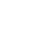

In [54]:
# example of loading the generator model and generating images
from keras.models import load_model
from numpy.random import randn
from matplotlib import pyplot
 
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
    # generate points in the latent space
    x_input = randn(latent_dim * n_samples)
    # reshape into a batch of inputs for the network
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

def save_plot(examples, epoch, n=7):
    examples = (examples + 1)/2.0
    for i in range(n * n):
        pyplot.subplot(n,n,1+i)
        pyplot.axis('off')
        pyplot.imshow(examples[i])
    
    filename = 'generated_plot_' + str(epoch + 1) + '.png'
    pyplot.savefig(filename)
    pyplot.close()
    
# plot the generated images
def create_plot(examples, n):
    
    examples = (examples + 1)/2.0
    for i in range(n * n):
        pyplot.subplot(n,n,1+i)
        pyplot.axis('off')
        pyplot.imshow(examples[i])
    
# 	# plot images
# 	for i in range(n * n):
# 		# define subplot
# 		pyplot.subplot(n, n, 1 + i)
# 		# turn off axis
# 		pyplot.axis('off')
# 		# plot raw pixel data
# 		pyplot.imshow(examples[i])
    pyplot.show()
    
# load model
#model = load_model('generator_model_200.h5')
# generate images
latent_points = generate_latent_points(100, 100)
# generate images
X = gan_model.predict(latent_points)
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0
# plot the result
save_plot(X, 10)

In [50]:
# example of generating an image for a specific point in the latent space
from keras.models import load_model
from numpy import asarray
from matplotlib import pyplot
# load model
#model = load_model('generator_model_200.h5')
# all 0s
vector = asarray([[0.75 for _ in range(100)]])
# generate image
X = gan_model.predict(vector)
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0

print(X.shape)
# plot the result
pyplot.imshow(X[i])
pyplot.show()

(1, 1)


IndexError: index 48 is out of bounds for axis 0 with size 1